In [ ]:
# install from PyPI
!pip install openai
import os
from openai import OpenAI
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm
import time
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
Mounted at /content/drive


In [3]:
# OpenAI API 키값 설정하기
client = OpenAI(api_key="")
df =  pd.read_csv('/content/drive/MyDrive/캡스톤/finance_data.csv', names=['sentence','kor_sentence'])

In [4]:
df

,sentence,kor_sentence
labels,sentence,kor_sentence
neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
...,...,...
negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...
neutral,Rinkuskiai's beer sales fell by 6.5 per cent t...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5% 감소했으며 카우노 알루스의 맥주...
negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이..."
negative,Net sales of the Paper segment decreased to EU...,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...


In [5]:
# 띄어쓰기 기준으로 영어 리뷰 길이 체크
article_list = []

for article in df['sentence']:
  split= article.split()
  article_list.append(split)

기사의 최대 단어 수 : 58
기사의 평균 단어 수 : 20.85846915617908


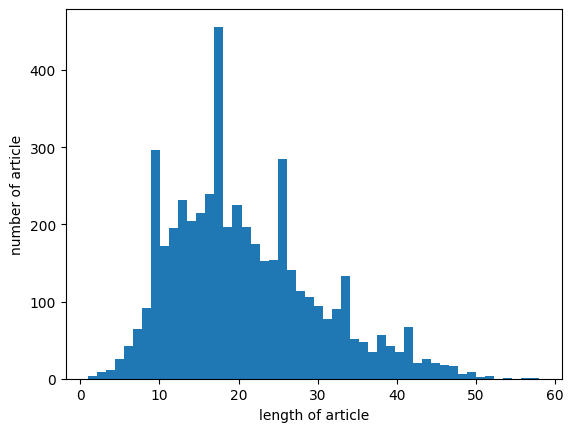

In [6]:
print('기사의 최대 단어 수 :', max(len(article) for article in article_list))
print('기사의 평균 단어 수 :', sum(map(len, article_list))/len(article_list))
plt.hist([len(article) for article in article_list], bins=50)
plt.xlabel('length of article')
plt.ylabel('number of article')
plt.show()

In [8]:
## ChatGPT API를 활용한 감정분석

# 기사를 분석하기 위한 함수 작성
def analyze_article(article):

  try:
    messages = [
            {"role": "system", "content": "너는 기사에 담긴 감정을 분석하고 탐지하는 AI 언어모델이야"},
            {"role": "user", "content": f"다음 기사를 분석해 감정이 positive인지 negative인지 neutral인 판단해 알려줘. 대답은 다른 추가적인 설명없이 'positive' 또는 'negative' 또는 'neutral' 셋 중 하나의 단어로 대답해야 해: {article}"}
            # 퓨샷 러닝을 적용하려면 여기에 긍정/부정/중립의 예시를 함께 넣어줘야 할 듯
            ]


    completion = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=3,
            n=1,
            stop=None,
            temperature=0
        )

    response= completion.choices[0].message.content
    print(response)
    return response

  except client.error.RateLimitError as e:
    retry_time = e.retry_after if hasattr(e, 'retry_after') else 30
    print(f"Rate limit exceeded. Retrying in {retry_time} seconds...")
    time.sleep(retry_time)
    return analyze_article(article)

  except client.error.ServiceUnavailableError as e:
    retry_time = 10  # Adjust the retry time as needed
    print(f"Service is unavailable. Retrying in {retry_time} seconds...")
    time.sleep(retry_time)
    return analyze_article(article)

  except client.error.APIError as e:
    retry_time = e.retry_after if hasattr(e, 'retry_after') else 30
    print(f"API error occurred. Retrying in {retry_time} seconds...")
    time.sleep(retry_time)
    return analyze_article(article)

# 기사 분석해 저장하기
sentiments = []

for article in tqdm(df["sentence"]):
    sentiment = analyze_article(article)
    sentiments.append(sentiment)

df["Sentiment"] = sentiments
df.to_csv("금융뉴스데이터_감정분석결과.csv", index=False)

  0%|          | 1/4847 [00:00<29:34,  2.73it/s]

죄


  0%|          | 2/4847 [00:00<26:32,  3.04it/s]

neutral


  0%|          | 3/4847 [00:01<26:54,  3.00it/s]

positive


  0%|          | 4/4847 [00:01<25:18,  3.19it/s]

negative


  0%|          | 5/4847 [00:01<25:02,  3.22it/s]

positive


  0%|          | 6/4847 [00:01<24:03,  3.35it/s]

positive


  0%|          | 7/4847 [00:02<25:06,  3.21it/s]

positive


  0%|          | 8/4847 [00:02<23:42,  3.40it/s]

positive


  0%|          | 9/4847 [00:02<24:21,  3.31it/s]

positive


  0%|          | 10/4847 [00:03<23:44,  3.39it/s]

positive


  0%|          | 11/4847 [00:03<24:30,  3.29it/s]

positive


  0%|          | 12/4847 [00:04<32:24,  2.49it/s]

positive


  0%|          | 13/4847 [00:04<28:31,  2.82it/s]

positive


  0%|          | 14/4847 [00:04<25:54,  3.11it/s]

neutral


  0%|          | 15/4847 [00:04<24:37,  3.27it/s]

positive


  0%|          | 16/4847 [00:05<29:28,  2.73it/s]

positive


  0%|          | 17/4847 [00:05<33:06,  2.43it/s]

positive


  0%|          | 18/4847 [00:06<30:11,  2.67it/s]

positive


  0%|          | 19/4847 [00:06<29:11,  2.76it/s]

positive


  0%|          | 20/4847 [00:06<27:14,  2.95it/s]

positive


  0%|          | 21/4847 [00:07<26:33,  3.03it/s]

positive


  0%|          | 22/4847 [00:07<24:20,  3.30it/s]

positive


  0%|          | 23/4847 [00:07<24:13,  3.32it/s]

neutral


  0%|          | 24/4847 [00:07<24:19,  3.30it/s]

positive


  1%|          | 25/4847 [00:08<23:21,  3.44it/s]

positive


  1%|          | 26/4847 [00:08<23:20,  3.44it/s]

positive


  1%|          | 27/4847 [00:08<26:44,  3.00it/s]

positive


  1%|          | 28/4847 [00:09<26:07,  3.07it/s]

positive


  1%|          | 29/4847 [00:09<25:33,  3.14it/s]

positive


  1%|          | 30/4847 [00:10<36:25,  2.20it/s]

positive


  1%|          | 31/4847 [00:10<40:50,  1.97it/s]

positive


  1%|          | 32/4847 [00:11<37:13,  2.16it/s]

positive


  1%|          | 33/4847 [00:11<32:22,  2.48it/s]

positive


  1%|          | 34/4847 [00:11<35:06,  2.28it/s]

neutral


  1%|          | 35/4847 [00:12<31:05,  2.58it/s]

positive


  1%|          | 36/4847 [00:12<30:50,  2.60it/s]

positive


  1%|          | 37/4847 [00:12<28:20,  2.83it/s]

positive


  1%|          | 38/4847 [00:13<34:33,  2.32it/s]

positive


  1%|          | 39/4847 [00:13<33:15,  2.41it/s]

positive


  1%|          | 40/4847 [00:14<29:20,  2.73it/s]

positive


  1%|          | 41/4847 [00:14<31:24,  2.55it/s]

positive


  1%|          | 42/4847 [00:14<27:53,  2.87it/s]

positive


  1%|          | 43/4847 [00:15<30:46,  2.60it/s]

positive


  1%|          | 44/4847 [00:15<27:31,  2.91it/s]

neutral


  1%|          | 45/4847 [00:16<30:13,  2.65it/s]

positive


  1%|          | 46/4847 [00:16<27:44,  2.88it/s]

positive


  1%|          | 47/4847 [00:16<26:45,  2.99it/s]

positive


  1%|          | 48/4847 [00:16<27:05,  2.95it/s]

positive


  1%|          | 49/4847 [00:17<25:26,  3.14it/s]

neutral


  1%|          | 50/4847 [00:17<24:12,  3.30it/s]

positive


  1%|          | 51/4847 [00:18<29:02,  2.75it/s]

positive


  1%|          | 52/4847 [00:18<27:33,  2.90it/s]

positive


  1%|          | 53/4847 [00:18<25:02,  3.19it/s]

positive


  1%|          | 54/4847 [00:18<24:29,  3.26it/s]

positive


  1%|          | 55/4847 [00:19<23:37,  3.38it/s]

positive


  1%|          | 56/4847 [00:19<22:55,  3.48it/s]

positive


  1%|          | 57/4847 [00:19<24:40,  3.24it/s]

positive


  1%|          | 58/4847 [00:20<25:19,  3.15it/s]

positive


  1%|          | 59/4847 [00:20<32:27,  2.46it/s]

positive


  1%|          | 60/4847 [00:21<32:23,  2.46it/s]

neutral


  1%|▏         | 61/4847 [00:21<34:11,  2.33it/s]

neutral


  1%|▏         | 62/4847 [00:21<32:37,  2.44it/s]

positive


  1%|▏         | 63/4847 [00:22<32:46,  2.43it/s]

neutral


  1%|▏         | 64/4847 [00:22<30:26,  2.62it/s]

positive


  1%|▏         | 65/4847 [00:23<40:04,  1.99it/s]

positive


  1%|▏         | 66/4847 [00:23<37:03,  2.15it/s]

positive


  1%|▏         | 67/4847 [00:24<32:38,  2.44it/s]

neutral


  1%|▏         | 68/4847 [00:24<30:29,  2.61it/s]

neutral


  1%|▏         | 69/4847 [00:24<27:17,  2.92it/s]

neutral


  1%|▏         | 70/4847 [00:25<26:48,  2.97it/s]

neutral


  1%|▏         | 71/4847 [00:25<27:36,  2.88it/s]

positive


  1%|▏         | 72/4847 [00:25<33:31,  2.37it/s]

positive


  2%|▏         | 73/4847 [00:26<30:25,  2.62it/s]

positive


  2%|▏         | 74/4847 [00:26<32:03,  2.48it/s]

neutral


  2%|▏         | 75/4847 [00:27<39:03,  2.04it/s]

positive


  2%|▏         | 76/4847 [00:30<1:33:49,  1.18s/it]

positive


  2%|▏         | 77/4847 [00:30<1:15:56,  1.05it/s]

positive


  2%|▏         | 78/4847 [00:30<1:00:54,  1.31it/s]

neutral


  2%|▏         | 79/4847 [00:31<52:47,  1.51it/s]  

positive


  2%|▏         | 80/4847 [00:31<45:04,  1.76it/s]

neutral


  2%|▏         | 81/4847 [00:32<39:19,  2.02it/s]

neutral


  2%|▏         | 82/4847 [00:32<33:36,  2.36it/s]

neutral


  2%|▏         | 83/4847 [00:32<32:55,  2.41it/s]

neutral


  2%|▏         | 84/4847 [00:33<32:42,  2.43it/s]

neutral


  2%|▏         | 85/4847 [00:33<38:49,  2.04it/s]

positive


  2%|▏         | 86/4847 [00:34<33:52,  2.34it/s]

positive


  2%|▏         | 87/4847 [00:34<31:01,  2.56it/s]

positive


  2%|▏         | 88/4847 [00:40<2:39:29,  2.01s/it]

neutral


  2%|▏         | 89/4847 [00:40<1:59:18,  1.50s/it]

positive


  2%|▏         | 90/4847 [00:40<1:33:02,  1.17s/it]

positive


  2%|▏         | 91/4847 [00:41<1:20:29,  1.02s/it]

positive


  2%|▏         | 92/4847 [00:42<1:10:06,  1.13it/s]

positive


  2%|▏         | 93/4847 [00:42<1:00:27,  1.31it/s]

positive


  2%|▏         | 94/4847 [00:42<50:28,  1.57it/s]  

positive


  2%|▏         | 95/4847 [00:43<43:18,  1.83it/s]

positive


  2%|▏         | 96/4847 [00:43<37:27,  2.11it/s]

positive


  2%|▏         | 97/4847 [00:43<34:57,  2.26it/s]

positive


  2%|▏         | 98/4847 [00:44<30:44,  2.57it/s]

positive


  2%|▏         | 99/4847 [00:44<30:28,  2.60it/s]

positive


  2%|▏         | 100/4847 [00:44<30:17,  2.61it/s]

positive


  2%|▏         | 101/4847 [00:45<30:08,  2.62it/s]

positive


  2%|▏         | 102/4847 [00:45<28:53,  2.74it/s]

positive


  2%|▏         | 103/4847 [00:45<27:53,  2.83it/s]

positive


  2%|▏         | 104/4847 [00:46<25:54,  3.05it/s]

positive


  2%|▏         | 105/4847 [00:46<29:40,  2.66it/s]

positive


  2%|▏         | 106/4847 [00:47<27:02,  2.92it/s]

positive


  2%|▏         | 107/4847 [00:47<28:34,  2.76it/s]

positive


  2%|▏         | 108/4847 [00:47<26:37,  2.97it/s]

positive


  2%|▏         | 109/4847 [00:47<25:36,  3.08it/s]

positive


  2%|▏         | 110/4847 [00:48<26:32,  2.98it/s]

positive


  2%|▏         | 111/4847 [00:48<26:24,  2.99it/s]

positive


  2%|▏         | 112/4847 [00:48<24:40,  3.20it/s]

neutral


  2%|▏         | 113/4847 [00:49<23:29,  3.36it/s]

positive


  2%|▏         | 114/4847 [00:49<26:15,  3.00it/s]

positive


  2%|▏         | 115/4847 [00:49<24:17,  3.25it/s]

positive


  2%|▏         | 116/4847 [00:50<24:16,  3.25it/s]

neutral


  2%|▏         | 117/4847 [00:50<23:19,  3.38it/s]

positive


  2%|▏         | 118/4847 [00:50<24:10,  3.26it/s]

positive


  2%|▏         | 119/4847 [00:51<25:20,  3.11it/s]

positive


  2%|▏         | 120/4847 [00:51<25:09,  3.13it/s]

positive


  2%|▏         | 121/4847 [00:51<23:08,  3.40it/s]

positive


  3%|▎         | 122/4847 [00:52<24:14,  3.25it/s]

positive


  3%|▎         | 123/4847 [00:52<22:29,  3.50it/s]

positive


  3%|▎         | 124/4847 [00:52<20:59,  3.75it/s]

positive


  3%|▎         | 125/4847 [00:52<22:13,  3.54it/s]

positive


  3%|▎         | 126/4847 [00:53<22:44,  3.46it/s]

positive


  3%|▎         | 127/4847 [00:53<21:55,  3.59it/s]

positive


  3%|▎         | 128/4847 [00:53<22:07,  3.56it/s]

neutral


  3%|▎         | 129/4847 [00:53<22:45,  3.46it/s]

positive


  3%|▎         | 130/4847 [00:54<21:49,  3.60it/s]

positive


  3%|▎         | 131/4847 [00:54<22:40,  3.47it/s]

positive


  3%|▎         | 132/4847 [00:54<21:54,  3.59it/s]

positive


  3%|▎         | 133/4847 [00:55<21:49,  3.60it/s]

positive


  3%|▎         | 134/4847 [00:55<22:11,  3.54it/s]

positive


  3%|▎         | 135/4847 [00:55<24:51,  3.16it/s]

positive


  3%|▎         | 136/4847 [00:55<23:04,  3.40it/s]

positive


  3%|▎         | 137/4847 [00:56<21:47,  3.60it/s]

positive


  3%|▎         | 138/4847 [00:56<30:04,  2.61it/s]

positive


  3%|▎         | 139/4847 [00:57<26:42,  2.94it/s]

positive


  3%|▎         | 140/4847 [00:57<24:42,  3.18it/s]

positive


  3%|▎         | 141/4847 [00:57<25:44,  3.05it/s]

positive


  3%|▎         | 142/4847 [00:58<33:06,  2.37it/s]

positive


  3%|▎         | 143/4847 [00:58<30:59,  2.53it/s]

positive


  3%|▎         | 144/4847 [00:59<30:41,  2.55it/s]

positive


  3%|▎         | 145/4847 [00:59<29:11,  2.68it/s]

positive


  3%|▎         | 146/4847 [00:59<29:10,  2.68it/s]

positive


  3%|▎         | 147/4847 [01:00<26:23,  2.97it/s]

positive


  3%|▎         | 148/4847 [01:00<36:37,  2.14it/s]

positive


  3%|▎         | 149/4847 [01:01<33:06,  2.36it/s]

positive


  3%|▎         | 150/4847 [01:01<30:54,  2.53it/s]

positive


  3%|▎         | 151/4847 [01:01<27:58,  2.80it/s]

positive


  3%|▎         | 152/4847 [01:02<26:34,  2.95it/s]

positive


  3%|▎         | 153/4847 [01:02<30:02,  2.60it/s]

positive


  3%|▎         | 154/4847 [01:02<30:01,  2.61it/s]

positive


  3%|▎         | 155/4847 [01:03<29:03,  2.69it/s]

positive


  3%|▎         | 156/4847 [01:03<26:46,  2.92it/s]

positive


  3%|▎         | 157/4847 [01:03<25:56,  3.01it/s]

positive


  3%|▎         | 158/4847 [01:04<35:29,  2.20it/s]

positive


  3%|▎         | 159/4847 [01:05<38:55,  2.01it/s]

positive


  3%|▎         | 160/4847 [01:05<34:15,  2.28it/s]

positive


  3%|▎         | 161/4847 [01:05<31:46,  2.46it/s]

neutral


  3%|▎         | 162/4847 [01:06<37:24,  2.09it/s]

positive


  3%|▎         | 163/4847 [01:06<34:42,  2.25it/s]

positive


  3%|▎         | 164/4847 [01:07<37:02,  2.11it/s]

positive


  3%|▎         | 165/4847 [01:07<31:39,  2.47it/s]

positive


  3%|▎         | 166/4847 [01:07<28:47,  2.71it/s]

positive


  3%|▎         | 167/4847 [01:08<28:30,  2.74it/s]

positive


  3%|▎         | 168/4847 [01:08<25:49,  3.02it/s]

positive


  3%|▎         | 169/4847 [01:08<23:26,  3.33it/s]

positive


  4%|▎         | 170/4847 [01:08<22:25,  3.47it/s]

positive


  4%|▎         | 171/4847 [01:09<22:00,  3.54it/s]

positive


  4%|▎         | 172/4847 [01:09<25:44,  3.03it/s]

positive


  4%|▎         | 173/4847 [01:09<24:19,  3.20it/s]

positive


  4%|▎         | 174/4847 [01:10<22:23,  3.48it/s]

positive


  4%|▎         | 175/4847 [01:10<24:39,  3.16it/s]

positive


  4%|▎         | 176/4847 [01:10<26:05,  2.98it/s]

positive


  4%|▎         | 177/4847 [01:11<31:18,  2.49it/s]

positive


  4%|▎         | 178/4847 [01:11<33:11,  2.34it/s]

positive


  4%|▎         | 179/4847 [01:12<31:02,  2.51it/s]

positive


  4%|▎         | 180/4847 [01:12<30:06,  2.58it/s]

positive


  4%|▎         | 181/4847 [01:12<28:43,  2.71it/s]

positive


  4%|▍         | 182/4847 [01:13<26:35,  2.92it/s]

positive


  4%|▍         | 183/4847 [01:13<25:33,  3.04it/s]

positive


  4%|▍         | 184/4847 [01:13<25:31,  3.05it/s]

positive


  4%|▍         | 185/4847 [01:14<28:35,  2.72it/s]

positive


  4%|▍         | 186/4847 [01:14<28:23,  2.74it/s]

positive


  4%|▍         | 187/4847 [01:15<27:04,  2.87it/s]

positive


  4%|▍         | 188/4847 [01:15<27:55,  2.78it/s]

neutral


  4%|▍         | 189/4847 [01:15<24:55,  3.11it/s]

positive


  4%|▍         | 190/4847 [01:16<31:06,  2.50it/s]

positive


  4%|▍         | 191/4847 [01:16<30:04,  2.58it/s]

positive


  4%|▍         | 192/4847 [01:16<26:49,  2.89it/s]

positive


  4%|▍         | 193/4847 [01:17<26:44,  2.90it/s]

positive


  4%|▍         | 194/4847 [01:17<25:47,  3.01it/s]

positive


  4%|▍         | 195/4847 [01:17<27:54,  2.78it/s]

positive


  4%|▍         | 196/4847 [01:18<25:47,  3.01it/s]

positive


  4%|▍         | 197/4847 [01:18<24:58,  3.10it/s]

positive


  4%|▍         | 198/4847 [01:18<23:44,  3.26it/s]

positive


  4%|▍         | 199/4847 [01:19<23:58,  3.23it/s]

positive


  4%|▍         | 200/4847 [01:19<22:28,  3.45it/s]

positive


  4%|▍         | 201/4847 [01:19<22:39,  3.42it/s]

positive


  4%|▍         | 202/4847 [01:20<31:28,  2.46it/s]

positive


  4%|▍         | 203/4847 [01:20<29:06,  2.66it/s]

positive


  4%|▍         | 204/4847 [01:21<30:17,  2.55it/s]

positive


  4%|▍         | 205/4847 [01:21<35:39,  2.17it/s]

positive


  4%|▍         | 206/4847 [01:21<30:14,  2.56it/s]

positive


  4%|▍         | 207/4847 [01:22<29:36,  2.61it/s]

positive


  4%|▍         | 208/4847 [01:22<26:53,  2.88it/s]

positive


  4%|▍         | 209/4847 [01:23<32:27,  2.38it/s]

positive


  4%|▍         | 210/4847 [01:23<29:22,  2.63it/s]

positive


  4%|▍         | 211/4847 [01:23<35:13,  2.19it/s]

positive


  4%|▍         | 212/4847 [01:24<33:14,  2.32it/s]

neutral


  4%|▍         | 213/4847 [01:24<31:17,  2.47it/s]

positive


  4%|▍         | 214/4847 [01:25<37:00,  2.09it/s]

positive


  4%|▍         | 215/4847 [01:26<45:40,  1.69it/s]

positive


  4%|▍         | 216/4847 [01:26<38:11,  2.02it/s]

positive


  4%|▍         | 217/4847 [01:26<32:38,  2.36it/s]

positive


  4%|▍         | 218/4847 [01:27<30:43,  2.51it/s]

positive


  5%|▍         | 219/4847 [01:27<27:38,  2.79it/s]

positive


  5%|▍         | 220/4847 [01:27<25:09,  3.07it/s]

positive


  5%|▍         | 221/4847 [01:27<26:09,  2.95it/s]

positive


  5%|▍         | 222/4847 [01:28<25:38,  3.01it/s]

positive


  5%|▍         | 223/4847 [01:28<25:05,  3.07it/s]

positive


  5%|▍         | 224/4847 [01:28<25:46,  2.99it/s]

neutral


  5%|▍         | 225/4847 [01:29<23:38,  3.26it/s]

neutral


  5%|▍         | 226/4847 [01:29<24:02,  3.20it/s]

positive


  5%|▍         | 227/4847 [01:29<23:32,  3.27it/s]

positive


  5%|▍         | 228/4847 [01:30<22:23,  3.44it/s]

positive


  5%|▍         | 229/4847 [01:30<21:28,  3.58it/s]

positive


  5%|▍         | 230/4847 [01:30<23:14,  3.31it/s]

positive


  5%|▍         | 231/4847 [01:30<21:31,  3.57it/s]

positive


  5%|▍         | 232/4847 [01:31<24:41,  3.11it/s]

positive


  5%|▍         | 233/4847 [01:31<25:06,  3.06it/s]

positive


  5%|▍         | 234/4847 [01:31<24:16,  3.17it/s]

positive


  5%|▍         | 235/4847 [01:32<23:15,  3.31it/s]

neutral


  5%|▍         | 236/4847 [01:32<28:49,  2.67it/s]

positive


  5%|▍         | 237/4847 [01:33<26:08,  2.94it/s]

positive


  5%|▍         | 238/4847 [01:33<25:22,  3.03it/s]

positive


  5%|▍         | 239/4847 [01:33<26:22,  2.91it/s]

positive


  5%|▍         | 240/4847 [01:34<26:06,  2.94it/s]

positive


  5%|▍         | 241/4847 [01:34<27:45,  2.76it/s]

positive


  5%|▍         | 242/4847 [01:34<25:04,  3.06it/s]

positive


  5%|▌         | 243/4847 [01:35<30:54,  2.48it/s]

positive


  5%|▌         | 244/4847 [01:35<28:51,  2.66it/s]

positive


  5%|▌         | 245/4847 [01:35<26:33,  2.89it/s]

positive


  5%|▌         | 246/4847 [01:36<27:24,  2.80it/s]

positive


  5%|▌         | 247/4847 [01:36<26:38,  2.88it/s]

positive


  5%|▌         | 248/4847 [01:36<24:45,  3.10it/s]

positive


  5%|▌         | 249/4847 [01:37<36:03,  2.13it/s]

positive


  5%|▌         | 250/4847 [01:37<31:32,  2.43it/s]

positive


  5%|▌         | 251/4847 [01:38<27:46,  2.76it/s]

positive


  5%|▌         | 252/4847 [01:38<25:52,  2.96it/s]

positive


  5%|▌         | 253/4847 [01:38<26:13,  2.92it/s]

positive


  5%|▌         | 254/4847 [01:39<26:03,  2.94it/s]

positive


  5%|▌         | 255/4847 [01:39<26:05,  2.93it/s]

positive


  5%|▌         | 256/4847 [01:39<25:42,  2.98it/s]

positive


  5%|▌         | 257/4847 [01:40<27:14,  2.81it/s]

positive


  5%|▌         | 258/4847 [01:40<33:08,  2.31it/s]

positive


  5%|▌         | 259/4847 [01:41<32:27,  2.36it/s]

positive


  5%|▌         | 260/4847 [01:41<30:16,  2.52it/s]

positive


  5%|▌         | 261/4847 [01:41<28:43,  2.66it/s]

positive


  5%|▌         | 262/4847 [01:42<26:03,  2.93it/s]

positive


  5%|▌         | 263/4847 [01:42<31:42,  2.41it/s]

positive


  5%|▌         | 264/4847 [01:43<31:38,  2.41it/s]

positive


  5%|▌         | 265/4847 [01:43<27:46,  2.75it/s]

positive


  5%|▌         | 266/4847 [01:43<24:52,  3.07it/s]

positive


  6%|▌         | 267/4847 [01:43<23:28,  3.25it/s]

positive


  6%|▌         | 268/4847 [01:44<21:57,  3.47it/s]

positive


  6%|▌         | 269/4847 [01:44<20:43,  3.68it/s]

positive


  6%|▌         | 270/4847 [01:44<23:10,  3.29it/s]

positive


  6%|▌         | 271/4847 [01:45<22:01,  3.46it/s]

positive


  6%|▌         | 272/4847 [01:45<22:11,  3.44it/s]

neutral


  6%|▌         | 273/4847 [01:45<23:13,  3.28it/s]

positive


  6%|▌         | 274/4847 [01:45<23:21,  3.26it/s]

positive


  6%|▌         | 275/4847 [01:46<22:41,  3.36it/s]

positive


  6%|▌         | 276/4847 [01:46<31:26,  2.42it/s]

positive


  6%|▌         | 277/4847 [01:47<35:05,  2.17it/s]

positive


  6%|▌         | 278/4847 [01:47<31:29,  2.42it/s]

positive


  6%|▌         | 279/4847 [01:48<30:36,  2.49it/s]

positive


  6%|▌         | 280/4847 [01:48<28:21,  2.68it/s]

positive


  6%|▌         | 281/4847 [01:48<27:32,  2.76it/s]

positive


  6%|▌         | 282/4847 [01:49<26:44,  2.84it/s]

positive


  6%|▌         | 283/4847 [01:49<24:42,  3.08it/s]

positive


  6%|▌         | 284/4847 [01:49<23:04,  3.30it/s]

positive


  6%|▌         | 285/4847 [01:49<23:13,  3.27it/s]

positive


  6%|▌         | 286/4847 [01:50<23:39,  3.21it/s]

positive


  6%|▌         | 287/4847 [01:50<27:18,  2.78it/s]

positive


  6%|▌         | 288/4847 [01:50<24:30,  3.10it/s]

positive


  6%|▌         | 289/4847 [01:51<24:25,  3.11it/s]

positive


  6%|▌         | 290/4847 [01:51<22:21,  3.40it/s]

positive


  6%|▌         | 291/4847 [01:51<23:17,  3.26it/s]

neutral


  6%|▌         | 292/4847 [01:52<21:51,  3.47it/s]

neutral


  6%|▌         | 293/4847 [01:52<23:19,  3.25it/s]

neutral


  6%|▌         | 294/4847 [01:52<22:10,  3.42it/s]

positive


  6%|▌         | 295/4847 [01:53<23:02,  3.29it/s]

positive


  6%|▌         | 296/4847 [01:53<26:27,  2.87it/s]

positive


  6%|▌         | 297/4847 [01:53<25:07,  3.02it/s]

neutral


  6%|▌         | 298/4847 [01:54<35:33,  2.13it/s]

neutral


  6%|▌         | 299/4847 [01:54<32:40,  2.32it/s]

positive


  6%|▌         | 300/4847 [01:55<29:08,  2.60it/s]

neutral


  6%|▌         | 301/4847 [01:55<26:46,  2.83it/s]

positive


  6%|▌         | 302/4847 [01:55<29:14,  2.59it/s]

positive


  6%|▋         | 303/4847 [01:56<30:02,  2.52it/s]

positive


  6%|▋         | 304/4847 [01:56<29:33,  2.56it/s]

positive


  6%|▋         | 305/4847 [01:56<26:21,  2.87it/s]

positive


  6%|▋         | 306/4847 [01:57<25:24,  2.98it/s]

positive


  6%|▋         | 307/4847 [01:57<27:28,  2.75it/s]

positive


  6%|▋         | 308/4847 [01:58<33:31,  2.26it/s]

positive


  6%|▋         | 309/4847 [01:58<30:43,  2.46it/s]

positive


  6%|▋         | 310/4847 [01:59<29:17,  2.58it/s]

positive


  6%|▋         | 311/4847 [01:59<29:56,  2.53it/s]

neutral


  6%|▋         | 312/4847 [01:59<29:32,  2.56it/s]

positive


  6%|▋         | 313/4847 [02:01<50:39,  1.49it/s]

positive


  6%|▋         | 314/4847 [02:01<44:43,  1.69it/s]

positive


  6%|▋         | 315/4847 [02:01<37:05,  2.04it/s]

positive


  7%|▋         | 316/4847 [02:02<40:33,  1.86it/s]

positive


  7%|▋         | 317/4847 [02:02<34:00,  2.22it/s]

positive


  7%|▋         | 318/4847 [02:02<29:14,  2.58it/s]

positive


  7%|▋         | 319/4847 [02:03<27:11,  2.78it/s]

positive


  7%|▋         | 320/4847 [02:03<27:49,  2.71it/s]

positive


  7%|▋         | 321/4847 [02:03<25:50,  2.92it/s]

positive


  7%|▋         | 322/4847 [02:04<25:40,  2.94it/s]

positive


  7%|▋         | 323/4847 [02:04<24:29,  3.08it/s]

positive


  7%|▋         | 324/4847 [02:04<24:03,  3.13it/s]

positive


  7%|▋         | 325/4847 [02:05<23:22,  3.22it/s]

positive


  7%|▋         | 326/4847 [02:05<21:32,  3.50it/s]

positive


  7%|▋         | 327/4847 [02:05<23:48,  3.16it/s]

positive


  7%|▋         | 328/4847 [02:06<26:22,  2.86it/s]

positive


  7%|▋         | 329/4847 [02:06<27:15,  2.76it/s]

positive


  7%|▋         | 330/4847 [02:06<27:16,  2.76it/s]

positive


  7%|▋         | 331/4847 [02:07<31:50,  2.36it/s]

positive


  7%|▋         | 332/4847 [02:07<29:59,  2.51it/s]

positive


  7%|▋         | 333/4847 [02:08<27:10,  2.77it/s]

positive


  7%|▋         | 334/4847 [02:08<25:47,  2.92it/s]

positive


  7%|▋         | 335/4847 [02:08<26:30,  2.84it/s]

positive


  7%|▋         | 336/4847 [02:09<24:49,  3.03it/s]

positive


  7%|▋         | 337/4847 [02:09<24:34,  3.06it/s]

positive


  7%|▋         | 338/4847 [02:09<24:14,  3.10it/s]

positive


  7%|▋         | 339/4847 [02:10<24:15,  3.10it/s]

positive


  7%|▋         | 340/4847 [02:10<25:06,  2.99it/s]

positive


  7%|▋         | 341/4847 [02:10<25:56,  2.89it/s]

positive


  7%|▋         | 342/4847 [02:11<27:07,  2.77it/s]

positive


  7%|▋         | 343/4847 [02:11<26:42,  2.81it/s]

positive


  7%|▋         | 344/4847 [02:11<27:04,  2.77it/s]

positive


  7%|▋         | 345/4847 [02:12<32:15,  2.33it/s]

positive


  7%|▋         | 346/4847 [02:12<28:30,  2.63it/s]

positive


  7%|▋         | 347/4847 [02:13<32:55,  2.28it/s]

positive


  7%|▋         | 348/4847 [02:13<28:54,  2.59it/s]

positive


  7%|▋         | 349/4847 [02:13<26:03,  2.88it/s]

positive


  7%|▋         | 350/4847 [02:14<25:57,  2.89it/s]

positive


  7%|▋         | 351/4847 [02:14<24:13,  3.09it/s]

positive


  7%|▋         | 352/4847 [02:14<23:24,  3.20it/s]

positive


  7%|▋         | 353/4847 [02:14<22:33,  3.32it/s]

positive


  7%|▋         | 354/4847 [02:15<24:13,  3.09it/s]

positive


  7%|▋         | 355/4847 [02:15<25:04,  2.99it/s]

positive


  7%|▋         | 356/4847 [02:16<24:42,  3.03it/s]

positive


  7%|▋         | 357/4847 [02:16<24:25,  3.06it/s]

positive


  7%|▋         | 358/4847 [02:16<24:11,  3.09it/s]

positive


  7%|▋         | 359/4847 [02:16<22:43,  3.29it/s]

positive


  7%|▋         | 360/4847 [02:17<22:02,  3.39it/s]

positive


  7%|▋         | 361/4847 [02:17<21:02,  3.55it/s]

positive


  7%|▋         | 362/4847 [02:17<26:27,  2.83it/s]

positive


  7%|▋         | 363/4847 [02:18<25:46,  2.90it/s]

positive


  8%|▊         | 364/4847 [02:19<35:34,  2.10it/s]

positive


  8%|▊         | 365/4847 [02:19<32:50,  2.27it/s]

positive


  8%|▊         | 366/4847 [02:19<28:29,  2.62it/s]

positive


  8%|▊         | 367/4847 [02:20<29:15,  2.55it/s]

positive


  8%|▊         | 368/4847 [02:20<28:07,  2.65it/s]

positive


  8%|▊         | 369/4847 [02:20<25:37,  2.91it/s]

positive


  8%|▊         | 370/4847 [02:21<25:12,  2.96it/s]

positive


  8%|▊         | 371/4847 [02:21<32:26,  2.30it/s]

positive


  8%|▊         | 372/4847 [02:22<30:33,  2.44it/s]

positive


  8%|▊         | 373/4847 [02:22<28:53,  2.58it/s]

positive


  8%|▊         | 374/4847 [02:22<27:16,  2.73it/s]

positive


  8%|▊         | 375/4847 [02:23<26:26,  2.82it/s]

positive


  8%|▊         | 376/4847 [02:23<23:39,  3.15it/s]

positive


  8%|▊         | 377/4847 [02:23<24:00,  3.10it/s]

positive


  8%|▊         | 378/4847 [02:23<23:13,  3.21it/s]

positive


  8%|▊         | 379/4847 [02:24<21:52,  3.41it/s]

positive


  8%|▊         | 380/4847 [02:24<24:32,  3.03it/s]

positive


  8%|▊         | 381/4847 [02:25<31:58,  2.33it/s]

positive


  8%|▊         | 382/4847 [02:25<27:25,  2.71it/s]

positive


  8%|▊         | 383/4847 [02:25<24:37,  3.02it/s]

positive


  8%|▊         | 384/4847 [02:25<24:20,  3.06it/s]

positive


  8%|▊         | 385/4847 [02:26<24:53,  2.99it/s]

positive


  8%|▊         | 386/4847 [02:26<27:22,  2.72it/s]

positive


  8%|▊         | 387/4847 [02:27<25:49,  2.88it/s]

neutral


  8%|▊         | 388/4847 [02:27<26:29,  2.81it/s]

positive


  8%|▊         | 389/4847 [02:27<25:12,  2.95it/s]

positive


  8%|▊         | 390/4847 [02:28<26:50,  2.77it/s]

positive


  8%|▊         | 391/4847 [02:28<25:50,  2.87it/s]

positive


  8%|▊         | 392/4847 [02:28<25:30,  2.91it/s]

positive


  8%|▊         | 393/4847 [02:29<23:40,  3.14it/s]

positive


  8%|▊         | 394/4847 [02:29<22:54,  3.24it/s]

neutral


  8%|▊         | 395/4847 [02:29<23:24,  3.17it/s]

neutral


  8%|▊         | 396/4847 [02:30<25:35,  2.90it/s]

neutral


  8%|▊         | 397/4847 [02:31<50:59,  1.45it/s]

neutral


  8%|▊         | 398/4847 [02:31<42:23,  1.75it/s]

positive


  8%|▊         | 399/4847 [02:32<37:22,  1.98it/s]

neutral


  8%|▊         | 400/4847 [02:32<36:15,  2.04it/s]

positive


  8%|▊         | 401/4847 [02:33<33:46,  2.19it/s]

neutral


  8%|▊         | 402/4847 [02:33<30:25,  2.43it/s]

neutral


  8%|▊         | 403/4847 [02:33<28:23,  2.61it/s]

positive


  8%|▊         | 404/4847 [02:34<27:35,  2.68it/s]

neutral


  8%|▊         | 405/4847 [02:34<24:38,  3.00it/s]

neutral


  8%|▊         | 406/4847 [02:34<24:28,  3.02it/s]

positive


  8%|▊         | 407/4847 [02:34<22:26,  3.30it/s]

neutral


  8%|▊         | 408/4847 [02:35<22:34,  3.28it/s]

neutral


  8%|▊         | 409/4847 [02:35<22:25,  3.30it/s]

positive


  8%|▊         | 410/4847 [02:35<21:43,  3.40it/s]

positive


  8%|▊         | 411/4847 [02:35<20:20,  3.64it/s]

positive


  9%|▊         | 412/4847 [02:36<20:14,  3.65it/s]

neutral


  9%|▊         | 413/4847 [02:36<19:58,  3.70it/s]

neutral


  9%|▊         | 414/4847 [02:36<20:00,  3.69it/s]

positive


  9%|▊         | 415/4847 [02:37<22:00,  3.36it/s]

neutral


  9%|▊         | 416/4847 [02:37<20:40,  3.57it/s]

neutral


  9%|▊         | 417/4847 [02:39<54:56,  1.34it/s]

negative


  9%|▊         | 418/4847 [02:39<45:55,  1.61it/s]

neutral


  9%|▊         | 419/4847 [02:39<39:23,  1.87it/s]

neutral


  9%|▊         | 420/4847 [02:40<34:17,  2.15it/s]

positive


  9%|▊         | 421/4847 [02:40<29:22,  2.51it/s]

positive


  9%|▊         | 422/4847 [02:40<26:29,  2.78it/s]

neutral


  9%|▊         | 423/4847 [02:40<24:29,  3.01it/s]

neutral


  9%|▊         | 424/4847 [02:41<24:29,  3.01it/s]

neutral


  9%|▉         | 425/4847 [02:42<35:46,  2.06it/s]

neutral


  9%|▉         | 426/4847 [02:42<32:22,  2.28it/s]

neutral


  9%|▉         | 427/4847 [02:42<29:34,  2.49it/s]

positive


  9%|▉         | 428/4847 [02:43<29:44,  2.48it/s]

positive


  9%|▉         | 429/4847 [02:43<28:01,  2.63it/s]

neutral


  9%|▉         | 430/4847 [02:43<25:52,  2.85it/s]

neutral


  9%|▉         | 431/4847 [02:44<26:12,  2.81it/s]

positive


  9%|▉         | 432/4847 [02:44<24:10,  3.04it/s]

neutral


  9%|▉         | 433/4847 [02:45<31:16,  2.35it/s]

neutral


  9%|▉         | 434/4847 [02:45<29:38,  2.48it/s]

neutral


  9%|▉         | 435/4847 [02:45<29:17,  2.51it/s]

neutral


  9%|▉         | 436/4847 [02:46<34:07,  2.15it/s]

neutral


  9%|▉         | 437/4847 [02:46<29:34,  2.49it/s]

positive


  9%|▉         | 438/4847 [02:46<26:12,  2.80it/s]

neutral


  9%|▉         | 439/4847 [02:47<26:26,  2.78it/s]

neutral


  9%|▉         | 440/4847 [02:47<24:10,  3.04it/s]

positive


  9%|▉         | 441/4847 [02:47<24:01,  3.06it/s]

neutral


  9%|▉         | 442/4847 [02:48<23:03,  3.18it/s]

positive


  9%|▉         | 443/4847 [02:48<21:45,  3.37it/s]

positive


  9%|▉         | 444/4847 [02:48<23:24,  3.14it/s]

positive


  9%|▉         | 445/4847 [02:49<22:03,  3.33it/s]

neutral


  9%|▉         | 446/4847 [02:49<27:07,  2.70it/s]

neutral


  9%|▉         | 447/4847 [02:49<26:28,  2.77it/s]

neutral


  9%|▉         | 448/4847 [02:50<29:20,  2.50it/s]

positive


  9%|▉         | 449/4847 [02:50<27:40,  2.65it/s]

positive


  9%|▉         | 450/4847 [02:51<27:32,  2.66it/s]

neutral


  9%|▉         | 451/4847 [02:51<25:17,  2.90it/s]

neutral


  9%|▉         | 452/4847 [02:51<29:00,  2.52it/s]

neutral


  9%|▉         | 453/4847 [02:52<26:51,  2.73it/s]

positive


  9%|▉         | 454/4847 [02:52<24:13,  3.02it/s]

neutral


  9%|▉         | 455/4847 [02:52<23:42,  3.09it/s]

neutral


  9%|▉         | 456/4847 [02:53<22:43,  3.22it/s]

neutral


  9%|▉         | 457/4847 [02:53<21:23,  3.42it/s]

positive


  9%|▉         | 458/4847 [02:53<21:12,  3.45it/s]

positive


  9%|▉         | 459/4847 [02:53<21:08,  3.46it/s]

positive


  9%|▉         | 460/4847 [02:54<29:20,  2.49it/s]

positive


 10%|▉         | 461/4847 [02:54<30:19,  2.41it/s]

positive


 10%|▉         | 462/4847 [02:55<28:02,  2.61it/s]

positive


 10%|▉         | 463/4847 [02:55<25:19,  2.88it/s]

positive


 10%|▉         | 464/4847 [02:56<32:26,  2.25it/s]

neutral


 10%|▉         | 465/4847 [02:56<30:10,  2.42it/s]

positive


 10%|▉         | 466/4847 [02:57<36:42,  1.99it/s]

neutral


 10%|▉         | 467/4847 [02:57<33:28,  2.18it/s]

positive


 10%|▉         | 468/4847 [02:57<29:51,  2.44it/s]

positive


 10%|▉         | 469/4847 [02:58<27:40,  2.64it/s]

positive


 10%|▉         | 470/4847 [02:58<28:06,  2.59it/s]

positive


 10%|▉         | 471/4847 [02:58<26:41,  2.73it/s]

positive


 10%|▉         | 472/4847 [02:59<25:15,  2.89it/s]

positive


 10%|▉         | 473/4847 [02:59<25:16,  2.88it/s]

neutral


 10%|▉         | 474/4847 [02:59<24:24,  2.99it/s]

positive


 10%|▉         | 475/4847 [03:00<26:27,  2.75it/s]

positive


 10%|▉         | 476/4847 [03:00<25:23,  2.87it/s]

neutral


 10%|▉         | 477/4847 [03:01<27:17,  2.67it/s]

neutral


 10%|▉         | 478/4847 [03:01<24:30,  2.97it/s]

neutral


 10%|▉         | 479/4847 [03:01<22:32,  3.23it/s]

positive


 10%|▉         | 480/4847 [03:01<23:49,  3.06it/s]

positive


 10%|▉         | 481/4847 [03:02<23:41,  3.07it/s]

positive


 10%|▉         | 482/4847 [03:02<24:25,  2.98it/s]

neutral


 10%|▉         | 483/4847 [03:02<23:59,  3.03it/s]

positive


 10%|▉         | 484/4847 [03:03<22:45,  3.20it/s]

neutral


 10%|█         | 485/4847 [03:03<29:57,  2.43it/s]

neutral


 10%|█         | 486/4847 [03:04<27:49,  2.61it/s]

neutral


 10%|█         | 487/4847 [03:04<26:22,  2.75it/s]

positive


 10%|█         | 488/4847 [03:04<24:51,  2.92it/s]

positive


 10%|█         | 489/4847 [03:05<31:41,  2.29it/s]

positive


 10%|█         | 490/4847 [03:05<29:19,  2.48it/s]

neutral


 10%|█         | 491/4847 [03:06<26:44,  2.72it/s]

neutral


 10%|█         | 492/4847 [03:06<25:38,  2.83it/s]

neutral


 10%|█         | 493/4847 [03:06<24:12,  3.00it/s]

neutral


 10%|█         | 494/4847 [03:06<23:37,  3.07it/s]

positive


 10%|█         | 495/4847 [03:07<24:47,  2.93it/s]

neutral


 10%|█         | 496/4847 [03:07<23:33,  3.08it/s]

positive


 10%|█         | 497/4847 [03:07<22:28,  3.23it/s]

positive


 10%|█         | 498/4847 [03:08<23:29,  3.09it/s]

positive


 10%|█         | 499/4847 [03:08<22:10,  3.27it/s]

neutral


 10%|█         | 500/4847 [03:08<21:40,  3.34it/s]

positive


 10%|█         | 501/4847 [03:09<24:26,  2.96it/s]

positive


 10%|█         | 502/4847 [03:09<27:38,  2.62it/s]

negative


 10%|█         | 503/4847 [03:10<25:54,  2.80it/s]

positive


 10%|█         | 504/4847 [03:10<23:43,  3.05it/s]

neutral


 10%|█         | 505/4847 [03:10<24:17,  2.98it/s]

positive


 10%|█         | 506/4847 [03:11<25:20,  2.85it/s]

neutral


 10%|█         | 507/4847 [03:11<26:45,  2.70it/s]

positive


 10%|█         | 508/4847 [03:11<26:59,  2.68it/s]

neutral


 11%|█         | 509/4847 [03:12<26:38,  2.71it/s]

neutral


 11%|█         | 510/4847 [03:12<26:27,  2.73it/s]

neutral


 11%|█         | 511/4847 [03:12<23:59,  3.01it/s]

neutral


 11%|█         | 512/4847 [03:13<23:30,  3.07it/s]

positive


 11%|█         | 513/4847 [03:13<22:02,  3.28it/s]

positive


 11%|█         | 514/4847 [03:13<21:25,  3.37it/s]

neutral


 11%|█         | 515/4847 [03:13<21:47,  3.31it/s]

neutral


 11%|█         | 516/4847 [03:14<30:47,  2.34it/s]

neutral


 11%|█         | 517/4847 [03:14<26:49,  2.69it/s]

neutral


 11%|█         | 518/4847 [03:15<26:35,  2.71it/s]

neutral


 11%|█         | 519/4847 [03:15<24:50,  2.90it/s]

neutral


 11%|█         | 520/4847 [03:15<26:13,  2.75it/s]

neutral


 11%|█         | 521/4847 [03:16<23:17,  3.10it/s]

positive


 11%|█         | 522/4847 [03:16<21:34,  3.34it/s]

positive


 11%|█         | 523/4847 [03:16<22:43,  3.17it/s]

neutral


 11%|█         | 524/4847 [03:17<22:08,  3.26it/s]

neutral


 11%|█         | 525/4847 [03:17<23:32,  3.06it/s]

positive


 11%|█         | 526/4847 [03:17<24:09,  2.98it/s]

neutral


 11%|█         | 527/4847 [03:18<25:46,  2.79it/s]

positive


 11%|█         | 528/4847 [03:18<24:11,  2.98it/s]

positive


 11%|█         | 529/4847 [03:18<22:56,  3.14it/s]

positive


 11%|█         | 530/4847 [03:18<20:43,  3.47it/s]

positive


 11%|█         | 531/4847 [03:19<19:49,  3.63it/s]

neutral


 11%|█         | 532/4847 [03:19<21:23,  3.36it/s]

neutral


 11%|█         | 533/4847 [03:19<21:21,  3.37it/s]

neutral


 11%|█         | 534/4847 [03:20<24:35,  2.92it/s]

neutral


 11%|█         | 535/4847 [03:21<31:52,  2.25it/s]

neutral


 11%|█         | 536/4847 [03:21<30:11,  2.38it/s]

positive


 11%|█         | 537/4847 [03:21<28:22,  2.53it/s]

positive


 11%|█         | 538/4847 [03:22<26:22,  2.72it/s]

positive


 11%|█         | 539/4847 [03:22<25:28,  2.82it/s]

neutral


 11%|█         | 540/4847 [03:22<24:36,  2.92it/s]

positive


 11%|█         | 541/4847 [03:23<25:44,  2.79it/s]

negative


 11%|█         | 542/4847 [03:23<23:25,  3.06it/s]

neutral


 11%|█         | 543/4847 [03:23<21:39,  3.31it/s]

positive


 11%|█         | 544/4847 [03:23<24:26,  2.93it/s]

neutral


 11%|█         | 545/4847 [03:24<23:46,  3.02it/s]

negative


 11%|█▏        | 546/4847 [03:24<24:36,  2.91it/s]

negative


 11%|█▏        | 547/4847 [03:24<23:27,  3.06it/s]

positive


 11%|█▏        | 548/4847 [03:25<24:56,  2.87it/s]

positive


 11%|█▏        | 549/4847 [03:25<23:58,  2.99it/s]

positive


 11%|█▏        | 550/4847 [03:25<23:45,  3.02it/s]

positive


 11%|█▏        | 551/4847 [03:26<30:32,  2.34it/s]

positive


 11%|█▏        | 552/4847 [03:26<28:10,  2.54it/s]

positive


 11%|█▏        | 553/4847 [03:27<25:45,  2.78it/s]

positive


 11%|█▏        | 554/4847 [03:27<25:09,  2.84it/s]

positive


 11%|█▏        | 555/4847 [03:27<23:52,  3.00it/s]

positive


 11%|█▏        | 556/4847 [03:28<23:50,  3.00it/s]

neutral


 11%|█▏        | 557/4847 [03:28<28:38,  2.50it/s]

neutral


 12%|█▏        | 558/4847 [03:28<25:14,  2.83it/s]

positive


 12%|█▏        | 559/4847 [03:29<25:26,  2.81it/s]

positive


 12%|█▏        | 560/4847 [03:29<25:11,  2.84it/s]

positive


 12%|█▏        | 561/4847 [03:30<28:58,  2.47it/s]

positive


 12%|█▏        | 562/4847 [03:30<27:49,  2.57it/s]

positive


 12%|█▏        | 563/4847 [03:30<26:15,  2.72it/s]

positive


 12%|█▏        | 564/4847 [03:31<23:42,  3.01it/s]

positive


 12%|█▏        | 565/4847 [03:31<23:43,  3.01it/s]

positive


 12%|█▏        | 566/4847 [03:31<23:02,  3.10it/s]

positive


 12%|█▏        | 567/4847 [03:32<23:54,  2.98it/s]

positive


 12%|█▏        | 568/4847 [03:32<22:10,  3.22it/s]

positive


 12%|█▏        | 569/4847 [03:32<24:28,  2.91it/s]

positive


 12%|█▏        | 570/4847 [03:33<24:07,  2.96it/s]

positive


 12%|█▏        | 571/4847 [03:33<23:20,  3.05it/s]

positive


 12%|█▏        | 572/4847 [03:33<22:02,  3.23it/s]

neutral


 12%|█▏        | 573/4847 [03:33<21:15,  3.35it/s]

neutral


 12%|█▏        | 574/4847 [03:34<21:25,  3.32it/s]

positive


 12%|█▏        | 575/4847 [03:34<20:33,  3.46it/s]

neutral


 12%|█▏        | 576/4847 [03:35<24:30,  2.90it/s]

neutral


 12%|█▏        | 577/4847 [03:35<24:34,  2.90it/s]

positive


 12%|█▏        | 578/4847 [03:35<26:51,  2.65it/s]

positive


 12%|█▏        | 579/4847 [03:36<25:13,  2.82it/s]

positive


 12%|█▏        | 580/4847 [03:36<25:41,  2.77it/s]

neutral


 12%|█▏        | 581/4847 [03:36<23:12,  3.06it/s]

positive


 12%|█▏        | 582/4847 [03:37<24:04,  2.95it/s]

positive


 12%|█▏        | 583/4847 [03:37<30:53,  2.30it/s]

neutral


 12%|█▏        | 584/4847 [03:38<27:58,  2.54it/s]

neutral


 12%|█▏        | 585/4847 [03:38<26:52,  2.64it/s]

positive


 12%|█▏        | 586/4847 [03:38<24:09,  2.94it/s]

positive


 12%|█▏        | 587/4847 [03:38<23:46,  2.99it/s]

positive


 12%|█▏        | 588/4847 [03:39<23:31,  3.02it/s]

positive


 12%|█▏        | 589/4847 [03:39<25:29,  2.78it/s]

positive


 12%|█▏        | 590/4847 [03:39<23:31,  3.02it/s]

positive


 12%|█▏        | 591/4847 [03:40<21:40,  3.27it/s]

positive


 12%|█▏        | 592/4847 [03:40<22:10,  3.20it/s]

positive


 12%|█▏        | 593/4847 [03:41<40:57,  1.73it/s]

neutral


 12%|█▏        | 594/4847 [03:42<39:36,  1.79it/s]

positive


 12%|█▏        | 595/4847 [03:42<35:58,  1.97it/s]

positive


 12%|█▏        | 596/4847 [03:42<31:40,  2.24it/s]

positive


 12%|█▏        | 597/4847 [03:43<28:46,  2.46it/s]

positive


 12%|█▏        | 598/4847 [03:43<27:46,  2.55it/s]

positive


 12%|█▏        | 599/4847 [03:43<26:39,  2.66it/s]

positive


 12%|█▏        | 600/4847 [03:44<26:20,  2.69it/s]

positive


 12%|█▏        | 601/4847 [03:44<23:43,  2.98it/s]

positive


 12%|█▏        | 602/4847 [03:44<23:10,  3.05it/s]

positive


 12%|█▏        | 603/4847 [03:45<23:15,  3.04it/s]

positive


 12%|█▏        | 604/4847 [03:45<24:33,  2.88it/s]

positive


 12%|█▏        | 605/4847 [03:45<22:40,  3.12it/s]

positive


 13%|█▎        | 606/4847 [03:46<25:23,  2.78it/s]

positive


 13%|█▎        | 607/4847 [03:46<24:27,  2.89it/s]

positive


 13%|█▎        | 608/4847 [03:46<23:09,  3.05it/s]

positive


 13%|█▎        | 609/4847 [03:47<23:33,  3.00it/s]

positive


 13%|█▎        | 610/4847 [03:47<23:36,  2.99it/s]

positive


 13%|█▎        | 611/4847 [03:47<23:27,  3.01it/s]

positive


 13%|█▎        | 612/4847 [03:48<22:12,  3.18it/s]

positive


 13%|█▎        | 613/4847 [03:48<21:19,  3.31it/s]

positive


 13%|█▎        | 614/4847 [03:49<28:10,  2.50it/s]

positive


 13%|█▎        | 615/4847 [03:49<28:00,  2.52it/s]

neutral


 13%|█▎        | 616/4847 [03:49<25:08,  2.80it/s]

positive


 13%|█▎        | 617/4847 [03:50<24:58,  2.82it/s]

positive


 13%|█▎        | 618/4847 [03:50<25:17,  2.79it/s]

neutral


 13%|█▎        | 619/4847 [03:50<23:22,  3.01it/s]

positive


 13%|█▎        | 620/4847 [03:51<22:22,  3.15it/s]

positive


 13%|█▎        | 621/4847 [03:51<23:59,  2.94it/s]

positive


 13%|█▎        | 622/4847 [03:51<24:48,  2.84it/s]

positive


 13%|█▎        | 623/4847 [03:52<24:55,  2.82it/s]

positive


 13%|█▎        | 624/4847 [03:52<24:25,  2.88it/s]

positive


 13%|█▎        | 625/4847 [03:52<24:43,  2.85it/s]

neutral


 13%|█▎        | 626/4847 [03:53<30:41,  2.29it/s]

positive


 13%|█▎        | 627/4847 [03:53<27:19,  2.57it/s]

positive


 13%|█▎        | 628/4847 [03:54<24:59,  2.81it/s]

positive


 13%|█▎        | 629/4847 [03:54<26:33,  2.65it/s]

neutral


 13%|█▎        | 630/4847 [03:54<26:20,  2.67it/s]

neutral


 13%|█▎        | 631/4847 [03:55<30:31,  2.30it/s]

neutral


 13%|█▎        | 632/4847 [03:55<28:14,  2.49it/s]

positive


 13%|█▎        | 633/4847 [03:56<26:37,  2.64it/s]

positive


 13%|█▎        | 634/4847 [03:56<24:10,  2.90it/s]

positive


 13%|█▎        | 635/4847 [03:56<24:06,  2.91it/s]

neutral


 13%|█▎        | 636/4847 [03:56<22:17,  3.15it/s]

positive


 13%|█▎        | 637/4847 [03:57<23:44,  2.96it/s]

neutral


 13%|█▎        | 638/4847 [03:57<22:27,  3.12it/s]

positive


 13%|█▎        | 639/4847 [03:57<22:50,  3.07it/s]

positive


 13%|█▎        | 640/4847 [03:58<21:14,  3.30it/s]

positive


 13%|█▎        | 641/4847 [03:58<30:29,  2.30it/s]

positive


 13%|█▎        | 642/4847 [03:59<26:37,  2.63it/s]

positive


 13%|█▎        | 643/4847 [03:59<24:19,  2.88it/s]

positive


 13%|█▎        | 644/4847 [03:59<24:08,  2.90it/s]

positive


 13%|█▎        | 645/4847 [04:00<30:52,  2.27it/s]

neutral


 13%|█▎        | 646/4847 [04:00<26:59,  2.59it/s]

positive


 13%|█▎        | 647/4847 [04:01<25:42,  2.72it/s]

neutral


 13%|█▎        | 648/4847 [04:01<24:09,  2.90it/s]

negative


 13%|█▎        | 649/4847 [04:01<24:56,  2.80it/s]

positive


 13%|█▎        | 650/4847 [04:01<22:44,  3.08it/s]

positive


 13%|█▎        | 651/4847 [04:02<23:22,  2.99it/s]

positive


 13%|█▎        | 652/4847 [04:02<23:14,  3.01it/s]

positive


 13%|█▎        | 653/4847 [04:02<21:27,  3.26it/s]

positive


 13%|█▎        | 654/4847 [04:03<22:23,  3.12it/s]

positive


 14%|█▎        | 655/4847 [04:04<33:54,  2.06it/s]

neutral


 14%|█▎        | 656/4847 [04:04<32:34,  2.14it/s]

positive


 14%|█▎        | 657/4847 [04:04<29:14,  2.39it/s]

positive


 14%|█▎        | 658/4847 [04:05<26:54,  2.59it/s]

negative


 14%|█▎        | 659/4847 [04:05<25:28,  2.74it/s]

positive


 14%|█▎        | 660/4847 [04:05<23:25,  2.98it/s]

positive


 14%|█▎        | 661/4847 [04:06<22:52,  3.05it/s]

positive


 14%|█▎        | 662/4847 [04:06<22:26,  3.11it/s]

positive


 14%|█▎        | 663/4847 [04:06<22:42,  3.07it/s]

positive


 14%|█▎        | 664/4847 [04:06<21:14,  3.28it/s]

positive


 14%|█▎        | 665/4847 [04:07<20:35,  3.38it/s]

positive


 14%|█▎        | 666/4847 [04:07<21:24,  3.26it/s]

positive


 14%|█▍        | 667/4847 [04:07<21:55,  3.18it/s]

neutral


 14%|█▍        | 668/4847 [04:08<21:29,  3.24it/s]

neutral


 14%|█▍        | 669/4847 [04:08<22:35,  3.08it/s]

negative


 14%|█▍        | 670/4847 [04:08<23:12,  3.00it/s]

positive


 14%|█▍        | 671/4847 [04:09<23:26,  2.97it/s]

negative


 14%|█▍        | 672/4847 [04:09<22:13,  3.13it/s]

negative


 14%|█▍        | 673/4847 [04:09<22:26,  3.10it/s]

negative


 14%|█▍        | 674/4847 [04:10<24:02,  2.89it/s]

negative


 14%|█▍        | 675/4847 [04:10<23:48,  2.92it/s]

negative


 14%|█▍        | 676/4847 [04:10<21:43,  3.20it/s]

negative


 14%|█▍        | 677/4847 [04:11<22:24,  3.10it/s]

negative


 14%|█▍        | 678/4847 [04:11<23:56,  2.90it/s]

negative


 14%|█▍        | 679/4847 [04:11<22:22,  3.11it/s]

negative


 14%|█▍        | 680/4847 [04:12<29:53,  2.32it/s]

negative


 14%|█▍        | 681/4847 [04:12<27:53,  2.49it/s]

negative


 14%|█▍        | 682/4847 [04:13<25:24,  2.73it/s]

negative


 14%|█▍        | 683/4847 [04:13<22:53,  3.03it/s]

negative


 14%|█▍        | 684/4847 [04:13<23:17,  2.98it/s]

negative


 14%|█▍        | 685/4847 [04:14<24:01,  2.89it/s]

negative


 14%|█▍        | 686/4847 [04:14<24:42,  2.81it/s]

negative


 14%|█▍        | 687/4847 [04:14<24:24,  2.84it/s]

positive


 14%|█▍        | 688/4847 [04:15<22:50,  3.04it/s]

positive


 14%|█▍        | 689/4847 [04:15<22:17,  3.11it/s]

positive


 14%|█▍        | 690/4847 [04:15<23:54,  2.90it/s]

positive


 14%|█▍        | 691/4847 [04:16<25:28,  2.72it/s]

positive


 14%|█▍        | 692/4847 [04:16<26:10,  2.65it/s]

positive


 14%|█▍        | 693/4847 [04:17<26:21,  2.63it/s]

positive


 14%|█▍        | 694/4847 [04:17<24:06,  2.87it/s]

positive


 14%|█▍        | 695/4847 [04:17<23:47,  2.91it/s]

neutral


 14%|█▍        | 696/4847 [04:17<23:25,  2.95it/s]

positive


 14%|█▍        | 697/4847 [04:18<21:37,  3.20it/s]

neutral


 14%|█▍        | 698/4847 [04:18<20:20,  3.40it/s]

negative


 14%|█▍        | 699/4847 [04:18<20:42,  3.34it/s]

negative


 14%|█▍        | 700/4847 [04:19<24:13,  2.85it/s]

negative


 14%|█▍        | 701/4847 [04:19<22:46,  3.03it/s]

neutral


 14%|█▍        | 702/4847 [04:19<22:48,  3.03it/s]

negative


 15%|█▍        | 703/4847 [04:20<28:44,  2.40it/s]

positive


 15%|█▍        | 704/4847 [04:20<27:22,  2.52it/s]

positive


 15%|█▍        | 705/4847 [04:21<27:07,  2.54it/s]

positive


 15%|█▍        | 706/4847 [04:21<25:00,  2.76it/s]

positive


 15%|█▍        | 707/4847 [04:22<29:38,  2.33it/s]

positive


 15%|█▍        | 708/4847 [04:22<27:36,  2.50it/s]

positive


 15%|█▍        | 709/4847 [04:22<24:57,  2.76it/s]

positive


 15%|█▍        | 710/4847 [04:23<27:12,  2.53it/s]

neutral


 15%|█▍        | 711/4847 [04:23<26:22,  2.61it/s]

positive


 15%|█▍        | 712/4847 [04:23<25:57,  2.65it/s]

positive


 15%|█▍        | 713/4847 [04:24<27:48,  2.48it/s]

positive


 15%|█▍        | 714/4847 [04:24<24:33,  2.80it/s]

negative


 15%|█▍        | 715/4847 [04:24<25:15,  2.73it/s]

positive


 15%|█▍        | 716/4847 [04:25<23:58,  2.87it/s]

positive


 15%|█▍        | 717/4847 [04:25<22:06,  3.11it/s]

positive


 15%|█▍        | 718/4847 [04:25<22:25,  3.07it/s]

positive


 15%|█▍        | 719/4847 [04:26<21:25,  3.21it/s]

positive


 15%|█▍        | 720/4847 [04:26<24:57,  2.76it/s]

positive


 15%|█▍        | 721/4847 [04:29<1:10:15,  1.02s/it]

positive


 15%|█▍        | 722/4847 [04:29<1:02:23,  1.10it/s]

positive


 15%|█▍        | 723/4847 [04:30<49:54,  1.38it/s]  

positive


 15%|█▍        | 724/4847 [04:30<47:58,  1.43it/s]

positive


 15%|█▍        | 725/4847 [04:31<40:13,  1.71it/s]

positive


 15%|█▍        | 726/4847 [04:31<34:44,  1.98it/s]

positive


 15%|█▍        | 727/4847 [04:31<32:30,  2.11it/s]

positive


 15%|█▌        | 728/4847 [04:32<31:30,  2.18it/s]

neutral


 15%|█▌        | 729/4847 [04:32<28:57,  2.37it/s]

positive


 15%|█▌        | 730/4847 [04:32<27:12,  2.52it/s]

neutral


 15%|█▌        | 731/4847 [04:33<25:45,  2.66it/s]

positive


 15%|█▌        | 732/4847 [04:33<23:29,  2.92it/s]

positive


 15%|█▌        | 733/4847 [04:33<22:22,  3.06it/s]

negative


 15%|█▌        | 734/4847 [04:34<23:24,  2.93it/s]

negative


 15%|█▌        | 735/4847 [04:34<22:37,  3.03it/s]

negative


 15%|█▌        | 736/4847 [04:34<21:31,  3.18it/s]

negative


 15%|█▌        | 737/4847 [04:35<21:28,  3.19it/s]

negative


 15%|█▌        | 738/4847 [04:35<20:02,  3.42it/s]

neutral


 15%|█▌        | 739/4847 [04:35<21:06,  3.24it/s]

positive


 15%|█▌        | 740/4847 [04:36<29:56,  2.29it/s]

positive


 15%|█▌        | 741/4847 [04:36<31:13,  2.19it/s]

positive


 15%|█▌        | 742/4847 [04:37<28:18,  2.42it/s]

neutral


 15%|█▌        | 743/4847 [04:37<27:35,  2.48it/s]

positive


 15%|█▌        | 744/4847 [04:37<25:53,  2.64it/s]

positive


 15%|█▌        | 745/4847 [04:38<25:34,  2.67it/s]

positive


 15%|█▌        | 746/4847 [04:38<25:28,  2.68it/s]

positive


 15%|█▌        | 747/4847 [04:38<24:10,  2.83it/s]

positive


 15%|█▌        | 748/4847 [04:39<23:52,  2.86it/s]

positive


 15%|█▌        | 749/4847 [04:39<23:25,  2.92it/s]

positive


 15%|█▌        | 750/4847 [04:39<22:25,  3.04it/s]

positive


 15%|█▌        | 751/4847 [04:40<21:05,  3.24it/s]

positive


 16%|█▌        | 752/4847 [04:40<22:57,  2.97it/s]

negative


 16%|█▌        | 753/4847 [04:40<23:20,  2.92it/s]

positive


 16%|█▌        | 754/4847 [04:41<23:40,  2.88it/s]

positive


 16%|█▌        | 755/4847 [04:41<22:02,  3.09it/s]

positive


 16%|█▌        | 756/4847 [04:41<21:08,  3.23it/s]

positive


 16%|█▌        | 757/4847 [04:42<22:00,  3.10it/s]

positive


 16%|█▌        | 758/4847 [04:42<23:31,  2.90it/s]

positive


 16%|█▌        | 759/4847 [04:42<21:48,  3.12it/s]

positive


 16%|█▌        | 760/4847 [04:43<25:09,  2.71it/s]

positive


 16%|█▌        | 761/4847 [04:43<23:28,  2.90it/s]

positive


 16%|█▌        | 762/4847 [04:43<23:10,  2.94it/s]

positive


 16%|█▌        | 763/4847 [04:44<21:54,  3.11it/s]

neutral


 16%|█▌        | 764/4847 [04:44<20:57,  3.25it/s]

positive


 16%|█▌        | 765/4847 [04:44<20:15,  3.36it/s]

positive


 16%|█▌        | 766/4847 [04:45<21:36,  3.15it/s]

positive


 16%|█▌        | 767/4847 [04:45<20:51,  3.26it/s]

positive


 16%|█▌        | 768/4847 [04:46<30:43,  2.21it/s]

positive


 16%|█▌        | 769/4847 [04:46<29:02,  2.34it/s]

positive


 16%|█▌        | 770/4847 [04:46<28:10,  2.41it/s]

positive


 16%|█▌        | 771/4847 [04:47<26:14,  2.59it/s]

positive


 16%|█▌        | 772/4847 [04:47<26:25,  2.57it/s]

positive


 16%|█▌        | 773/4847 [04:47<23:18,  2.91it/s]

positive


 16%|█▌        | 774/4847 [04:48<22:04,  3.07it/s]

positive


 16%|█▌        | 775/4847 [04:48<20:46,  3.27it/s]

positive


 16%|█▌        | 776/4847 [04:48<19:30,  3.48it/s]

positive


 16%|█▌        | 777/4847 [04:49<20:29,  3.31it/s]

positive


 16%|█▌        | 778/4847 [04:49<22:21,  3.03it/s]

positive


 16%|█▌        | 779/4847 [04:49<25:39,  2.64it/s]

positive


 16%|█▌        | 780/4847 [04:50<24:54,  2.72it/s]

positive


 16%|█▌        | 781/4847 [04:50<24:15,  2.79it/s]

positive


 16%|█▌        | 782/4847 [04:50<24:18,  2.79it/s]

positive


 16%|█▌        | 783/4847 [04:51<24:12,  2.80it/s]

positive


 16%|█▌        | 784/4847 [04:51<25:11,  2.69it/s]

positive


 16%|█▌        | 785/4847 [04:52<27:05,  2.50it/s]

positive


 16%|█▌        | 786/4847 [04:52<24:20,  2.78it/s]

positive


 16%|█▌        | 787/4847 [04:52<21:35,  3.13it/s]

neutral


 16%|█▋        | 788/4847 [04:52<21:02,  3.22it/s]

positive


 16%|█▋        | 789/4847 [04:53<19:58,  3.39it/s]

positive


 16%|█▋        | 790/4847 [04:53<21:31,  3.14it/s]

positive


 16%|█▋        | 791/4847 [04:53<22:39,  2.98it/s]

positive


 16%|█▋        | 792/4847 [04:54<22:28,  3.01it/s]

positive


 16%|█▋        | 793/4847 [04:54<20:50,  3.24it/s]

positive


 16%|█▋        | 794/4847 [04:55<29:40,  2.28it/s]

positive


 16%|█▋        | 795/4847 [04:55<25:40,  2.63it/s]

positive


 16%|█▋        | 796/4847 [04:55<25:37,  2.63it/s]

positive


 16%|█▋        | 797/4847 [04:56<24:48,  2.72it/s]

positive


 16%|█▋        | 798/4847 [04:56<24:36,  2.74it/s]

positive


 16%|█▋        | 799/4847 [04:56<23:01,  2.93it/s]

positive


 17%|█▋        | 800/4847 [04:57<21:57,  3.07it/s]

positive


 17%|█▋        | 801/4847 [04:57<22:15,  3.03it/s]

positive


 17%|█▋        | 802/4847 [04:57<20:58,  3.21it/s]

neutral


 17%|█▋        | 803/4847 [04:58<20:18,  3.32it/s]

positive


 17%|█▋        | 804/4847 [04:58<19:48,  3.40it/s]

positive


 17%|█▋        | 805/4847 [04:58<19:09,  3.51it/s]

positive


 17%|█▋        | 806/4847 [04:58<19:55,  3.38it/s]

positive


 17%|█▋        | 807/4847 [04:59<22:18,  3.02it/s]

neutral


 17%|█▋        | 808/4847 [05:00<34:06,  1.97it/s]

positive


 17%|█▋        | 809/4847 [05:00<32:43,  2.06it/s]

positive


 17%|█▋        | 810/4847 [05:00<28:33,  2.36it/s]

positive


 17%|█▋        | 811/4847 [05:01<26:25,  2.55it/s]

positive


 17%|█▋        | 812/4847 [05:01<23:59,  2.80it/s]

positive


 17%|█▋        | 813/4847 [05:01<23:56,  2.81it/s]

positive


 17%|█▋        | 814/4847 [05:02<24:30,  2.74it/s]

positive


 17%|█▋        | 815/4847 [05:02<26:45,  2.51it/s]

positive


 17%|█▋        | 816/4847 [05:03<28:45,  2.34it/s]

positive


 17%|█▋        | 817/4847 [05:03<27:30,  2.44it/s]

positive


 17%|█▋        | 818/4847 [05:04<26:38,  2.52it/s]

positive


 17%|█▋        | 819/4847 [05:04<24:35,  2.73it/s]

positive


 17%|█▋        | 820/4847 [05:04<26:36,  2.52it/s]

positive


 17%|█▋        | 821/4847 [05:05<24:07,  2.78it/s]

neutral


 17%|█▋        | 822/4847 [05:05<29:27,  2.28it/s]

positive


 17%|█▋        | 823/4847 [05:06<27:02,  2.48it/s]

positive


 17%|█▋        | 824/4847 [05:06<26:11,  2.56it/s]

neutral


 17%|█▋        | 825/4847 [05:06<25:12,  2.66it/s]

positive


 17%|█▋        | 826/4847 [05:07<24:39,  2.72it/s]

positive


 17%|█▋        | 827/4847 [05:07<23:11,  2.89it/s]

neutral


 17%|█▋        | 828/4847 [05:07<23:44,  2.82it/s]

positive


 17%|█▋        | 829/4847 [05:08<24:06,  2.78it/s]

positive


 17%|█▋        | 830/4847 [05:08<21:19,  3.14it/s]

positive


 17%|█▋        | 831/4847 [05:08<20:51,  3.21it/s]

positive


 17%|█▋        | 832/4847 [05:08<21:58,  3.04it/s]

positive


 17%|█▋        | 833/4847 [05:09<20:49,  3.21it/s]

positive


 17%|█▋        | 834/4847 [05:09<27:06,  2.47it/s]

neutral


 17%|█▋        | 835/4847 [05:10<24:47,  2.70it/s]

positive


 17%|█▋        | 836/4847 [05:10<25:57,  2.57it/s]

positive


 17%|█▋        | 837/4847 [05:10<23:01,  2.90it/s]

positive


 17%|█▋        | 838/4847 [05:11<21:19,  3.13it/s]

positive


 17%|█▋        | 839/4847 [05:11<20:16,  3.29it/s]

positive


 17%|█▋        | 840/4847 [05:11<21:24,  3.12it/s]

positive


 17%|█▋        | 841/4847 [05:12<20:19,  3.29it/s]

positive


 17%|█▋        | 842/4847 [05:12<19:33,  3.41it/s]

positive


 17%|█▋        | 843/4847 [05:12<18:18,  3.64it/s]

positive


 17%|█▋        | 844/4847 [05:12<20:43,  3.22it/s]

positive


 17%|█▋        | 845/4847 [05:13<20:00,  3.33it/s]

positive


 17%|█▋        | 846/4847 [05:13<25:55,  2.57it/s]

neutral


 17%|█▋        | 847/4847 [05:14<25:15,  2.64it/s]

positive


 17%|█▋        | 848/4847 [05:14<22:41,  2.94it/s]

positive


 18%|█▊        | 849/4847 [05:14<20:55,  3.18it/s]

neutral


 18%|█▊        | 850/4847 [05:14<19:49,  3.36it/s]

neutral


 18%|█▊        | 851/4847 [05:15<21:17,  3.13it/s]

positive


 18%|█▊        | 852/4847 [05:15<23:26,  2.84it/s]

positive


 18%|█▊        | 853/4847 [05:15<22:30,  2.96it/s]

positive


 18%|█▊        | 854/4847 [05:16<21:17,  3.13it/s]

positive


 18%|█▊        | 855/4847 [05:16<22:22,  2.97it/s]

neutral


 18%|█▊        | 856/4847 [05:16<21:14,  3.13it/s]

positive


 18%|█▊        | 857/4847 [05:17<22:03,  3.01it/s]

positive


 18%|█▊        | 858/4847 [05:17<23:53,  2.78it/s]

positive


 18%|█▊        | 859/4847 [05:18<23:50,  2.79it/s]

positive


 18%|█▊        | 860/4847 [05:18<21:58,  3.02it/s]

neutral


 18%|█▊        | 861/4847 [05:18<20:18,  3.27it/s]

positive


 18%|█▊        | 862/4847 [05:19<23:19,  2.85it/s]

positive


 18%|█▊        | 863/4847 [05:19<22:29,  2.95it/s]

positive


 18%|█▊        | 864/4847 [05:19<21:13,  3.13it/s]

positive


 18%|█▊        | 865/4847 [05:19<20:23,  3.25it/s]

neutral


 18%|█▊        | 866/4847 [05:20<20:27,  3.24it/s]

positive


 18%|█▊        | 867/4847 [05:20<20:36,  3.22it/s]

neutral


 18%|█▊        | 868/4847 [05:20<20:58,  3.16it/s]

positive


 18%|█▊        | 869/4847 [05:21<20:39,  3.21it/s]

neutral


 18%|█▊        | 870/4847 [05:21<19:46,  3.35it/s]

positive


 18%|█▊        | 871/4847 [05:21<21:26,  3.09it/s]

neutral


 18%|█▊        | 872/4847 [05:22<22:52,  2.90it/s]

positive


 18%|█▊        | 873/4847 [05:22<21:31,  3.08it/s]

positive


 18%|█▊        | 874/4847 [05:23<25:44,  2.57it/s]

positive


 18%|█▊        | 875/4847 [05:23<29:00,  2.28it/s]

neutral


 18%|█▊        | 876/4847 [05:23<26:11,  2.53it/s]

positive


 18%|█▊        | 877/4847 [05:24<25:06,  2.64it/s]

positive


 18%|█▊        | 878/4847 [05:24<30:30,  2.17it/s]

positive


 18%|█▊        | 879/4847 [05:25<27:28,  2.41it/s]

positive


 18%|█▊        | 880/4847 [05:25<33:13,  1.99it/s]

positive


 18%|█▊        | 881/4847 [05:26<28:14,  2.34it/s]

positive


 18%|█▊        | 882/4847 [05:26<26:11,  2.52it/s]

neutral


 18%|█▊        | 883/4847 [05:26<23:15,  2.84it/s]

positive


 18%|█▊        | 884/4847 [05:27<23:26,  2.82it/s]

positive


 18%|█▊        | 885/4847 [05:27<25:09,  2.62it/s]

positive


 18%|█▊        | 886/4847 [05:27<24:44,  2.67it/s]

positive


 18%|█▊        | 887/4847 [05:28<24:31,  2.69it/s]

neutral


 18%|█▊        | 888/4847 [05:28<22:26,  2.94it/s]

positive


 18%|█▊        | 889/4847 [05:28<21:47,  3.03it/s]

positive


 18%|█▊        | 890/4847 [05:29<20:56,  3.15it/s]

positive


 18%|█▊        | 891/4847 [05:29<20:05,  3.28it/s]

positive


 18%|█▊        | 892/4847 [05:29<19:10,  3.44it/s]

positive


 18%|█▊        | 893/4847 [05:29<18:32,  3.55it/s]

positive


 18%|█▊        | 894/4847 [05:30<19:01,  3.46it/s]

neutral


 18%|█▊        | 895/4847 [05:30<23:33,  2.80it/s]

neutral


 18%|█▊        | 896/4847 [05:31<31:03,  2.12it/s]

positive


 19%|█▊        | 897/4847 [05:31<27:36,  2.38it/s]

positive


 19%|█▊        | 898/4847 [05:32<33:10,  1.98it/s]

positive


 19%|█▊        | 899/4847 [05:32<28:02,  2.35it/s]

neutral


 19%|█▊        | 900/4847 [05:32<24:10,  2.72it/s]

positive


 19%|█▊        | 901/4847 [05:33<24:05,  2.73it/s]

positive


 19%|█▊        | 902/4847 [05:33<22:00,  2.99it/s]

positive


 19%|█▊        | 903/4847 [05:33<21:13,  3.10it/s]

positive


 19%|█▊        | 904/4847 [05:34<22:40,  2.90it/s]

positive


 19%|█▊        | 905/4847 [05:34<23:08,  2.84it/s]

positive


 19%|█▊        | 906/4847 [05:34<22:13,  2.96it/s]

positive


 19%|█▊        | 907/4847 [05:35<20:55,  3.14it/s]

positive


 19%|█▊        | 908/4847 [05:35<21:34,  3.04it/s]

positive


 19%|█▉        | 909/4847 [05:35<20:54,  3.14it/s]

neutral


 19%|█▉        | 910/4847 [05:36<20:13,  3.24it/s]

positive


 19%|█▉        | 911/4847 [05:36<21:03,  3.12it/s]

positive


 19%|█▉        | 912/4847 [05:36<19:38,  3.34it/s]

positive


 19%|█▉        | 913/4847 [05:36<19:14,  3.41it/s]

positive


 19%|█▉        | 914/4847 [05:37<21:43,  3.02it/s]

positive


 19%|█▉        | 915/4847 [05:37<23:25,  2.80it/s]

neutral


 19%|█▉        | 916/4847 [05:38<21:47,  3.01it/s]

positive


 19%|█▉        | 917/4847 [05:38<20:25,  3.21it/s]

positive


 19%|█▉        | 918/4847 [05:38<20:10,  3.25it/s]

positive


 19%|█▉        | 919/4847 [05:39<20:41,  3.16it/s]

neutral


 19%|█▉        | 920/4847 [05:39<19:38,  3.33it/s]

positive


 19%|█▉        | 921/4847 [05:39<22:20,  2.93it/s]

neutral


 19%|█▉        | 922/4847 [05:40<23:45,  2.75it/s]

positive


 19%|█▉        | 923/4847 [05:40<21:51,  2.99it/s]

positive


 19%|█▉        | 924/4847 [05:40<21:10,  3.09it/s]

positive


 19%|█▉        | 925/4847 [05:41<21:20,  3.06it/s]

positive


 19%|█▉        | 926/4847 [05:41<19:50,  3.29it/s]

positive


 19%|█▉        | 927/4847 [05:41<22:32,  2.90it/s]

positive


 19%|█▉        | 928/4847 [05:41<20:54,  3.12it/s]

positive


 19%|█▉        | 929/4847 [05:42<20:59,  3.11it/s]

positive


 19%|█▉        | 930/4847 [05:42<19:46,  3.30it/s]

positive


 19%|█▉        | 931/4847 [05:43<27:06,  2.41it/s]

positive


 19%|█▉        | 932/4847 [05:43<25:32,  2.56it/s]

positive


 19%|█▉        | 933/4847 [05:43<24:48,  2.63it/s]

positive


 19%|█▉        | 934/4847 [05:44<27:56,  2.33it/s]

positive


 19%|█▉        | 935/4847 [05:45<36:42,  1.78it/s]

positive


 19%|█▉        | 936/4847 [05:45<30:42,  2.12it/s]

positive


 19%|█▉        | 937/4847 [05:45<28:46,  2.26it/s]

positive


 19%|█▉        | 938/4847 [05:46<25:34,  2.55it/s]

positive


 19%|█▉        | 939/4847 [05:46<26:32,  2.45it/s]

positive


 19%|█▉        | 940/4847 [05:47<26:34,  2.45it/s]

positive


 19%|█▉        | 941/4847 [05:47<23:46,  2.74it/s]

positive


 19%|█▉        | 942/4847 [05:47<24:21,  2.67it/s]

positive


 19%|█▉        | 943/4847 [05:48<23:40,  2.75it/s]

positive


 19%|█▉        | 944/4847 [05:48<21:52,  2.97it/s]

neutral


 19%|█▉        | 945/4847 [05:48<21:06,  3.08it/s]

positive


 20%|█▉        | 946/4847 [05:49<21:42,  3.00it/s]

positive


 20%|█▉        | 947/4847 [05:49<23:02,  2.82it/s]

positive


 20%|█▉        | 948/4847 [05:49<23:19,  2.79it/s]

positive


 20%|█▉        | 949/4847 [05:52<1:05:36,  1.01s/it]

positive


 20%|█▉        | 950/4847 [05:52<53:53,  1.21it/s]  

positive


 20%|█▉        | 951/4847 [05:53<46:24,  1.40it/s]

positive


 20%|█▉        | 952/4847 [05:53<38:40,  1.68it/s]

positive


 20%|█▉        | 953/4847 [05:53<32:50,  1.98it/s]

neutral


 20%|█▉        | 954/4847 [05:54<28:22,  2.29it/s]

positive


 20%|█▉        | 955/4847 [05:54<25:13,  2.57it/s]

positive


 20%|█▉        | 956/4847 [05:54<22:31,  2.88it/s]

neutral


 20%|█▉        | 957/4847 [05:54<23:32,  2.75it/s]

neutral


 20%|█▉        | 958/4847 [05:55<21:28,  3.02it/s]

positive


 20%|█▉        | 959/4847 [05:55<21:39,  2.99it/s]

positive


 20%|█▉        | 960/4847 [05:56<23:53,  2.71it/s]

positive


 20%|█▉        | 961/4847 [05:56<23:55,  2.71it/s]

positive


 20%|█▉        | 962/4847 [05:56<23:06,  2.80it/s]

positive


 20%|█▉        | 963/4847 [05:57<21:22,  3.03it/s]

positive


 20%|█▉        | 964/4847 [05:57<22:10,  2.92it/s]

positive


 20%|█▉        | 965/4847 [05:57<21:18,  3.04it/s]

positive


 20%|█▉        | 966/4847 [05:58<23:12,  2.79it/s]

positive


 20%|█▉        | 967/4847 [05:58<22:51,  2.83it/s]

positive


 20%|█▉        | 968/4847 [05:58<20:39,  3.13it/s]

positive


 20%|█▉        | 969/4847 [05:59<21:58,  2.94it/s]

positive


 20%|██        | 970/4847 [05:59<21:02,  3.07it/s]

positive


 20%|██        | 971/4847 [05:59<22:34,  2.86it/s]

positive


 20%|██        | 972/4847 [06:00<22:30,  2.87it/s]

positive


 20%|██        | 973/4847 [06:00<20:22,  3.17it/s]

neutral


 20%|██        | 974/4847 [06:00<21:17,  3.03it/s]

positive


 20%|██        | 975/4847 [06:00<19:58,  3.23it/s]

neutral


 20%|██        | 976/4847 [06:01<19:49,  3.25it/s]

positive


 20%|██        | 977/4847 [06:01<19:25,  3.32it/s]

positive


 20%|██        | 978/4847 [06:01<18:37,  3.46it/s]

neutral


 20%|██        | 979/4847 [06:02<18:19,  3.52it/s]

positive


 20%|██        | 980/4847 [06:02<19:58,  3.23it/s]

neutral


 20%|██        | 981/4847 [06:02<23:51,  2.70it/s]

positive


 20%|██        | 982/4847 [06:03<21:31,  2.99it/s]

positive


 20%|██        | 983/4847 [06:03<22:22,  2.88it/s]

positive


 20%|██        | 984/4847 [06:04<24:18,  2.65it/s]

positive


 20%|██        | 985/4847 [06:04<22:34,  2.85it/s]

positive


 20%|██        | 986/4847 [06:04<20:42,  3.11it/s]

positive


 20%|██        | 987/4847 [06:04<19:10,  3.35it/s]

positive


 20%|██        | 988/4847 [06:05<19:32,  3.29it/s]

positive


 20%|██        | 989/4847 [06:05<18:21,  3.50it/s]

positive


 20%|██        | 990/4847 [06:05<18:32,  3.47it/s]

positive


 20%|██        | 991/4847 [06:06<30:08,  2.13it/s]

positive


 20%|██        | 992/4847 [06:06<26:39,  2.41it/s]

neutral


 20%|██        | 993/4847 [06:07<23:14,  2.76it/s]

positive


 21%|██        | 994/4847 [06:07<31:11,  2.06it/s]

positive


 21%|██        | 995/4847 [06:08<27:59,  2.29it/s]

positive


 21%|██        | 996/4847 [06:08<26:23,  2.43it/s]

neutral


 21%|██        | 997/4847 [06:08<24:05,  2.66it/s]

positive


 21%|██        | 998/4847 [06:09<23:30,  2.73it/s]

positive


 21%|██        | 999/4847 [06:09<22:00,  2.91it/s]

positive


 21%|██        | 1000/4847 [06:09<21:47,  2.94it/s]

neutral


 21%|██        | 1001/4847 [06:10<21:23,  3.00it/s]

positive


 21%|██        | 1002/4847 [06:10<20:43,  3.09it/s]

neutral


 21%|██        | 1003/4847 [06:10<20:06,  3.19it/s]

neutral


 21%|██        | 1004/4847 [06:11<20:16,  3.16it/s]

positive


 21%|██        | 1005/4847 [06:11<19:38,  3.26it/s]

neutral


 21%|██        | 1006/4847 [06:12<27:54,  2.29it/s]

positive


 21%|██        | 1007/4847 [06:12<27:02,  2.37it/s]

positive


 21%|██        | 1008/4847 [06:12<24:46,  2.58it/s]

positive


 21%|██        | 1009/4847 [06:13<24:14,  2.64it/s]

neutral


 21%|██        | 1010/4847 [06:13<22:12,  2.88it/s]

positive


 21%|██        | 1011/4847 [06:13<20:28,  3.12it/s]

positive


 21%|██        | 1012/4847 [06:14<22:20,  2.86it/s]

positive


 21%|██        | 1013/4847 [06:14<20:19,  3.14it/s]

positive


 21%|██        | 1014/4847 [06:14<20:28,  3.12it/s]

neutral


 21%|██        | 1015/4847 [06:14<19:51,  3.22it/s]

neutral


 21%|██        | 1016/4847 [06:15<22:29,  2.84it/s]

positive


 21%|██        | 1017/4847 [06:15<22:02,  2.90it/s]

positive


 21%|██        | 1018/4847 [06:16<25:36,  2.49it/s]

positive


 21%|██        | 1019/4847 [06:16<24:38,  2.59it/s]

neutral


 21%|██        | 1020/4847 [06:16<22:04,  2.89it/s]

positive


 21%|██        | 1021/4847 [06:17<20:40,  3.08it/s]

positive


 21%|██        | 1022/4847 [06:17<20:03,  3.18it/s]

neutral


 21%|██        | 1023/4847 [06:17<20:36,  3.09it/s]

neutral


 21%|██        | 1024/4847 [06:18<19:25,  3.28it/s]

neutral


 21%|██        | 1025/4847 [06:18<18:22,  3.47it/s]

neutral


 21%|██        | 1026/4847 [06:18<21:12,  3.00it/s]

neutral


 21%|██        | 1027/4847 [06:19<27:58,  2.28it/s]

positive


 21%|██        | 1028/4847 [06:19<28:28,  2.24it/s]

neutral


 21%|██        | 1029/4847 [06:20<24:55,  2.55it/s]

neutral


 21%|██▏       | 1030/4847 [06:20<24:13,  2.63it/s]

positive


 21%|██▏       | 1031/4847 [06:21<28:45,  2.21it/s]

neutral


 21%|██▏       | 1032/4847 [06:21<25:21,  2.51it/s]

neutral


 21%|██▏       | 1033/4847 [06:21<24:34,  2.59it/s]

positive


 21%|██▏       | 1034/4847 [06:22<22:37,  2.81it/s]

neutral


 21%|██▏       | 1035/4847 [06:22<23:22,  2.72it/s]

neutral


 21%|██▏       | 1036/4847 [06:22<25:04,  2.53it/s]

neutral


 21%|██▏       | 1037/4847 [06:23<22:32,  2.82it/s]

neutral


 21%|██▏       | 1038/4847 [06:23<21:01,  3.02it/s]

neutral


 21%|██▏       | 1039/4847 [06:23<22:39,  2.80it/s]

positive


 21%|██▏       | 1040/4847 [06:24<21:25,  2.96it/s]

neutral


 21%|██▏       | 1041/4847 [06:24<21:51,  2.90it/s]

neutral


 21%|██▏       | 1042/4847 [06:24<20:07,  3.15it/s]

positive


 22%|██▏       | 1043/4847 [06:25<20:36,  3.08it/s]

neutral


 22%|██▏       | 1044/4847 [06:25<19:57,  3.17it/s]

positive


 22%|██▏       | 1045/4847 [06:25<20:37,  3.07it/s]

neutral


 22%|██▏       | 1046/4847 [06:26<21:15,  2.98it/s]

neutral


 22%|██▏       | 1047/4847 [06:26<24:00,  2.64it/s]

neutral


 22%|██▏       | 1048/4847 [06:26<22:55,  2.76it/s]

neutral


 22%|██▏       | 1049/4847 [06:27<23:49,  2.66it/s]

positive


 22%|██▏       | 1050/4847 [06:28<44:26,  1.42it/s]

positive


 22%|██▏       | 1051/4847 [06:29<36:53,  1.71it/s]

positive


 22%|██▏       | 1052/4847 [06:29<33:52,  1.87it/s]

positive


 22%|██▏       | 1053/4847 [06:29<31:02,  2.04it/s]

positive


 22%|██▏       | 1054/4847 [06:30<28:20,  2.23it/s]

neutral


 22%|██▏       | 1055/4847 [06:30<26:47,  2.36it/s]

neutral


 22%|██▏       | 1056/4847 [06:30<25:45,  2.45it/s]

neutral


 22%|██▏       | 1057/4847 [06:31<24:19,  2.60it/s]

neutral


 22%|██▏       | 1058/4847 [06:31<21:37,  2.92it/s]

positive


 22%|██▏       | 1059/4847 [06:31<21:20,  2.96it/s]

positive


 22%|██▏       | 1060/4847 [06:32<22:04,  2.86it/s]

positive


 22%|██▏       | 1061/4847 [06:32<20:32,  3.07it/s]

positive


 22%|██▏       | 1062/4847 [06:32<20:46,  3.04it/s]

positive


 22%|██▏       | 1063/4847 [06:33<21:54,  2.88it/s]

neutral


 22%|██▏       | 1064/4847 [06:33<20:29,  3.08it/s]

positive


 22%|██▏       | 1065/4847 [06:33<21:56,  2.87it/s]

neutral


 22%|██▏       | 1066/4847 [06:34<20:02,  3.14it/s]

positive


 22%|██▏       | 1067/4847 [06:34<26:28,  2.38it/s]

neutral


 22%|██▏       | 1068/4847 [06:35<24:13,  2.60it/s]

positive


 22%|██▏       | 1069/4847 [06:35<21:39,  2.91it/s]

positive


 22%|██▏       | 1070/4847 [06:35<20:05,  3.13it/s]

neutral


 22%|██▏       | 1071/4847 [06:36<21:59,  2.86it/s]

positive


 22%|██▏       | 1072/4847 [06:36<20:42,  3.04it/s]

positive


 22%|██▏       | 1073/4847 [06:36<19:23,  3.24it/s]

neutral


 22%|██▏       | 1074/4847 [06:36<18:22,  3.42it/s]

neutral


 22%|██▏       | 1075/4847 [06:37<18:14,  3.45it/s]

neutral


 22%|██▏       | 1076/4847 [06:37<17:30,  3.59it/s]

positive


 22%|██▏       | 1077/4847 [06:37<18:41,  3.36it/s]

positive


 22%|██▏       | 1078/4847 [06:38<19:55,  3.15it/s]

positive


 22%|██▏       | 1079/4847 [06:38<20:26,  3.07it/s]

positive


 22%|██▏       | 1080/4847 [06:38<20:51,  3.01it/s]

positive


 22%|██▏       | 1081/4847 [06:39<20:54,  3.00it/s]

neutral


 22%|██▏       | 1082/4847 [06:39<21:27,  2.92it/s]

neutral


 22%|██▏       | 1083/4847 [06:39<19:44,  3.18it/s]

positive


 22%|██▏       | 1084/4847 [06:40<22:13,  2.82it/s]

neutral


 22%|██▏       | 1085/4847 [06:40<20:42,  3.03it/s]

neutral


 22%|██▏       | 1086/4847 [06:40<20:07,  3.11it/s]

positive


 22%|██▏       | 1087/4847 [06:41<19:58,  3.14it/s]

neutral


 22%|██▏       | 1088/4847 [06:41<19:05,  3.28it/s]

positive


 22%|██▏       | 1089/4847 [06:41<19:13,  3.26it/s]

positive


 22%|██▏       | 1090/4847 [06:41<19:32,  3.20it/s]

positive


 23%|██▎       | 1091/4847 [06:42<19:19,  3.24it/s]

positive


 23%|██▎       | 1092/4847 [06:42<20:14,  3.09it/s]

neutral


 23%|██▎       | 1093/4847 [06:42<19:00,  3.29it/s]

positive


 23%|██▎       | 1094/4847 [06:43<18:36,  3.36it/s]

neutral


 23%|██▎       | 1095/4847 [06:43<20:48,  3.00it/s]

neutral


 23%|██▎       | 1096/4847 [06:43<19:16,  3.24it/s]

neutral


 23%|██▎       | 1097/4847 [06:44<18:10,  3.44it/s]

neutral


 23%|██▎       | 1098/4847 [06:44<18:05,  3.45it/s]

neutral


 23%|██▎       | 1099/4847 [06:44<17:47,  3.51it/s]

neutral


 23%|██▎       | 1100/4847 [06:45<20:11,  3.09it/s]

neutral


 23%|██▎       | 1101/4847 [06:45<21:06,  2.96it/s]

neutral


 23%|██▎       | 1102/4847 [06:45<19:53,  3.14it/s]

neutral


 23%|██▎       | 1103/4847 [06:46<20:38,  3.02it/s]

neutral


 23%|██▎       | 1104/4847 [06:46<23:11,  2.69it/s]

positive


 23%|██▎       | 1105/4847 [06:46<20:55,  2.98it/s]

neutral


 23%|██▎       | 1106/4847 [06:47<19:38,  3.17it/s]

neutral


 23%|██▎       | 1107/4847 [06:47<19:12,  3.25it/s]

neutral


 23%|██▎       | 1108/4847 [06:47<19:27,  3.20it/s]

neutral


 23%|██▎       | 1109/4847 [06:48<20:46,  3.00it/s]

neutral


 23%|██▎       | 1110/4847 [06:48<20:06,  3.10it/s]

positive


 23%|██▎       | 1111/4847 [06:48<18:49,  3.31it/s]

positive


 23%|██▎       | 1112/4847 [06:48<19:20,  3.22it/s]

neutral


 23%|██▎       | 1113/4847 [06:49<21:34,  2.89it/s]

positive


 23%|██▎       | 1114/4847 [06:49<25:52,  2.40it/s]

positive


 23%|██▎       | 1115/4847 [06:50<30:31,  2.04it/s]

positive


 23%|██▎       | 1116/4847 [06:50<27:24,  2.27it/s]

positive


 23%|██▎       | 1117/4847 [06:51<24:17,  2.56it/s]

neutral


 23%|██▎       | 1118/4847 [06:51<23:33,  2.64it/s]

기사를


 23%|██▎       | 1119/4847 [06:51<22:15,  2.79it/s]

positive


 23%|██▎       | 1120/4847 [06:52<20:55,  2.97it/s]

positive


 23%|██▎       | 1121/4847 [06:52<18:45,  3.31it/s]

positive


 23%|██▎       | 1122/4847 [06:52<18:44,  3.31it/s]

neutral


 23%|██▎       | 1123/4847 [06:53<20:45,  2.99it/s]

neutral


 23%|██▎       | 1124/4847 [06:53<19:16,  3.22it/s]

neutral


 23%|██▎       | 1125/4847 [06:53<19:02,  3.26it/s]

positive


 23%|██▎       | 1126/4847 [06:54<20:03,  3.09it/s]

neutral


 23%|██▎       | 1127/4847 [06:54<22:15,  2.79it/s]

negative


 23%|██▎       | 1128/4847 [06:54<20:47,  2.98it/s]

positive


 23%|██▎       | 1129/4847 [06:54<19:01,  3.26it/s]

positive


 23%|██▎       | 1130/4847 [06:55<19:29,  3.18it/s]

positive


 23%|██▎       | 1131/4847 [06:55<18:39,  3.32it/s]

positive


 23%|██▎       | 1132/4847 [06:55<18:49,  3.29it/s]

positive


 23%|██▎       | 1133/4847 [06:56<18:52,  3.28it/s]

neutral


 23%|██▎       | 1134/4847 [06:56<20:31,  3.02it/s]

negative


 23%|██▎       | 1135/4847 [06:56<19:00,  3.25it/s]

neutral


 23%|██▎       | 1136/4847 [06:57<18:39,  3.32it/s]

neutral


 23%|██▎       | 1137/4847 [06:57<18:13,  3.39it/s]

positive


 23%|██▎       | 1138/4847 [06:57<18:50,  3.28it/s]

positive


 23%|██▎       | 1139/4847 [06:58<20:34,  3.00it/s]

positive


 24%|██▎       | 1140/4847 [06:58<19:22,  3.19it/s]

neutral


 24%|██▎       | 1141/4847 [06:58<18:17,  3.38it/s]

neutral


 24%|██▎       | 1142/4847 [06:58<19:06,  3.23it/s]

neutral


 24%|██▎       | 1143/4847 [06:59<19:58,  3.09it/s]

positive


 24%|██▎       | 1144/4847 [06:59<18:47,  3.28it/s]

positive


 24%|██▎       | 1145/4847 [06:59<18:58,  3.25it/s]

neutral


 24%|██▎       | 1146/4847 [07:00<20:42,  2.98it/s]

positive


 24%|██▎       | 1147/4847 [07:00<19:55,  3.10it/s]

positive


 24%|██▎       | 1148/4847 [07:01<32:32,  1.89it/s]

positive


 24%|██▎       | 1149/4847 [07:02<38:05,  1.62it/s]

neutral


 24%|██▎       | 1150/4847 [07:02<32:07,  1.92it/s]

negative


 24%|██▎       | 1151/4847 [07:03<36:03,  1.71it/s]

positive


 24%|██▍       | 1152/4847 [07:03<29:10,  2.11it/s]

negative


 24%|██▍       | 1153/4847 [07:04<26:22,  2.33it/s]

positive


 24%|██▍       | 1154/4847 [07:04<25:08,  2.45it/s]

neutral


 24%|██▍       | 1155/4847 [07:04<22:45,  2.70it/s]

neutral


 24%|██▍       | 1156/4847 [07:04<21:33,  2.85it/s]

neutral


 24%|██▍       | 1157/4847 [07:05<21:32,  2.85it/s]

neutral


 24%|██▍       | 1158/4847 [07:05<19:35,  3.14it/s]

neutral


 24%|██▍       | 1159/4847 [07:05<19:52,  3.09it/s]

negative


 24%|██▍       | 1160/4847 [07:06<21:31,  2.85it/s]

positive


 24%|██▍       | 1161/4847 [07:06<19:52,  3.09it/s]

neutral


 24%|██▍       | 1162/4847 [07:06<19:09,  3.21it/s]

neutral


 24%|██▍       | 1163/4847 [07:07<19:52,  3.09it/s]

positive


 24%|██▍       | 1164/4847 [07:07<20:34,  2.98it/s]

positive


 24%|██▍       | 1165/4847 [07:07<19:36,  3.13it/s]

neutral


 24%|██▍       | 1166/4847 [07:08<17:57,  3.42it/s]

neutral


 24%|██▍       | 1167/4847 [07:08<17:48,  3.44it/s]

neutral


 24%|██▍       | 1168/4847 [07:08<20:41,  2.96it/s]

neutral


 24%|██▍       | 1169/4847 [07:09<20:17,  3.02it/s]

neutral


 24%|██▍       | 1170/4847 [07:09<18:58,  3.23it/s]

positive


 24%|██▍       | 1171/4847 [07:09<18:03,  3.39it/s]

neutral


 24%|██▍       | 1172/4847 [07:09<17:29,  3.50it/s]

neutral


 24%|██▍       | 1173/4847 [07:10<18:04,  3.39it/s]

positive


 24%|██▍       | 1174/4847 [07:10<19:47,  3.09it/s]

positive


 24%|██▍       | 1175/4847 [07:10<20:23,  3.00it/s]

neutral


 24%|██▍       | 1176/4847 [07:11<19:30,  3.14it/s]

neutral


 24%|██▍       | 1177/4847 [07:11<19:49,  3.09it/s]

neutral


 24%|██▍       | 1178/4847 [07:11<20:29,  2.98it/s]

positive


 24%|██▍       | 1179/4847 [07:12<19:27,  3.14it/s]

neutral


 24%|██▍       | 1180/4847 [07:12<23:18,  2.62it/s]

positive


 24%|██▍       | 1181/4847 [07:13<22:59,  2.66it/s]

negative


 24%|██▍       | 1182/4847 [07:13<28:25,  2.15it/s]

neutral


 24%|██▍       | 1183/4847 [07:14<26:14,  2.33it/s]

positive


 24%|██▍       | 1184/4847 [07:14<23:08,  2.64it/s]

positive


 24%|██▍       | 1185/4847 [07:14<21:04,  2.90it/s]

neutral


 24%|██▍       | 1186/4847 [07:15<22:29,  2.71it/s]

neutral


 24%|██▍       | 1187/4847 [07:15<27:20,  2.23it/s]

positive


 25%|██▍       | 1188/4847 [07:16<25:49,  2.36it/s]

neutral


 25%|██▍       | 1189/4847 [07:16<28:14,  2.16it/s]

neutral


 25%|██▍       | 1190/4847 [07:16<24:14,  2.51it/s]

neutral


 25%|██▍       | 1191/4847 [07:17<31:50,  1.91it/s]

positive


 25%|██▍       | 1192/4847 [07:18<28:05,  2.17it/s]

neutral


 25%|██▍       | 1193/4847 [07:18<30:56,  1.97it/s]

neutral


 25%|██▍       | 1194/4847 [07:18<27:31,  2.21it/s]

neutral


 25%|██▍       | 1195/4847 [07:19<23:11,  2.62it/s]

neutral


 25%|██▍       | 1196/4847 [07:19<21:02,  2.89it/s]

positive


 25%|██▍       | 1197/4847 [07:19<21:54,  2.78it/s]

neutral


 25%|██▍       | 1198/4847 [07:20<21:54,  2.78it/s]

neutral


 25%|██▍       | 1199/4847 [07:20<20:51,  2.92it/s]

neutral


 25%|██▍       | 1200/4847 [07:20<19:31,  3.11it/s]

neutral


 25%|██▍       | 1201/4847 [07:21<25:09,  2.41it/s]

neutral


 25%|██▍       | 1202/4847 [07:21<22:29,  2.70it/s]

neutral


 25%|██▍       | 1203/4847 [07:22<23:14,  2.61it/s]

neutral


 25%|██▍       | 1204/4847 [07:22<21:59,  2.76it/s]

positive


 25%|██▍       | 1205/4847 [07:22<21:54,  2.77it/s]

positive


 25%|██▍       | 1206/4847 [07:23<21:18,  2.85it/s]

positive


 25%|██▍       | 1207/4847 [07:23<21:54,  2.77it/s]

positive


 25%|██▍       | 1208/4847 [07:23<20:52,  2.91it/s]

neutral


 25%|██▍       | 1209/4847 [07:24<19:09,  3.17it/s]

neutral


 25%|██▍       | 1210/4847 [07:24<18:38,  3.25it/s]

positive


 25%|██▍       | 1211/4847 [07:24<23:38,  2.56it/s]

positive


 25%|██▌       | 1212/4847 [07:25<22:01,  2.75it/s]

positive


 25%|██▌       | 1213/4847 [07:25<20:37,  2.94it/s]

positive


 25%|██▌       | 1214/4847 [07:26<26:59,  2.24it/s]

neutral


 25%|██▌       | 1215/4847 [07:26<23:45,  2.55it/s]

neutral


 25%|██▌       | 1216/4847 [07:26<23:24,  2.58it/s]

positive


 25%|██▌       | 1217/4847 [07:27<23:24,  2.58it/s]

neutral


 25%|██▌       | 1218/4847 [07:27<22:02,  2.74it/s]

neutral


 25%|██▌       | 1219/4847 [07:27<19:59,  3.03it/s]

neutral


 25%|██▌       | 1220/4847 [07:29<50:14,  1.20it/s]

neutral


 25%|██▌       | 1221/4847 [07:30<39:38,  1.52it/s]

neutral


 25%|██▌       | 1222/4847 [07:30<40:18,  1.50it/s]

neutral


 25%|██▌       | 1223/4847 [07:30<33:03,  1.83it/s]

neutral


 25%|██▌       | 1224/4847 [07:31<27:50,  2.17it/s]

positive


 25%|██▌       | 1225/4847 [07:31<24:58,  2.42it/s]

positive


 25%|██▌       | 1226/4847 [07:31<23:14,  2.60it/s]

positive


 25%|██▌       | 1227/4847 [07:32<20:43,  2.91it/s]

neutral


 25%|██▌       | 1228/4847 [07:32<20:10,  2.99it/s]

neutral


 25%|██▌       | 1229/4847 [07:32<20:02,  3.01it/s]

positive


 25%|██▌       | 1230/4847 [07:33<18:49,  3.20it/s]

positive


 25%|██▌       | 1231/4847 [07:33<21:48,  2.76it/s]

neutral


 25%|██▌       | 1232/4847 [07:33<21:28,  2.81it/s]

positive


 25%|██▌       | 1233/4847 [07:34<26:40,  2.26it/s]

neutral


 25%|██▌       | 1234/4847 [07:34<23:42,  2.54it/s]

neutral


 25%|██▌       | 1235/4847 [07:35<23:51,  2.52it/s]

neutral


 26%|██▌       | 1236/4847 [07:35<22:08,  2.72it/s]

positive


 26%|██▌       | 1237/4847 [07:35<21:47,  2.76it/s]

neutral


 26%|██▌       | 1238/4847 [07:36<21:36,  2.78it/s]

positive


 26%|██▌       | 1239/4847 [07:36<19:58,  3.01it/s]

neutral


 26%|██▌       | 1240/4847 [07:36<20:37,  2.91it/s]

neutral


 26%|██▌       | 1241/4847 [07:37<20:45,  2.89it/s]

neutral


 26%|██▌       | 1242/4847 [07:37<19:35,  3.07it/s]

neutral


 26%|██▌       | 1243/4847 [07:37<19:46,  3.04it/s]

positive


 26%|██▌       | 1244/4847 [07:38<19:58,  3.01it/s]

neutral


 26%|██▌       | 1245/4847 [07:38<18:13,  3.29it/s]

positive


 26%|██▌       | 1246/4847 [07:39<26:35,  2.26it/s]

neutral


 26%|██▌       | 1247/4847 [07:39<23:04,  2.60it/s]

positive


 26%|██▌       | 1248/4847 [07:39<22:21,  2.68it/s]

positive


 26%|██▌       | 1249/4847 [07:40<21:39,  2.77it/s]

neutral


 26%|██▌       | 1250/4847 [07:40<19:20,  3.10it/s]

positive


 26%|██▌       | 1251/4847 [07:40<22:24,  2.67it/s]

neutral


 26%|██▌       | 1252/4847 [07:41<21:57,  2.73it/s]

positive


 26%|██▌       | 1253/4847 [07:41<21:28,  2.79it/s]

neutral


 26%|██▌       | 1254/4847 [07:41<19:36,  3.05it/s]

neutral


 26%|██▌       | 1255/4847 [07:42<19:45,  3.03it/s]

positive


 26%|██▌       | 1256/4847 [07:42<18:28,  3.24it/s]

neutral


 26%|██▌       | 1257/4847 [07:42<17:50,  3.35it/s]

positive


 26%|██▌       | 1258/4847 [07:42<17:17,  3.46it/s]

positive


 26%|██▌       | 1259/4847 [07:43<17:05,  3.50it/s]

neutral


 26%|██▌       | 1260/4847 [07:43<16:42,  3.58it/s]

positive


 26%|██▌       | 1261/4847 [07:43<16:56,  3.53it/s]

positive


 26%|██▌       | 1262/4847 [07:44<19:38,  3.04it/s]

neutral


 26%|██▌       | 1263/4847 [07:44<18:00,  3.32it/s]

positive


 26%|██▌       | 1264/4847 [07:44<22:15,  2.68it/s]

neutral


 26%|██▌       | 1265/4847 [07:45<27:48,  2.15it/s]

positive


 26%|██▌       | 1266/4847 [07:45<25:27,  2.34it/s]

positive


 26%|██▌       | 1267/4847 [07:46<23:08,  2.58it/s]

positive


 26%|██▌       | 1268/4847 [07:46<21:37,  2.76it/s]

positive


 26%|██▌       | 1269/4847 [07:46<20:04,  2.97it/s]

positive


 26%|██▌       | 1270/4847 [07:47<20:10,  2.95it/s]

neutral


 26%|██▌       | 1271/4847 [07:47<18:37,  3.20it/s]

neutral


 26%|██▌       | 1272/4847 [07:47<18:09,  3.28it/s]

positive


 26%|██▋       | 1273/4847 [07:47<16:51,  3.53it/s]

neutral


 26%|██▋       | 1274/4847 [07:48<16:07,  3.69it/s]

neutral


 26%|██▋       | 1275/4847 [07:48<20:42,  2.88it/s]

positive


 26%|██▋       | 1276/4847 [07:48<18:38,  3.19it/s]

neutral


 26%|██▋       | 1277/4847 [07:49<17:59,  3.31it/s]

neutral


 26%|██▋       | 1278/4847 [07:49<19:36,  3.03it/s]

neutral


 26%|██▋       | 1279/4847 [07:49<18:09,  3.27it/s]

neutral


 26%|██▋       | 1280/4847 [07:50<20:32,  2.89it/s]

positive


 26%|██▋       | 1281/4847 [07:50<18:28,  3.22it/s]

positive


 26%|██▋       | 1282/4847 [07:51<22:44,  2.61it/s]

neutral


 26%|██▋       | 1283/4847 [07:52<39:09,  1.52it/s]

positive


 26%|██▋       | 1284/4847 [07:52<32:15,  1.84it/s]

positive


 27%|██▋       | 1285/4847 [07:52<28:37,  2.07it/s]

positive


 27%|██▋       | 1286/4847 [07:53<25:04,  2.37it/s]

positive


 27%|██▋       | 1287/4847 [07:53<21:54,  2.71it/s]

neutral


 27%|██▋       | 1288/4847 [07:53<20:11,  2.94it/s]

neutral


 27%|██▋       | 1289/4847 [07:54<19:42,  3.01it/s]

positive


 27%|██▋       | 1290/4847 [07:54<19:57,  2.97it/s]

neutral


 27%|██▋       | 1291/4847 [07:54<17:50,  3.32it/s]

positive


 27%|██▋       | 1292/4847 [07:54<18:10,  3.26it/s]

neutral


 27%|██▋       | 1293/4847 [07:55<18:07,  3.27it/s]

positive


 27%|██▋       | 1294/4847 [07:55<17:47,  3.33it/s]

neutral


 27%|██▋       | 1295/4847 [07:55<18:13,  3.25it/s]

neutral


 27%|██▋       | 1296/4847 [07:56<17:36,  3.36it/s]

neutral


 27%|██▋       | 1297/4847 [07:56<22:12,  2.66it/s]

positive


 27%|██▋       | 1298/4847 [07:57<21:43,  2.72it/s]

neutral


 27%|██▋       | 1299/4847 [07:57<25:11,  2.35it/s]

neutral


 27%|██▋       | 1300/4847 [07:57<22:15,  2.66it/s]

positive


 27%|██▋       | 1301/4847 [07:58<23:22,  2.53it/s]

positive


 27%|██▋       | 1302/4847 [07:58<22:35,  2.62it/s]

positive


 27%|██▋       | 1303/4847 [07:58<21:39,  2.73it/s]

positive


 27%|██▋       | 1304/4847 [07:59<21:08,  2.79it/s]

positive


 27%|██▋       | 1305/4847 [07:59<19:05,  3.09it/s]

neutral


 27%|██▋       | 1306/4847 [07:59<19:12,  3.07it/s]

neutral


 27%|██▋       | 1307/4847 [08:00<18:48,  3.14it/s]

neutral


 27%|██▋       | 1308/4847 [08:00<18:53,  3.12it/s]

positive


 27%|██▋       | 1309/4847 [08:00<18:26,  3.20it/s]

positive


 27%|██▋       | 1310/4847 [08:01<19:47,  2.98it/s]

neutral


 27%|██▋       | 1311/4847 [08:01<18:52,  3.12it/s]

positive


 27%|██▋       | 1312/4847 [08:01<19:41,  2.99it/s]

neutral


 27%|██▋       | 1313/4847 [08:02<19:39,  3.00it/s]

positive


 27%|██▋       | 1314/4847 [08:02<19:53,  2.96it/s]

neutral


 27%|██▋       | 1315/4847 [08:02<19:43,  2.98it/s]

neutral


 27%|██▋       | 1316/4847 [08:03<20:10,  2.92it/s]

neutral


 27%|██▋       | 1317/4847 [08:03<19:25,  3.03it/s]

positive


 27%|██▋       | 1318/4847 [08:03<19:27,  3.02it/s]

neutral


 27%|██▋       | 1319/4847 [08:04<18:29,  3.18it/s]

positive


 27%|██▋       | 1320/4847 [08:04<17:19,  3.39it/s]

neutral


 27%|██▋       | 1321/4847 [08:04<16:56,  3.47it/s]

positive


 27%|██▋       | 1322/4847 [08:05<18:05,  3.25it/s]

positive


 27%|██▋       | 1323/4847 [08:05<17:11,  3.42it/s]

positive


 27%|██▋       | 1324/4847 [08:05<20:43,  2.83it/s]

positive


 27%|██▋       | 1325/4847 [08:06<20:43,  2.83it/s]

neutral


 27%|██▋       | 1326/4847 [08:06<21:33,  2.72it/s]

neutral


 27%|██▋       | 1327/4847 [08:06<20:53,  2.81it/s]

neutral


 27%|██▋       | 1328/4847 [08:07<18:33,  3.16it/s]

positive


 27%|██▋       | 1329/4847 [08:07<19:34,  3.00it/s]

neutral


 27%|██▋       | 1330/4847 [08:07<19:22,  3.02it/s]

neutral


 27%|██▋       | 1331/4847 [08:08<20:20,  2.88it/s]

positive


 27%|██▋       | 1332/4847 [08:08<19:58,  2.93it/s]

neutral


 28%|██▊       | 1333/4847 [08:08<18:14,  3.21it/s]

neutral


 28%|██▊       | 1334/4847 [08:09<19:27,  3.01it/s]

neutral


 28%|██▊       | 1335/4847 [08:09<18:06,  3.23it/s]

positive


 28%|██▊       | 1336/4847 [08:09<17:22,  3.37it/s]

neutral


 28%|██▊       | 1337/4847 [08:10<18:45,  3.12it/s]

neutral


 28%|██▊       | 1338/4847 [08:10<18:30,  3.16it/s]

neutral


 28%|██▊       | 1339/4847 [08:10<19:02,  3.07it/s]

neutral


 28%|██▊       | 1340/4847 [08:10<18:05,  3.23it/s]

positive


 28%|██▊       | 1341/4847 [08:11<16:47,  3.48it/s]

positive


 28%|██▊       | 1342/4847 [08:11<17:42,  3.30it/s]

neutral


 28%|██▊       | 1343/4847 [08:11<17:02,  3.43it/s]

positive


 28%|██▊       | 1344/4847 [08:12<16:50,  3.47it/s]

positive


 28%|██▊       | 1345/4847 [08:12<18:22,  3.18it/s]

neutral


 28%|██▊       | 1346/4847 [08:12<19:51,  2.94it/s]

neutral


 28%|██▊       | 1347/4847 [08:13<18:32,  3.15it/s]

neutral


 28%|██▊       | 1348/4847 [08:13<19:46,  2.95it/s]

neutral


 28%|██▊       | 1349/4847 [08:13<20:17,  2.87it/s]

positive


 28%|██▊       | 1350/4847 [08:14<20:13,  2.88it/s]

neutral


 28%|██▊       | 1351/4847 [08:14<19:45,  2.95it/s]

positive


 28%|██▊       | 1352/4847 [08:14<18:57,  3.07it/s]

neutral


 28%|██▊       | 1353/4847 [08:15<20:00,  2.91it/s]

neutral


 28%|██▊       | 1354/4847 [08:15<19:53,  2.93it/s]

neutral


 28%|██▊       | 1355/4847 [08:15<18:23,  3.16it/s]

positive


 28%|██▊       | 1356/4847 [08:16<19:27,  2.99it/s]

neutral


 28%|██▊       | 1357/4847 [08:16<19:49,  2.93it/s]

neutral


 28%|██▊       | 1358/4847 [08:16<18:45,  3.10it/s]

neutral


 28%|██▊       | 1359/4847 [08:17<17:21,  3.35it/s]

neutral


 28%|██▊       | 1360/4847 [08:17<25:47,  2.25it/s]

positive


 28%|██▊       | 1361/4847 [08:18<29:37,  1.96it/s]

neutral


 28%|██▊       | 1362/4847 [08:18<26:45,  2.17it/s]

positive


 28%|██▊       | 1363/4847 [08:19<32:47,  1.77it/s]

positive


 28%|██▊       | 1364/4847 [08:20<36:22,  1.60it/s]

positive


 28%|██▊       | 1365/4847 [08:20<30:22,  1.91it/s]

negative


 28%|██▊       | 1366/4847 [08:20<26:05,  2.22it/s]

neutral


 28%|██▊       | 1367/4847 [08:21<22:16,  2.60it/s]

neutral


 28%|██▊       | 1368/4847 [08:21<20:03,  2.89it/s]

positive


 28%|██▊       | 1369/4847 [08:21<20:48,  2.79it/s]

neutral


 28%|██▊       | 1370/4847 [08:22<21:31,  2.69it/s]

neutral


 28%|██▊       | 1371/4847 [08:22<20:01,  2.89it/s]

positive


 28%|██▊       | 1372/4847 [08:22<17:51,  3.24it/s]

neutral


 28%|██▊       | 1373/4847 [08:23<22:06,  2.62it/s]

neutral


 28%|██▊       | 1374/4847 [08:23<21:08,  2.74it/s]

neutral


 28%|██▊       | 1375/4847 [08:23<20:06,  2.88it/s]

neutral


 28%|██▊       | 1376/4847 [08:24<28:58,  2.00it/s]

neutral


 28%|██▊       | 1377/4847 [08:25<26:15,  2.20it/s]

positive


 28%|██▊       | 1378/4847 [08:26<42:12,  1.37it/s]

positive


 28%|██▊       | 1379/4847 [08:26<35:41,  1.62it/s]

neutral


 28%|██▊       | 1380/4847 [08:27<30:13,  1.91it/s]

neutral


 28%|██▊       | 1381/4847 [08:27<26:31,  2.18it/s]

neutral


 29%|██▊       | 1382/4847 [08:27<25:22,  2.28it/s]

neutral


 29%|██▊       | 1383/4847 [08:28<23:24,  2.47it/s]

positive


 29%|██▊       | 1384/4847 [08:28<21:34,  2.68it/s]

neutral


 29%|██▊       | 1385/4847 [08:28<22:32,  2.56it/s]

positive


 29%|██▊       | 1386/4847 [08:29<20:43,  2.78it/s]

neutral


 29%|██▊       | 1387/4847 [08:29<18:30,  3.11it/s]

neutral


 29%|██▊       | 1388/4847 [08:29<17:42,  3.26it/s]

positive


 29%|██▊       | 1389/4847 [08:30<19:06,  3.02it/s]

neutral


 29%|██▊       | 1390/4847 [08:30<19:57,  2.89it/s]

neutral


 29%|██▊       | 1391/4847 [08:30<20:07,  2.86it/s]

positive


 29%|██▊       | 1392/4847 [08:31<19:44,  2.92it/s]

neutral


 29%|██▊       | 1393/4847 [08:31<24:36,  2.34it/s]

positive


 29%|██▉       | 1394/4847 [08:32<22:12,  2.59it/s]

neutral


 29%|██▉       | 1395/4847 [08:32<20:30,  2.80it/s]

neutral


 29%|██▉       | 1396/4847 [08:32<22:53,  2.51it/s]

neutral


 29%|██▉       | 1397/4847 [08:33<22:08,  2.60it/s]

neutral


 29%|██▉       | 1398/4847 [08:33<19:37,  2.93it/s]

neutral


 29%|██▉       | 1399/4847 [08:33<21:25,  2.68it/s]

neutral


 29%|██▉       | 1400/4847 [08:34<19:15,  2.98it/s]

positive


 29%|██▉       | 1401/4847 [08:34<18:46,  3.06it/s]

positive


 29%|██▉       | 1402/4847 [08:34<21:32,  2.66it/s]

positive


 29%|██▉       | 1403/4847 [08:35<22:19,  2.57it/s]

positive


 29%|██▉       | 1404/4847 [08:35<20:54,  2.74it/s]

neutral


 29%|██▉       | 1405/4847 [08:36<21:04,  2.72it/s]

positive


 29%|██▉       | 1406/4847 [08:36<20:28,  2.80it/s]

neutral


 29%|██▉       | 1407/4847 [08:36<20:39,  2.78it/s]

neutral


 29%|██▉       | 1408/4847 [08:37<20:03,  2.86it/s]

neutral


 29%|██▉       | 1409/4847 [08:37<18:43,  3.06it/s]

neutral


 29%|██▉       | 1410/4847 [08:37<17:37,  3.25it/s]

neutral


 29%|██▉       | 1411/4847 [08:38<18:38,  3.07it/s]

positive


 29%|██▉       | 1412/4847 [08:38<18:15,  3.13it/s]

positive


 29%|██▉       | 1413/4847 [08:38<17:36,  3.25it/s]

positive


 29%|██▉       | 1414/4847 [08:38<16:38,  3.44it/s]

neutral


 29%|██▉       | 1415/4847 [08:39<15:41,  3.65it/s]

neutral


 29%|██▉       | 1416/4847 [08:39<17:13,  3.32it/s]

neutral


 29%|██▉       | 1417/4847 [08:39<17:02,  3.36it/s]

neutral


 29%|██▉       | 1418/4847 [08:39<16:15,  3.52it/s]

neutral


 29%|██▉       | 1419/4847 [08:40<16:45,  3.41it/s]

neutral


 29%|██▉       | 1420/4847 [08:40<18:05,  3.16it/s]

neutral


 29%|██▉       | 1421/4847 [08:40<17:49,  3.20it/s]

neutral


 29%|██▉       | 1422/4847 [08:41<19:25,  2.94it/s]

neutral


 29%|██▉       | 1423/4847 [08:42<25:46,  2.21it/s]

positive


 29%|██▉       | 1424/4847 [08:42<25:41,  2.22it/s]

neutral


 29%|██▉       | 1425/4847 [08:42<22:27,  2.54it/s]

neutral


 29%|██▉       | 1426/4847 [08:43<25:08,  2.27it/s]

neutral


 29%|██▉       | 1427/4847 [08:43<22:18,  2.56it/s]

neutral


 29%|██▉       | 1428/4847 [08:43<21:11,  2.69it/s]

positive


 29%|██▉       | 1429/4847 [08:44<20:50,  2.73it/s]

neutral


 30%|██▉       | 1430/4847 [08:44<22:15,  2.56it/s]

positive


 30%|██▉       | 1431/4847 [08:45<20:11,  2.82it/s]

neutral


 30%|██▉       | 1432/4847 [08:45<20:16,  2.81it/s]

neutral


 30%|██▉       | 1433/4847 [08:46<27:19,  2.08it/s]

neutral


 30%|██▉       | 1434/4847 [08:46<24:28,  2.32it/s]

neutral


 30%|██▉       | 1435/4847 [08:46<23:20,  2.44it/s]

neutral


 30%|██▉       | 1436/4847 [08:47<21:57,  2.59it/s]

positive


 30%|██▉       | 1437/4847 [08:47<21:26,  2.65it/s]

neutral


 30%|██▉       | 1438/4847 [08:47<20:51,  2.72it/s]

neutral


 30%|██▉       | 1439/4847 [08:48<21:04,  2.69it/s]

neutral


 30%|██▉       | 1440/4847 [08:48<21:01,  2.70it/s]

neutral


 30%|██▉       | 1441/4847 [08:49<21:57,  2.59it/s]

neutral


 30%|██▉       | 1442/4847 [08:49<20:40,  2.75it/s]

neutral


 30%|██▉       | 1443/4847 [08:49<19:25,  2.92it/s]

neutral


 30%|██▉       | 1444/4847 [08:49<18:12,  3.12it/s]

positive


 30%|██▉       | 1445/4847 [08:50<20:56,  2.71it/s]

neutral


 30%|██▉       | 1446/4847 [08:50<19:38,  2.89it/s]

neutral


 30%|██▉       | 1447/4847 [08:50<18:17,  3.10it/s]

positive


 30%|██▉       | 1448/4847 [08:51<16:56,  3.34it/s]

positive


 30%|██▉       | 1449/4847 [08:51<18:26,  3.07it/s]

positive


 30%|██▉       | 1450/4847 [08:51<16:55,  3.34it/s]

neutral


 30%|██▉       | 1451/4847 [08:52<24:46,  2.28it/s]

neutral


 30%|██▉       | 1452/4847 [08:52<22:33,  2.51it/s]

neutral


 30%|██▉       | 1453/4847 [08:53<23:02,  2.45it/s]

positive


 30%|██▉       | 1454/4847 [08:53<21:35,  2.62it/s]

neutral


 30%|███       | 1455/4847 [08:53<20:11,  2.80it/s]

positive


 30%|███       | 1456/4847 [08:54<21:54,  2.58it/s]

positive


 30%|███       | 1457/4847 [08:54<19:46,  2.86it/s]

neutral


 30%|███       | 1458/4847 [08:54<17:48,  3.17it/s]

neutral


 30%|███       | 1459/4847 [08:55<17:19,  3.26it/s]

positive


 30%|███       | 1460/4847 [08:55<18:23,  3.07it/s]

positive


 30%|███       | 1461/4847 [08:55<17:49,  3.17it/s]

positive


 30%|███       | 1462/4847 [08:56<16:49,  3.35it/s]

positive


 30%|███       | 1463/4847 [08:56<16:13,  3.48it/s]

positive


 30%|███       | 1464/4847 [08:56<18:12,  3.10it/s]

neutral


 30%|███       | 1465/4847 [08:57<18:29,  3.05it/s]

positive


 30%|███       | 1466/4847 [08:57<16:48,  3.35it/s]

neutral


 30%|███       | 1467/4847 [08:57<16:10,  3.48it/s]

positive


 30%|███       | 1468/4847 [08:57<16:28,  3.42it/s]

positive


 30%|███       | 1469/4847 [08:58<16:34,  3.40it/s]

positive


 30%|███       | 1470/4847 [08:58<17:39,  3.19it/s]

negative


 30%|███       | 1471/4847 [08:58<17:29,  3.22it/s]

positive


 30%|███       | 1472/4847 [08:59<16:58,  3.31it/s]

neutral


 30%|███       | 1473/4847 [08:59<16:26,  3.42it/s]

neutral


 30%|███       | 1474/4847 [08:59<15:44,  3.57it/s]

positive


 30%|███       | 1475/4847 [09:00<16:54,  3.32it/s]

positive


 30%|███       | 1476/4847 [09:00<15:48,  3.55it/s]

positive


 30%|███       | 1477/4847 [09:00<15:30,  3.62it/s]

positive


 30%|███       | 1478/4847 [09:00<15:41,  3.58it/s]

positive


 31%|███       | 1479/4847 [09:01<16:59,  3.30it/s]

positive


 31%|███       | 1480/4847 [09:01<16:38,  3.37it/s]

positive


 31%|███       | 1481/4847 [09:01<16:48,  3.34it/s]

positive


 31%|███       | 1482/4847 [09:02<16:40,  3.36it/s]

positive


 31%|███       | 1483/4847 [09:02<19:15,  2.91it/s]

positive


 31%|███       | 1484/4847 [09:03<23:59,  2.34it/s]

positive


 31%|███       | 1485/4847 [09:03<21:03,  2.66it/s]

positive


 31%|███       | 1486/4847 [09:03<21:13,  2.64it/s]

positive


 31%|███       | 1487/4847 [09:04<19:29,  2.87it/s]

positive


 31%|███       | 1488/4847 [09:04<18:31,  3.02it/s]

neutral


 31%|███       | 1489/4847 [09:04<18:39,  3.00it/s]

positive


 31%|███       | 1490/4847 [09:05<18:38,  3.00it/s]

positive


 31%|███       | 1491/4847 [09:05<18:58,  2.95it/s]

positive


 31%|███       | 1492/4847 [09:05<17:42,  3.16it/s]

neutral


 31%|███       | 1493/4847 [09:05<18:31,  3.02it/s]

positive


 31%|███       | 1494/4847 [09:06<19:11,  2.91it/s]

positive


 31%|███       | 1495/4847 [09:06<18:42,  2.99it/s]

positive


 31%|███       | 1496/4847 [09:07<23:15,  2.40it/s]

positive


 31%|███       | 1497/4847 [09:07<23:27,  2.38it/s]

neutral


 31%|███       | 1498/4847 [09:08<21:29,  2.60it/s]

positive


 31%|███       | 1499/4847 [09:08<21:57,  2.54it/s]

neutral


 31%|███       | 1500/4847 [09:09<25:28,  2.19it/s]

negative


 31%|███       | 1501/4847 [09:09<23:38,  2.36it/s]

neutral


 31%|███       | 1502/4847 [09:09<21:52,  2.55it/s]

neutral


 31%|███       | 1503/4847 [09:10<21:05,  2.64it/s]

neutral


 31%|███       | 1504/4847 [09:10<19:27,  2.86it/s]

neutral


 31%|███       | 1505/4847 [09:10<19:53,  2.80it/s]

neutral


 31%|███       | 1506/4847 [09:11<19:36,  2.84it/s]

neutral


 31%|███       | 1507/4847 [09:11<18:16,  3.05it/s]

positive


 31%|███       | 1508/4847 [09:11<16:49,  3.31it/s]

positive


 31%|███       | 1509/4847 [09:11<17:36,  3.16it/s]

neutral


 31%|███       | 1510/4847 [09:12<17:50,  3.12it/s]

neutral


 31%|███       | 1511/4847 [09:12<16:47,  3.31it/s]

positive


 31%|███       | 1512/4847 [09:12<16:44,  3.32it/s]

neutral


 31%|███       | 1513/4847 [09:13<16:42,  3.32it/s]

positive


 31%|███       | 1514/4847 [09:13<17:38,  3.15it/s]

positive


 31%|███▏      | 1515/4847 [09:13<19:36,  2.83it/s]

neutral


 31%|███▏      | 1516/4847 [09:14<20:14,  2.74it/s]

neutral


 31%|███▏      | 1517/4847 [09:14<24:58,  2.22it/s]

positive


 31%|███▏      | 1518/4847 [09:15<29:12,  1.90it/s]

positive


 31%|███▏      | 1519/4847 [09:16<26:45,  2.07it/s]

neutral


 31%|███▏      | 1520/4847 [09:16<23:48,  2.33it/s]

positive


 31%|███▏      | 1521/4847 [09:16<23:16,  2.38it/s]

positive


 31%|███▏      | 1522/4847 [09:17<21:50,  2.54it/s]

neutral


 31%|███▏      | 1523/4847 [09:17<21:16,  2.60it/s]

positive


 31%|███▏      | 1524/4847 [09:17<20:50,  2.66it/s]

neutral


 31%|███▏      | 1525/4847 [09:18<21:56,  2.52it/s]

neutral


 31%|███▏      | 1526/4847 [09:18<21:18,  2.60it/s]

positive


 32%|███▏      | 1527/4847 [09:18<20:12,  2.74it/s]

negative


 32%|███▏      | 1528/4847 [09:19<20:23,  2.71it/s]

negative


 32%|███▏      | 1529/4847 [09:19<18:40,  2.96it/s]

neutral


 32%|███▏      | 1530/4847 [09:19<17:17,  3.20it/s]

neutral


 32%|███▏      | 1531/4847 [09:20<16:23,  3.37it/s]

positive


 32%|███▏      | 1532/4847 [09:20<16:49,  3.28it/s]

neutral


 32%|███▏      | 1533/4847 [09:20<16:10,  3.42it/s]

positive


 32%|███▏      | 1534/4847 [09:20<16:52,  3.27it/s]

positive


 32%|███▏      | 1535/4847 [09:21<16:06,  3.43it/s]

positive


 32%|███▏      | 1536/4847 [09:21<17:14,  3.20it/s]

neutral


 32%|███▏      | 1537/4847 [09:21<16:59,  3.25it/s]

neutral


 32%|███▏      | 1538/4847 [09:22<17:25,  3.16it/s]

positive


 32%|███▏      | 1539/4847 [09:22<18:57,  2.91it/s]

positive


 32%|███▏      | 1540/4847 [09:22<17:15,  3.19it/s]

positive


 32%|███▏      | 1541/4847 [09:23<17:49,  3.09it/s]

neutral


 32%|███▏      | 1542/4847 [09:23<17:50,  3.09it/s]

positive


 32%|███▏      | 1543/4847 [09:23<18:20,  3.00it/s]

neutral


 32%|███▏      | 1544/4847 [09:24<23:55,  2.30it/s]

neutral


 32%|███▏      | 1545/4847 [09:24<21:17,  2.59it/s]

neutral


 32%|███▏      | 1546/4847 [09:25<21:12,  2.59it/s]

positive


 32%|███▏      | 1547/4847 [09:25<19:25,  2.83it/s]

neutral


 32%|███▏      | 1548/4847 [09:25<21:24,  2.57it/s]

positive


 32%|███▏      | 1549/4847 [09:26<19:05,  2.88it/s]

neutral


 32%|███▏      | 1550/4847 [09:26<23:26,  2.34it/s]

positive


 32%|███▏      | 1551/4847 [09:27<20:59,  2.62it/s]

neutral


 32%|███▏      | 1552/4847 [09:27<19:12,  2.86it/s]

positive


 32%|███▏      | 1553/4847 [09:27<17:22,  3.16it/s]

positive


 32%|███▏      | 1554/4847 [09:28<19:45,  2.78it/s]

neutral


 32%|███▏      | 1555/4847 [09:28<25:33,  2.15it/s]

positive


 32%|███▏      | 1556/4847 [09:29<21:53,  2.51it/s]

positive


 32%|███▏      | 1557/4847 [09:29<19:26,  2.82it/s]

positive


 32%|███▏      | 1558/4847 [09:29<18:13,  3.01it/s]

neutral


 32%|███▏      | 1559/4847 [09:29<17:28,  3.13it/s]

neutral


 32%|███▏      | 1560/4847 [09:30<17:22,  3.15it/s]

neutral


 32%|███▏      | 1561/4847 [09:30<19:26,  2.82it/s]

neutral


 32%|███▏      | 1562/4847 [09:30<18:13,  3.00it/s]

neutral


 32%|███▏      | 1563/4847 [09:31<17:14,  3.17it/s]

positive


 32%|███▏      | 1564/4847 [09:31<22:22,  2.44it/s]

positive


 32%|███▏      | 1565/4847 [09:32<27:37,  1.98it/s]

neutral


 32%|███▏      | 1566/4847 [09:33<27:46,  1.97it/s]

positive


 32%|███▏      | 1567/4847 [09:33<24:47,  2.20it/s]

neutral


 32%|███▏      | 1568/4847 [09:33<21:31,  2.54it/s]

neutral


 32%|███▏      | 1569/4847 [09:34<23:28,  2.33it/s]

positive


 32%|███▏      | 1570/4847 [09:34<22:14,  2.46it/s]

positive


 32%|███▏      | 1571/4847 [09:34<23:36,  2.31it/s]

neutral


 32%|███▏      | 1572/4847 [09:35<26:53,  2.03it/s]

negative


 32%|███▏      | 1573/4847 [09:35<23:57,  2.28it/s]

positive


 32%|███▏      | 1574/4847 [09:36<23:19,  2.34it/s]

neutral


 32%|███▏      | 1575/4847 [09:36<19:57,  2.73it/s]

neutral


 33%|███▎      | 1576/4847 [09:37<24:23,  2.24it/s]

neutral


 33%|███▎      | 1577/4847 [09:37<24:13,  2.25it/s]

neutral


 33%|███▎      | 1578/4847 [09:37<21:39,  2.52it/s]

neutral


 33%|███▎      | 1579/4847 [09:38<21:23,  2.55it/s]

positive


 33%|███▎      | 1580/4847 [09:38<22:24,  2.43it/s]

neutral


 33%|███▎      | 1581/4847 [09:39<21:07,  2.58it/s]

positive


 33%|███▎      | 1582/4847 [09:39<19:13,  2.83it/s]

positive


 33%|███▎      | 1583/4847 [09:40<26:36,  2.04it/s]

positive


 33%|███▎      | 1584/4847 [09:40<23:17,  2.34it/s]

positive


 33%|███▎      | 1585/4847 [09:40<23:47,  2.29it/s]

neutral


 33%|███▎      | 1586/4847 [09:41<23:20,  2.33it/s]

neutral


 33%|███▎      | 1587/4847 [09:41<23:29,  2.31it/s]

positive


 33%|███▎      | 1588/4847 [09:42<20:26,  2.66it/s]

neutral


 33%|███▎      | 1589/4847 [09:42<18:45,  2.89it/s]

positive


 33%|███▎      | 1590/4847 [09:42<18:27,  2.94it/s]

positive


 33%|███▎      | 1591/4847 [09:42<17:09,  3.16it/s]

neutral


 33%|███▎      | 1592/4847 [09:43<18:08,  2.99it/s]

neutral


 33%|███▎      | 1593/4847 [09:43<21:21,  2.54it/s]

positive


 33%|███▎      | 1594/4847 [09:44<18:35,  2.92it/s]

neutral


 33%|███▎      | 1595/4847 [09:44<16:56,  3.20it/s]

neutral


 33%|███▎      | 1596/4847 [09:44<16:35,  3.27it/s]

neutral


 33%|███▎      | 1597/4847 [09:44<16:19,  3.32it/s]

neutral


 33%|███▎      | 1598/4847 [09:45<23:47,  2.28it/s]

positive


 33%|███▎      | 1599/4847 [09:45<22:41,  2.39it/s]

positive


 33%|███▎      | 1600/4847 [09:46<24:02,  2.25it/s]

neutral


 33%|███▎      | 1601/4847 [09:46<21:40,  2.50it/s]

positive


 33%|███▎      | 1602/4847 [09:47<20:35,  2.63it/s]

neutral


 33%|███▎      | 1603/4847 [09:47<25:26,  2.12it/s]

positive


 33%|███▎      | 1604/4847 [09:48<27:35,  1.96it/s]

neutral


 33%|███▎      | 1605/4847 [09:48<27:36,  1.96it/s]

neutral


 33%|███▎      | 1606/4847 [09:49<23:17,  2.32it/s]

positive


 33%|███▎      | 1607/4847 [09:49<21:04,  2.56it/s]

neutral


 33%|███▎      | 1608/4847 [09:49<18:44,  2.88it/s]

positive


 33%|███▎      | 1609/4847 [09:50<20:24,  2.64it/s]

neutral


 33%|███▎      | 1610/4847 [09:50<19:24,  2.78it/s]

positive


 33%|███▎      | 1611/4847 [09:50<19:07,  2.82it/s]

neutral


 33%|███▎      | 1612/4847 [09:51<19:48,  2.72it/s]

positive


 33%|███▎      | 1613/4847 [09:51<18:51,  2.86it/s]

neutral


 33%|███▎      | 1614/4847 [09:51<17:01,  3.17it/s]

neutral


 33%|███▎      | 1615/4847 [09:52<17:34,  3.07it/s]

neutral


 33%|███▎      | 1616/4847 [09:52<17:08,  3.14it/s]

neutral


 33%|███▎      | 1617/4847 [09:52<19:33,  2.75it/s]

neutral


 33%|███▎      | 1618/4847 [09:53<24:11,  2.22it/s]

neutral


 33%|███▎      | 1619/4847 [09:53<21:23,  2.52it/s]

positive


 33%|███▎      | 1620/4847 [09:54<19:17,  2.79it/s]

positive


 33%|███▎      | 1621/4847 [09:54<19:25,  2.77it/s]

neutral


 33%|███▎      | 1622/4847 [09:55<23:53,  2.25it/s]

positive


 33%|███▎      | 1623/4847 [09:55<21:16,  2.53it/s]

neutral


 34%|███▎      | 1624/4847 [09:55<18:51,  2.85it/s]

neutral


 34%|███▎      | 1625/4847 [09:55<17:36,  3.05it/s]

neutral


 34%|███▎      | 1626/4847 [09:56<17:03,  3.15it/s]

neutral


 34%|███▎      | 1627/4847 [09:56<18:11,  2.95it/s]

neutral


 34%|███▎      | 1628/4847 [09:56<18:16,  2.94it/s]

neutral


 34%|███▎      | 1629/4847 [09:57<21:37,  2.48it/s]

neutral


 34%|███▎      | 1630/4847 [09:57<19:34,  2.74it/s]

positive


 34%|███▎      | 1631/4847 [09:57<18:04,  2.96it/s]

neutral


 34%|███▎      | 1632/4847 [09:58<19:28,  2.75it/s]

positive


 34%|███▎      | 1633/4847 [09:58<21:31,  2.49it/s]

neutral


 34%|███▎      | 1634/4847 [09:59<20:23,  2.63it/s]

neutral


 34%|███▎      | 1635/4847 [09:59<20:33,  2.60it/s]

positive


 34%|███▍      | 1636/4847 [09:59<20:30,  2.61it/s]

positive


 34%|███▍      | 1637/4847 [10:00<18:58,  2.82it/s]

positive


 34%|███▍      | 1638/4847 [10:01<34:17,  1.56it/s]

neutral


 34%|███▍      | 1639/4847 [10:01<29:35,  1.81it/s]

neutral


 34%|███▍      | 1640/4847 [10:02<25:00,  2.14it/s]

positive


 34%|███▍      | 1641/4847 [10:02<28:16,  1.89it/s]

neutral


 34%|███▍      | 1642/4847 [10:03<25:20,  2.11it/s]

neutral


 34%|███▍      | 1643/4847 [10:03<23:01,  2.32it/s]

neutral


 34%|███▍      | 1644/4847 [10:03<21:39,  2.47it/s]

positive


 34%|███▍      | 1645/4847 [10:04<23:30,  2.27it/s]

neutral


 34%|███▍      | 1646/4847 [10:04<22:56,  2.32it/s]

positive


 34%|███▍      | 1647/4847 [10:05<22:24,  2.38it/s]

neutral


 34%|███▍      | 1648/4847 [10:05<19:32,  2.73it/s]

neutral


 34%|███▍      | 1649/4847 [10:05<18:59,  2.81it/s]

neutral


 34%|███▍      | 1650/4847 [10:06<17:33,  3.04it/s]

positive


 34%|███▍      | 1651/4847 [10:06<16:39,  3.20it/s]

neutral


 34%|███▍      | 1652/4847 [10:06<16:11,  3.29it/s]

positive


 34%|███▍      | 1653/4847 [10:06<14:56,  3.56it/s]

neutral


 34%|███▍      | 1654/4847 [10:07<14:21,  3.71it/s]

neutral


 34%|███▍      | 1655/4847 [10:07<14:19,  3.71it/s]

neutral


 34%|███▍      | 1656/4847 [10:07<15:08,  3.51it/s]

positive


 34%|███▍      | 1657/4847 [10:08<16:13,  3.28it/s]

neutral


 34%|███▍      | 1658/4847 [10:08<17:38,  3.01it/s]

neutral


 34%|███▍      | 1659/4847 [10:09<22:56,  2.32it/s]

neutral


 34%|███▍      | 1660/4847 [10:09<20:15,  2.62it/s]

neutral


 34%|███▍      | 1661/4847 [10:09<22:09,  2.40it/s]

positive


 34%|███▍      | 1662/4847 [10:10<19:23,  2.74it/s]

neutral


 34%|███▍      | 1663/4847 [10:10<18:22,  2.89it/s]

neutral


 34%|███▍      | 1664/4847 [10:10<19:00,  2.79it/s]

neutral


 34%|███▍      | 1665/4847 [10:11<25:47,  2.06it/s]

positive


 34%|███▍      | 1666/4847 [10:11<21:55,  2.42it/s]

positive


 34%|███▍      | 1667/4847 [10:12<19:22,  2.74it/s]

positive


 34%|███▍      | 1668/4847 [10:12<19:10,  2.76it/s]

positive


 34%|███▍      | 1669/4847 [10:12<19:58,  2.65it/s]

neutral


 34%|███▍      | 1670/4847 [10:13<19:16,  2.75it/s]

positive


 34%|███▍      | 1671/4847 [10:13<22:52,  2.31it/s]

positive


 34%|███▍      | 1672/4847 [10:14<21:00,  2.52it/s]

positive


 35%|███▍      | 1673/4847 [10:14<20:27,  2.59it/s]

neutral


 35%|███▍      | 1674/4847 [10:14<18:33,  2.85it/s]

positive


 35%|███▍      | 1675/4847 [10:15<18:02,  2.93it/s]

positive


 35%|███▍      | 1676/4847 [10:17<46:00,  1.15it/s]

neutral


 35%|███▍      | 1677/4847 [10:17<37:33,  1.41it/s]

neutral


 35%|███▍      | 1678/4847 [10:17<31:50,  1.66it/s]

neutral


 35%|███▍      | 1679/4847 [10:18<28:10,  1.87it/s]

positive


 35%|███▍      | 1680/4847 [10:18<24:32,  2.15it/s]

positive


 35%|███▍      | 1681/4847 [10:18<23:16,  2.27it/s]

neutral


 35%|███▍      | 1682/4847 [10:19<22:19,  2.36it/s]

positive


 35%|███▍      | 1683/4847 [10:19<19:07,  2.76it/s]

positive


 35%|███▍      | 1684/4847 [10:19<19:23,  2.72it/s]

positive


 35%|███▍      | 1685/4847 [10:20<20:20,  2.59it/s]

neutral


 35%|███▍      | 1686/4847 [10:20<19:00,  2.77it/s]

neutral


 35%|███▍      | 1687/4847 [10:20<18:37,  2.83it/s]

positive


 35%|███▍      | 1688/4847 [10:21<16:53,  3.12it/s]

positive


 35%|███▍      | 1689/4847 [10:21<15:24,  3.42it/s]

positive


 35%|███▍      | 1690/4847 [10:21<17:14,  3.05it/s]

neutral


 35%|███▍      | 1691/4847 [10:22<16:03,  3.28it/s]

positive


 35%|███▍      | 1692/4847 [10:22<16:26,  3.20it/s]

positive


 35%|███▍      | 1693/4847 [10:22<17:15,  3.05it/s]

positive


 35%|███▍      | 1694/4847 [10:23<16:55,  3.10it/s]

neutral


 35%|███▍      | 1695/4847 [10:23<16:57,  3.10it/s]

neutral


 35%|███▍      | 1696/4847 [10:23<17:21,  3.03it/s]

neutral


 35%|███▌      | 1697/4847 [10:24<16:20,  3.21it/s]

neutral


 35%|███▌      | 1698/4847 [10:24<17:09,  3.06it/s]

positive


 35%|███▌      | 1699/4847 [10:24<19:10,  2.74it/s]

neutral


 35%|███▌      | 1700/4847 [10:25<18:55,  2.77it/s]

positive


 35%|███▌      | 1701/4847 [10:25<17:15,  3.04it/s]

positive


 35%|███▌      | 1702/4847 [10:26<22:47,  2.30it/s]

positive


 35%|███▌      | 1703/4847 [10:26<26:51,  1.95it/s]

neutral


 35%|███▌      | 1704/4847 [10:27<23:59,  2.18it/s]

neutral


 35%|███▌      | 1705/4847 [10:27<20:55,  2.50it/s]

neutral


 35%|███▌      | 1706/4847 [10:27<19:34,  2.67it/s]

neutral


 35%|███▌      | 1707/4847 [10:27<17:45,  2.95it/s]

negative


 35%|███▌      | 1708/4847 [10:28<16:48,  3.11it/s]

neutral


 35%|███▌      | 1709/4847 [10:28<16:04,  3.25it/s]

negative


 35%|███▌      | 1710/4847 [10:28<15:37,  3.35it/s]

negative


 35%|███▌      | 1711/4847 [10:29<16:30,  3.17it/s]

neutral


 35%|███▌      | 1712/4847 [10:29<15:31,  3.37it/s]

neutral


 35%|███▌      | 1713/4847 [10:29<16:17,  3.20it/s]

neutral


 35%|███▌      | 1714/4847 [10:30<15:29,  3.37it/s]

positive


 35%|███▌      | 1715/4847 [10:30<14:55,  3.50it/s]

negative


 35%|███▌      | 1716/4847 [10:30<14:25,  3.62it/s]

neutral


 35%|███▌      | 1717/4847 [10:30<15:43,  3.32it/s]

positive


 35%|███▌      | 1718/4847 [10:31<14:48,  3.52it/s]

positive


 35%|███▌      | 1719/4847 [10:31<14:40,  3.55it/s]

positive


 35%|███▌      | 1720/4847 [10:31<15:02,  3.46it/s]

positive


 36%|███▌      | 1721/4847 [10:32<16:34,  3.14it/s]

positive


 36%|███▌      | 1722/4847 [10:32<15:42,  3.32it/s]

positive


 36%|███▌      | 1723/4847 [10:32<18:29,  2.82it/s]

positive


 36%|███▌      | 1724/4847 [10:33<18:38,  2.79it/s]

positive


 36%|███▌      | 1725/4847 [10:33<18:08,  2.87it/s]

positive


 36%|███▌      | 1726/4847 [10:33<17:35,  2.96it/s]

positive


 36%|███▌      | 1727/4847 [10:34<18:11,  2.86it/s]

positive


 36%|███▌      | 1728/4847 [10:34<16:17,  3.19it/s]

positive


 36%|███▌      | 1729/4847 [10:34<16:36,  3.13it/s]

positive


 36%|███▌      | 1730/4847 [10:35<15:02,  3.45it/s]

positive


 36%|███▌      | 1731/4847 [10:35<15:21,  3.38it/s]

positive


 36%|███▌      | 1732/4847 [10:35<15:26,  3.36it/s]

positive


 36%|███▌      | 1733/4847 [10:35<14:51,  3.49it/s]

positive


 36%|███▌      | 1734/4847 [10:36<15:18,  3.39it/s]

positive


 36%|███▌      | 1735/4847 [10:36<15:33,  3.33it/s]

positive


 36%|███▌      | 1736/4847 [10:36<17:08,  3.03it/s]

positive


 36%|███▌      | 1737/4847 [10:37<16:22,  3.16it/s]

neutral


 36%|███▌      | 1738/4847 [10:37<15:18,  3.38it/s]

positive


 36%|███▌      | 1739/4847 [10:38<20:53,  2.48it/s]

positive


 36%|███▌      | 1740/4847 [10:38<21:25,  2.42it/s]

positive


 36%|███▌      | 1741/4847 [10:38<19:59,  2.59it/s]

positive


 36%|███▌      | 1742/4847 [10:39<18:05,  2.86it/s]

positive


 36%|███▌      | 1743/4847 [10:39<21:29,  2.41it/s]

positive


 36%|███▌      | 1744/4847 [10:40<20:46,  2.49it/s]

positive


 36%|███▌      | 1745/4847 [10:40<18:28,  2.80it/s]

positive


 36%|███▌      | 1746/4847 [10:40<17:56,  2.88it/s]

positive


 36%|███▌      | 1747/4847 [10:41<18:52,  2.74it/s]

positive


 36%|███▌      | 1748/4847 [10:41<18:10,  2.84it/s]

positive


 36%|███▌      | 1749/4847 [10:41<17:53,  2.88it/s]

positive


 36%|███▌      | 1750/4847 [10:41<16:22,  3.15it/s]

positive


 36%|███▌      | 1751/4847 [10:42<15:16,  3.38it/s]

positive


 36%|███▌      | 1752/4847 [10:42<20:49,  2.48it/s]

positive


 36%|███▌      | 1753/4847 [10:43<18:39,  2.76it/s]

positive


 36%|███▌      | 1754/4847 [10:43<17:10,  3.00it/s]

positive


 36%|███▌      | 1755/4847 [10:43<17:42,  2.91it/s]

positive


 36%|███▌      | 1756/4847 [10:45<38:30,  1.34it/s]

positive


 36%|███▌      | 1757/4847 [10:45<31:24,  1.64it/s]

positive


 36%|███▋      | 1758/4847 [10:46<26:32,  1.94it/s]

positive


 36%|███▋      | 1759/4847 [10:46<25:26,  2.02it/s]

positive


 36%|███▋      | 1760/4847 [10:46<22:06,  2.33it/s]

positive


 36%|███▋      | 1761/4847 [10:47<19:10,  2.68it/s]

positive


 36%|███▋      | 1762/4847 [10:47<22:56,  2.24it/s]

positive


 36%|███▋      | 1763/4847 [10:47<20:16,  2.54it/s]

positive


 36%|███▋      | 1764/4847 [10:48<19:19,  2.66it/s]

positive


 36%|███▋      | 1765/4847 [10:48<17:45,  2.89it/s]

positive


 36%|███▋      | 1766/4847 [10:48<16:54,  3.04it/s]

positive


 36%|███▋      | 1767/4847 [10:49<19:58,  2.57it/s]

positive


 36%|███▋      | 1768/4847 [10:49<18:14,  2.81it/s]

neutral


 36%|███▋      | 1769/4847 [10:49<17:16,  2.97it/s]

positive


 37%|███▋      | 1770/4847 [10:50<18:27,  2.78it/s]

positive


 37%|███▋      | 1771/4847 [10:50<21:46,  2.36it/s]

positive


 37%|███▋      | 1772/4847 [10:51<19:08,  2.68it/s]

positive


 37%|███▋      | 1773/4847 [10:51<18:37,  2.75it/s]

positive


 37%|███▋      | 1774/4847 [10:51<19:42,  2.60it/s]

positive


 37%|███▋      | 1775/4847 [10:52<18:43,  2.73it/s]

positive


 37%|███▋      | 1776/4847 [10:52<18:53,  2.71it/s]

positive


 37%|███▋      | 1777/4847 [10:52<17:28,  2.93it/s]

positive


 37%|███▋      | 1778/4847 [10:53<16:23,  3.12it/s]

positive


 37%|███▋      | 1779/4847 [10:53<15:35,  3.28it/s]

positive


 37%|███▋      | 1780/4847 [10:53<17:23,  2.94it/s]

positive


 37%|███▋      | 1781/4847 [10:54<17:52,  2.86it/s]

positive


 37%|███▋      | 1782/4847 [10:54<16:28,  3.10it/s]

positive


 37%|███▋      | 1783/4847 [10:54<17:15,  2.96it/s]

positive


 37%|███▋      | 1784/4847 [10:55<16:35,  3.08it/s]

positive


 37%|███▋      | 1785/4847 [10:55<15:38,  3.26it/s]

positive


 37%|███▋      | 1786/4847 [10:55<17:27,  2.92it/s]

positive


 37%|███▋      | 1787/4847 [10:56<24:22,  2.09it/s]

positive


 37%|███▋      | 1788/4847 [10:56<22:29,  2.27it/s]

positive


 37%|███▋      | 1789/4847 [10:57<25:21,  2.01it/s]

positive


 37%|███▋      | 1790/4847 [10:57<22:10,  2.30it/s]

positive


 37%|███▋      | 1791/4847 [10:58<22:07,  2.30it/s]

positive


 37%|███▋      | 1792/4847 [10:58<19:41,  2.59it/s]

positive


 37%|███▋      | 1793/4847 [10:58<17:44,  2.87it/s]

positive


 37%|███▋      | 1794/4847 [10:59<16:06,  3.16it/s]

positive


 37%|███▋      | 1795/4847 [10:59<16:26,  3.09it/s]

positive


 37%|███▋      | 1796/4847 [10:59<16:04,  3.16it/s]

neutral


 37%|███▋      | 1797/4847 [11:00<15:02,  3.38it/s]

positive


 37%|███▋      | 1798/4847 [11:00<14:20,  3.55it/s]

positive


 37%|███▋      | 1799/4847 [11:00<13:48,  3.68it/s]

positive


 37%|███▋      | 1800/4847 [11:00<15:03,  3.37it/s]

positive


 37%|███▋      | 1801/4847 [11:01<15:26,  3.29it/s]

positive


 37%|███▋      | 1802/4847 [11:01<14:44,  3.44it/s]

neutral


 37%|███▋      | 1803/4847 [11:01<15:06,  3.36it/s]

neutral


 37%|███▋      | 1804/4847 [11:02<16:02,  3.16it/s]

positive


 37%|███▋      | 1805/4847 [11:02<15:38,  3.24it/s]

neutral


 37%|███▋      | 1806/4847 [11:03<22:24,  2.26it/s]

positive


 37%|███▋      | 1807/4847 [11:03<19:48,  2.56it/s]

neutral


 37%|███▋      | 1808/4847 [11:03<19:22,  2.62it/s]

positive


 37%|███▋      | 1809/4847 [11:04<20:23,  2.48it/s]

positive


 37%|███▋      | 1810/4847 [11:04<17:42,  2.86it/s]

positive


 37%|███▋      | 1811/4847 [11:04<17:38,  2.87it/s]

positive


 37%|███▋      | 1812/4847 [11:05<19:13,  2.63it/s]

positive


 37%|███▋      | 1813/4847 [11:05<18:51,  2.68it/s]

positive


 37%|███▋      | 1814/4847 [11:05<16:52,  3.00it/s]

positive


 37%|███▋      | 1815/4847 [11:06<16:11,  3.12it/s]

positive


 37%|███▋      | 1816/4847 [11:06<15:31,  3.25it/s]

positive


 37%|███▋      | 1817/4847 [11:06<14:50,  3.40it/s]

neutral


 38%|███▊      | 1818/4847 [11:06<14:14,  3.55it/s]

positive


 38%|███▊      | 1819/4847 [11:07<15:48,  3.19it/s]

positive


 38%|███▊      | 1820/4847 [11:07<15:21,  3.29it/s]

positive


 38%|███▊      | 1821/4847 [11:07<14:44,  3.42it/s]

neutral


 38%|███▊      | 1822/4847 [11:08<15:58,  3.16it/s]

neutral


 38%|███▊      | 1823/4847 [11:08<15:06,  3.34it/s]

positive


 38%|███▊      | 1824/4847 [11:08<13:59,  3.60it/s]

positive


 38%|███▊      | 1825/4847 [11:09<16:17,  3.09it/s]

positive


 38%|███▊      | 1826/4847 [11:09<15:08,  3.33it/s]

positive


 38%|███▊      | 1827/4847 [11:09<16:36,  3.03it/s]

positive


 38%|███▊      | 1828/4847 [11:10<16:55,  2.97it/s]

positive


 38%|███▊      | 1829/4847 [11:10<18:19,  2.75it/s]

positive


 38%|███▊      | 1830/4847 [11:10<17:27,  2.88it/s]

positive


 38%|███▊      | 1831/4847 [11:11<15:43,  3.20it/s]

neutral


 38%|███▊      | 1832/4847 [11:11<16:06,  3.12it/s]

neutral


 38%|███▊      | 1833/4847 [11:11<17:26,  2.88it/s]

neutral


 38%|███▊      | 1834/4847 [11:12<17:47,  2.82it/s]

positive


 38%|███▊      | 1835/4847 [11:12<19:12,  2.61it/s]

positive


 38%|███▊      | 1836/4847 [11:13<17:58,  2.79it/s]

positive


 38%|███▊      | 1837/4847 [11:13<18:32,  2.71it/s]

positive


 38%|███▊      | 1838/4847 [11:13<17:19,  2.90it/s]

neutral


 38%|███▊      | 1839/4847 [11:13<16:16,  3.08it/s]

neutral


 38%|███▊      | 1840/4847 [11:14<15:20,  3.27it/s]

positive


 38%|███▊      | 1841/4847 [11:14<14:32,  3.44it/s]

positive


 38%|███▊      | 1842/4847 [11:14<13:53,  3.61it/s]

neutral


 38%|███▊      | 1843/4847 [11:15<14:25,  3.47it/s]

positive


 38%|███▊      | 1844/4847 [11:15<15:11,  3.29it/s]

positive


 38%|███▊      | 1845/4847 [11:15<14:16,  3.51it/s]

positive


 38%|███▊      | 1846/4847 [11:15<15:36,  3.20it/s]

neutral


 38%|███▊      | 1847/4847 [11:16<15:03,  3.32it/s]

positive


 38%|███▊      | 1848/4847 [11:16<14:18,  3.49it/s]

positive


 38%|███▊      | 1849/4847 [11:16<15:08,  3.30it/s]

positive


 38%|███▊      | 1850/4847 [11:17<14:17,  3.50it/s]

positive


 38%|███▊      | 1851/4847 [11:17<14:44,  3.39it/s]

positive


 38%|███▊      | 1852/4847 [11:17<14:07,  3.53it/s]

positive


 38%|███▊      | 1853/4847 [11:18<15:01,  3.32it/s]

positive


 38%|███▊      | 1854/4847 [11:18<21:23,  2.33it/s]

positive


 38%|███▊      | 1855/4847 [11:19<20:30,  2.43it/s]

positive


 38%|███▊      | 1856/4847 [11:19<19:30,  2.55it/s]

neutral


 38%|███▊      | 1857/4847 [11:19<18:29,  2.69it/s]

positive


 38%|███▊      | 1858/4847 [11:20<18:28,  2.70it/s]

neutral


 38%|███▊      | 1859/4847 [11:20<17:26,  2.85it/s]

positive


 38%|███▊      | 1860/4847 [11:20<16:55,  2.94it/s]

neutral


 38%|███▊      | 1861/4847 [11:21<17:48,  2.79it/s]

positive


 38%|███▊      | 1862/4847 [11:21<18:48,  2.65it/s]

positive


 38%|███▊      | 1863/4847 [11:21<17:36,  2.82it/s]

neutral


 38%|███▊      | 1864/4847 [11:22<18:02,  2.76it/s]

positive


 38%|███▊      | 1865/4847 [11:22<16:43,  2.97it/s]

neutral


 38%|███▊      | 1866/4847 [11:22<16:57,  2.93it/s]

positive


 39%|███▊      | 1867/4847 [11:23<15:56,  3.11it/s]

positive


 39%|███▊      | 1868/4847 [11:23<15:20,  3.23it/s]

neutral


 39%|███▊      | 1869/4847 [11:23<14:28,  3.43it/s]

positive


 39%|███▊      | 1870/4847 [11:24<15:10,  3.27it/s]

neutral


 39%|███▊      | 1871/4847 [11:24<15:40,  3.16it/s]

positive


 39%|███▊      | 1872/4847 [11:24<17:03,  2.91it/s]

positive


 39%|███▊      | 1873/4847 [11:25<23:07,  2.14it/s]

neutral


 39%|███▊      | 1874/4847 [11:25<20:19,  2.44it/s]

positive


 39%|███▊      | 1875/4847 [11:26<22:38,  2.19it/s]

positive


 39%|███▊      | 1876/4847 [11:26<19:41,  2.51it/s]

neutral


 39%|███▊      | 1877/4847 [11:26<17:38,  2.80it/s]

positive


 39%|███▊      | 1878/4847 [11:27<24:43,  2.00it/s]

neutral


 39%|███▉      | 1879/4847 [11:28<22:34,  2.19it/s]

positive


 39%|███▉      | 1880/4847 [11:28<20:56,  2.36it/s]

positive


 39%|███▉      | 1881/4847 [11:28<18:41,  2.64it/s]

positive


 39%|███▉      | 1882/4847 [11:29<19:39,  2.51it/s]

positive


 39%|███▉      | 1883/4847 [11:29<18:27,  2.68it/s]

positive


 39%|███▉      | 1884/4847 [11:29<18:14,  2.71it/s]

positive


 39%|███▉      | 1885/4847 [11:30<19:11,  2.57it/s]

positive


 39%|███▉      | 1886/4847 [11:30<17:42,  2.79it/s]

positive


 39%|███▉      | 1887/4847 [11:30<16:08,  3.06it/s]

neutral


 39%|███▉      | 1888/4847 [11:31<16:09,  3.05it/s]

positive


 39%|███▉      | 1889/4847 [11:31<16:10,  3.05it/s]

positive


 39%|███▉      | 1890/4847 [11:31<15:53,  3.10it/s]

positive


 39%|███▉      | 1891/4847 [11:32<14:26,  3.41it/s]

neutral


 39%|███▉      | 1892/4847 [11:32<13:42,  3.59it/s]

positive


 39%|███▉      | 1893/4847 [11:32<13:11,  3.73it/s]

neutral


 39%|███▉      | 1894/4847 [11:33<18:46,  2.62it/s]

positive


 39%|███▉      | 1895/4847 [11:33<17:33,  2.80it/s]

neutral


 39%|███▉      | 1896/4847 [11:33<16:39,  2.95it/s]

positive


 39%|███▉      | 1897/4847 [11:34<15:20,  3.20it/s]

positive


 39%|███▉      | 1898/4847 [11:34<16:26,  2.99it/s]

neutral


 39%|███▉      | 1899/4847 [11:34<15:21,  3.20it/s]

neutral


 39%|███▉      | 1900/4847 [11:34<14:59,  3.28it/s]

positive


 39%|███▉      | 1901/4847 [11:35<14:25,  3.40it/s]

positive


 39%|███▉      | 1902/4847 [11:35<14:29,  3.39it/s]

positive


 39%|███▉      | 1903/4847 [11:35<13:48,  3.55it/s]

positive


 39%|███▉      | 1904/4847 [11:35<13:15,  3.70it/s]

positive


 39%|███▉      | 1905/4847 [11:36<14:19,  3.42it/s]

positive


 39%|███▉      | 1906/4847 [11:36<15:11,  3.23it/s]

positive


 39%|███▉      | 1907/4847 [11:37<17:16,  2.84it/s]

neutral


 39%|███▉      | 1908/4847 [11:37<17:21,  2.82it/s]

positive


 39%|███▉      | 1909/4847 [11:37<15:38,  3.13it/s]

positive


 39%|███▉      | 1910/4847 [11:38<23:29,  2.08it/s]

positive


 39%|███▉      | 1911/4847 [11:38<19:58,  2.45it/s]

neutral


 39%|███▉      | 1912/4847 [11:39<18:42,  2.61it/s]

positive


 39%|███▉      | 1913/4847 [11:39<20:54,  2.34it/s]

positive


 39%|███▉      | 1914/4847 [11:40<19:27,  2.51it/s]

neutral


 40%|███▉      | 1915/4847 [11:40<17:42,  2.76it/s]

neutral


 40%|███▉      | 1916/4847 [11:40<17:50,  2.74it/s]

positive


 40%|███▉      | 1917/4847 [11:41<23:08,  2.11it/s]

positive


 40%|███▉      | 1918/4847 [11:41<21:25,  2.28it/s]

positive


 40%|███▉      | 1919/4847 [11:42<23:50,  2.05it/s]

positive


 40%|███▉      | 1920/4847 [11:42<21:12,  2.30it/s]

neutral


 40%|███▉      | 1921/4847 [11:43<19:47,  2.46it/s]

positive


 40%|███▉      | 1922/4847 [11:43<18:00,  2.71it/s]

positive


 40%|███▉      | 1923/4847 [11:43<16:16,  3.00it/s]

neutral


 40%|███▉      | 1924/4847 [11:43<17:28,  2.79it/s]

neutral


 40%|███▉      | 1925/4847 [11:44<17:29,  2.78it/s]

positive


 40%|███▉      | 1926/4847 [11:44<16:24,  2.97it/s]

neutral


 40%|███▉      | 1927/4847 [11:45<17:27,  2.79it/s]

positive


 40%|███▉      | 1928/4847 [11:45<16:16,  2.99it/s]

positive


 40%|███▉      | 1929/4847 [11:45<15:08,  3.21it/s]

neutral


 40%|███▉      | 1930/4847 [11:45<14:43,  3.30it/s]

positive


 40%|███▉      | 1931/4847 [11:46<15:09,  3.21it/s]

neutral


 40%|███▉      | 1932/4847 [11:46<21:33,  2.25it/s]

positive


 40%|███▉      | 1933/4847 [11:47<19:33,  2.48it/s]

neutral


 40%|███▉      | 1934/4847 [11:47<17:14,  2.82it/s]

positive


 40%|███▉      | 1935/4847 [11:47<16:41,  2.91it/s]

positive


 40%|███▉      | 1936/4847 [11:48<15:18,  3.17it/s]

positive


 40%|███▉      | 1937/4847 [11:48<15:06,  3.21it/s]

positive


 40%|███▉      | 1938/4847 [11:48<15:43,  3.08it/s]

positive


 40%|████      | 1939/4847 [11:49<16:08,  3.00it/s]

negative


 40%|████      | 1940/4847 [11:49<15:31,  3.12it/s]

negative


 40%|████      | 1941/4847 [11:49<14:44,  3.29it/s]

positive


 40%|████      | 1942/4847 [11:49<15:50,  3.06it/s]

positive


 40%|████      | 1943/4847 [11:50<15:04,  3.21it/s]

positive


 40%|████      | 1944/4847 [11:50<14:31,  3.33it/s]

positive


 40%|████      | 1945/4847 [11:50<13:46,  3.51it/s]

positive


 40%|████      | 1946/4847 [11:51<17:12,  2.81it/s]

neutral


 40%|████      | 1947/4847 [11:51<22:05,  2.19it/s]

neutral


 40%|████      | 1948/4847 [11:52<19:19,  2.50it/s]

positive


 40%|████      | 1949/4847 [11:52<16:47,  2.88it/s]

neutral


 40%|████      | 1950/4847 [11:52<15:37,  3.09it/s]

positive


 40%|████      | 1951/4847 [11:52<14:10,  3.41it/s]

positive


 40%|████      | 1952/4847 [11:53<14:21,  3.36it/s]

positive


 40%|████      | 1953/4847 [11:53<13:47,  3.50it/s]

positive


 40%|████      | 1954/4847 [11:53<13:53,  3.47it/s]

positive


 40%|████      | 1955/4847 [11:54<14:06,  3.42it/s]

positive


 40%|████      | 1956/4847 [11:54<13:39,  3.53it/s]

positive


 40%|████      | 1957/4847 [11:54<15:35,  3.09it/s]

positive


 40%|████      | 1958/4847 [11:55<14:31,  3.32it/s]

positive


 40%|████      | 1959/4847 [11:55<15:47,  3.05it/s]

positive


 40%|████      | 1960/4847 [11:55<15:23,  3.13it/s]

positive


 40%|████      | 1961/4847 [11:56<14:37,  3.29it/s]

neutral


 40%|████      | 1962/4847 [11:56<15:01,  3.20it/s]

neutral


 40%|████      | 1963/4847 [11:56<14:08,  3.40it/s]

positive


 41%|████      | 1964/4847 [11:56<13:44,  3.50it/s]

positive


 41%|████      | 1965/4847 [11:57<17:31,  2.74it/s]

neutral


 41%|████      | 1966/4847 [11:57<17:31,  2.74it/s]

neutral


 41%|████      | 1967/4847 [11:58<16:22,  2.93it/s]

negative


 41%|████      | 1968/4847 [11:58<15:51,  3.03it/s]

negative


 41%|████      | 1969/4847 [11:58<15:52,  3.02it/s]

neutral


 41%|████      | 1970/4847 [11:59<15:16,  3.14it/s]

neutral


 41%|████      | 1971/4847 [11:59<15:01,  3.19it/s]

negative


 41%|████      | 1972/4847 [11:59<14:10,  3.38it/s]

neutral


 41%|████      | 1973/4847 [11:59<14:50,  3.23it/s]

neutral


 41%|████      | 1974/4847 [12:00<16:41,  2.87it/s]

positive


 41%|████      | 1975/4847 [12:00<16:26,  2.91it/s]

positive


 41%|████      | 1976/4847 [12:01<16:14,  2.95it/s]

neutral


 41%|████      | 1977/4847 [12:01<15:58,  2.99it/s]

negative


 41%|████      | 1978/4847 [12:02<22:17,  2.15it/s]

positive


 41%|████      | 1979/4847 [12:02<20:14,  2.36it/s]

neutral


 41%|████      | 1980/4847 [12:02<18:12,  2.62it/s]

neutral


 41%|████      | 1981/4847 [12:03<17:07,  2.79it/s]

neutral


 41%|████      | 1982/4847 [12:03<16:33,  2.88it/s]

neutral


 41%|████      | 1983/4847 [12:03<16:26,  2.90it/s]

neutral


 41%|████      | 1984/4847 [12:03<15:26,  3.09it/s]

positive


 41%|████      | 1985/4847 [12:04<15:41,  3.04it/s]

negative


 41%|████      | 1986/4847 [12:04<16:51,  2.83it/s]

neutral


 41%|████      | 1987/4847 [12:05<17:33,  2.71it/s]

neutral


 41%|████      | 1988/4847 [12:05<17:15,  2.76it/s]

negative


 41%|████      | 1989/4847 [12:05<17:29,  2.72it/s]

neutral


 41%|████      | 1990/4847 [12:06<17:15,  2.76it/s]

positive


 41%|████      | 1991/4847 [12:06<16:37,  2.86it/s]

negative


 41%|████      | 1992/4847 [12:06<15:21,  3.10it/s]

negative


 41%|████      | 1993/4847 [12:07<14:38,  3.25it/s]

neutral


 41%|████      | 1994/4847 [12:07<15:32,  3.06it/s]

positive


 41%|████      | 1995/4847 [12:08<22:23,  2.12it/s]

negative


 41%|████      | 1996/4847 [12:08<20:21,  2.33it/s]

positive


 41%|████      | 1997/4847 [12:08<18:01,  2.64it/s]

positive


 41%|████      | 1998/4847 [12:09<17:46,  2.67it/s]

neutral


 41%|████      | 1999/4847 [12:09<15:55,  2.98it/s]

negative


 41%|████▏     | 2000/4847 [12:10<23:59,  1.98it/s]

negative


 41%|████▏     | 2001/4847 [12:10<21:31,  2.20it/s]

positive


 41%|████▏     | 2002/4847 [12:11<20:13,  2.34it/s]

positive


 41%|████▏     | 2003/4847 [12:11<27:01,  1.75it/s]

positive


 41%|████▏     | 2004/4847 [12:12<23:21,  2.03it/s]

positive


 41%|████▏     | 2005/4847 [12:12<20:20,  2.33it/s]

positive


 41%|████▏     | 2006/4847 [12:12<21:06,  2.24it/s]

positive


 41%|████▏     | 2007/4847 [12:13<18:31,  2.55it/s]

neutral


 41%|████▏     | 2008/4847 [12:13<18:18,  2.59it/s]

positive


 41%|████▏     | 2009/4847 [12:13<17:48,  2.66it/s]

neutral


 41%|████▏     | 2010/4847 [12:14<16:16,  2.91it/s]

positive


 41%|████▏     | 2011/4847 [12:14<14:49,  3.19it/s]

neutral


 42%|████▏     | 2012/4847 [12:14<16:31,  2.86it/s]

neutral


 42%|████▏     | 2013/4847 [12:15<15:00,  3.15it/s]

neutral


 42%|████▏     | 2014/4847 [12:15<15:15,  3.09it/s]

positive


 42%|████▏     | 2015/4847 [12:15<14:32,  3.25it/s]

positive


 42%|████▏     | 2016/4847 [12:16<15:56,  2.96it/s]

neutral


 42%|████▏     | 2017/4847 [12:16<14:52,  3.17it/s]

positive


 42%|████▏     | 2018/4847 [12:16<14:52,  3.17it/s]

neutral


 42%|████▏     | 2019/4847 [12:17<14:24,  3.27it/s]

neutral


 42%|████▏     | 2020/4847 [12:17<14:54,  3.16it/s]

positive


 42%|████▏     | 2021/4847 [12:17<14:38,  3.22it/s]

positive


 42%|████▏     | 2022/4847 [12:20<46:03,  1.02it/s]

positive


 42%|████▏     | 2023/4847 [12:21<43:23,  1.08it/s]

neutral


 42%|████▏     | 2024/4847 [12:21<36:11,  1.30it/s]

positive


 42%|████▏     | 2025/4847 [12:21<29:14,  1.61it/s]

neutral


 42%|████▏     | 2026/4847 [12:22<24:48,  1.90it/s]

positive


 42%|████▏     | 2027/4847 [12:22<22:06,  2.13it/s]

neutral


 42%|████▏     | 2028/4847 [12:22<20:30,  2.29it/s]

positive


 42%|████▏     | 2029/4847 [12:22<17:56,  2.62it/s]

negative


 42%|████▏     | 2030/4847 [12:34<2:49:36,  3.61s/it]

neutral


 42%|████▏     | 2031/4847 [12:34<2:03:51,  2.64s/it]

positive


 42%|████▏     | 2032/4847 [12:35<1:34:22,  2.01s/it]

positive


 42%|████▏     | 2033/4847 [12:35<1:09:25,  1.48s/it]

negative


 42%|████▏     | 2034/4847 [12:35<53:02,  1.13s/it]  

positive


 42%|████▏     | 2035/4847 [12:35<42:44,  1.10it/s]

positive


 42%|████▏     | 2036/4847 [12:36<34:33,  1.36it/s]

positive


 42%|████▏     | 2037/4847 [12:36<27:49,  1.68it/s]

neutral


 42%|████▏     | 2038/4847 [12:36<24:04,  1.95it/s]

positive


 42%|████▏     | 2039/4847 [12:37<21:13,  2.21it/s]

positive


 42%|████▏     | 2040/4847 [12:37<19:52,  2.35it/s]

neutral


 42%|████▏     | 2041/4847 [12:37<19:31,  2.40it/s]

positive


 42%|████▏     | 2042/4847 [12:38<17:03,  2.74it/s]

neutral


 42%|████▏     | 2043/4847 [12:38<15:27,  3.02it/s]

neutral


 42%|████▏     | 2044/4847 [12:38<15:19,  3.05it/s]

positive


 42%|████▏     | 2045/4847 [12:39<14:17,  3.27it/s]

positive


 42%|████▏     | 2046/4847 [12:39<15:28,  3.02it/s]

neutral


 42%|████▏     | 2047/4847 [12:39<14:46,  3.16it/s]

positive


 42%|████▏     | 2048/4847 [12:39<13:48,  3.38it/s]

neutral


 42%|████▏     | 2049/4847 [12:40<14:41,  3.17it/s]

neutral


 42%|████▏     | 2050/4847 [12:40<14:32,  3.20it/s]

neutral


 42%|████▏     | 2051/4847 [12:41<16:41,  2.79it/s]

positive


 42%|████▏     | 2052/4847 [12:41<16:27,  2.83it/s]

neutral


 42%|████▏     | 2053/4847 [12:41<16:23,  2.84it/s]

positive


 42%|████▏     | 2054/4847 [12:42<14:56,  3.11it/s]

positive


 42%|████▏     | 2055/4847 [12:42<14:03,  3.31it/s]

neutral


 42%|████▏     | 2056/4847 [12:42<13:10,  3.53it/s]

positive


 42%|████▏     | 2057/4847 [12:42<15:10,  3.06it/s]

positive


 42%|████▏     | 2058/4847 [12:43<14:57,  3.11it/s]

neutral


 42%|████▏     | 2059/4847 [12:43<14:22,  3.23it/s]

positive


 43%|████▎     | 2060/4847 [12:43<13:27,  3.45it/s]

neutral


 43%|████▎     | 2061/4847 [12:44<13:00,  3.57it/s]

positive


 43%|████▎     | 2062/4847 [12:44<13:14,  3.50it/s]

positive


 43%|████▎     | 2063/4847 [12:44<13:02,  3.56it/s]

positive


 43%|████▎     | 2064/4847 [12:44<12:29,  3.71it/s]

positive


 43%|████▎     | 2065/4847 [12:45<13:58,  3.32it/s]

neutral


 43%|████▎     | 2066/4847 [12:45<14:48,  3.13it/s]

positive


 43%|████▎     | 2067/4847 [12:46<19:14,  2.41it/s]

positive


 43%|████▎     | 2068/4847 [12:46<18:15,  2.54it/s]

neutral


 43%|████▎     | 2069/4847 [12:46<17:41,  2.62it/s]

neutral


 43%|████▎     | 2070/4847 [12:47<17:18,  2.68it/s]

positive


 43%|████▎     | 2071/4847 [12:47<15:48,  2.93it/s]

neutral


 43%|████▎     | 2072/4847 [12:47<15:30,  2.98it/s]

neutral


 43%|████▎     | 2073/4847 [12:48<14:32,  3.18it/s]

positive


 43%|████▎     | 2074/4847 [12:48<15:21,  3.01it/s]

positive


 43%|████▎     | 2075/4847 [12:48<14:42,  3.14it/s]

positive


 43%|████▎     | 2076/4847 [12:49<14:51,  3.11it/s]

neutral


 43%|████▎     | 2077/4847 [12:49<14:08,  3.26it/s]

positive


 43%|████▎     | 2078/4847 [12:49<14:48,  3.12it/s]

positive


 43%|████▎     | 2079/4847 [12:50<14:19,  3.22it/s]

positive


 43%|████▎     | 2080/4847 [12:50<14:22,  3.21it/s]

positive


 43%|████▎     | 2081/4847 [12:50<14:52,  3.10it/s]

positive


 43%|████▎     | 2082/4847 [12:50<13:39,  3.38it/s]

positive


 43%|████▎     | 2083/4847 [12:51<15:25,  2.99it/s]

neutral


 43%|████▎     | 2084/4847 [12:51<15:23,  2.99it/s]

neutral


 43%|████▎     | 2085/4847 [12:52<16:20,  2.82it/s]

positive


 43%|████▎     | 2086/4847 [12:52<16:44,  2.75it/s]

positive


 43%|████▎     | 2087/4847 [12:52<16:28,  2.79it/s]

positive


 43%|████▎     | 2088/4847 [12:53<15:40,  2.93it/s]

neutral


 43%|████▎     | 2089/4847 [12:53<14:32,  3.16it/s]

positive


 43%|████▎     | 2090/4847 [12:53<15:01,  3.06it/s]

positive


 43%|████▎     | 2091/4847 [12:54<14:16,  3.22it/s]

neutral


 43%|████▎     | 2092/4847 [12:54<13:31,  3.39it/s]

neutral


 43%|████▎     | 2093/4847 [12:54<14:33,  3.15it/s]

neutral


 43%|████▎     | 2094/4847 [12:54<13:49,  3.32it/s]

positive


 43%|████▎     | 2095/4847 [12:55<14:37,  3.14it/s]

neutral


 43%|████▎     | 2096/4847 [12:55<15:50,  2.89it/s]

neutral


 43%|████▎     | 2097/4847 [12:56<15:53,  2.88it/s]

positive


 43%|████▎     | 2098/4847 [12:56<17:10,  2.67it/s]

positive


 43%|████▎     | 2099/4847 [12:56<15:50,  2.89it/s]

positive


 43%|████▎     | 2100/4847 [12:57<15:56,  2.87it/s]

positive


 43%|████▎     | 2101/4847 [12:57<14:56,  3.06it/s]

positive


 43%|████▎     | 2102/4847 [12:57<15:04,  3.04it/s]

positive


 43%|████▎     | 2103/4847 [12:57<13:53,  3.29it/s]

positive


 43%|████▎     | 2104/4847 [12:58<12:43,  3.59it/s]

positive


 43%|████▎     | 2105/4847 [12:58<12:12,  3.74it/s]

positive


 43%|████▎     | 2106/4847 [12:58<11:56,  3.83it/s]

positive


 43%|████▎     | 2107/4847 [12:59<25:46,  1.77it/s]

neutral


 43%|████▎     | 2108/4847 [13:00<28:53,  1.58it/s]

positive


 44%|████▎     | 2109/4847 [13:01<25:30,  1.79it/s]

positive


 44%|████▎     | 2110/4847 [13:01<23:42,  1.92it/s]

neutral


 44%|████▎     | 2111/4847 [13:01<22:44,  2.00it/s]

positive


 44%|████▎     | 2112/4847 [13:02<21:52,  2.08it/s]

positive


 44%|████▎     | 2113/4847 [13:02<19:54,  2.29it/s]

neutral


 44%|████▎     | 2114/4847 [13:03<17:39,  2.58it/s]

neutral


 44%|████▎     | 2115/4847 [13:03<15:54,  2.86it/s]

neutral


 44%|████▎     | 2116/4847 [13:03<14:30,  3.14it/s]

positive


 44%|████▎     | 2117/4847 [13:03<15:26,  2.95it/s]

neutral


 44%|████▎     | 2118/4847 [13:04<14:49,  3.07it/s]

positive


 44%|████▎     | 2119/4847 [13:04<13:32,  3.36it/s]

neutral


 44%|████▎     | 2120/4847 [13:04<14:22,  3.16it/s]

positive


 44%|████▍     | 2121/4847 [13:05<21:17,  2.13it/s]

positive


 44%|████▍     | 2122/4847 [13:05<18:16,  2.49it/s]

neutral


 44%|████▍     | 2123/4847 [13:06<17:51,  2.54it/s]

positive


 44%|████▍     | 2124/4847 [13:06<17:42,  2.56it/s]

neutral


 44%|████▍     | 2125/4847 [13:07<17:30,  2.59it/s]

neutral


 44%|████▍     | 2126/4847 [13:07<15:32,  2.92it/s]

neutral


 44%|████▍     | 2127/4847 [13:07<19:01,  2.38it/s]

neutral


 44%|████▍     | 2128/4847 [13:08<17:43,  2.56it/s]

positive


 44%|████▍     | 2129/4847 [13:08<16:58,  2.67it/s]

positive


 44%|████▍     | 2130/4847 [13:08<15:13,  2.98it/s]

neutral


 44%|████▍     | 2131/4847 [13:09<14:02,  3.22it/s]

positive


 44%|████▍     | 2132/4847 [13:09<13:39,  3.31it/s]

positive


 44%|████▍     | 2133/4847 [13:09<14:13,  3.18it/s]

neutral


 44%|████▍     | 2134/4847 [13:09<14:09,  3.20it/s]

positive


 44%|████▍     | 2135/4847 [13:10<14:18,  3.16it/s]

positive


 44%|████▍     | 2136/4847 [13:10<15:17,  2.96it/s]

neutral


 44%|████▍     | 2137/4847 [13:10<13:48,  3.27it/s]

neutral


 44%|████▍     | 2138/4847 [13:11<14:21,  3.15it/s]

positive


 44%|████▍     | 2139/4847 [13:11<13:23,  3.37it/s]

positive


 44%|████▍     | 2140/4847 [13:11<14:42,  3.07it/s]

positive


 44%|████▍     | 2141/4847 [13:12<14:10,  3.18it/s]

positive


 44%|████▍     | 2142/4847 [13:12<14:51,  3.03it/s]

positive


 44%|████▍     | 2143/4847 [13:12<14:37,  3.08it/s]

positive


 44%|████▍     | 2144/4847 [13:13<15:06,  2.98it/s]

positive


 44%|████▍     | 2145/4847 [13:13<14:53,  3.03it/s]

neutral


 44%|████▍     | 2146/4847 [13:13<14:15,  3.16it/s]

positive


 44%|████▍     | 2147/4847 [13:14<13:17,  3.39it/s]

positive


 44%|████▍     | 2148/4847 [13:14<16:04,  2.80it/s]

neutral


 44%|████▍     | 2149/4847 [13:14<14:49,  3.03it/s]

neutral


 44%|████▍     | 2150/4847 [13:15<14:11,  3.17it/s]

neutral


 44%|████▍     | 2151/4847 [13:15<13:31,  3.32it/s]

neutral


 44%|████▍     | 2152/4847 [13:15<12:45,  3.52it/s]

positive


 44%|████▍     | 2153/4847 [13:15<13:34,  3.31it/s]

positive


 44%|████▍     | 2154/4847 [13:16<13:14,  3.39it/s]

positive


 44%|████▍     | 2155/4847 [13:16<13:44,  3.27it/s]

neutral


 44%|████▍     | 2156/4847 [13:16<13:08,  3.41it/s]

positive


 45%|████▍     | 2157/4847 [13:17<12:38,  3.54it/s]

positive


 45%|████▍     | 2158/4847 [13:17<12:24,  3.61it/s]

positive


 45%|████▍     | 2159/4847 [13:17<13:13,  3.39it/s]

positive


 45%|████▍     | 2160/4847 [13:18<13:14,  3.38it/s]

neutral


 45%|████▍     | 2161/4847 [13:18<13:56,  3.21it/s]

neutral


 45%|████▍     | 2162/4847 [13:18<14:59,  2.99it/s]

positive


 45%|████▍     | 2163/4847 [13:19<14:43,  3.04it/s]

positive


 45%|████▍     | 2164/4847 [13:19<21:32,  2.08it/s]

positive


 45%|████▍     | 2165/4847 [13:20<18:36,  2.40it/s]

neutral


 45%|████▍     | 2166/4847 [13:21<34:50,  1.28it/s]

neutral


 45%|████▍     | 2167/4847 [13:22<29:10,  1.53it/s]

positive


 45%|████▍     | 2168/4847 [13:22<25:25,  1.76it/s]

positive


 45%|████▍     | 2169/4847 [13:22<22:16,  2.00it/s]

positive


 45%|████▍     | 2170/4847 [13:23<18:51,  2.37it/s]

neutral


 45%|████▍     | 2171/4847 [13:23<18:33,  2.40it/s]

neutral


 45%|████▍     | 2172/4847 [13:23<16:51,  2.65it/s]

neutral


 45%|████▍     | 2173/4847 [13:24<15:18,  2.91it/s]

positive


 45%|████▍     | 2174/4847 [13:24<14:13,  3.13it/s]

neutral


 45%|████▍     | 2175/4847 [13:24<14:18,  3.11it/s]

positive


 45%|████▍     | 2176/4847 [13:24<13:24,  3.32it/s]

neutral


 45%|████▍     | 2177/4847 [13:25<15:25,  2.89it/s]

positive


 45%|████▍     | 2178/4847 [13:25<15:42,  2.83it/s]

positive


 45%|████▍     | 2179/4847 [13:26<15:17,  2.91it/s]

positive


 45%|████▍     | 2180/4847 [13:26<14:01,  3.17it/s]

neutral


 45%|████▍     | 2181/4847 [13:26<13:39,  3.25it/s]

positive


 45%|████▌     | 2182/4847 [13:26<12:38,  3.51it/s]

positive


 45%|████▌     | 2183/4847 [13:27<13:32,  3.28it/s]

positive


 45%|████▌     | 2184/4847 [13:27<14:33,  3.05it/s]

positive


 45%|████▌     | 2185/4847 [13:28<16:38,  2.66it/s]

neutral


 45%|████▌     | 2186/4847 [13:28<16:16,  2.72it/s]

positive


 45%|████▌     | 2187/4847 [13:28<15:05,  2.94it/s]

positive


 45%|████▌     | 2188/4847 [13:28<14:57,  2.96it/s]

neutral


 45%|████▌     | 2189/4847 [13:29<15:07,  2.93it/s]

positive


 45%|████▌     | 2190/4847 [13:29<14:27,  3.06it/s]

neutral


 45%|████▌     | 2191/4847 [13:29<13:51,  3.19it/s]

positive


 45%|████▌     | 2192/4847 [13:30<13:26,  3.29it/s]

positive


 45%|████▌     | 2193/4847 [13:30<13:42,  3.23it/s]

positive


 45%|████▌     | 2194/4847 [13:30<12:55,  3.42it/s]

positive


 45%|████▌     | 2195/4847 [13:31<13:25,  3.29it/s]

neutral


 45%|████▌     | 2196/4847 [13:31<13:02,  3.39it/s]

positive


 45%|████▌     | 2197/4847 [13:31<15:55,  2.77it/s]

neutral


 45%|████▌     | 2198/4847 [13:32<22:28,  1.96it/s]

neutral


 45%|████▌     | 2199/4847 [13:33<23:01,  1.92it/s]

positive


 45%|████▌     | 2200/4847 [13:33<19:42,  2.24it/s]

positive


 45%|████▌     | 2201/4847 [13:33<18:24,  2.40it/s]

positive


 45%|████▌     | 2202/4847 [13:34<17:16,  2.55it/s]

neutral


 45%|████▌     | 2203/4847 [13:34<15:35,  2.83it/s]

neutral


 45%|████▌     | 2204/4847 [13:34<14:21,  3.07it/s]

positive


 45%|████▌     | 2205/4847 [13:35<13:13,  3.33it/s]

positive


 46%|████▌     | 2206/4847 [13:35<18:09,  2.42it/s]

neutral


 46%|████▌     | 2207/4847 [13:35<15:33,  2.83it/s]

positive


 46%|████▌     | 2208/4847 [13:36<15:14,  2.89it/s]

positive


 46%|████▌     | 2209/4847 [13:36<14:47,  2.97it/s]

neutral


 46%|████▌     | 2210/4847 [13:36<13:50,  3.18it/s]

positive


 46%|████▌     | 2211/4847 [13:37<14:30,  3.03it/s]

positive


 46%|████▌     | 2212/4847 [13:37<14:45,  2.98it/s]

positive


 46%|████▌     | 2213/4847 [13:37<13:53,  3.16it/s]

positive


 46%|████▌     | 2214/4847 [13:38<14:27,  3.03it/s]

negative


 46%|████▌     | 2215/4847 [13:38<13:43,  3.20it/s]

positive


 46%|████▌     | 2216/4847 [13:38<13:29,  3.25it/s]

positive


 46%|████▌     | 2217/4847 [13:38<12:36,  3.48it/s]

positive


 46%|████▌     | 2218/4847 [13:39<14:12,  3.08it/s]

positive


 46%|████▌     | 2219/4847 [13:39<13:31,  3.24it/s]

positive


 46%|████▌     | 2220/4847 [13:40<14:25,  3.04it/s]

positive


 46%|████▌     | 2221/4847 [13:40<14:08,  3.09it/s]

positive


 46%|████▌     | 2222/4847 [13:40<13:37,  3.21it/s]

neutral


 46%|████▌     | 2223/4847 [13:40<12:44,  3.43it/s]

positive


 46%|████▌     | 2224/4847 [13:41<12:11,  3.58it/s]

positive


 46%|████▌     | 2225/4847 [13:41<12:07,  3.60it/s]

positive


 46%|████▌     | 2226/4847 [13:41<13:01,  3.36it/s]

neutral


 46%|████▌     | 2227/4847 [13:42<14:47,  2.95it/s]

positive


 46%|████▌     | 2228/4847 [13:42<14:18,  3.05it/s]

neutral


 46%|████▌     | 2229/4847 [13:42<13:39,  3.20it/s]

neutral


 46%|████▌     | 2230/4847 [13:42<12:40,  3.44it/s]

neutral


 46%|████▌     | 2231/4847 [13:43<12:03,  3.62it/s]

positive


 46%|████▌     | 2232/4847 [13:43<11:55,  3.66it/s]

neutral


 46%|████▌     | 2233/4847 [13:43<12:08,  3.59it/s]

neutral


 46%|████▌     | 2234/4847 [13:44<11:38,  3.74it/s]

positive


 46%|████▌     | 2235/4847 [13:44<13:07,  3.32it/s]

positive


 46%|████▌     | 2236/4847 [13:44<12:59,  3.35it/s]

positive


 46%|████▌     | 2237/4847 [13:45<14:03,  3.09it/s]

neutral


 46%|████▌     | 2238/4847 [13:45<13:50,  3.14it/s]

neutral


 46%|████▌     | 2239/4847 [13:45<14:52,  2.92it/s]

positive


 46%|████▌     | 2240/4847 [13:46<14:38,  2.97it/s]

neutral


 46%|████▌     | 2241/4847 [13:46<15:02,  2.89it/s]

positive


 46%|████▋     | 2242/4847 [13:46<16:43,  2.60it/s]

positive


 46%|████▋     | 2243/4847 [13:47<15:56,  2.72it/s]

positive


 46%|████▋     | 2244/4847 [13:47<17:36,  2.46it/s]

neutral


 46%|████▋     | 2245/4847 [13:48<18:33,  2.34it/s]

positive


 46%|████▋     | 2246/4847 [13:48<16:32,  2.62it/s]

neutral


 46%|████▋     | 2247/4847 [13:48<16:34,  2.62it/s]

positive


 46%|████▋     | 2248/4847 [13:49<15:39,  2.77it/s]

positive


 46%|████▋     | 2249/4847 [13:49<16:30,  2.62it/s]

positive


 46%|████▋     | 2250/4847 [13:49<15:21,  2.82it/s]

positive


 46%|████▋     | 2251/4847 [13:50<14:54,  2.90it/s]

neutral


 46%|████▋     | 2252/4847 [13:50<15:33,  2.78it/s]

neutral


 46%|████▋     | 2253/4847 [13:51<15:34,  2.77it/s]

neutral


 47%|████▋     | 2254/4847 [13:51<14:00,  3.09it/s]

neutral


 47%|████▋     | 2255/4847 [13:51<13:18,  3.25it/s]

positive


 47%|████▋     | 2256/4847 [13:51<13:50,  3.12it/s]

positive


 47%|████▋     | 2257/4847 [13:52<14:39,  2.94it/s]

positive


 47%|████▋     | 2258/4847 [13:52<13:50,  3.12it/s]

positive


 47%|████▋     | 2259/4847 [13:52<15:03,  2.87it/s]

positive


 47%|████▋     | 2260/4847 [13:54<24:45,  1.74it/s]

positive


 47%|████▋     | 2261/4847 [13:54<21:34,  2.00it/s]

neutral


 47%|████▋     | 2262/4847 [13:54<18:28,  2.33it/s]

neutral


 47%|████▋     | 2263/4847 [13:54<16:28,  2.61it/s]

positive


 47%|████▋     | 2264/4847 [13:55<14:26,  2.98it/s]

positive


 47%|████▋     | 2265/4847 [13:56<21:32,  2.00it/s]

positive


 47%|████▋     | 2266/4847 [13:56<19:14,  2.24it/s]

positive


 47%|████▋     | 2267/4847 [13:56<18:09,  2.37it/s]

positive


 47%|████▋     | 2268/4847 [13:57<17:29,  2.46it/s]

positive


 47%|████▋     | 2269/4847 [13:57<16:38,  2.58it/s]

positive


 47%|████▋     | 2270/4847 [13:57<15:38,  2.75it/s]

positive


 47%|████▋     | 2271/4847 [13:58<14:35,  2.94it/s]

neutral


 47%|████▋     | 2272/4847 [13:58<14:07,  3.04it/s]

neutral


 47%|████▋     | 2273/4847 [13:58<14:03,  3.05it/s]

positive


 47%|████▋     | 2274/4847 [13:58<13:44,  3.12it/s]

positive


 47%|████▋     | 2275/4847 [13:59<14:52,  2.88it/s]

positive


 47%|████▋     | 2276/4847 [13:59<15:19,  2.80it/s]

positive


 47%|████▋     | 2277/4847 [14:00<14:57,  2.86it/s]

neutral


 47%|████▋     | 2278/4847 [14:00<13:47,  3.11it/s]

positive


 47%|████▋     | 2279/4847 [14:00<14:14,  3.00it/s]

positive


 47%|████▋     | 2280/4847 [14:00<13:26,  3.18it/s]

positive


 47%|████▋     | 2281/4847 [14:01<15:09,  2.82it/s]

positive


 47%|████▋     | 2282/4847 [14:01<13:53,  3.08it/s]

positive


 47%|████▋     | 2283/4847 [14:02<14:18,  2.99it/s]

neutral


 47%|████▋     | 2284/4847 [14:02<14:11,  3.01it/s]

positive


 47%|████▋     | 2285/4847 [14:02<13:33,  3.15it/s]

positive


 47%|████▋     | 2286/4847 [14:02<12:55,  3.30it/s]

positive


 47%|████▋     | 2287/4847 [14:03<12:49,  3.33it/s]

positive


 47%|████▋     | 2288/4847 [14:03<12:51,  3.32it/s]

positive


 47%|████▋     | 2289/4847 [14:03<12:40,  3.37it/s]

neutral


 47%|████▋     | 2290/4847 [14:04<12:24,  3.44it/s]

positive


 47%|████▋     | 2291/4847 [14:04<12:55,  3.30it/s]

positive


 47%|████▋     | 2292/4847 [14:05<17:18,  2.46it/s]

positive


 47%|████▋     | 2293/4847 [14:05<17:16,  2.46it/s]

positive


 47%|████▋     | 2294/4847 [14:05<17:22,  2.45it/s]

neutral


 47%|████▋     | 2295/4847 [14:06<16:27,  2.58it/s]

positive


 47%|████▋     | 2296/4847 [14:06<15:53,  2.67it/s]

positive


 47%|████▋     | 2297/4847 [14:06<14:36,  2.91it/s]

negative


 47%|████▋     | 2298/4847 [14:07<15:53,  2.67it/s]

positive


 47%|████▋     | 2299/4847 [14:07<18:40,  2.27it/s]

positive


 47%|████▋     | 2300/4847 [14:08<17:46,  2.39it/s]

positive


 47%|████▋     | 2301/4847 [14:08<16:35,  2.56it/s]

positive


 47%|████▋     | 2302/4847 [14:08<15:23,  2.76it/s]

positive


 48%|████▊     | 2303/4847 [14:09<13:53,  3.05it/s]

positive


 48%|████▊     | 2304/4847 [14:09<14:14,  2.97it/s]

positive


 48%|████▊     | 2305/4847 [14:09<13:10,  3.22it/s]

neutral


 48%|████▊     | 2306/4847 [14:10<13:21,  3.17it/s]

positive


 48%|████▊     | 2307/4847 [14:10<13:35,  3.11it/s]

positive


 48%|████▊     | 2308/4847 [14:10<14:42,  2.88it/s]

positive


 48%|████▊     | 2309/4847 [14:11<15:47,  2.68it/s]

positive


 48%|████▊     | 2310/4847 [14:11<14:49,  2.85it/s]

neutral


 48%|████▊     | 2311/4847 [14:11<14:09,  2.99it/s]

neutral


 48%|████▊     | 2312/4847 [14:12<14:55,  2.83it/s]

positive


 48%|████▊     | 2313/4847 [14:12<13:44,  3.07it/s]

neutral


 48%|████▊     | 2314/4847 [14:13<17:51,  2.36it/s]

positive


 48%|████▊     | 2315/4847 [14:13<17:07,  2.46it/s]

positive


 48%|████▊     | 2316/4847 [14:13<15:21,  2.75it/s]

neutral


 48%|████▊     | 2317/4847 [14:14<15:15,  2.76it/s]

positive


 48%|████▊     | 2318/4847 [14:14<13:31,  3.12it/s]

positive


 48%|████▊     | 2319/4847 [14:14<13:10,  3.20it/s]

positive


 48%|████▊     | 2320/4847 [14:14<12:14,  3.44it/s]

positive


 48%|████▊     | 2321/4847 [14:15<11:50,  3.56it/s]

positive


 48%|████▊     | 2322/4847 [14:15<16:57,  2.48it/s]

positive


 48%|████▊     | 2323/4847 [14:16<15:50,  2.65it/s]

positive


 48%|████▊     | 2324/4847 [14:16<15:23,  2.73it/s]

neutral


 48%|████▊     | 2325/4847 [14:16<14:51,  2.83it/s]

neutral


 48%|████▊     | 2326/4847 [14:17<13:57,  3.01it/s]

neutral


 48%|████▊     | 2327/4847 [14:17<17:47,  2.36it/s]

neutral


 48%|████▊     | 2328/4847 [14:17<15:50,  2.65it/s]

neutral


 48%|████▊     | 2329/4847 [14:18<14:31,  2.89it/s]

neutral


 48%|████▊     | 2330/4847 [14:18<14:38,  2.87it/s]

positive


 48%|████▊     | 2331/4847 [14:18<13:28,  3.11it/s]

neutral


 48%|████▊     | 2332/4847 [14:19<13:01,  3.22it/s]

neutral


 48%|████▊     | 2333/4847 [14:19<16:22,  2.56it/s]

neutral


 48%|████▊     | 2334/4847 [14:20<15:59,  2.62it/s]

neutral


 48%|████▊     | 2335/4847 [14:20<15:19,  2.73it/s]

neutral


 48%|████▊     | 2336/4847 [14:21<18:33,  2.25it/s]

neutral


 48%|████▊     | 2337/4847 [14:21<15:53,  2.63it/s]

neutral


 48%|████▊     | 2338/4847 [14:21<14:45,  2.83it/s]

neutral


 48%|████▊     | 2339/4847 [14:21<14:54,  2.80it/s]

neutral


 48%|████▊     | 2340/4847 [14:22<13:51,  3.02it/s]

neutral


 48%|████▊     | 2341/4847 [14:22<13:38,  3.06it/s]

positive


 48%|████▊     | 2342/4847 [14:22<12:34,  3.32it/s]

positive


 48%|████▊     | 2343/4847 [14:23<14:34,  2.86it/s]

negative


 48%|████▊     | 2344/4847 [14:23<14:38,  2.85it/s]

neutral


 48%|████▊     | 2345/4847 [14:24<16:29,  2.53it/s]

neutral


 48%|████▊     | 2346/4847 [14:24<14:49,  2.81it/s]

positive


 48%|████▊     | 2347/4847 [14:24<15:13,  2.74it/s]

neutral


 48%|████▊     | 2348/4847 [14:24<13:57,  2.98it/s]

neutral


 48%|████▊     | 2349/4847 [14:25<14:01,  2.97it/s]

positive


 48%|████▊     | 2350/4847 [14:25<13:57,  2.98it/s]

neutral


 49%|████▊     | 2351/4847 [14:26<14:10,  2.93it/s]

neutral


 49%|████▊     | 2352/4847 [14:26<13:40,  3.04it/s]

positive


 49%|████▊     | 2353/4847 [14:26<17:49,  2.33it/s]

neutral


 49%|████▊     | 2354/4847 [14:27<16:31,  2.52it/s]

neutral


 49%|████▊     | 2355/4847 [14:27<15:23,  2.70it/s]

neutral


 49%|████▊     | 2356/4847 [14:28<16:24,  2.53it/s]

positive


 49%|████▊     | 2357/4847 [14:28<15:38,  2.65it/s]

neutral


 49%|████▊     | 2358/4847 [14:28<14:30,  2.86it/s]

neutral


 49%|████▊     | 2359/4847 [14:28<13:29,  3.07it/s]

neutral


 49%|████▊     | 2360/4847 [14:29<13:29,  3.07it/s]

neutral


 49%|████▊     | 2361/4847 [14:29<13:19,  3.11it/s]

neutral


 49%|████▊     | 2362/4847 [14:29<12:38,  3.28it/s]

neutral


 49%|████▉     | 2363/4847 [14:30<12:13,  3.39it/s]

neutral


 49%|████▉     | 2364/4847 [14:30<12:38,  3.27it/s]

neutral


 49%|████▉     | 2365/4847 [14:30<12:42,  3.26it/s]

neutral


 49%|████▉     | 2366/4847 [14:31<12:58,  3.19it/s]

neutral


 49%|████▉     | 2367/4847 [14:31<12:38,  3.27it/s]

neutral


 49%|████▉     | 2368/4847 [14:32<21:34,  1.91it/s]

neutral


 49%|████▉     | 2369/4847 [14:32<20:20,  2.03it/s]

neutral


 49%|████▉     | 2370/4847 [14:33<18:00,  2.29it/s]

neutral


 49%|████▉     | 2371/4847 [14:33<15:49,  2.61it/s]

neutral


 49%|████▉     | 2372/4847 [14:33<14:08,  2.92it/s]

neutral


 49%|████▉     | 2373/4847 [14:33<13:07,  3.14it/s]

neutral


 49%|████▉     | 2374/4847 [14:34<12:25,  3.32it/s]

positive


 49%|████▉     | 2375/4847 [14:34<12:30,  3.30it/s]

neutral


 49%|████▉     | 2376/4847 [14:34<13:15,  3.11it/s]

negative


 49%|████▉     | 2377/4847 [14:35<12:54,  3.19it/s]

neutral


 49%|████▉     | 2378/4847 [14:35<13:03,  3.15it/s]

neutral


 49%|████▉     | 2379/4847 [14:35<13:56,  2.95it/s]

negative


 49%|████▉     | 2380/4847 [14:36<14:50,  2.77it/s]

neutral


 49%|████▉     | 2381/4847 [14:36<14:21,  2.86it/s]

positive


 49%|████▉     | 2382/4847 [14:36<13:52,  2.96it/s]

negative


 49%|████▉     | 2383/4847 [14:37<12:58,  3.17it/s]

neutral


 49%|████▉     | 2384/4847 [14:37<12:17,  3.34it/s]

neutral


 49%|████▉     | 2385/4847 [14:37<14:06,  2.91it/s]

neutral


 49%|████▉     | 2386/4847 [14:38<13:10,  3.11it/s]

positive


 49%|████▉     | 2387/4847 [14:38<12:16,  3.34it/s]

positive


 49%|████▉     | 2388/4847 [14:38<11:34,  3.54it/s]

neutral


 49%|████▉     | 2389/4847 [14:38<11:54,  3.44it/s]

neutral


 49%|████▉     | 2390/4847 [14:39<11:37,  3.52it/s]

neutral


 49%|████▉     | 2391/4847 [14:39<11:54,  3.44it/s]

neutral


 49%|████▉     | 2392/4847 [14:39<11:39,  3.51it/s]

neutral


 49%|████▉     | 2393/4847 [14:40<12:30,  3.27it/s]

neutral


 49%|████▉     | 2394/4847 [14:40<13:29,  3.03it/s]

positive


 49%|████▉     | 2395/4847 [14:40<12:34,  3.25it/s]

neutral


 49%|████▉     | 2396/4847 [14:41<11:56,  3.42it/s]

neutral


 49%|████▉     | 2397/4847 [14:41<11:26,  3.57it/s]

neutral


 49%|████▉     | 2398/4847 [14:41<10:54,  3.74it/s]

neutral


 49%|████▉     | 2399/4847 [14:41<12:17,  3.32it/s]

positive


 50%|████▉     | 2400/4847 [14:42<13:01,  3.13it/s]

neutral


 50%|████▉     | 2401/4847 [14:42<12:57,  3.15it/s]

neutral


 50%|████▉     | 2402/4847 [14:42<13:34,  3.00it/s]

neutral


 50%|████▉     | 2403/4847 [14:43<12:49,  3.18it/s]

neutral


 50%|████▉     | 2404/4847 [14:43<13:33,  3.00it/s]

positive


 50%|████▉     | 2405/4847 [14:43<13:25,  3.03it/s]

neutral


 50%|████▉     | 2406/4847 [14:44<12:12,  3.33it/s]

neutral


 50%|████▉     | 2407/4847 [14:44<11:25,  3.56it/s]

neutral


 50%|████▉     | 2408/4847 [14:44<10:59,  3.70it/s]

neutral


 50%|████▉     | 2409/4847 [14:45<12:05,  3.36it/s]

negative


 50%|████▉     | 2410/4847 [14:45<12:52,  3.16it/s]

positive


 50%|████▉     | 2411/4847 [14:45<12:24,  3.27it/s]

positive


 50%|████▉     | 2412/4847 [14:46<13:10,  3.08it/s]

neutral


 50%|████▉     | 2413/4847 [14:46<12:31,  3.24it/s]

neutral


 50%|████▉     | 2414/4847 [14:46<13:08,  3.09it/s]

neutral


 50%|████▉     | 2415/4847 [14:47<14:27,  2.80it/s]

neutral


 50%|████▉     | 2416/4847 [14:47<14:28,  2.80it/s]

neutral


 50%|████▉     | 2417/4847 [14:47<13:54,  2.91it/s]

neutral


 50%|████▉     | 2418/4847 [14:48<13:53,  2.91it/s]

neutral


 50%|████▉     | 2419/4847 [14:48<13:14,  3.05it/s]

neutral


 50%|████▉     | 2420/4847 [14:48<12:30,  3.23it/s]

negative


 50%|████▉     | 2421/4847 [14:49<18:11,  2.22it/s]

neutral


 50%|████▉     | 2422/4847 [14:49<16:35,  2.44it/s]

negative


 50%|████▉     | 2423/4847 [14:50<15:43,  2.57it/s]

neutral


 50%|█████     | 2424/4847 [14:50<15:16,  2.64it/s]

neutral


 50%|█████     | 2425/4847 [14:50<14:25,  2.80it/s]

neutral


 50%|█████     | 2426/4847 [14:50<13:08,  3.07it/s]

neutral


 50%|█████     | 2427/4847 [14:51<13:34,  2.97it/s]

neutral


 50%|█████     | 2428/4847 [14:51<13:25,  3.00it/s]

neutral


 50%|█████     | 2429/4847 [14:51<12:35,  3.20it/s]

neutral


 50%|█████     | 2430/4847 [14:52<13:00,  3.10it/s]

neutral


 50%|█████     | 2431/4847 [14:52<13:03,  3.08it/s]

neutral


 50%|█████     | 2432/4847 [14:52<12:41,  3.17it/s]

neutral


 50%|█████     | 2433/4847 [14:53<14:23,  2.80it/s]

neutral


 50%|█████     | 2434/4847 [14:53<13:04,  3.08it/s]

neutral


 50%|█████     | 2435/4847 [14:54<15:26,  2.60it/s]

neutral


 50%|█████     | 2436/4847 [14:54<19:48,  2.03it/s]

neutral


 50%|█████     | 2437/4847 [14:55<20:46,  1.93it/s]

neutral


 50%|█████     | 2438/4847 [14:55<17:31,  2.29it/s]

neutral


 50%|█████     | 2439/4847 [14:56<16:15,  2.47it/s]

neutral


 50%|█████     | 2440/4847 [14:56<14:33,  2.76it/s]

neutral


 50%|█████     | 2441/4847 [14:56<13:41,  2.93it/s]

neutral


 50%|█████     | 2442/4847 [14:56<12:31,  3.20it/s]

neutral


 50%|█████     | 2443/4847 [14:57<11:32,  3.47it/s]

positive


 50%|█████     | 2444/4847 [14:57<11:24,  3.51it/s]

neutral


 50%|█████     | 2445/4847 [14:57<10:51,  3.69it/s]

neutral


 50%|█████     | 2446/4847 [14:57<10:39,  3.76it/s]

neutral


 50%|█████     | 2447/4847 [14:58<11:01,  3.63it/s]

neutral


 51%|█████     | 2448/4847 [14:58<10:21,  3.86it/s]

neutral


 51%|█████     | 2449/4847 [14:58<11:05,  3.61it/s]

positive


 51%|█████     | 2450/4847 [14:58<10:33,  3.78it/s]

neutral


 51%|█████     | 2451/4847 [14:59<11:16,  3.54it/s]

neutral


 51%|█████     | 2452/4847 [14:59<11:09,  3.58it/s]

neutral


 51%|█████     | 2453/4847 [14:59<10:55,  3.65it/s]

neutral


 51%|█████     | 2454/4847 [15:00<10:46,  3.70it/s]

neutral


 51%|█████     | 2455/4847 [15:00<11:23,  3.50it/s]

neutral


 51%|█████     | 2456/4847 [15:00<11:16,  3.53it/s]

positive


 51%|█████     | 2457/4847 [15:00<11:32,  3.45it/s]

neutral


 51%|█████     | 2458/4847 [15:01<11:28,  3.47it/s]

positive


 51%|█████     | 2459/4847 [15:01<11:51,  3.36it/s]

neutral


 51%|█████     | 2460/4847 [15:02<15:32,  2.56it/s]

neutral


 51%|█████     | 2461/4847 [15:02<14:10,  2.80it/s]

neutral


 51%|█████     | 2462/4847 [15:02<15:05,  2.63it/s]

neutral


 51%|█████     | 2463/4847 [15:03<13:40,  2.91it/s]

neutral


 51%|█████     | 2464/4847 [15:03<13:38,  2.91it/s]

neutral


 51%|█████     | 2465/4847 [15:03<12:14,  3.24it/s]

neutral


 51%|█████     | 2466/4847 [15:04<13:46,  2.88it/s]

neutral


 51%|█████     | 2467/4847 [15:04<12:56,  3.07it/s]

neutral


 51%|█████     | 2468/4847 [15:04<12:03,  3.29it/s]

positive


 51%|█████     | 2469/4847 [15:04<12:21,  3.21it/s]

neutral


 51%|█████     | 2470/4847 [15:05<12:40,  3.13it/s]

neutral


 51%|█████     | 2471/4847 [15:05<11:56,  3.32it/s]

positive


 51%|█████     | 2472/4847 [15:05<12:29,  3.17it/s]

neutral


 51%|█████     | 2473/4847 [15:06<11:59,  3.30it/s]

neutral


 51%|█████     | 2474/4847 [15:06<12:09,  3.25it/s]

neutral


 51%|█████     | 2475/4847 [15:06<11:17,  3.50it/s]

positive


 51%|█████     | 2476/4847 [15:07<11:47,  3.35it/s]

neutral


 51%|█████     | 2477/4847 [15:07<11:23,  3.47it/s]

positive


 51%|█████     | 2478/4847 [15:07<12:22,  3.19it/s]

neutral


 51%|█████     | 2479/4847 [15:08<12:31,  3.15it/s]

neutral


 51%|█████     | 2480/4847 [15:08<12:58,  3.04it/s]

neutral


 51%|█████     | 2481/4847 [15:08<13:19,  2.96it/s]

neutral


 51%|█████     | 2482/4847 [15:09<13:17,  2.97it/s]

negative


 51%|█████     | 2483/4847 [15:09<12:53,  3.05it/s]

positive


 51%|█████     | 2484/4847 [15:09<12:09,  3.24it/s]

neutral


 51%|█████▏    | 2485/4847 [15:10<13:34,  2.90it/s]

neutral


 51%|█████▏    | 2486/4847 [15:10<13:25,  2.93it/s]

positive


 51%|█████▏    | 2487/4847 [15:10<13:23,  2.94it/s]

neutral


 51%|█████▏    | 2488/4847 [15:11<17:55,  2.19it/s]

neutral


 51%|█████▏    | 2489/4847 [15:12<18:27,  2.13it/s]

neutral


 51%|█████▏    | 2490/4847 [15:12<16:41,  2.35it/s]

positive


 51%|█████▏    | 2491/4847 [15:12<15:33,  2.52it/s]

neutral


 51%|█████▏    | 2492/4847 [15:12<14:05,  2.79it/s]

neutral


 51%|█████▏    | 2493/4847 [15:13<15:17,  2.57it/s]

neutral


 51%|█████▏    | 2494/4847 [15:13<14:26,  2.72it/s]

neutral


 51%|█████▏    | 2495/4847 [15:14<14:18,  2.74it/s]

neutral


 51%|█████▏    | 2496/4847 [15:14<13:52,  2.82it/s]

positive


 52%|█████▏    | 2497/4847 [15:14<14:17,  2.74it/s]

neutral


 52%|█████▏    | 2498/4847 [15:15<14:16,  2.74it/s]

neutral


 52%|█████▏    | 2499/4847 [15:15<13:09,  2.97it/s]

neutral


 52%|█████▏    | 2500/4847 [15:15<13:21,  2.93it/s]

neutral


 52%|█████▏    | 2501/4847 [15:16<14:30,  2.70it/s]

neutral


 52%|█████▏    | 2502/4847 [15:16<13:19,  2.93it/s]

neutral


 52%|█████▏    | 2503/4847 [15:16<13:08,  2.97it/s]

neutral


 52%|█████▏    | 2504/4847 [15:17<12:28,  3.13it/s]

positive


 52%|█████▏    | 2505/4847 [15:17<12:33,  3.11it/s]

neutral


 52%|█████▏    | 2506/4847 [15:17<11:46,  3.31it/s]

positive


 52%|█████▏    | 2507/4847 [15:18<13:23,  2.91it/s]

neutral


 52%|█████▏    | 2508/4847 [15:18<13:00,  3.00it/s]

neutral


 52%|█████▏    | 2509/4847 [15:18<15:28,  2.52it/s]

neutral


 52%|█████▏    | 2510/4847 [15:19<14:58,  2.60it/s]

neutral


 52%|█████▏    | 2511/4847 [15:19<13:54,  2.80it/s]

positive


 52%|█████▏    | 2512/4847 [15:19<14:09,  2.75it/s]

neutral


 52%|█████▏    | 2513/4847 [15:20<13:52,  2.80it/s]

positive


 52%|█████▏    | 2514/4847 [15:20<13:13,  2.94it/s]

neutral


 52%|█████▏    | 2515/4847 [15:20<13:30,  2.88it/s]

neutral


 52%|█████▏    | 2516/4847 [15:21<13:27,  2.89it/s]

positive


 52%|█████▏    | 2517/4847 [15:21<13:01,  2.98it/s]

neutral


 52%|█████▏    | 2518/4847 [15:21<11:56,  3.25it/s]

negative


 52%|█████▏    | 2519/4847 [15:22<11:55,  3.25it/s]

neutral


 52%|█████▏    | 2520/4847 [15:22<12:15,  3.16it/s]

neutral


 52%|█████▏    | 2521/4847 [15:22<12:35,  3.08it/s]

neutral


 52%|█████▏    | 2522/4847 [15:23<14:14,  2.72it/s]

neutral


 52%|█████▏    | 2523/4847 [15:23<14:00,  2.77it/s]

neutral


 52%|█████▏    | 2524/4847 [15:24<13:37,  2.84it/s]

neutral


 52%|█████▏    | 2525/4847 [15:24<12:25,  3.11it/s]

neutral


 52%|█████▏    | 2526/4847 [15:24<13:14,  2.92it/s]

negative


 52%|█████▏    | 2527/4847 [15:25<15:08,  2.55it/s]

neutral


 52%|█████▏    | 2528/4847 [15:25<14:52,  2.60it/s]

neutral


 52%|█████▏    | 2529/4847 [15:25<13:44,  2.81it/s]

positive


 52%|█████▏    | 2530/4847 [15:26<14:45,  2.62it/s]

neutral


 52%|█████▏    | 2531/4847 [15:26<17:28,  2.21it/s]

neutral


 52%|█████▏    | 2532/4847 [15:27<15:55,  2.42it/s]

neutral


 52%|█████▏    | 2533/4847 [15:27<15:18,  2.52it/s]

positive


 52%|█████▏    | 2534/4847 [15:27<13:33,  2.84it/s]

positive


 52%|█████▏    | 2535/4847 [15:28<13:07,  2.94it/s]

neutral


 52%|█████▏    | 2536/4847 [15:28<13:37,  2.83it/s]

positive


 52%|█████▏    | 2537/4847 [15:28<12:47,  3.01it/s]

neutral


 52%|█████▏    | 2538/4847 [15:29<15:27,  2.49it/s]

neutral


 52%|█████▏    | 2539/4847 [15:29<14:57,  2.57it/s]

neutral


 52%|█████▏    | 2540/4847 [15:30<16:51,  2.28it/s]

positive


 52%|█████▏    | 2541/4847 [15:30<14:27,  2.66it/s]

positive


 52%|█████▏    | 2542/4847 [15:30<14:25,  2.66it/s]

neutral


 52%|█████▏    | 2543/4847 [15:31<13:45,  2.79it/s]

neutral


 52%|█████▏    | 2544/4847 [15:31<13:47,  2.78it/s]

neutral


 53%|█████▎    | 2545/4847 [15:31<14:13,  2.70it/s]

neutral


 53%|█████▎    | 2546/4847 [15:33<25:16,  1.52it/s]

positive


 53%|█████▎    | 2547/4847 [15:33<20:31,  1.87it/s]

neutral


 53%|█████▎    | 2548/4847 [15:34<23:51,  1.61it/s]

neutral


 53%|█████▎    | 2549/4847 [15:34<19:30,  1.96it/s]

neutral


 53%|█████▎    | 2550/4847 [15:35<20:54,  1.83it/s]

neutral


 53%|█████▎    | 2551/4847 [15:35<19:00,  2.01it/s]

neutral


 53%|█████▎    | 2552/4847 [15:35<16:38,  2.30it/s]

neutral


 53%|█████▎    | 2553/4847 [15:36<15:15,  2.50it/s]

neutral


 53%|█████▎    | 2554/4847 [15:36<14:37,  2.61it/s]

neutral


 53%|█████▎    | 2555/4847 [15:36<13:58,  2.73it/s]

neutral


 53%|█████▎    | 2556/4847 [15:37<12:59,  2.94it/s]

neutral


 53%|█████▎    | 2557/4847 [15:37<12:20,  3.09it/s]

neutral


 53%|█████▎    | 2558/4847 [15:37<12:45,  2.99it/s]

죄


 53%|█████▎    | 2559/4847 [15:38<11:59,  3.18it/s]

neutral


 53%|█████▎    | 2560/4847 [15:38<11:18,  3.37it/s]

neutral


 53%|█████▎    | 2561/4847 [15:38<11:43,  3.25it/s]

neutral


 53%|█████▎    | 2562/4847 [15:39<12:10,  3.13it/s]

neutral


 53%|█████▎    | 2563/4847 [15:39<13:04,  2.91it/s]

neutral


 53%|█████▎    | 2564/4847 [15:39<13:45,  2.77it/s]

neutral


 53%|█████▎    | 2565/4847 [15:40<12:11,  3.12it/s]

positive


 53%|█████▎    | 2566/4847 [15:40<12:06,  3.14it/s]

neutral


 53%|█████▎    | 2567/4847 [15:40<11:57,  3.18it/s]

positive


 53%|█████▎    | 2568/4847 [15:41<13:23,  2.84it/s]

neutral


 53%|█████▎    | 2569/4847 [15:41<13:14,  2.87it/s]

neutral


 53%|█████▎    | 2570/4847 [15:41<12:15,  3.10it/s]

positive


 53%|█████▎    | 2571/4847 [15:42<12:36,  3.01it/s]

neutral


 53%|█████▎    | 2572/4847 [15:42<11:30,  3.29it/s]

neutral


 53%|█████▎    | 2573/4847 [15:42<11:08,  3.40it/s]

neutral


 53%|█████▎    | 2574/4847 [15:42<10:40,  3.55it/s]

positive


 53%|█████▎    | 2575/4847 [15:43<11:41,  3.24it/s]

neutral


 53%|█████▎    | 2576/4847 [15:43<13:26,  2.82it/s]

positive


 53%|█████▎    | 2577/4847 [15:44<13:36,  2.78it/s]

neutral


 53%|█████▎    | 2578/4847 [15:44<16:35,  2.28it/s]

neutral


 53%|█████▎    | 2579/4847 [15:44<14:08,  2.67it/s]

positive


 53%|█████▎    | 2580/4847 [15:45<14:32,  2.60it/s]

neutral


 53%|█████▎    | 2581/4847 [15:45<12:47,  2.95it/s]

positive


 53%|█████▎    | 2582/4847 [15:45<11:53,  3.17it/s]

neutral


 53%|█████▎    | 2583/4847 [15:46<12:33,  3.01it/s]

neutral


 53%|█████▎    | 2584/4847 [15:46<11:55,  3.16it/s]

neutral


 53%|█████▎    | 2585/4847 [15:46<11:07,  3.39it/s]

neutral


 53%|█████▎    | 2586/4847 [15:46<11:22,  3.31it/s]

neutral


 53%|█████▎    | 2587/4847 [15:47<10:57,  3.44it/s]

neutral


 53%|█████▎    | 2588/4847 [15:47<12:46,  2.95it/s]

neutral


 53%|█████▎    | 2589/4847 [15:48<13:12,  2.85it/s]

neutral


 53%|█████▎    | 2590/4847 [15:48<14:21,  2.62it/s]

neutral


 53%|█████▎    | 2591/4847 [15:48<13:38,  2.76it/s]

neutral


 53%|█████▎    | 2592/4847 [15:49<13:55,  2.70it/s]

neutral


 53%|█████▎    | 2593/4847 [15:49<13:16,  2.83it/s]

neutral


 54%|█████▎    | 2594/4847 [15:49<13:08,  2.86it/s]

neutral


 54%|█████▎    | 2595/4847 [15:50<12:51,  2.92it/s]

neutral


 54%|█████▎    | 2596/4847 [15:50<12:48,  2.93it/s]

neutral


 54%|█████▎    | 2597/4847 [15:50<13:32,  2.77it/s]

neutral


 54%|█████▎    | 2598/4847 [15:51<13:44,  2.73it/s]

neutral


 54%|█████▎    | 2599/4847 [15:51<12:43,  2.94it/s]

positive


 54%|█████▎    | 2600/4847 [15:51<11:38,  3.22it/s]

neutral


 54%|█████▎    | 2601/4847 [15:52<13:17,  2.82it/s]

positive


 54%|█████▎    | 2602/4847 [15:52<13:04,  2.86it/s]

positive


 54%|█████▎    | 2603/4847 [15:52<12:04,  3.10it/s]

neutral


 54%|█████▎    | 2604/4847 [15:53<12:43,  2.94it/s]

neutral


 54%|█████▎    | 2605/4847 [15:53<12:21,  3.02it/s]

neutral


 54%|█████▍    | 2606/4847 [15:53<11:50,  3.15it/s]

positive


 54%|█████▍    | 2607/4847 [15:54<12:51,  2.91it/s]

neutral


 54%|█████▍    | 2608/4847 [15:54<12:06,  3.08it/s]

neutral


 54%|█████▍    | 2609/4847 [15:54<12:16,  3.04it/s]

neutral


 54%|█████▍    | 2610/4847 [15:55<12:01,  3.10it/s]

neutral


 54%|█████▍    | 2611/4847 [15:55<14:24,  2.59it/s]

neutral


 54%|█████▍    | 2612/4847 [15:56<14:17,  2.61it/s]

neutral


 54%|█████▍    | 2613/4847 [15:56<13:36,  2.73it/s]

neutral


 54%|█████▍    | 2614/4847 [15:56<12:24,  3.00it/s]

positive


 54%|█████▍    | 2615/4847 [15:57<12:16,  3.03it/s]

neutral


 54%|█████▍    | 2616/4847 [15:57<11:53,  3.13it/s]

neutral


 54%|█████▍    | 2617/4847 [15:57<12:22,  3.01it/s]

neutral


 54%|█████▍    | 2618/4847 [15:57<11:37,  3.20it/s]

positive


 54%|█████▍    | 2619/4847 [15:58<12:12,  3.04it/s]

neutral


 54%|█████▍    | 2620/4847 [15:58<12:27,  2.98it/s]

neutral


 54%|█████▍    | 2621/4847 [15:58<11:35,  3.20it/s]

neutral


 54%|█████▍    | 2622/4847 [15:59<11:18,  3.28it/s]

positive


 54%|█████▍    | 2623/4847 [15:59<12:39,  2.93it/s]

neutral


 54%|█████▍    | 2624/4847 [15:59<11:42,  3.16it/s]

neutral


 54%|█████▍    | 2625/4847 [16:00<11:00,  3.36it/s]

neutral


 54%|█████▍    | 2626/4847 [16:00<11:32,  3.21it/s]

neutral


 54%|█████▍    | 2627/4847 [16:01<14:14,  2.60it/s]

positive


 54%|█████▍    | 2628/4847 [16:01<13:40,  2.70it/s]

neutral


 54%|█████▍    | 2629/4847 [16:01<12:31,  2.95it/s]

neutral


 54%|█████▍    | 2630/4847 [16:01<12:06,  3.05it/s]

positive


 54%|█████▍    | 2631/4847 [16:02<11:14,  3.29it/s]

neutral


 54%|█████▍    | 2632/4847 [16:02<11:02,  3.34it/s]

positive


 54%|█████▍    | 2633/4847 [16:02<11:05,  3.33it/s]

neutral


 54%|█████▍    | 2634/4847 [16:03<11:18,  3.26it/s]

neutral


 54%|█████▍    | 2635/4847 [16:03<11:23,  3.24it/s]

neutral


 54%|█████▍    | 2636/4847 [16:03<10:42,  3.44it/s]

neutral


 54%|█████▍    | 2637/4847 [16:04<11:28,  3.21it/s]

neutral


 54%|█████▍    | 2638/4847 [16:04<12:12,  3.02it/s]

neutral


 54%|█████▍    | 2639/4847 [16:04<12:09,  3.03it/s]

positive


 54%|█████▍    | 2640/4847 [16:05<12:53,  2.85it/s]

neutral


 54%|█████▍    | 2641/4847 [16:05<12:47,  2.88it/s]

neutral


 55%|█████▍    | 2642/4847 [16:05<12:39,  2.90it/s]

neutral


 55%|█████▍    | 2643/4847 [16:06<12:28,  2.94it/s]

neutral


 55%|█████▍    | 2644/4847 [16:06<12:07,  3.03it/s]

neutral


 55%|█████▍    | 2645/4847 [16:06<12:17,  2.99it/s]

neutral


 55%|█████▍    | 2646/4847 [16:07<12:35,  2.91it/s]

negative


 55%|█████▍    | 2647/4847 [16:07<13:02,  2.81it/s]

neutral


 55%|█████▍    | 2648/4847 [16:07<13:34,  2.70it/s]

negative


 55%|█████▍    | 2649/4847 [16:08<12:34,  2.91it/s]

neutral


 55%|█████▍    | 2650/4847 [16:08<11:33,  3.17it/s]

neutral


 55%|█████▍    | 2651/4847 [16:08<10:47,  3.39it/s]

neutral


 55%|█████▍    | 2652/4847 [16:09<10:42,  3.41it/s]

neutral


 55%|█████▍    | 2653/4847 [16:09<13:00,  2.81it/s]

neutral


 55%|█████▍    | 2654/4847 [16:09<13:12,  2.77it/s]

neutral


 55%|█████▍    | 2655/4847 [16:10<11:52,  3.07it/s]

neutral


 55%|█████▍    | 2656/4847 [16:10<12:11,  3.00it/s]

neutral


 55%|█████▍    | 2657/4847 [16:10<12:14,  2.98it/s]

neutral


 55%|█████▍    | 2658/4847 [16:11<11:19,  3.22it/s]

neutral


 55%|█████▍    | 2659/4847 [16:11<10:30,  3.47it/s]

neutral


 55%|█████▍    | 2660/4847 [16:11<11:32,  3.16it/s]

neutral


 55%|█████▍    | 2661/4847 [16:12<11:40,  3.12it/s]

neutral


 55%|█████▍    | 2662/4847 [16:12<11:50,  3.07it/s]

neutral


 55%|█████▍    | 2663/4847 [16:12<11:19,  3.22it/s]

neutral


 55%|█████▍    | 2664/4847 [16:12<11:18,  3.22it/s]

neutral


 55%|█████▍    | 2665/4847 [16:13<11:53,  3.06it/s]

neutral


 55%|█████▌    | 2666/4847 [16:13<12:00,  3.03it/s]

neutral


 55%|█████▌    | 2667/4847 [16:13<11:03,  3.29it/s]

neutral


 55%|█████▌    | 2668/4847 [16:14<10:31,  3.45it/s]

positive


 55%|█████▌    | 2669/4847 [16:14<10:44,  3.38it/s]

neutral


 55%|█████▌    | 2670/4847 [16:14<11:15,  3.22it/s]

neutral


 55%|█████▌    | 2671/4847 [16:15<11:32,  3.14it/s]

neutral


 55%|█████▌    | 2672/4847 [16:15<10:49,  3.35it/s]

neutral


 55%|█████▌    | 2673/4847 [16:15<11:55,  3.04it/s]

neutral


 55%|█████▌    | 2674/4847 [16:16<11:53,  3.05it/s]

neutral


 55%|█████▌    | 2675/4847 [16:16<11:46,  3.07it/s]

neutral


 55%|█████▌    | 2676/4847 [16:16<11:25,  3.17it/s]

neutral


 55%|█████▌    | 2677/4847 [16:17<10:35,  3.41it/s]

neutral


 55%|█████▌    | 2678/4847 [16:17<10:23,  3.48it/s]

neutral


 55%|█████▌    | 2679/4847 [16:17<10:35,  3.41it/s]

neutral


 55%|█████▌    | 2680/4847 [16:17<10:58,  3.29it/s]

neutral


 55%|█████▌    | 2681/4847 [16:18<12:06,  2.98it/s]

neutral


 55%|█████▌    | 2682/4847 [16:18<11:36,  3.11it/s]

neutral


 55%|█████▌    | 2683/4847 [16:18<11:26,  3.15it/s]

neutral


 55%|█████▌    | 2684/4847 [16:19<12:11,  2.96it/s]

neutral


 55%|█████▌    | 2685/4847 [16:19<12:00,  3.00it/s]

neutral


 55%|█████▌    | 2686/4847 [16:19<11:12,  3.21it/s]

neutral


 55%|█████▌    | 2687/4847 [16:20<13:20,  2.70it/s]

neutral


 55%|█████▌    | 2688/4847 [16:20<13:07,  2.74it/s]

neutral


 55%|█████▌    | 2689/4847 [16:21<13:15,  2.71it/s]

neutral


 55%|█████▌    | 2690/4847 [16:21<12:34,  2.86it/s]

positive


 56%|█████▌    | 2691/4847 [16:21<11:37,  3.09it/s]

positive


 56%|█████▌    | 2692/4847 [16:22<11:17,  3.18it/s]

neutral


 56%|█████▌    | 2693/4847 [16:22<11:39,  3.08it/s]

neutral


 56%|█████▌    | 2694/4847 [16:22<10:46,  3.33it/s]

neutral


 56%|█████▌    | 2695/4847 [16:22<11:12,  3.20it/s]

neutral


 56%|█████▌    | 2696/4847 [16:23<13:21,  2.68it/s]

positive


 56%|█████▌    | 2697/4847 [16:23<13:05,  2.74it/s]

neutral


 56%|█████▌    | 2698/4847 [16:24<12:24,  2.89it/s]

positive


 56%|█████▌    | 2699/4847 [16:24<12:08,  2.95it/s]

neutral


 56%|█████▌    | 2700/4847 [16:24<12:04,  2.96it/s]

neutral


 56%|█████▌    | 2701/4847 [16:24<11:01,  3.24it/s]

neutral


 56%|█████▌    | 2702/4847 [16:25<12:36,  2.84it/s]

positive


 56%|█████▌    | 2703/4847 [16:25<12:03,  2.96it/s]

positive


 56%|█████▌    | 2704/4847 [16:26<12:08,  2.94it/s]

neutral


 56%|█████▌    | 2705/4847 [16:26<11:15,  3.17it/s]

neutral


 56%|█████▌    | 2706/4847 [16:26<11:50,  3.01it/s]

positive


 56%|█████▌    | 2707/4847 [16:27<12:08,  2.94it/s]

neutral


 56%|█████▌    | 2708/4847 [16:27<11:51,  3.00it/s]

neutral


 56%|█████▌    | 2709/4847 [16:27<11:01,  3.23it/s]

neutral


 56%|█████▌    | 2710/4847 [16:27<10:49,  3.29it/s]

neutral


 56%|█████▌    | 2711/4847 [16:28<10:51,  3.28it/s]

neutral


 56%|█████▌    | 2712/4847 [16:28<11:29,  3.10it/s]

neutral


 56%|█████▌    | 2713/4847 [16:28<11:45,  3.03it/s]

negative


 56%|█████▌    | 2714/4847 [16:29<11:39,  3.05it/s]

neutral


 56%|█████▌    | 2715/4847 [16:29<11:00,  3.23it/s]

neutral


 56%|█████▌    | 2716/4847 [16:29<10:50,  3.28it/s]

neutral


 56%|█████▌    | 2717/4847 [16:30<11:15,  3.15it/s]

positive


 56%|█████▌    | 2718/4847 [16:30<10:42,  3.32it/s]

positive


 56%|█████▌    | 2719/4847 [16:30<11:48,  3.00it/s]

neutral


 56%|█████▌    | 2720/4847 [16:31<10:41,  3.32it/s]

neutral


 56%|█████▌    | 2721/4847 [16:31<09:57,  3.56it/s]

neutral


 56%|█████▌    | 2722/4847 [16:31<09:38,  3.67it/s]

neutral


 56%|█████▌    | 2723/4847 [16:31<09:28,  3.74it/s]

positive


 56%|█████▌    | 2724/4847 [16:32<10:34,  3.35it/s]

positive


 56%|█████▌    | 2725/4847 [16:32<11:04,  3.19it/s]

positive


 56%|█████▌    | 2726/4847 [16:32<11:13,  3.15it/s]

neutral


 56%|█████▋    | 2727/4847 [16:33<11:10,  3.16it/s]

positive


 56%|█████▋    | 2728/4847 [16:33<10:14,  3.45it/s]

neutral


 56%|█████▋    | 2729/4847 [16:33<10:04,  3.50it/s]

neutral


 56%|█████▋    | 2730/4847 [16:33<10:05,  3.50it/s]

positive


 56%|█████▋    | 2731/4847 [16:34<09:47,  3.60it/s]

neutral


 56%|█████▋    | 2732/4847 [16:34<10:43,  3.29it/s]

neutral


 56%|█████▋    | 2733/4847 [16:34<09:47,  3.60it/s]

negative


 56%|█████▋    | 2734/4847 [16:35<09:35,  3.67it/s]

neutral


 56%|█████▋    | 2735/4847 [16:35<10:22,  3.39it/s]

neutral


 56%|█████▋    | 2736/4847 [16:36<14:37,  2.40it/s]

neutral


 56%|█████▋    | 2737/4847 [16:36<13:58,  2.52it/s]

neutral


 56%|█████▋    | 2738/4847 [16:36<12:51,  2.73it/s]

neutral


 57%|█████▋    | 2739/4847 [16:37<12:45,  2.75it/s]

neutral


 57%|█████▋    | 2740/4847 [16:37<12:50,  2.74it/s]

neutral


 57%|█████▋    | 2741/4847 [16:37<11:34,  3.03it/s]

neutral


 57%|█████▋    | 2742/4847 [16:38<11:37,  3.02it/s]

neutral


 57%|█████▋    | 2743/4847 [16:38<12:07,  2.89it/s]

positive


 57%|█████▋    | 2744/4847 [16:38<12:29,  2.81it/s]

neutral


 57%|█████▋    | 2745/4847 [16:39<11:41,  3.00it/s]

negative


 57%|█████▋    | 2746/4847 [16:39<11:46,  2.97it/s]

neutral


 57%|█████▋    | 2747/4847 [16:39<12:04,  2.90it/s]

neutral


 57%|█████▋    | 2748/4847 [16:40<13:10,  2.66it/s]

neutral


 57%|█████▋    | 2749/4847 [16:40<11:58,  2.92it/s]

neutral


 57%|█████▋    | 2750/4847 [16:40<11:47,  2.96it/s]

positive


 57%|█████▋    | 2751/4847 [16:41<11:07,  3.14it/s]

neutral


 57%|█████▋    | 2752/4847 [16:41<10:59,  3.17it/s]

positive


 57%|█████▋    | 2753/4847 [16:41<11:14,  3.10it/s]

positive


 57%|█████▋    | 2754/4847 [16:42<12:11,  2.86it/s]

negative


 57%|█████▋    | 2755/4847 [16:42<11:11,  3.11it/s]

neutral


 57%|█████▋    | 2756/4847 [16:42<10:41,  3.26it/s]

neutral


 57%|█████▋    | 2757/4847 [16:42<09:55,  3.51it/s]

negative


 57%|█████▋    | 2758/4847 [16:43<10:35,  3.29it/s]

negative


 57%|█████▋    | 2759/4847 [16:43<11:02,  3.15it/s]

neutral


 57%|█████▋    | 2760/4847 [16:43<10:45,  3.23it/s]

neutral


 57%|█████▋    | 2761/4847 [16:44<10:29,  3.32it/s]

neutral


 57%|█████▋    | 2762/4847 [16:44<10:53,  3.19it/s]

positive


 57%|█████▋    | 2763/4847 [16:44<11:02,  3.14it/s]

neutral


 57%|█████▋    | 2764/4847 [16:45<10:22,  3.35it/s]

positive


 57%|█████▋    | 2765/4847 [16:45<10:05,  3.44it/s]

positive


 57%|█████▋    | 2766/4847 [16:45<10:47,  3.21it/s]

neutral


 57%|█████▋    | 2767/4847 [16:46<11:13,  3.09it/s]

neutral


 57%|█████▋    | 2768/4847 [16:46<10:36,  3.27it/s]

neutral


 57%|█████▋    | 2769/4847 [16:46<10:43,  3.23it/s]

neutral


 57%|█████▋    | 2770/4847 [16:47<11:52,  2.91it/s]

negative


 57%|█████▋    | 2771/4847 [16:47<12:29,  2.77it/s]

positive


 57%|█████▋    | 2772/4847 [16:47<11:44,  2.94it/s]

neutral


 57%|█████▋    | 2773/4847 [16:48<13:03,  2.65it/s]

positive


 57%|█████▋    | 2774/4847 [16:48<12:42,  2.72it/s]

positive


 57%|█████▋    | 2775/4847 [16:48<11:33,  2.99it/s]

neutral


 57%|█████▋    | 2776/4847 [16:49<10:53,  3.17it/s]

positive


 57%|█████▋    | 2777/4847 [16:49<11:33,  2.98it/s]

positive


 57%|█████▋    | 2778/4847 [16:49<12:07,  2.84it/s]

neutral


 57%|█████▋    | 2779/4847 [16:50<12:00,  2.87it/s]

neutral


 57%|█████▋    | 2780/4847 [16:50<11:14,  3.07it/s]

negative


 57%|█████▋    | 2781/4847 [16:50<11:04,  3.11it/s]

neutral


 57%|█████▋    | 2782/4847 [16:51<11:10,  3.08it/s]

positive


 57%|█████▋    | 2783/4847 [16:51<11:09,  3.08it/s]

neutral


 57%|█████▋    | 2784/4847 [16:51<11:23,  3.02it/s]

positive


 57%|█████▋    | 2785/4847 [16:52<10:54,  3.15it/s]

neutral


 57%|█████▋    | 2786/4847 [16:52<11:21,  3.02it/s]

neutral


 57%|█████▋    | 2787/4847 [16:52<11:20,  3.03it/s]

neutral


 58%|█████▊    | 2788/4847 [16:53<14:48,  2.32it/s]

neutral


 58%|█████▊    | 2789/4847 [16:53<13:27,  2.55it/s]

neutral


 58%|█████▊    | 2790/4847 [16:54<12:41,  2.70it/s]

neutral


 58%|█████▊    | 2791/4847 [16:54<12:31,  2.74it/s]

neutral


 58%|█████▊    | 2792/4847 [16:54<12:02,  2.84it/s]

neutral


 58%|█████▊    | 2793/4847 [16:55<11:16,  3.04it/s]

neutral


 58%|█████▊    | 2794/4847 [16:55<10:33,  3.24it/s]

neutral


 58%|█████▊    | 2795/4847 [16:55<10:35,  3.23it/s]

neutral


 58%|█████▊    | 2796/4847 [16:56<10:53,  3.14it/s]

neutral


 58%|█████▊    | 2797/4847 [16:56<11:07,  3.07it/s]

neutral


 58%|█████▊    | 2798/4847 [16:56<12:06,  2.82it/s]

neutral


 58%|█████▊    | 2799/4847 [16:57<12:08,  2.81it/s]

negative


 58%|█████▊    | 2800/4847 [16:57<12:58,  2.63it/s]

neutral


 58%|█████▊    | 2801/4847 [16:57<11:45,  2.90it/s]

neutral


 58%|█████▊    | 2802/4847 [16:58<12:06,  2.81it/s]

neutral


 58%|█████▊    | 2803/4847 [16:58<12:41,  2.68it/s]

positive


 58%|█████▊    | 2804/4847 [16:59<13:05,  2.60it/s]

neutral


 58%|█████▊    | 2805/4847 [16:59<14:46,  2.30it/s]

positive


 58%|█████▊    | 2806/4847 [16:59<13:14,  2.57it/s]

neutral


 58%|█████▊    | 2807/4847 [17:00<13:16,  2.56it/s]

neutral


 58%|█████▊    | 2808/4847 [17:00<12:48,  2.65it/s]

negative


 58%|█████▊    | 2809/4847 [17:00<11:22,  2.98it/s]

neutral


 58%|█████▊    | 2810/4847 [17:01<11:33,  2.94it/s]

neutral


 58%|█████▊    | 2811/4847 [17:01<11:34,  2.93it/s]

negative


 58%|█████▊    | 2812/4847 [17:01<11:52,  2.85it/s]

negative


 58%|█████▊    | 2813/4847 [17:02<11:29,  2.95it/s]

negative


 58%|█████▊    | 2814/4847 [17:02<10:42,  3.16it/s]

negative


 58%|█████▊    | 2815/4847 [17:02<10:58,  3.08it/s]

neutral


 58%|█████▊    | 2816/4847 [17:03<10:48,  3.13it/s]

neutral


 58%|█████▊    | 2817/4847 [17:03<13:49,  2.45it/s]

neutral


 58%|█████▊    | 2818/4847 [17:04<15:17,  2.21it/s]

neutral


 58%|█████▊    | 2819/4847 [17:04<13:11,  2.56it/s]

neutral


 58%|█████▊    | 2820/4847 [17:04<11:58,  2.82it/s]

neutral


 58%|█████▊    | 2821/4847 [17:05<12:12,  2.77it/s]

neutral


 58%|█████▊    | 2822/4847 [17:05<11:42,  2.88it/s]

neutral


 58%|█████▊    | 2823/4847 [17:05<10:58,  3.07it/s]

neutral


 58%|█████▊    | 2824/4847 [17:06<11:04,  3.04it/s]

neutral


 58%|█████▊    | 2825/4847 [17:06<10:40,  3.16it/s]

neutral


 58%|█████▊    | 2826/4847 [17:06<10:37,  3.17it/s]

positive


 58%|█████▊    | 2827/4847 [17:07<15:19,  2.20it/s]

neutral


 58%|█████▊    | 2828/4847 [17:07<14:04,  2.39it/s]

positive


 58%|█████▊    | 2829/4847 [17:08<13:09,  2.56it/s]

positive


 58%|█████▊    | 2830/4847 [17:08<13:10,  2.55it/s]

neutral


 58%|█████▊    | 2831/4847 [17:09<14:44,  2.28it/s]

neutral


 58%|█████▊    | 2832/4847 [17:09<13:59,  2.40it/s]

neutral


 58%|█████▊    | 2833/4847 [17:09<13:04,  2.57it/s]

neutral


 58%|█████▊    | 2834/4847 [17:10<11:38,  2.88it/s]

neutral


 58%|█████▊    | 2835/4847 [17:10<11:34,  2.90it/s]

neutral


 59%|█████▊    | 2836/4847 [17:10<10:24,  3.22it/s]

neutral


 59%|█████▊    | 2837/4847 [17:10<10:47,  3.11it/s]

neutral


 59%|█████▊    | 2838/4847 [17:11<14:02,  2.39it/s]

neutral


 59%|█████▊    | 2839/4847 [17:12<13:35,  2.46it/s]

neutral


 59%|█████▊    | 2840/4847 [17:12<13:39,  2.45it/s]

neutral


 59%|█████▊    | 2841/4847 [17:12<13:39,  2.45it/s]

neutral


 59%|█████▊    | 2842/4847 [17:13<13:07,  2.55it/s]

neutral


 59%|█████▊    | 2843/4847 [17:13<12:06,  2.76it/s]

neutral


 59%|█████▊    | 2844/4847 [17:13<10:49,  3.08it/s]

neutral


 59%|█████▊    | 2845/4847 [17:13<10:11,  3.28it/s]

positive


 59%|█████▊    | 2846/4847 [17:14<10:36,  3.15it/s]

positive


 59%|█████▊    | 2847/4847 [17:14<11:36,  2.87it/s]

neutral


 59%|█████▉    | 2848/4847 [17:15<12:24,  2.68it/s]

neutral


 59%|█████▉    | 2849/4847 [17:15<12:01,  2.77it/s]

neutral


 59%|█████▉    | 2850/4847 [17:15<13:10,  2.53it/s]

neutral


 59%|█████▉    | 2851/4847 [17:16<13:03,  2.55it/s]

neutral


 59%|█████▉    | 2852/4847 [17:16<11:59,  2.77it/s]

neutral


 59%|█████▉    | 2853/4847 [17:17<11:54,  2.79it/s]

neutral


 59%|█████▉    | 2854/4847 [17:17<10:52,  3.06it/s]

neutral


 59%|█████▉    | 2855/4847 [17:17<10:45,  3.08it/s]

neutral


 59%|█████▉    | 2856/4847 [17:17<10:12,  3.25it/s]

positive


 59%|█████▉    | 2857/4847 [17:18<11:09,  2.97it/s]

neutral


 59%|█████▉    | 2858/4847 [17:18<10:32,  3.15it/s]

neutral


 59%|█████▉    | 2859/4847 [17:18<09:50,  3.37it/s]

neutral


 59%|█████▉    | 2860/4847 [17:19<10:35,  3.13it/s]

neutral


 59%|█████▉    | 2861/4847 [17:19<10:49,  3.06it/s]

neutral


 59%|█████▉    | 2862/4847 [17:19<11:55,  2.77it/s]

neutral


 59%|█████▉    | 2863/4847 [17:20<11:45,  2.81it/s]

neutral


 59%|█████▉    | 2864/4847 [17:20<14:02,  2.35it/s]

positive


 59%|█████▉    | 2865/4847 [17:21<12:30,  2.64it/s]

positive


 59%|█████▉    | 2866/4847 [17:21<12:25,  2.66it/s]

neutral


 59%|█████▉    | 2867/4847 [17:21<11:59,  2.75it/s]

neutral


 59%|█████▉    | 2868/4847 [17:22<11:05,  2.97it/s]

neutral


 59%|█████▉    | 2869/4847 [17:22<10:49,  3.04it/s]

neutral


 59%|█████▉    | 2870/4847 [17:22<10:43,  3.07it/s]

neutral


 59%|█████▉    | 2871/4847 [17:22<10:05,  3.26it/s]

neutral


 59%|█████▉    | 2872/4847 [17:23<10:18,  3.19it/s]

neutral


 59%|█████▉    | 2873/4847 [17:23<09:46,  3.36it/s]

positive


 59%|█████▉    | 2874/4847 [17:23<09:40,  3.40it/s]

negative


 59%|█████▉    | 2875/4847 [17:24<10:01,  3.28it/s]

neutral


 59%|█████▉    | 2876/4847 [17:24<09:35,  3.42it/s]

positive


 59%|█████▉    | 2877/4847 [17:24<10:23,  3.16it/s]

positive


 59%|█████▉    | 2878/4847 [17:25<10:29,  3.13it/s]

neutral


 59%|█████▉    | 2879/4847 [17:25<11:12,  2.93it/s]

neutral


 59%|█████▉    | 2880/4847 [17:25<11:01,  2.97it/s]

neutral


 59%|█████▉    | 2881/4847 [17:26<10:37,  3.09it/s]

neutral


 59%|█████▉    | 2882/4847 [17:26<09:55,  3.30it/s]

neutral


 59%|█████▉    | 2883/4847 [17:26<12:25,  2.63it/s]

neutral


 60%|█████▉    | 2884/4847 [17:27<11:13,  2.92it/s]

neutral


 60%|█████▉    | 2885/4847 [17:27<11:48,  2.77it/s]

neutral


 60%|█████▉    | 2886/4847 [17:27<10:51,  3.01it/s]

positive


 60%|█████▉    | 2887/4847 [17:28<10:30,  3.11it/s]

neutral


 60%|█████▉    | 2888/4847 [17:28<11:11,  2.92it/s]

neutral


 60%|█████▉    | 2889/4847 [17:28<10:40,  3.06it/s]

neutral


 60%|█████▉    | 2890/4847 [17:29<10:13,  3.19it/s]

neutral


 60%|█████▉    | 2891/4847 [17:29<10:47,  3.02it/s]

neutral


 60%|█████▉    | 2892/4847 [17:29<10:39,  3.06it/s]

neutral


 60%|█████▉    | 2893/4847 [17:30<10:02,  3.24it/s]

neutral


 60%|█████▉    | 2894/4847 [17:30<09:37,  3.38it/s]

neutral


 60%|█████▉    | 2895/4847 [17:30<09:38,  3.38it/s]

positive


 60%|█████▉    | 2896/4847 [17:31<09:54,  3.28it/s]

neutral


 60%|█████▉    | 2897/4847 [17:31<09:29,  3.42it/s]

neutral


 60%|█████▉    | 2898/4847 [17:31<09:17,  3.50it/s]

neutral


 60%|█████▉    | 2899/4847 [17:32<12:38,  2.57it/s]

neutral


 60%|█████▉    | 2900/4847 [17:32<11:22,  2.85it/s]

neutral


 60%|█████▉    | 2901/4847 [17:32<11:51,  2.73it/s]

negative


 60%|█████▉    | 2902/4847 [17:33<12:11,  2.66it/s]

neutral


 60%|█████▉    | 2903/4847 [17:33<12:18,  2.63it/s]

positive


 60%|█████▉    | 2904/4847 [17:33<12:00,  2.70it/s]

positive


 60%|█████▉    | 2905/4847 [17:34<11:34,  2.80it/s]

neutral


 60%|█████▉    | 2906/4847 [17:34<10:46,  3.00it/s]

neutral


 60%|█████▉    | 2907/4847 [17:34<10:39,  3.04it/s]

neutral


 60%|█████▉    | 2908/4847 [17:35<11:29,  2.81it/s]

positive


 60%|██████    | 2909/4847 [17:35<11:30,  2.80it/s]

positive


 60%|██████    | 2910/4847 [17:36<11:35,  2.79it/s]

positive


 60%|██████    | 2911/4847 [17:36<10:49,  2.98it/s]

neutral


 60%|██████    | 2912/4847 [17:36<10:40,  3.02it/s]

neutral


 60%|██████    | 2913/4847 [17:37<11:04,  2.91it/s]

neutral


 60%|██████    | 2914/4847 [17:37<10:19,  3.12it/s]

neutral


 60%|██████    | 2915/4847 [17:37<11:06,  2.90it/s]

neutral


 60%|██████    | 2916/4847 [17:38<13:51,  2.32it/s]

neutral


 60%|██████    | 2917/4847 [17:38<12:09,  2.64it/s]

neutral


 60%|██████    | 2918/4847 [17:38<11:20,  2.83it/s]

neutral


 60%|██████    | 2919/4847 [17:39<10:20,  3.11it/s]

positive


 60%|██████    | 2920/4847 [17:39<09:43,  3.30it/s]

neutral


 60%|██████    | 2921/4847 [17:39<09:33,  3.36it/s]

negative


 60%|██████    | 2922/4847 [17:39<09:15,  3.47it/s]

neutral


 60%|██████    | 2923/4847 [17:40<09:21,  3.43it/s]

neutral


 60%|██████    | 2924/4847 [17:40<08:59,  3.57it/s]

neutral


 60%|██████    | 2925/4847 [17:40<09:51,  3.25it/s]

positive


 60%|██████    | 2926/4847 [17:41<09:42,  3.30it/s]

positive


 60%|██████    | 2927/4847 [17:41<10:01,  3.19it/s]

positive


 60%|██████    | 2928/4847 [17:41<10:00,  3.20it/s]

positive


 60%|██████    | 2929/4847 [17:42<09:09,  3.49it/s]

neutral


 60%|██████    | 2930/4847 [17:42<09:52,  3.24it/s]

negative


 60%|██████    | 2931/4847 [17:42<09:18,  3.43it/s]

neutral


 60%|██████    | 2932/4847 [17:42<09:45,  3.27it/s]

neutral


 61%|██████    | 2933/4847 [17:43<09:00,  3.54it/s]

neutral


 61%|██████    | 2934/4847 [17:43<08:39,  3.68it/s]

neutral


 61%|██████    | 2935/4847 [17:43<09:07,  3.49it/s]

neutral


 61%|██████    | 2936/4847 [17:44<08:58,  3.55it/s]

neutral


 61%|██████    | 2937/4847 [17:44<10:20,  3.08it/s]

neutral


 61%|██████    | 2938/4847 [17:44<09:52,  3.22it/s]

neutral


 61%|██████    | 2939/4847 [17:45<09:44,  3.26it/s]

positive


 61%|██████    | 2940/4847 [17:45<10:22,  3.06it/s]

neutral


 61%|██████    | 2941/4847 [17:45<10:16,  3.09it/s]

neutral


 61%|██████    | 2942/4847 [17:46<11:57,  2.66it/s]

positive


 61%|██████    | 2943/4847 [17:46<11:07,  2.85it/s]

neutral


 61%|██████    | 2944/4847 [17:46<11:50,  2.68it/s]

neutral


 61%|██████    | 2945/4847 [17:47<11:56,  2.66it/s]

neutral


 61%|██████    | 2946/4847 [17:47<10:41,  2.96it/s]

neutral


 61%|██████    | 2947/4847 [17:47<10:04,  3.14it/s]

neutral


 61%|██████    | 2948/4847 [17:48<09:46,  3.24it/s]

neutral


 61%|██████    | 2949/4847 [17:48<09:10,  3.45it/s]

neutral


 61%|██████    | 2950/4847 [17:48<09:00,  3.51it/s]

neutral


 61%|██████    | 2951/4847 [17:48<08:58,  3.52it/s]

neutral


 61%|██████    | 2952/4847 [17:49<13:22,  2.36it/s]

neutral


 61%|██████    | 2953/4847 [17:50<12:20,  2.56it/s]

negative


 61%|██████    | 2954/4847 [17:50<11:45,  2.68it/s]

neutral


 61%|██████    | 2955/4847 [17:50<11:02,  2.86it/s]

neutral


 61%|██████    | 2956/4847 [17:51<11:46,  2.67it/s]

positive


 61%|██████    | 2957/4847 [17:51<11:26,  2.75it/s]

positive


 61%|██████    | 2958/4847 [17:51<12:03,  2.61it/s]

neutral


 61%|██████    | 2959/4847 [17:52<13:31,  2.33it/s]

neutral


 61%|██████    | 2960/4847 [17:52<12:56,  2.43it/s]

neutral


 61%|██████    | 2961/4847 [17:53<11:43,  2.68it/s]

neutral


 61%|██████    | 2962/4847 [17:53<11:24,  2.75it/s]

neutral


 61%|██████    | 2963/4847 [17:53<10:27,  3.00it/s]

neutral


 61%|██████    | 2964/4847 [17:54<13:14,  2.37it/s]

positive


 61%|██████    | 2965/4847 [17:54<12:13,  2.56it/s]

neutral


 61%|██████    | 2966/4847 [17:54<10:55,  2.87it/s]

neutral


 61%|██████    | 2967/4847 [17:55<10:45,  2.91it/s]

neutral


 61%|██████    | 2968/4847 [17:55<10:37,  2.95it/s]

neutral


 61%|██████▏   | 2969/4847 [17:55<09:56,  3.15it/s]

neutral


 61%|██████▏   | 2970/4847 [17:56<10:22,  3.02it/s]

neutral


 61%|██████▏   | 2971/4847 [17:56<09:58,  3.13it/s]

neutral


 61%|██████▏   | 2972/4847 [17:56<09:45,  3.20it/s]

positive


 61%|██████▏   | 2973/4847 [17:57<09:57,  3.14it/s]

neutral


 61%|██████▏   | 2974/4847 [17:57<09:14,  3.38it/s]

neutral


 61%|██████▏   | 2975/4847 [17:57<10:09,  3.07it/s]

neutral


 61%|██████▏   | 2976/4847 [17:57<09:34,  3.26it/s]

neutral


 61%|██████▏   | 2977/4847 [17:58<10:04,  3.09it/s]

neutral


 61%|██████▏   | 2978/4847 [17:58<09:45,  3.19it/s]

positive


 61%|██████▏   | 2979/4847 [17:58<09:16,  3.36it/s]

positive


 61%|██████▏   | 2980/4847 [17:59<09:00,  3.46it/s]

positive


 62%|██████▏   | 2981/4847 [18:00<15:46,  1.97it/s]

neutral


 62%|██████▏   | 2982/4847 [18:00<14:22,  2.16it/s]

neutral


 62%|██████▏   | 2983/4847 [18:00<14:11,  2.19it/s]

neutral


 62%|██████▏   | 2984/4847 [18:01<12:25,  2.50it/s]

positive


 62%|██████▏   | 2985/4847 [18:01<11:37,  2.67it/s]

neutral


 62%|██████▏   | 2986/4847 [18:02<15:26,  2.01it/s]

neutral


 62%|██████▏   | 2987/4847 [18:02<12:59,  2.39it/s]

neutral


 62%|██████▏   | 2988/4847 [18:02<11:57,  2.59it/s]

neutral


 62%|██████▏   | 2989/4847 [18:03<11:47,  2.62it/s]

positive


 62%|██████▏   | 2990/4847 [18:03<11:02,  2.80it/s]

neutral


 62%|██████▏   | 2991/4847 [18:03<10:07,  3.05it/s]

neutral


 62%|██████▏   | 2992/4847 [18:04<10:55,  2.83it/s]

neutral


 62%|██████▏   | 2993/4847 [18:04<09:52,  3.13it/s]

positive


 62%|██████▏   | 2994/4847 [18:04<09:45,  3.16it/s]

neutral


 62%|██████▏   | 2995/4847 [18:05<09:58,  3.09it/s]

neutral


 62%|██████▏   | 2996/4847 [18:05<10:52,  2.84it/s]

neutral


 62%|██████▏   | 2997/4847 [18:05<11:12,  2.75it/s]

neutral


 62%|██████▏   | 2998/4847 [18:06<11:08,  2.77it/s]

positive


 62%|██████▏   | 2999/4847 [18:06<11:52,  2.59it/s]

positive


 62%|██████▏   | 3000/4847 [18:07<11:26,  2.69it/s]

negative


 62%|██████▏   | 3001/4847 [18:07<12:26,  2.47it/s]

neutral


 62%|██████▏   | 3002/4847 [18:07<10:55,  2.81it/s]

positive


 62%|██████▏   | 3003/4847 [18:08<11:15,  2.73it/s]

neutral


 62%|██████▏   | 3004/4847 [18:08<11:34,  2.65it/s]

neutral


 62%|██████▏   | 3005/4847 [18:08<10:50,  2.83it/s]

neutral


 62%|██████▏   | 3006/4847 [18:09<11:13,  2.73it/s]

neutral


 62%|██████▏   | 3007/4847 [18:09<11:07,  2.76it/s]

neutral


 62%|██████▏   | 3008/4847 [18:09<11:04,  2.77it/s]

positive


 62%|██████▏   | 3009/4847 [18:10<10:35,  2.89it/s]

positive


 62%|██████▏   | 3010/4847 [18:10<09:44,  3.14it/s]

neutral


 62%|██████▏   | 3011/4847 [18:10<09:35,  3.19it/s]

positive


 62%|██████▏   | 3012/4847 [18:11<09:50,  3.11it/s]

neutral


 62%|██████▏   | 3013/4847 [18:11<09:57,  3.07it/s]

positive


 62%|██████▏   | 3014/4847 [18:11<10:07,  3.02it/s]

neutral


 62%|██████▏   | 3015/4847 [18:12<09:51,  3.10it/s]

positive


 62%|██████▏   | 3016/4847 [18:12<11:14,  2.72it/s]

neutral


 62%|██████▏   | 3017/4847 [18:12<09:59,  3.05it/s]

neutral


 62%|██████▏   | 3018/4847 [18:13<09:54,  3.08it/s]

neutral


 62%|██████▏   | 3019/4847 [18:13<10:11,  2.99it/s]

positive


 62%|██████▏   | 3020/4847 [18:13<11:06,  2.74it/s]

neutral


 62%|██████▏   | 3021/4847 [18:14<12:15,  2.48it/s]

positive


 62%|██████▏   | 3022/4847 [18:14<11:26,  2.66it/s]

positive


 62%|██████▏   | 3023/4847 [18:14<10:11,  2.98it/s]

neutral


 62%|██████▏   | 3024/4847 [18:15<09:33,  3.18it/s]

neutral


 62%|██████▏   | 3025/4847 [18:15<10:34,  2.87it/s]

neutral


 62%|██████▏   | 3026/4847 [18:15<10:08,  2.99it/s]

positive


 62%|██████▏   | 3027/4847 [18:16<10:50,  2.80it/s]

neutral


 62%|██████▏   | 3028/4847 [18:16<11:38,  2.60it/s]

neutral


 62%|██████▏   | 3029/4847 [18:17<11:21,  2.67it/s]

positive


 63%|██████▎   | 3030/4847 [18:17<10:20,  2.93it/s]

neutral


 63%|██████▎   | 3031/4847 [18:17<10:20,  2.93it/s]

negative


 63%|██████▎   | 3032/4847 [18:18<09:33,  3.17it/s]

neutral


 63%|██████▎   | 3033/4847 [18:18<08:59,  3.36it/s]

negative


 63%|██████▎   | 3034/4847 [18:18<09:35,  3.15it/s]

neutral


 63%|██████▎   | 3035/4847 [18:19<13:19,  2.27it/s]

positive


 63%|██████▎   | 3036/4847 [18:19<12:12,  2.47it/s]

neutral


 63%|██████▎   | 3037/4847 [18:20<11:36,  2.60it/s]

neutral


 63%|██████▎   | 3038/4847 [18:20<11:46,  2.56it/s]

neutral


 63%|██████▎   | 3039/4847 [18:20<10:54,  2.76it/s]

positive


 63%|██████▎   | 3040/4847 [18:21<10:06,  2.98it/s]

neutral


 63%|██████▎   | 3041/4847 [18:21<09:10,  3.28it/s]

neutral


 63%|██████▎   | 3042/4847 [18:21<10:21,  2.91it/s]

기사:


 63%|██████▎   | 3043/4847 [18:22<10:06,  2.98it/s]

neutral


 63%|██████▎   | 3044/4847 [18:22<10:09,  2.96it/s]

neutral


 63%|██████▎   | 3045/4847 [18:22<09:11,  3.27it/s]

neutral


 63%|██████▎   | 3046/4847 [18:23<17:53,  1.68it/s]

neutral


 63%|██████▎   | 3047/4847 [18:24<16:33,  1.81it/s]

neutral


 63%|██████▎   | 3048/4847 [18:24<14:23,  2.08it/s]

positive


 63%|██████▎   | 3049/4847 [18:25<15:06,  1.98it/s]

neutral


 63%|██████▎   | 3050/4847 [18:25<13:54,  2.15it/s]

neutral


 63%|██████▎   | 3051/4847 [18:25<12:03,  2.48it/s]

neutral


 63%|██████▎   | 3052/4847 [18:26<11:23,  2.62it/s]

neutral


 63%|██████▎   | 3053/4847 [18:26<10:52,  2.75it/s]

neutral


 63%|██████▎   | 3054/4847 [18:26<10:51,  2.75it/s]

neutral


 63%|██████▎   | 3055/4847 [18:27<09:44,  3.06it/s]

neutral


 63%|██████▎   | 3056/4847 [18:27<09:24,  3.17it/s]

neutral


 63%|██████▎   | 3057/4847 [18:27<09:17,  3.21it/s]

neutral


 63%|██████▎   | 3058/4847 [18:28<10:29,  2.84it/s]

neutral


 63%|██████▎   | 3059/4847 [18:28<10:12,  2.92it/s]

positive


 63%|██████▎   | 3060/4847 [18:28<10:31,  2.83it/s]

positive


 63%|██████▎   | 3061/4847 [18:29<09:56,  2.99it/s]

neutral


 63%|██████▎   | 3062/4847 [18:29<10:13,  2.91it/s]

neutral


 63%|██████▎   | 3063/4847 [18:29<09:43,  3.06it/s]

기사 내


 63%|██████▎   | 3064/4847 [18:30<09:52,  3.01it/s]

neutral


 63%|██████▎   | 3065/4847 [18:30<10:41,  2.78it/s]

neutral


 63%|██████▎   | 3066/4847 [18:30<09:49,  3.02it/s]

neutral


 63%|██████▎   | 3067/4847 [18:31<11:18,  2.63it/s]

neutral


 63%|██████▎   | 3068/4847 [18:31<09:57,  2.98it/s]

neutral


 63%|██████▎   | 3069/4847 [18:31<09:29,  3.12it/s]

positive


 63%|██████▎   | 3070/4847 [18:32<09:02,  3.27it/s]

neutral


 63%|██████▎   | 3071/4847 [18:32<08:44,  3.38it/s]

neutral


 63%|██████▎   | 3072/4847 [18:32<08:29,  3.49it/s]

neutral


 63%|██████▎   | 3073/4847 [18:32<08:35,  3.44it/s]

positive


 63%|██████▎   | 3074/4847 [18:33<08:12,  3.60it/s]

neutral


 63%|██████▎   | 3075/4847 [18:33<09:26,  3.13it/s]

neutral


 63%|██████▎   | 3076/4847 [18:33<09:53,  2.98it/s]

neutral


 63%|██████▎   | 3077/4847 [18:34<09:46,  3.02it/s]

기사를


 64%|██████▎   | 3078/4847 [18:34<08:51,  3.33it/s]

positive


 64%|██████▎   | 3079/4847 [18:34<09:45,  3.02it/s]

positive


 64%|██████▎   | 3080/4847 [18:35<09:24,  3.13it/s]

neutral


 64%|██████▎   | 3081/4847 [18:35<08:59,  3.27it/s]

neutral


 64%|██████▎   | 3082/4847 [18:35<09:02,  3.25it/s]

neutral


 64%|██████▎   | 3083/4847 [18:36<10:17,  2.85it/s]

neutral


 64%|██████▎   | 3084/4847 [18:36<09:32,  3.08it/s]

neutral


 64%|██████▎   | 3085/4847 [18:36<09:24,  3.12it/s]

neutral


 64%|██████▎   | 3086/4847 [18:37<09:23,  3.12it/s]

neutral


 64%|██████▎   | 3087/4847 [18:37<09:42,  3.02it/s]

neutral


 64%|██████▎   | 3088/4847 [18:37<09:03,  3.23it/s]

neutral


 64%|██████▎   | 3089/4847 [18:38<08:44,  3.35it/s]

neutral


 64%|██████▍   | 3090/4847 [18:38<09:01,  3.24it/s]

neutral


 64%|██████▍   | 3091/4847 [18:38<08:27,  3.46it/s]

neutral


 64%|██████▍   | 3092/4847 [18:38<08:58,  3.26it/s]

neutral


 64%|██████▍   | 3093/4847 [18:39<08:37,  3.39it/s]

positive


 64%|██████▍   | 3094/4847 [18:39<08:34,  3.41it/s]

neutral


 64%|██████▍   | 3095/4847 [18:40<15:05,  1.94it/s]

neutral


 64%|██████▍   | 3096/4847 [18:40<12:57,  2.25it/s]

neutral


 64%|██████▍   | 3097/4847 [18:41<12:20,  2.36it/s]

neutral


 64%|██████▍   | 3098/4847 [18:41<11:03,  2.64it/s]

neutral


 64%|██████▍   | 3099/4847 [18:41<10:21,  2.81it/s]

neutral


 64%|██████▍   | 3100/4847 [18:42<10:13,  2.85it/s]

positive


 64%|██████▍   | 3101/4847 [18:42<10:39,  2.73it/s]

neutral


 64%|██████▍   | 3102/4847 [18:42<09:25,  3.08it/s]

neutral


 64%|██████▍   | 3103/4847 [18:43<14:09,  2.05it/s]

neutral


 64%|██████▍   | 3105/4847 [18:44<12:01,  2.41it/s]

neutral


 64%|██████▍   | 3106/4847 [18:44<11:42,  2.48it/s]

positive


 64%|██████▍   | 3107/4847 [18:44<10:27,  2.77it/s]

neutral


 64%|██████▍   | 3108/4847 [18:45<09:58,  2.90it/s]

positive


 64%|██████▍   | 3109/4847 [18:45<09:31,  3.04it/s]

neutral


 64%|██████▍   | 3110/4847 [18:45<09:19,  3.11it/s]

neutral


 64%|██████▍   | 3111/4847 [18:46<09:27,  3.06it/s]

neutral


 64%|██████▍   | 3112/4847 [18:46<09:31,  3.04it/s]

positive


 64%|██████▍   | 3113/4847 [18:46<09:00,  3.21it/s]

neutral


 64%|██████▍   | 3114/4847 [18:47<08:57,  3.23it/s]

neutral


 64%|██████▍   | 3115/4847 [18:47<08:29,  3.40it/s]

positive


 64%|██████▍   | 3116/4847 [18:47<09:24,  3.07it/s]

neutral


 64%|██████▍   | 3117/4847 [18:48<09:33,  3.02it/s]

neutral


 64%|██████▍   | 3118/4847 [18:48<09:56,  2.90it/s]

저는


 64%|██████▍   | 3119/4847 [18:48<10:02,  2.87it/s]

neutral


 64%|██████▍   | 3120/4847 [18:49<09:57,  2.89it/s]

neutral


 64%|██████▍   | 3121/4847 [18:49<09:43,  2.96it/s]

neutral


 64%|██████▍   | 3122/4847 [18:49<09:17,  3.10it/s]

positive


 64%|██████▍   | 3123/4847 [18:50<09:45,  2.94it/s]

neutral


 64%|██████▍   | 3124/4847 [18:50<09:29,  3.03it/s]

positive


 64%|██████▍   | 3125/4847 [18:50<10:54,  2.63it/s]

neutral


 64%|██████▍   | 3126/4847 [18:51<10:02,  2.86it/s]

neutral


 65%|██████▍   | 3127/4847 [18:51<10:46,  2.66it/s]

neutral


 65%|██████▍   | 3128/4847 [18:51<10:15,  2.79it/s]

neutral


 65%|██████▍   | 3129/4847 [18:52<09:58,  2.87it/s]

neutral


 65%|██████▍   | 3130/4847 [18:52<09:00,  3.17it/s]

neutral


 65%|██████▍   | 3131/4847 [18:52<08:15,  3.47it/s]

positive


 65%|██████▍   | 3132/4847 [18:53<08:07,  3.51it/s]

neutral


 65%|██████▍   | 3133/4847 [18:53<08:24,  3.40it/s]

neutral


 65%|██████▍   | 3134/4847 [18:53<09:07,  3.13it/s]

neutral


 65%|██████▍   | 3135/4847 [18:54<09:19,  3.06it/s]

neutral


 65%|██████▍   | 3136/4847 [18:54<08:54,  3.20it/s]

negative


 65%|██████▍   | 3137/4847 [18:54<09:04,  3.14it/s]

neutral


 65%|██████▍   | 3138/4847 [18:55<09:57,  2.86it/s]

neutral


 65%|██████▍   | 3139/4847 [18:56<14:46,  1.93it/s]

neutral


 65%|██████▍   | 3140/4847 [18:56<17:38,  1.61it/s]

neutral


 65%|██████▍   | 3141/4847 [18:57<14:40,  1.94it/s]

neutral


 65%|██████▍   | 3142/4847 [18:57<13:09,  2.16it/s]

neutral


 65%|██████▍   | 3143/4847 [18:57<12:12,  2.33it/s]

neutral


 65%|██████▍   | 3144/4847 [18:58<10:50,  2.62it/s]

neutral


 65%|██████▍   | 3145/4847 [18:58<10:17,  2.76it/s]

neutral


 65%|██████▍   | 3146/4847 [18:58<09:30,  2.98it/s]

neutral


 65%|██████▍   | 3147/4847 [18:59<09:08,  3.10it/s]

positive


 65%|██████▍   | 3148/4847 [18:59<08:57,  3.16it/s]

positive


 65%|██████▍   | 3149/4847 [18:59<09:13,  3.07it/s]

positive


 65%|██████▍   | 3150/4847 [19:00<15:04,  1.88it/s]

negative


 65%|██████▌   | 3151/4847 [19:01<13:37,  2.07it/s]

neutral


 65%|██████▌   | 3152/4847 [19:01<11:37,  2.43it/s]

neutral


 65%|██████▌   | 3153/4847 [19:01<10:55,  2.58it/s]

neutral


 65%|██████▌   | 3154/4847 [19:01<10:11,  2.77it/s]

positive


 65%|██████▌   | 3155/4847 [19:02<10:14,  2.75it/s]

neutral


 65%|██████▌   | 3156/4847 [19:02<09:42,  2.90it/s]

neutral


 65%|██████▌   | 3157/4847 [19:02<09:40,  2.91it/s]

neutral


 65%|██████▌   | 3158/4847 [19:03<11:42,  2.40it/s]

neutral


 65%|██████▌   | 3159/4847 [19:03<10:12,  2.76it/s]

positive


 65%|██████▌   | 3160/4847 [19:04<09:59,  2.81it/s]

neutral


 65%|██████▌   | 3161/4847 [19:04<09:24,  2.99it/s]

neutral


 65%|██████▌   | 3162/4847 [19:04<09:07,  3.08it/s]

neutral


 65%|██████▌   | 3163/4847 [19:05<09:20,  3.00it/s]

neutral


 65%|██████▌   | 3164/4847 [19:05<10:53,  2.58it/s]

neutral


 65%|██████▌   | 3165/4847 [19:05<10:36,  2.64it/s]

neutral


 65%|██████▌   | 3166/4847 [19:06<10:09,  2.76it/s]

neutral


 65%|██████▌   | 3167/4847 [19:06<09:42,  2.88it/s]

neutral


 65%|██████▌   | 3168/4847 [19:06<10:00,  2.79it/s]

neutral


 65%|██████▌   | 3169/4847 [19:07<10:29,  2.67it/s]

neutral


 65%|██████▌   | 3170/4847 [19:07<09:23,  2.98it/s]

positive


 65%|██████▌   | 3171/4847 [19:07<09:01,  3.10it/s]

neutral


 65%|██████▌   | 3172/4847 [19:08<08:53,  3.14it/s]

neutral


 65%|██████▌   | 3173/4847 [19:08<09:09,  3.05it/s]

neutral


 65%|██████▌   | 3174/4847 [19:08<10:06,  2.76it/s]

positive


 66%|██████▌   | 3175/4847 [19:09<09:41,  2.88it/s]

neutral


 66%|██████▌   | 3176/4847 [19:09<09:31,  2.92it/s]

neutral


 66%|██████▌   | 3177/4847 [19:10<09:48,  2.84it/s]

neutral


 66%|██████▌   | 3178/4847 [19:10<09:03,  3.07it/s]

neutral


 66%|██████▌   | 3179/4847 [19:10<08:52,  3.13it/s]

neutral


 66%|██████▌   | 3180/4847 [19:10<08:13,  3.38it/s]

positive


 66%|██████▌   | 3181/4847 [19:11<08:26,  3.29it/s]

neutral


 66%|██████▌   | 3182/4847 [19:11<08:37,  3.22it/s]

neutral


 66%|██████▌   | 3183/4847 [19:11<08:13,  3.37it/s]

positive


 66%|██████▌   | 3184/4847 [19:12<08:12,  3.38it/s]

neutral


 66%|██████▌   | 3185/4847 [19:12<08:09,  3.40it/s]

neutral


 66%|██████▌   | 3186/4847 [19:12<09:35,  2.89it/s]

neutral


 66%|██████▌   | 3187/4847 [19:13<09:02,  3.06it/s]

neutral


 66%|██████▌   | 3188/4847 [19:13<09:34,  2.89it/s]

neutral


 66%|██████▌   | 3189/4847 [19:13<09:29,  2.91it/s]

neutral


 66%|██████▌   | 3190/4847 [19:14<09:18,  2.96it/s]

neutral


 66%|██████▌   | 3191/4847 [19:14<08:52,  3.11it/s]

positive


 66%|██████▌   | 3192/4847 [19:14<08:25,  3.27it/s]

neutral


 66%|██████▌   | 3193/4847 [19:14<08:14,  3.35it/s]

positive


 66%|██████▌   | 3194/4847 [19:15<07:51,  3.50it/s]

neutral


 66%|██████▌   | 3195/4847 [19:15<08:13,  3.35it/s]

neutral


 66%|██████▌   | 3196/4847 [19:15<09:25,  2.92it/s]

neutral


 66%|██████▌   | 3197/4847 [19:16<08:29,  3.24it/s]

neutral


 66%|██████▌   | 3198/4847 [19:16<11:59,  2.29it/s]

neutral


 66%|██████▌   | 3199/4847 [19:17<10:27,  2.63it/s]

positive


 66%|██████▌   | 3200/4847 [19:17<10:28,  2.62it/s]

positive


 66%|██████▌   | 3201/4847 [19:18<11:22,  2.41it/s]

positive


 66%|██████▌   | 3202/4847 [19:18<10:21,  2.64it/s]

neutral


 66%|██████▌   | 3203/4847 [19:18<10:17,  2.66it/s]

neutral


 66%|██████▌   | 3204/4847 [19:19<10:30,  2.61it/s]

neutral


 66%|██████▌   | 3205/4847 [19:19<09:59,  2.74it/s]

neutral


 66%|██████▌   | 3206/4847 [19:19<10:05,  2.71it/s]

neutral


 66%|██████▌   | 3207/4847 [19:20<09:17,  2.94it/s]

neutral


 66%|██████▌   | 3208/4847 [19:20<10:30,  2.60it/s]

neutral


 66%|██████▌   | 3209/4847 [19:20<10:03,  2.71it/s]

neutral


 66%|██████▌   | 3210/4847 [19:21<09:39,  2.82it/s]

negative


 66%|██████▌   | 3211/4847 [19:21<11:22,  2.40it/s]

neutral


 66%|██████▋   | 3212/4847 [19:22<10:34,  2.58it/s]

neutral


 66%|██████▋   | 3213/4847 [19:22<10:32,  2.58it/s]

positive


 66%|██████▋   | 3214/4847 [19:23<12:33,  2.17it/s]

positive


 66%|██████▋   | 3215/4847 [19:23<11:21,  2.40it/s]

neutral


 66%|██████▋   | 3216/4847 [19:23<10:39,  2.55it/s]

positive


 66%|██████▋   | 3217/4847 [19:24<09:47,  2.77it/s]

neutral


 66%|██████▋   | 3218/4847 [19:24<08:54,  3.05it/s]

neutral


 66%|██████▋   | 3219/4847 [19:24<10:42,  2.53it/s]

neutral


 66%|██████▋   | 3220/4847 [19:25<09:50,  2.75it/s]

neutral


 66%|██████▋   | 3221/4847 [19:25<10:42,  2.53it/s]

neutral


 66%|██████▋   | 3222/4847 [19:26<10:27,  2.59it/s]

neutral


 66%|██████▋   | 3223/4847 [19:26<09:44,  2.78it/s]

neutral


 67%|██████▋   | 3224/4847 [19:26<09:46,  2.77it/s]

neutral


 67%|██████▋   | 3225/4847 [19:26<08:50,  3.06it/s]

neutral


 67%|██████▋   | 3226/4847 [19:27<08:42,  3.10it/s]

negative


 67%|██████▋   | 3227/4847 [19:27<09:01,  2.99it/s]

negative


 67%|██████▋   | 3228/4847 [19:27<08:27,  3.19it/s]

neutral


 67%|██████▋   | 3229/4847 [19:28<08:55,  3.02it/s]

neutral


 67%|██████▋   | 3230/4847 [19:28<08:32,  3.15it/s]

neutral


 67%|██████▋   | 3231/4847 [19:28<08:38,  3.12it/s]

positive


 67%|██████▋   | 3232/4847 [19:29<08:13,  3.27it/s]

neutral


 67%|██████▋   | 3233/4847 [19:29<08:09,  3.30it/s]

neutral


 67%|██████▋   | 3234/4847 [19:29<08:04,  3.33it/s]

neutral


 67%|██████▋   | 3235/4847 [19:29<07:56,  3.38it/s]

neutral


 67%|██████▋   | 3236/4847 [19:30<07:41,  3.49it/s]

neutral


 67%|██████▋   | 3237/4847 [19:30<08:15,  3.25it/s]

neutral


 67%|██████▋   | 3238/4847 [19:31<08:56,  3.00it/s]

neutral


 67%|██████▋   | 3239/4847 [19:31<08:21,  3.21it/s]

neutral


 67%|██████▋   | 3240/4847 [19:31<08:42,  3.08it/s]

neutral


 67%|██████▋   | 3241/4847 [19:32<09:24,  2.85it/s]

neutral


 67%|██████▋   | 3242/4847 [19:32<09:05,  2.94it/s]

positive


 67%|██████▋   | 3243/4847 [19:32<08:53,  3.01it/s]

neutral


 67%|██████▋   | 3244/4847 [19:32<08:22,  3.19it/s]

neutral


 67%|██████▋   | 3245/4847 [19:33<08:04,  3.31it/s]

neutral


 67%|██████▋   | 3246/4847 [19:33<09:41,  2.75it/s]

neutral


 67%|██████▋   | 3247/4847 [19:34<09:10,  2.91it/s]

neutral


 67%|██████▋   | 3248/4847 [19:34<08:55,  2.99it/s]

neutral


 67%|██████▋   | 3249/4847 [19:34<08:53,  3.00it/s]

neutral


 67%|██████▋   | 3250/4847 [19:35<09:14,  2.88it/s]

neutral


 67%|██████▋   | 3251/4847 [19:35<08:44,  3.04it/s]

neutral


 67%|██████▋   | 3252/4847 [19:35<08:36,  3.09it/s]

neutral


 67%|██████▋   | 3253/4847 [19:35<08:21,  3.18it/s]

neutral


 67%|██████▋   | 3254/4847 [19:36<07:54,  3.36it/s]

neutral


 67%|██████▋   | 3255/4847 [19:36<08:34,  3.10it/s]

neutral


 67%|██████▋   | 3256/4847 [19:36<08:41,  3.05it/s]

neutral


 67%|██████▋   | 3257/4847 [19:37<08:01,  3.30it/s]

positive


 67%|██████▋   | 3258/4847 [19:37<07:36,  3.48it/s]

neutral


 67%|██████▋   | 3259/4847 [19:37<07:35,  3.49it/s]

neutral


 67%|██████▋   | 3260/4847 [19:37<07:21,  3.59it/s]

neutral


 67%|██████▋   | 3261/4847 [19:38<08:27,  3.13it/s]

neutral


 67%|██████▋   | 3262/4847 [19:38<08:19,  3.17it/s]

neutral


 67%|██████▋   | 3263/4847 [19:38<08:15,  3.20it/s]

neutral


 67%|██████▋   | 3264/4847 [19:39<08:40,  3.04it/s]

neutral


 67%|██████▋   | 3265/4847 [19:39<09:00,  2.93it/s]

neutral


 67%|██████▋   | 3266/4847 [19:40<09:36,  2.74it/s]

positive


 67%|██████▋   | 3267/4847 [19:41<20:49,  1.26it/s]

neutral


 67%|██████▋   | 3268/4847 [19:42<17:02,  1.54it/s]

neutral


 67%|██████▋   | 3269/4847 [19:42<13:54,  1.89it/s]

neutral


 67%|██████▋   | 3270/4847 [19:42<12:07,  2.17it/s]

neutral


 67%|██████▋   | 3271/4847 [19:43<11:04,  2.37it/s]

neutral


 68%|██████▊   | 3272/4847 [19:43<09:54,  2.65it/s]

neutral


 68%|██████▊   | 3273/4847 [19:43<09:26,  2.78it/s]

neutral


 68%|██████▊   | 3274/4847 [19:44<08:59,  2.91it/s]

neutral


 68%|██████▊   | 3275/4847 [19:44<08:29,  3.08it/s]

neutral


 68%|██████▊   | 3276/4847 [19:44<10:17,  2.54it/s]

neutral


 68%|██████▊   | 3277/4847 [19:45<08:54,  2.94it/s]

neutral


 68%|██████▊   | 3278/4847 [19:45<08:11,  3.19it/s]

neutral


 68%|██████▊   | 3279/4847 [19:45<07:53,  3.31it/s]

neutral


 68%|██████▊   | 3280/4847 [19:46<08:43,  2.99it/s]

neutral


 68%|██████▊   | 3281/4847 [19:46<08:10,  3.19it/s]

neutral


 68%|██████▊   | 3282/4847 [19:46<08:27,  3.08it/s]

neutral


 68%|██████▊   | 3283/4847 [19:46<08:27,  3.08it/s]

neutral


 68%|██████▊   | 3284/4847 [19:47<07:46,  3.35it/s]

neutral


 68%|██████▊   | 3285/4847 [19:47<07:23,  3.52it/s]

neutral


 68%|██████▊   | 3286/4847 [19:47<07:58,  3.26it/s]

neutral


 68%|██████▊   | 3287/4847 [19:48<08:07,  3.20it/s]

neutral


 68%|██████▊   | 3288/4847 [19:48<08:36,  3.02it/s]

neutral


 68%|██████▊   | 3289/4847 [19:48<08:14,  3.15it/s]

neutral


 68%|██████▊   | 3290/4847 [19:49<08:21,  3.10it/s]

neutral


 68%|██████▊   | 3291/4847 [19:49<10:48,  2.40it/s]

neutral


 68%|██████▊   | 3292/4847 [19:50<10:40,  2.43it/s]

neutral


 68%|██████▊   | 3293/4847 [19:50<09:28,  2.74it/s]

neutral


 68%|██████▊   | 3294/4847 [19:50<09:47,  2.64it/s]

neutral


 68%|██████▊   | 3295/4847 [19:51<08:52,  2.92it/s]

neutral


 68%|██████▊   | 3296/4847 [19:51<08:30,  3.04it/s]

neutral


 68%|██████▊   | 3297/4847 [19:51<07:58,  3.24it/s]

neutral


 68%|██████▊   | 3298/4847 [19:51<07:32,  3.42it/s]

positive


 68%|██████▊   | 3299/4847 [19:52<07:15,  3.55it/s]

positive


 68%|██████▊   | 3300/4847 [19:52<11:43,  2.20it/s]

neutral


 68%|██████▊   | 3301/4847 [19:53<11:17,  2.28it/s]

neutral


 68%|██████▊   | 3302/4847 [19:53<10:56,  2.36it/s]

neutral


 68%|██████▊   | 3303/4847 [19:54<10:28,  2.46it/s]

neutral


 68%|██████▊   | 3304/4847 [19:54<09:22,  2.74it/s]

neutral


 68%|██████▊   | 3305/4847 [19:54<09:02,  2.84it/s]

neutral


 68%|██████▊   | 3306/4847 [19:54<08:14,  3.12it/s]

neutral


 68%|██████▊   | 3307/4847 [19:55<07:42,  3.33it/s]

neutral


 68%|██████▊   | 3308/4847 [19:55<09:21,  2.74it/s]

neutral


 68%|██████▊   | 3309/4847 [19:55<08:22,  3.06it/s]

neutral


 68%|██████▊   | 3310/4847 [19:56<08:32,  3.00it/s]

neutral


 68%|██████▊   | 3311/4847 [19:56<08:34,  2.98it/s]

neutral


 68%|██████▊   | 3312/4847 [19:56<07:58,  3.21it/s]

neutral


 68%|██████▊   | 3313/4847 [19:57<07:34,  3.38it/s]

neutral


 68%|██████▊   | 3314/4847 [19:57<07:16,  3.51it/s]

neutral


 68%|██████▊   | 3315/4847 [19:57<07:54,  3.23it/s]

positive


 68%|██████▊   | 3316/4847 [19:58<08:00,  3.19it/s]

neutral


 68%|██████▊   | 3317/4847 [19:58<07:31,  3.39it/s]

neutral


 68%|██████▊   | 3318/4847 [19:58<07:20,  3.47it/s]

positive


 68%|██████▊   | 3319/4847 [19:59<08:04,  3.15it/s]

negative


 68%|██████▊   | 3320/4847 [19:59<09:06,  2.80it/s]

positive


 69%|██████▊   | 3321/4847 [19:59<08:22,  3.04it/s]

neutral


 69%|██████▊   | 3322/4847 [20:00<10:49,  2.35it/s]

neutral


 69%|██████▊   | 3323/4847 [20:00<10:10,  2.50it/s]

neutral


 69%|██████▊   | 3324/4847 [20:01<09:19,  2.72it/s]

neutral


 69%|██████▊   | 3325/4847 [20:01<08:25,  3.01it/s]

neutral


 69%|██████▊   | 3326/4847 [20:01<08:52,  2.86it/s]

neutral


 69%|██████▊   | 3327/4847 [20:02<08:46,  2.89it/s]

neutral


 69%|██████▊   | 3328/4847 [20:02<08:23,  3.02it/s]

neutral


 69%|██████▊   | 3329/4847 [20:02<08:16,  3.06it/s]

neutral


 69%|██████▊   | 3330/4847 [20:02<08:09,  3.10it/s]

neutral


 69%|██████▊   | 3331/4847 [20:03<07:57,  3.18it/s]

neutral


 69%|██████▊   | 3332/4847 [20:03<08:15,  3.06it/s]

neutral


 69%|██████▉   | 3333/4847 [20:03<07:48,  3.23it/s]

neutral


 69%|██████▉   | 3334/4847 [20:04<08:34,  2.94it/s]

neutral


 69%|██████▉   | 3335/4847 [20:04<08:43,  2.89it/s]

neutral


 69%|██████▉   | 3336/4847 [20:05<08:48,  2.86it/s]

neutral


 69%|██████▉   | 3337/4847 [20:05<08:03,  3.12it/s]

neutral


 69%|██████▉   | 3338/4847 [20:05<07:20,  3.43it/s]

neutral


 69%|██████▉   | 3339/4847 [20:05<08:11,  3.07it/s]

neutral


 69%|██████▉   | 3340/4847 [20:06<07:34,  3.31it/s]

neutral


 69%|██████▉   | 3341/4847 [20:06<07:55,  3.17it/s]

neutral


 69%|██████▉   | 3342/4847 [20:06<07:57,  3.15it/s]

neutral


 69%|██████▉   | 3343/4847 [20:07<07:32,  3.32it/s]

neutral


 69%|██████▉   | 3344/4847 [20:07<07:45,  3.23it/s]

neutral


 69%|██████▉   | 3345/4847 [20:07<08:28,  2.95it/s]

neutral


 69%|██████▉   | 3346/4847 [20:08<08:45,  2.86it/s]

neutral


 69%|██████▉   | 3347/4847 [20:08<09:34,  2.61it/s]

neutral


 69%|██████▉   | 3348/4847 [20:09<10:30,  2.38it/s]

neutral


 69%|██████▉   | 3349/4847 [20:09<10:27,  2.39it/s]

positive


 69%|██████▉   | 3350/4847 [20:09<09:51,  2.53it/s]

neutral


 69%|██████▉   | 3351/4847 [20:10<12:47,  1.95it/s]

neutral


 69%|██████▉   | 3352/4847 [20:10<10:49,  2.30it/s]

neutral


 69%|██████▉   | 3353/4847 [20:11<10:04,  2.47it/s]

positive


 69%|██████▉   | 3354/4847 [20:11<09:54,  2.51it/s]

neutral


 69%|██████▉   | 3355/4847 [20:12<09:48,  2.54it/s]

neutral


 69%|██████▉   | 3356/4847 [20:12<09:04,  2.74it/s]

neutral


 69%|██████▉   | 3357/4847 [20:12<08:59,  2.76it/s]

neutral


 69%|██████▉   | 3358/4847 [20:12<08:24,  2.95it/s]

neutral


 69%|██████▉   | 3359/4847 [20:13<08:09,  3.04it/s]

neutral


 69%|██████▉   | 3360/4847 [20:13<07:44,  3.20it/s]

neutral


 69%|██████▉   | 3361/4847 [20:13<08:05,  3.06it/s]

neutral


 69%|██████▉   | 3362/4847 [20:14<08:04,  3.06it/s]

positive


 69%|██████▉   | 3363/4847 [20:14<07:26,  3.33it/s]

neutral


 69%|██████▉   | 3364/4847 [20:14<07:20,  3.37it/s]

neutral


 69%|██████▉   | 3365/4847 [20:15<07:50,  3.15it/s]

neutral


 69%|██████▉   | 3366/4847 [20:15<07:36,  3.24it/s]

neutral


 69%|██████▉   | 3367/4847 [20:15<07:16,  3.39it/s]

neutral


 69%|██████▉   | 3368/4847 [20:16<07:28,  3.29it/s]

neutral


 70%|██████▉   | 3369/4847 [20:16<07:11,  3.43it/s]

neutral


 70%|██████▉   | 3370/4847 [20:16<07:35,  3.25it/s]

positive


 70%|██████▉   | 3371/4847 [20:16<07:36,  3.23it/s]

neutral


 70%|██████▉   | 3372/4847 [20:17<07:15,  3.38it/s]

neutral


 70%|██████▉   | 3373/4847 [20:17<07:04,  3.47it/s]

neutral


 70%|██████▉   | 3374/4847 [20:17<07:45,  3.16it/s]

neutral


 70%|██████▉   | 3375/4847 [20:18<08:09,  3.01it/s]

neutral


 70%|██████▉   | 3376/4847 [20:18<07:49,  3.13it/s]

neutral


 70%|██████▉   | 3377/4847 [20:18<07:23,  3.31it/s]

neutral


 70%|██████▉   | 3378/4847 [20:19<07:18,  3.35it/s]

neutral


 70%|██████▉   | 3379/4847 [20:19<06:55,  3.53it/s]

neutral


 70%|██████▉   | 3380/4847 [20:19<06:44,  3.62it/s]

neutral


 70%|██████▉   | 3381/4847 [20:19<07:09,  3.41it/s]

neutral


 70%|██████▉   | 3382/4847 [20:20<07:15,  3.36it/s]

neutral


 70%|██████▉   | 3383/4847 [20:20<06:48,  3.59it/s]

neutral


 70%|██████▉   | 3384/4847 [20:21<09:16,  2.63it/s]

neutral


 70%|██████▉   | 3385/4847 [20:21<08:27,  2.88it/s]

neutral


 70%|██████▉   | 3386/4847 [20:21<08:33,  2.85it/s]

neutral


 70%|██████▉   | 3387/4847 [20:22<08:12,  2.96it/s]

neutral


 70%|██████▉   | 3388/4847 [20:22<08:25,  2.89it/s]

neutral


 70%|██████▉   | 3389/4847 [20:22<07:56,  3.06it/s]

neutral


 70%|██████▉   | 3390/4847 [20:23<10:20,  2.35it/s]

neutral


 70%|██████▉   | 3391/4847 [20:23<09:52,  2.46it/s]

neutral


 70%|██████▉   | 3392/4847 [20:23<08:37,  2.81it/s]

positive


 70%|███████   | 3393/4847 [20:24<08:19,  2.91it/s]

neutral


 70%|███████   | 3394/4847 [20:24<08:31,  2.84it/s]

neutral


 70%|███████   | 3395/4847 [20:25<09:29,  2.55it/s]

neutral


 70%|███████   | 3396/4847 [20:25<09:36,  2.52it/s]

positive


 70%|███████   | 3397/4847 [20:25<08:49,  2.74it/s]

neutral


 70%|███████   | 3398/4847 [20:26<08:06,  2.98it/s]

neutral


 70%|███████   | 3399/4847 [20:26<08:41,  2.78it/s]

neutral


 70%|███████   | 3400/4847 [20:26<07:58,  3.03it/s]

neutral


 70%|███████   | 3401/4847 [20:26<07:15,  3.32it/s]

positive


 70%|███████   | 3402/4847 [20:27<06:58,  3.45it/s]

positive


 70%|███████   | 3403/4847 [20:27<06:37,  3.64it/s]

neutral


 70%|███████   | 3404/4847 [20:27<06:52,  3.50it/s]

neutral


 70%|███████   | 3405/4847 [20:28<07:04,  3.39it/s]

positive


 70%|███████   | 3406/4847 [20:28<07:34,  3.17it/s]

positive


 70%|███████   | 3407/4847 [20:28<07:54,  3.03it/s]

neutral


 70%|███████   | 3408/4847 [20:29<08:11,  2.93it/s]

neutral


 70%|███████   | 3409/4847 [20:29<07:53,  3.04it/s]

positive


 70%|███████   | 3410/4847 [20:29<07:26,  3.22it/s]

positive


 70%|███████   | 3411/4847 [20:30<07:00,  3.42it/s]

neutral


 70%|███████   | 3412/4847 [20:30<06:41,  3.58it/s]

neutral


 70%|███████   | 3413/4847 [20:30<06:44,  3.55it/s]

neutral


 70%|███████   | 3414/4847 [20:30<06:54,  3.46it/s]

neutral


 70%|███████   | 3415/4847 [20:31<06:48,  3.50it/s]

neutral


 70%|███████   | 3416/4847 [20:31<06:56,  3.43it/s]

neutral


 70%|███████   | 3417/4847 [20:31<06:42,  3.55it/s]

neutral


 71%|███████   | 3418/4847 [20:32<08:18,  2.86it/s]

neutral


 71%|███████   | 3419/4847 [20:32<07:28,  3.18it/s]

neutral


 71%|███████   | 3420/4847 [20:32<07:33,  3.15it/s]

positive


 71%|███████   | 3421/4847 [20:33<07:02,  3.37it/s]

neutral


 71%|███████   | 3422/4847 [20:34<14:36,  1.63it/s]

neutral


 71%|███████   | 3423/4847 [20:34<12:26,  1.91it/s]

neutral


 71%|███████   | 3424/4847 [20:35<11:35,  2.05it/s]

neutral


 71%|███████   | 3425/4847 [20:35<09:50,  2.41it/s]

neutral


 71%|███████   | 3426/4847 [20:35<09:33,  2.48it/s]

neutral


 71%|███████   | 3427/4847 [20:36<09:14,  2.56it/s]

neutral


 71%|███████   | 3428/4847 [20:36<08:16,  2.86it/s]

positive


 71%|███████   | 3429/4847 [20:36<09:24,  2.51it/s]

neutral


 71%|███████   | 3430/4847 [20:37<11:46,  2.01it/s]

neutral


 71%|███████   | 3431/4847 [20:37<10:29,  2.25it/s]

neutral


 71%|███████   | 3432/4847 [20:38<09:18,  2.53it/s]

neutral


 71%|███████   | 3433/4847 [20:38<08:37,  2.73it/s]

neutral


 71%|███████   | 3434/4847 [20:38<08:30,  2.77it/s]

neutral


 71%|███████   | 3435/4847 [20:39<08:38,  2.72it/s]

neutral


 71%|███████   | 3436/4847 [20:39<07:58,  2.95it/s]

neutral


 71%|███████   | 3437/4847 [20:39<08:04,  2.91it/s]

neutral


 71%|███████   | 3438/4847 [20:40<08:01,  2.92it/s]

positive


 71%|███████   | 3439/4847 [20:40<07:21,  3.19it/s]

neutral


 71%|███████   | 3440/4847 [20:40<07:21,  3.19it/s]

neutral


 71%|███████   | 3441/4847 [20:41<07:37,  3.08it/s]

positive


 71%|███████   | 3442/4847 [20:41<07:21,  3.18it/s]

neutral


 71%|███████   | 3443/4847 [20:41<07:39,  3.06it/s]

neutral


 71%|███████   | 3444/4847 [20:41<07:18,  3.20it/s]

positive


 71%|███████   | 3445/4847 [20:42<07:25,  3.15it/s]

positive


 71%|███████   | 3446/4847 [20:42<07:31,  3.10it/s]

neutral


 71%|███████   | 3447/4847 [20:42<07:18,  3.19it/s]

positive


 71%|███████   | 3448/4847 [20:43<06:50,  3.41it/s]

neutral


 71%|███████   | 3449/4847 [20:44<11:11,  2.08it/s]

neutral


 71%|███████   | 3450/4847 [20:44<09:35,  2.43it/s]

neutral


 71%|███████   | 3451/4847 [20:44<08:30,  2.73it/s]

positive


 71%|███████   | 3452/4847 [20:44<07:43,  3.01it/s]

죄


 71%|███████   | 3453/4847 [20:45<07:23,  3.14it/s]

neutral


 71%|███████▏  | 3454/4847 [20:45<07:07,  3.26it/s]

neutral


 71%|███████▏  | 3455/4847 [20:45<07:01,  3.30it/s]

positive


 71%|███████▏  | 3456/4847 [20:46<09:40,  2.40it/s]

neutral


 71%|███████▏  | 3457/4847 [20:46<09:12,  2.52it/s]

positive


 71%|███████▏  | 3458/4847 [20:47<10:04,  2.30it/s]

positive


 71%|███████▏  | 3459/4847 [20:47<08:54,  2.60it/s]

positive


 71%|███████▏  | 3460/4847 [20:47<08:53,  2.60it/s]

neutral


 71%|███████▏  | 3461/4847 [20:48<07:53,  2.93it/s]

neutral


 71%|███████▏  | 3462/4847 [20:48<07:36,  3.03it/s]

neutral


 71%|███████▏  | 3463/4847 [20:48<07:13,  3.19it/s]

positive


 71%|███████▏  | 3464/4847 [20:49<07:26,  3.10it/s]

neutral


 71%|███████▏  | 3465/4847 [20:49<07:16,  3.17it/s]

positive


 72%|███████▏  | 3466/4847 [20:49<07:04,  3.26it/s]

neutral


 72%|███████▏  | 3467/4847 [20:50<08:41,  2.64it/s]

neutral


 72%|███████▏  | 3468/4847 [20:50<07:45,  2.96it/s]

neutral


 72%|███████▏  | 3469/4847 [20:50<07:18,  3.14it/s]

positive


 72%|███████▏  | 3470/4847 [20:51<07:20,  3.12it/s]

neutral


 72%|███████▏  | 3471/4847 [20:51<06:51,  3.35it/s]

positive


 72%|███████▏  | 3472/4847 [20:51<06:31,  3.51it/s]

positive


 72%|███████▏  | 3473/4847 [20:51<06:24,  3.57it/s]

neutral


 72%|███████▏  | 3474/4847 [20:52<06:11,  3.70it/s]

neutral


 72%|███████▏  | 3475/4847 [20:52<07:08,  3.20it/s]

neutral


 72%|███████▏  | 3476/4847 [20:52<07:19,  3.12it/s]

positive


 72%|███████▏  | 3477/4847 [20:53<07:01,  3.25it/s]

positive


 72%|███████▏  | 3478/4847 [20:53<06:50,  3.33it/s]

neutral


 72%|███████▏  | 3479/4847 [20:53<06:45,  3.37it/s]

neutral


 72%|███████▏  | 3480/4847 [20:54<07:16,  3.13it/s]

neutral


 72%|███████▏  | 3481/4847 [20:54<07:51,  2.89it/s]

positive


 72%|███████▏  | 3482/4847 [20:54<07:16,  3.13it/s]

neutral


 72%|███████▏  | 3483/4847 [20:55<07:29,  3.04it/s]

positive


 72%|███████▏  | 3484/4847 [20:55<07:35,  2.99it/s]

neutral


 72%|███████▏  | 3485/4847 [20:55<07:09,  3.17it/s]

positive


 72%|███████▏  | 3486/4847 [20:56<07:21,  3.08it/s]

positive


 72%|███████▏  | 3487/4847 [20:56<07:09,  3.17it/s]

positive


 72%|███████▏  | 3488/4847 [20:56<06:44,  3.36it/s]

neutral


 72%|███████▏  | 3489/4847 [20:57<07:26,  3.04it/s]

neutral


 72%|███████▏  | 3490/4847 [20:57<07:05,  3.19it/s]

positive


 72%|███████▏  | 3491/4847 [20:57<07:49,  2.89it/s]

neutral


 72%|███████▏  | 3492/4847 [20:58<07:42,  2.93it/s]

positive


 72%|███████▏  | 3493/4847 [20:58<07:19,  3.08it/s]

negative


 72%|███████▏  | 3494/4847 [20:58<06:53,  3.27it/s]

positive


 72%|███████▏  | 3495/4847 [20:58<07:02,  3.20it/s]

neutral


 72%|███████▏  | 3496/4847 [20:59<08:02,  2.80it/s]

neutral


 72%|███████▏  | 3497/4847 [20:59<08:42,  2.58it/s]

positive


 72%|███████▏  | 3498/4847 [21:00<08:41,  2.59it/s]

neutral


 72%|███████▏  | 3499/4847 [21:00<08:03,  2.79it/s]

neutral


 72%|███████▏  | 3500/4847 [21:00<08:28,  2.65it/s]

negative


 72%|███████▏  | 3501/4847 [21:01<07:30,  2.99it/s]

neutral


 72%|███████▏  | 3502/4847 [21:01<07:38,  2.93it/s]

neutral


 72%|███████▏  | 3503/4847 [21:01<07:12,  3.11it/s]

neutral


 72%|███████▏  | 3504/4847 [21:02<07:11,  3.11it/s]

positive


 72%|███████▏  | 3505/4847 [21:02<07:18,  3.06it/s]

positive


 72%|███████▏  | 3506/4847 [21:02<07:00,  3.19it/s]

neutral


 72%|███████▏  | 3507/4847 [21:03<06:46,  3.29it/s]

positive


 72%|███████▏  | 3508/4847 [21:03<09:05,  2.45it/s]

positive


 72%|███████▏  | 3509/4847 [21:03<08:13,  2.71it/s]

neutral


 72%|███████▏  | 3510/4847 [21:04<07:51,  2.83it/s]

positive


 72%|███████▏  | 3511/4847 [21:04<07:00,  3.18it/s]

neutral


 72%|███████▏  | 3512/4847 [21:04<07:35,  2.93it/s]

positive


 72%|███████▏  | 3513/4847 [21:05<08:25,  2.64it/s]

neutral


 72%|███████▏  | 3514/4847 [21:05<07:46,  2.86it/s]

positive


 73%|███████▎  | 3515/4847 [21:05<07:14,  3.07it/s]

neutral


 73%|███████▎  | 3516/4847 [21:06<07:11,  3.08it/s]

neutral


 73%|███████▎  | 3517/4847 [21:06<06:42,  3.30it/s]

neutral


 73%|███████▎  | 3518/4847 [21:06<06:44,  3.28it/s]

positive


 73%|███████▎  | 3519/4847 [21:07<06:32,  3.39it/s]

neutral


 73%|███████▎  | 3520/4847 [21:07<06:19,  3.49it/s]

neutral


 73%|███████▎  | 3521/4847 [21:07<06:28,  3.42it/s]

neutral


 73%|███████▎  | 3522/4847 [21:07<06:04,  3.63it/s]

neutral


 73%|███████▎  | 3523/4847 [21:08<06:24,  3.44it/s]

neutral


 73%|███████▎  | 3524/4847 [21:08<07:09,  3.08it/s]

neutral


 73%|███████▎  | 3525/4847 [21:08<06:41,  3.29it/s]

neutral


 73%|███████▎  | 3526/4847 [21:09<06:29,  3.39it/s]

neutral


 73%|███████▎  | 3527/4847 [21:09<06:04,  3.62it/s]

neutral


 73%|███████▎  | 3528/4847 [21:09<05:47,  3.79it/s]

neutral


 73%|███████▎  | 3529/4847 [21:09<06:19,  3.48it/s]

neutral


 73%|███████▎  | 3530/4847 [21:10<06:16,  3.50it/s]

neutral


 73%|███████▎  | 3531/4847 [21:10<06:28,  3.39it/s]

neutral


 73%|███████▎  | 3532/4847 [21:10<06:41,  3.27it/s]

neutral


 73%|███████▎  | 3533/4847 [21:11<06:33,  3.34it/s]

negative


 73%|███████▎  | 3534/4847 [21:11<06:16,  3.48it/s]

negative


 73%|███████▎  | 3535/4847 [21:11<06:48,  3.21it/s]

negative


 73%|███████▎  | 3536/4847 [21:12<06:26,  3.39it/s]

negative


 73%|███████▎  | 3537/4847 [21:12<06:05,  3.59it/s]

neutral


 73%|███████▎  | 3538/4847 [21:12<06:50,  3.19it/s]

neutral


 73%|███████▎  | 3539/4847 [21:14<18:20,  1.19it/s]

positive


 73%|███████▎  | 3540/4847 [21:14<14:28,  1.50it/s]

neutral


 73%|███████▎  | 3541/4847 [21:15<12:05,  1.80it/s]

neutral


 73%|███████▎  | 3542/4847 [21:15<10:35,  2.05it/s]

neutral


 73%|███████▎  | 3543/4847 [21:15<09:22,  2.32it/s]

neutral


 73%|███████▎  | 3544/4847 [21:16<08:31,  2.55it/s]

neutral


 73%|███████▎  | 3545/4847 [21:16<08:09,  2.66it/s]

negative


 73%|███████▎  | 3546/4847 [21:16<07:32,  2.87it/s]

neutral


 73%|███████▎  | 3547/4847 [21:17<07:25,  2.92it/s]

neutral


 73%|███████▎  | 3548/4847 [21:17<07:10,  3.02it/s]

neutral


 73%|███████▎  | 3549/4847 [21:17<06:44,  3.21it/s]

neutral


 73%|███████▎  | 3550/4847 [21:17<06:19,  3.42it/s]

positive


 73%|███████▎  | 3551/4847 [21:18<09:35,  2.25it/s]

neutral


 73%|███████▎  | 3552/4847 [21:19<09:12,  2.35it/s]

neutral


 73%|███████▎  | 3553/4847 [21:19<08:43,  2.47it/s]

neutral


 73%|███████▎  | 3554/4847 [21:19<07:50,  2.75it/s]

neutral


 73%|███████▎  | 3555/4847 [21:20<07:34,  2.84it/s]

neutral


 73%|███████▎  | 3556/4847 [21:20<06:59,  3.07it/s]

neutral


 73%|███████▎  | 3557/4847 [21:20<08:36,  2.50it/s]

positive


 73%|███████▎  | 3558/4847 [21:21<08:16,  2.60it/s]

neutral


 73%|███████▎  | 3559/4847 [21:21<07:53,  2.72it/s]

positive


 73%|███████▎  | 3560/4847 [21:21<07:33,  2.83it/s]

neutral


 73%|███████▎  | 3561/4847 [21:22<08:28,  2.53it/s]

neutral


 73%|███████▎  | 3562/4847 [21:22<07:32,  2.84it/s]

neutral


 74%|███████▎  | 3563/4847 [21:23<07:18,  2.93it/s]

neutral


 74%|███████▎  | 3564/4847 [21:23<06:39,  3.21it/s]

neutral


 74%|███████▎  | 3565/4847 [21:23<06:17,  3.40it/s]

neutral


 74%|███████▎  | 3566/4847 [21:23<06:01,  3.54it/s]

positive


 74%|███████▎  | 3567/4847 [21:24<06:52,  3.10it/s]

neutral


 74%|███████▎  | 3568/4847 [21:24<06:33,  3.25it/s]

neutral


 74%|███████▎  | 3569/4847 [21:24<06:41,  3.19it/s]

neutral


 74%|███████▎  | 3570/4847 [21:25<07:42,  2.76it/s]

neutral


 74%|███████▎  | 3571/4847 [21:25<07:03,  3.01it/s]

neutral


 74%|███████▎  | 3572/4847 [21:25<07:04,  3.00it/s]

neutral


 74%|███████▎  | 3573/4847 [21:26<06:54,  3.07it/s]

neutral


 74%|███████▎  | 3574/4847 [21:26<06:34,  3.23it/s]

negative


 74%|███████▍  | 3575/4847 [21:26<07:28,  2.84it/s]

negative


 74%|███████▍  | 3576/4847 [21:27<07:18,  2.90it/s]

positive


 74%|███████▍  | 3577/4847 [21:27<09:37,  2.20it/s]

neutral


 74%|███████▍  | 3578/4847 [21:28<08:25,  2.51it/s]

neutral


 74%|███████▍  | 3579/4847 [21:28<07:28,  2.83it/s]

neutral


 74%|███████▍  | 3580/4847 [21:28<06:52,  3.07it/s]

neutral


 74%|███████▍  | 3581/4847 [21:29<07:30,  2.81it/s]

neutral


 74%|███████▍  | 3582/4847 [21:29<06:45,  3.12it/s]

neutral


 74%|███████▍  | 3583/4847 [21:29<06:24,  3.29it/s]

neutral


 74%|███████▍  | 3584/4847 [21:29<06:05,  3.45it/s]

neutral


 74%|███████▍  | 3585/4847 [21:30<06:25,  3.27it/s]

neutral


 74%|███████▍  | 3586/4847 [21:30<08:39,  2.43it/s]

neutral


 74%|███████▍  | 3587/4847 [21:31<08:50,  2.38it/s]

positive


 74%|███████▍  | 3588/4847 [21:31<07:41,  2.73it/s]

negative


 74%|███████▍  | 3589/4847 [21:31<07:15,  2.89it/s]

negative


 74%|███████▍  | 3590/4847 [21:32<07:32,  2.78it/s]

positive


 74%|███████▍  | 3591/4847 [21:32<08:21,  2.50it/s]

positive


 74%|███████▍  | 3592/4847 [21:33<08:10,  2.56it/s]

negative


 74%|███████▍  | 3593/4847 [21:33<08:01,  2.61it/s]

neutral


 74%|███████▍  | 3594/4847 [21:34<10:51,  1.92it/s]

positive


 74%|███████▍  | 3595/4847 [21:34<09:12,  2.27it/s]

neutral


 74%|███████▍  | 3596/4847 [21:34<08:55,  2.33it/s]

positive


 74%|███████▍  | 3597/4847 [21:35<08:28,  2.46it/s]

positive


 74%|███████▍  | 3598/4847 [21:35<08:27,  2.46it/s]

neutral


 74%|███████▍  | 3599/4847 [21:36<07:50,  2.65it/s]

positive


 74%|███████▍  | 3600/4847 [21:36<08:38,  2.41it/s]

neutral


 74%|███████▍  | 3601/4847 [21:37<10:27,  1.99it/s]

positive


 74%|███████▍  | 3602/4847 [21:37<09:41,  2.14it/s]

positive


 74%|███████▍  | 3603/4847 [21:38<09:22,  2.21it/s]

neutral


 74%|███████▍  | 3604/4847 [21:38<08:41,  2.38it/s]

positive


 74%|███████▍  | 3605/4847 [21:38<08:01,  2.58it/s]

negative


 74%|███████▍  | 3606/4847 [21:39<07:50,  2.64it/s]

neutral


 74%|███████▍  | 3607/4847 [21:39<08:10,  2.53it/s]

positive


 74%|███████▍  | 3608/4847 [21:39<07:33,  2.73it/s]

positive


 74%|███████▍  | 3609/4847 [21:40<07:02,  2.93it/s]

positive


 74%|███████▍  | 3610/4847 [21:40<06:57,  2.97it/s]

neutral


 74%|███████▍  | 3611/4847 [21:40<07:08,  2.88it/s]

neutral


 75%|███████▍  | 3612/4847 [21:41<06:35,  3.12it/s]

negative


 75%|███████▍  | 3613/4847 [21:41<06:14,  3.30it/s]

neutral


 75%|███████▍  | 3614/4847 [21:41<06:06,  3.36it/s]

positive


 75%|███████▍  | 3615/4847 [21:41<06:16,  3.27it/s]

neutral


 75%|███████▍  | 3616/4847 [21:42<06:32,  3.13it/s]

positive


 75%|███████▍  | 3617/4847 [21:42<06:27,  3.18it/s]

neutral


 75%|███████▍  | 3618/4847 [21:43<11:11,  1.83it/s]

neutral


 75%|███████▍  | 3619/4847 [21:43<09:20,  2.19it/s]

neutral


 75%|███████▍  | 3620/4847 [21:44<07:50,  2.61it/s]

neutral


 75%|███████▍  | 3621/4847 [21:44<07:56,  2.57it/s]

positive


 75%|███████▍  | 3622/4847 [21:44<07:10,  2.85it/s]

neutral


 75%|███████▍  | 3623/4847 [21:45<06:28,  3.15it/s]

neutral


 75%|███████▍  | 3624/4847 [21:45<06:01,  3.39it/s]

neutral


 75%|███████▍  | 3625/4847 [21:45<06:14,  3.26it/s]

neutral


 75%|███████▍  | 3626/4847 [21:45<06:33,  3.10it/s]

neutral


 75%|███████▍  | 3627/4847 [21:46<06:23,  3.18it/s]

positive


 75%|███████▍  | 3628/4847 [21:46<06:46,  3.00it/s]

neutral


 75%|███████▍  | 3629/4847 [21:46<06:25,  3.16it/s]

positive


 75%|███████▍  | 3630/4847 [21:47<06:28,  3.13it/s]

positive


 75%|███████▍  | 3631/4847 [21:47<06:02,  3.36it/s]

positive


 75%|███████▍  | 3632/4847 [21:47<06:03,  3.34it/s]

neutral


 75%|███████▍  | 3633/4847 [21:48<05:53,  3.43it/s]

neutral


 75%|███████▍  | 3634/4847 [21:48<06:06,  3.31it/s]

neutral


 75%|███████▍  | 3635/4847 [21:48<05:58,  3.38it/s]

negative


 75%|███████▌  | 3636/4847 [21:48<05:39,  3.57it/s]

neutral


 75%|███████▌  | 3637/4847 [21:49<05:31,  3.65it/s]

neutral


 75%|███████▌  | 3638/4847 [21:49<05:32,  3.64it/s]

neutral


 75%|███████▌  | 3639/4847 [21:49<05:22,  3.75it/s]

positive


 75%|███████▌  | 3640/4847 [21:50<06:12,  3.24it/s]

neutral


 75%|███████▌  | 3641/4847 [21:50<05:59,  3.36it/s]

neutral


 75%|███████▌  | 3642/4847 [21:50<05:44,  3.50it/s]

neutral


 75%|███████▌  | 3643/4847 [21:50<05:38,  3.56it/s]

neutral


 75%|███████▌  | 3644/4847 [21:51<05:25,  3.69it/s]

neutral


 75%|███████▌  | 3645/4847 [21:51<05:45,  3.48it/s]

neutral


 75%|███████▌  | 3646/4847 [21:51<05:41,  3.51it/s]

neutral


 75%|███████▌  | 3647/4847 [21:52<05:47,  3.45it/s]

positive


 75%|███████▌  | 3648/4847 [21:52<05:56,  3.36it/s]

positive


 75%|███████▌  | 3649/4847 [21:52<06:05,  3.28it/s]

neutral


 75%|███████▌  | 3650/4847 [21:52<05:54,  3.38it/s]

positive


 75%|███████▌  | 3651/4847 [21:53<05:56,  3.35it/s]

neutral


 75%|███████▌  | 3652/4847 [21:53<05:38,  3.53it/s]

neutral


 75%|███████▌  | 3653/4847 [21:53<05:46,  3.45it/s]

positive


 75%|███████▌  | 3654/4847 [21:54<06:01,  3.30it/s]

neutral


 75%|███████▌  | 3655/4847 [21:54<05:52,  3.38it/s]

positive


 75%|███████▌  | 3656/4847 [21:54<06:13,  3.19it/s]

neutral


 75%|███████▌  | 3657/4847 [21:55<06:01,  3.29it/s]

neutral


 75%|███████▌  | 3658/4847 [21:55<06:31,  3.04it/s]

positive


 75%|███████▌  | 3659/4847 [21:55<06:41,  2.96it/s]

neutral


 76%|███████▌  | 3660/4847 [21:56<06:12,  3.19it/s]

neutral


 76%|███████▌  | 3661/4847 [21:56<06:14,  3.17it/s]

negative


 76%|███████▌  | 3662/4847 [21:56<06:01,  3.28it/s]

positive


 76%|███████▌  | 3663/4847 [21:56<05:41,  3.47it/s]

neutral


 76%|███████▌  | 3664/4847 [21:57<07:47,  2.53it/s]

positive


 76%|███████▌  | 3665/4847 [21:57<07:32,  2.61it/s]

positive


 76%|███████▌  | 3666/4847 [21:59<16:19,  1.21it/s]

positive


 76%|███████▌  | 3667/4847 [22:00<13:31,  1.45it/s]

positive


 76%|███████▌  | 3668/4847 [22:00<11:21,  1.73it/s]

neutral


 76%|███████▌  | 3669/4847 [22:00<09:57,  1.97it/s]

neutral


 76%|███████▌  | 3670/4847 [22:01<08:43,  2.25it/s]

positive


 76%|███████▌  | 3671/4847 [22:01<07:59,  2.45it/s]

neutral


 76%|███████▌  | 3672/4847 [22:01<07:39,  2.56it/s]

neutral


 76%|███████▌  | 3673/4847 [22:02<07:15,  2.70it/s]

neutral


 76%|███████▌  | 3674/4847 [22:02<06:57,  2.81it/s]

positive


 76%|███████▌  | 3675/4847 [22:02<06:25,  3.04it/s]

neutral


 76%|███████▌  | 3676/4847 [22:02<05:52,  3.33it/s]

positive


 76%|███████▌  | 3677/4847 [22:03<06:28,  3.01it/s]

neutral


 76%|███████▌  | 3678/4847 [22:03<06:11,  3.15it/s]

neutral


 76%|███████▌  | 3679/4847 [22:03<05:40,  3.43it/s]

neutral


 76%|███████▌  | 3680/4847 [22:04<06:06,  3.19it/s]

positive


 76%|███████▌  | 3681/4847 [22:04<05:59,  3.24it/s]

neutral


 76%|███████▌  | 3682/4847 [22:04<05:45,  3.37it/s]

positive


 76%|███████▌  | 3683/4847 [22:05<06:10,  3.14it/s]

neutral


 76%|███████▌  | 3684/4847 [22:05<06:00,  3.22it/s]

positive


 76%|███████▌  | 3685/4847 [22:05<05:53,  3.28it/s]

neutral


 76%|███████▌  | 3686/4847 [22:06<07:39,  2.53it/s]

neutral


 76%|███████▌  | 3687/4847 [22:06<07:26,  2.60it/s]

neutral


 76%|███████▌  | 3688/4847 [22:07<07:17,  2.65it/s]

positive


 76%|███████▌  | 3689/4847 [22:07<07:18,  2.64it/s]

neutral


 76%|███████▌  | 3690/4847 [22:07<06:44,  2.86it/s]

neutral


 76%|███████▌  | 3691/4847 [22:08<06:22,  3.02it/s]

negative


 76%|███████▌  | 3692/4847 [22:08<06:13,  3.09it/s]

neutral


 76%|███████▌  | 3693/4847 [22:08<06:07,  3.14it/s]

neutral


 76%|███████▌  | 3694/4847 [22:09<06:43,  2.86it/s]

positive


 76%|███████▌  | 3695/4847 [22:09<06:19,  3.04it/s]

neutral


 76%|███████▋  | 3696/4847 [22:09<05:53,  3.26it/s]

neutral


 76%|███████▋  | 3697/4847 [22:09<06:00,  3.19it/s]

neutral


 76%|███████▋  | 3698/4847 [22:10<06:08,  3.12it/s]

neutral


 76%|███████▋  | 3699/4847 [22:10<05:53,  3.25it/s]

neutral


 76%|███████▋  | 3700/4847 [22:11<07:16,  2.63it/s]

neutral


 76%|███████▋  | 3701/4847 [22:11<08:47,  2.17it/s]

neutral


 76%|███████▋  | 3702/4847 [22:12<08:03,  2.37it/s]

neutral


 76%|███████▋  | 3703/4847 [22:12<07:13,  2.64it/s]

positive


 76%|███████▋  | 3704/4847 [22:12<06:39,  2.86it/s]

neutral


 76%|███████▋  | 3705/4847 [22:12<06:42,  2.84it/s]

neutral


 76%|███████▋  | 3706/4847 [22:13<07:04,  2.69it/s]

neutral


 76%|███████▋  | 3707/4847 [22:13<06:58,  2.72it/s]

neutral


 77%|███████▋  | 3708/4847 [22:14<07:08,  2.66it/s]

positive


 77%|███████▋  | 3709/4847 [22:14<06:26,  2.94it/s]

neutral


 77%|███████▋  | 3710/4847 [22:14<05:48,  3.26it/s]

neutral


 77%|███████▋  | 3711/4847 [22:14<05:58,  3.17it/s]

neutral


 77%|███████▋  | 3712/4847 [22:15<05:34,  3.39it/s]

neutral


 77%|███████▋  | 3713/4847 [22:16<08:33,  2.21it/s]

positive


 77%|███████▋  | 3714/4847 [22:16<08:28,  2.23it/s]

positive


 77%|███████▋  | 3715/4847 [22:17<09:58,  1.89it/s]

neutral


 77%|███████▋  | 3716/4847 [22:17<08:49,  2.14it/s]

neutral


 77%|███████▋  | 3717/4847 [22:17<07:47,  2.42it/s]

positive


 77%|███████▋  | 3718/4847 [22:18<07:14,  2.60it/s]

positive


 77%|███████▋  | 3719/4847 [22:18<07:02,  2.67it/s]

negative


 77%|███████▋  | 3720/4847 [22:18<07:19,  2.56it/s]

neutral


 77%|███████▋  | 3721/4847 [22:19<06:48,  2.76it/s]

neutral


 77%|███████▋  | 3722/4847 [22:19<07:27,  2.52it/s]

neutral


 77%|███████▋  | 3723/4847 [22:19<06:33,  2.86it/s]

neutral


 77%|███████▋  | 3724/4847 [22:20<06:49,  2.74it/s]

neutral


 77%|███████▋  | 3725/4847 [22:20<06:17,  2.97it/s]

neutral


 77%|███████▋  | 3726/4847 [22:20<05:50,  3.20it/s]

neutral


 77%|███████▋  | 3727/4847 [22:21<06:37,  2.82it/s]

neutral


 77%|███████▋  | 3728/4847 [22:21<06:13,  3.00it/s]

positive


 77%|███████▋  | 3729/4847 [22:21<05:59,  3.11it/s]

neutral


 77%|███████▋  | 3730/4847 [22:22<05:41,  3.27it/s]

neutral


 77%|███████▋  | 3731/4847 [22:22<06:10,  3.02it/s]

neutral


 77%|███████▋  | 3732/4847 [22:22<06:16,  2.96it/s]

positive


 77%|███████▋  | 3733/4847 [22:23<05:51,  3.17it/s]

neutral


 77%|███████▋  | 3734/4847 [22:23<05:38,  3.29it/s]

positive


 77%|███████▋  | 3735/4847 [22:23<06:31,  2.84it/s]

neutral


 77%|███████▋  | 3736/4847 [22:24<06:40,  2.78it/s]

neutral


 77%|███████▋  | 3737/4847 [22:24<06:02,  3.06it/s]

positive


 77%|███████▋  | 3738/4847 [22:25<07:52,  2.34it/s]

neutral


 77%|███████▋  | 3739/4847 [22:25<07:08,  2.59it/s]

positive


 77%|███████▋  | 3740/4847 [22:25<07:18,  2.53it/s]

neutral


 77%|███████▋  | 3741/4847 [22:26<07:12,  2.56it/s]

positive


 77%|███████▋  | 3742/4847 [22:26<06:34,  2.80it/s]

neutral


 77%|███████▋  | 3743/4847 [22:26<06:22,  2.89it/s]

neutral


 77%|███████▋  | 3744/4847 [22:27<06:00,  3.06it/s]

neutral


 77%|███████▋  | 3745/4847 [22:27<05:44,  3.20it/s]

neutral


 77%|███████▋  | 3746/4847 [22:27<05:26,  3.37it/s]

neutral


 77%|███████▋  | 3747/4847 [22:28<05:55,  3.09it/s]

neutral


 77%|███████▋  | 3748/4847 [22:28<05:33,  3.30it/s]

neutral


 77%|███████▋  | 3749/4847 [22:28<05:47,  3.16it/s]

neutral


 77%|███████▋  | 3750/4847 [22:29<06:06,  3.00it/s]

neutral


 77%|███████▋  | 3751/4847 [22:29<06:47,  2.69it/s]

neutral


 77%|███████▋  | 3752/4847 [22:32<22:40,  1.24s/it]

positive


 77%|███████▋  | 3753/4847 [22:33<18:05,  1.01it/s]

neutral


 77%|███████▋  | 3754/4847 [22:33<14:48,  1.23it/s]

positive


 77%|███████▋  | 3755/4847 [22:33<12:05,  1.51it/s]

positive


 77%|███████▋  | 3756/4847 [22:34<10:17,  1.77it/s]

neutral


 78%|███████▊  | 3757/4847 [22:34<08:50,  2.06it/s]

positive


 78%|███████▊  | 3758/4847 [22:34<07:39,  2.37it/s]

neutral


 78%|███████▊  | 3759/4847 [22:35<07:19,  2.47it/s]

positive


 78%|███████▊  | 3760/4847 [22:35<07:08,  2.54it/s]

positive


 78%|███████▊  | 3761/4847 [22:35<06:26,  2.81it/s]

neutral


 78%|███████▊  | 3762/4847 [22:36<05:43,  3.16it/s]

positive


 78%|███████▊  | 3763/4847 [22:36<05:26,  3.32it/s]

positive


 78%|███████▊  | 3764/4847 [22:36<05:46,  3.12it/s]

positive


 78%|███████▊  | 3765/4847 [22:36<05:35,  3.23it/s]

neutral


 78%|███████▊  | 3766/4847 [22:37<05:07,  3.51it/s]

positive


 78%|███████▊  | 3767/4847 [22:37<05:17,  3.40it/s]

positive


 78%|███████▊  | 3768/4847 [22:37<05:28,  3.29it/s]

positive


 78%|███████▊  | 3769/4847 [22:38<06:22,  2.82it/s]

neutral


 78%|███████▊  | 3770/4847 [22:38<06:21,  2.82it/s]

neutral


 78%|███████▊  | 3771/4847 [22:39<06:18,  2.84it/s]

positive


 78%|███████▊  | 3772/4847 [22:39<06:18,  2.84it/s]

neutral


 78%|███████▊  | 3773/4847 [22:40<08:42,  2.05it/s]

neutral


 78%|███████▊  | 3774/4847 [22:40<07:56,  2.25it/s]

neutral


 78%|███████▊  | 3775/4847 [22:40<07:25,  2.41it/s]

neutral


 78%|███████▊  | 3776/4847 [22:41<07:22,  2.42it/s]

neutral


 78%|███████▊  | 3777/4847 [22:41<06:47,  2.62it/s]

neutral


 78%|███████▊  | 3778/4847 [22:42<07:56,  2.24it/s]

neutral


 78%|███████▊  | 3779/4847 [22:42<07:28,  2.38it/s]

neutral


 78%|███████▊  | 3780/4847 [22:42<06:58,  2.55it/s]

neutral


 78%|███████▊  | 3781/4847 [22:43<06:44,  2.64it/s]

neutral


 78%|███████▊  | 3782/4847 [22:43<07:14,  2.45it/s]

neutral


 78%|███████▊  | 3783/4847 [22:43<06:37,  2.68it/s]

neutral


 78%|███████▊  | 3784/4847 [22:44<06:40,  2.65it/s]

neutral


 78%|███████▊  | 3785/4847 [22:44<06:36,  2.68it/s]

positive


 78%|███████▊  | 3786/4847 [22:45<06:23,  2.77it/s]

negative


 78%|███████▊  | 3787/4847 [22:45<05:48,  3.04it/s]

neutral


 78%|███████▊  | 3788/4847 [22:45<05:29,  3.22it/s]

neutral


 78%|███████▊  | 3789/4847 [22:45<05:19,  3.31it/s]

neutral


 78%|███████▊  | 3790/4847 [22:46<05:25,  3.25it/s]

neutral


 78%|███████▊  | 3791/4847 [22:46<05:44,  3.07it/s]

positive


 78%|███████▊  | 3792/4847 [22:46<05:30,  3.19it/s]

neutral


 78%|███████▊  | 3793/4847 [22:47<05:35,  3.14it/s]

negative


 78%|███████▊  | 3794/4847 [22:47<05:13,  3.36it/s]

neutral


 78%|███████▊  | 3795/4847 [22:47<05:38,  3.11it/s]

neutral


 78%|███████▊  | 3796/4847 [22:48<05:34,  3.14it/s]

neutral


 78%|███████▊  | 3797/4847 [22:48<05:05,  3.44it/s]

neutral


 78%|███████▊  | 3798/4847 [22:48<05:01,  3.48it/s]

neutral


 78%|███████▊  | 3799/4847 [22:48<04:53,  3.57it/s]

neutral


 78%|███████▊  | 3800/4847 [22:49<04:53,  3.56it/s]

neutral


 78%|███████▊  | 3801/4847 [22:49<04:57,  3.51it/s]

neutral


 78%|███████▊  | 3802/4847 [22:49<05:30,  3.16it/s]

neutral


 78%|███████▊  | 3803/4847 [22:50<05:35,  3.11it/s]

positive


 78%|███████▊  | 3804/4847 [22:50<05:24,  3.21it/s]

neutral


 79%|███████▊  | 3805/4847 [22:50<05:33,  3.12it/s]

neutral


 79%|███████▊  | 3806/4847 [22:51<06:24,  2.71it/s]

neutral


 79%|███████▊  | 3807/4847 [22:51<06:12,  2.79it/s]

positive


 79%|███████▊  | 3808/4847 [22:52<06:57,  2.49it/s]

neutral


 79%|███████▊  | 3809/4847 [22:52<06:28,  2.67it/s]

neutral


 79%|███████▊  | 3810/4847 [22:52<06:22,  2.71it/s]

positive


 79%|███████▊  | 3811/4847 [22:53<05:49,  2.97it/s]

neutral


 79%|███████▊  | 3812/4847 [22:53<06:24,  2.69it/s]

neutral


 79%|███████▊  | 3813/4847 [22:53<06:13,  2.77it/s]

positive


 79%|███████▊  | 3814/4847 [22:54<05:55,  2.91it/s]

positive


 79%|███████▊  | 3815/4847 [22:54<05:50,  2.95it/s]

neutral


 79%|███████▊  | 3816/4847 [22:54<05:28,  3.14it/s]

positive


 79%|███████▊  | 3817/4847 [22:55<05:14,  3.27it/s]

neutral


 79%|███████▉  | 3818/4847 [22:55<07:03,  2.43it/s]

neutral


 79%|███████▉  | 3819/4847 [22:55<06:21,  2.69it/s]

neutral


 79%|███████▉  | 3820/4847 [22:56<05:49,  2.94it/s]

neutral


 79%|███████▉  | 3821/4847 [22:56<05:37,  3.04it/s]

positive


 79%|███████▉  | 3822/4847 [22:57<06:31,  2.62it/s]

neutral


 79%|███████▉  | 3823/4847 [22:57<06:51,  2.49it/s]

neutral


 79%|███████▉  | 3824/4847 [22:57<06:40,  2.55it/s]

positive


 79%|███████▉  | 3825/4847 [22:58<06:23,  2.66it/s]

neutral


 79%|███████▉  | 3826/4847 [22:58<05:48,  2.93it/s]

neutral


 79%|███████▉  | 3827/4847 [22:58<06:15,  2.72it/s]

neutral


 79%|███████▉  | 3828/4847 [22:59<06:08,  2.77it/s]

neutral


 79%|███████▉  | 3829/4847 [22:59<05:37,  3.02it/s]

positive


 79%|███████▉  | 3830/4847 [22:59<05:43,  2.96it/s]

neutral


 79%|███████▉  | 3831/4847 [23:00<05:51,  2.89it/s]

neutral


 79%|███████▉  | 3832/4847 [23:00<05:33,  3.04it/s]

neutral


 79%|███████▉  | 3833/4847 [23:00<05:16,  3.20it/s]

neutral


 79%|███████▉  | 3834/4847 [23:01<05:06,  3.30it/s]

neutral


 79%|███████▉  | 3835/4847 [23:01<06:33,  2.57it/s]

neutral


 79%|███████▉  | 3836/4847 [23:01<06:16,  2.68it/s]

positive


 79%|███████▉  | 3837/4847 [23:02<05:52,  2.86it/s]

negative


 79%|███████▉  | 3838/4847 [23:02<05:35,  3.01it/s]

neutral


 79%|███████▉  | 3839/4847 [23:02<05:29,  3.06it/s]

neutral


 79%|███████▉  | 3840/4847 [23:03<05:29,  3.06it/s]

neutral


 79%|███████▉  | 3841/4847 [23:04<09:20,  1.79it/s]

neutral


 79%|███████▉  | 3842/4847 [23:04<08:13,  2.04it/s]

positive


 79%|███████▉  | 3843/4847 [23:05<07:37,  2.19it/s]

neutral


 79%|███████▉  | 3844/4847 [23:05<06:30,  2.57it/s]

neutral


 79%|███████▉  | 3845/4847 [23:05<06:23,  2.61it/s]

positive


 79%|███████▉  | 3846/4847 [23:05<06:05,  2.74it/s]

neutral


 79%|███████▉  | 3847/4847 [23:06<06:08,  2.71it/s]

neutral


 79%|███████▉  | 3848/4847 [23:06<05:57,  2.79it/s]

neutral


 79%|███████▉  | 3849/4847 [23:06<05:21,  3.10it/s]

neutral


 79%|███████▉  | 3850/4847 [23:07<05:07,  3.24it/s]

neutral


 79%|███████▉  | 3851/4847 [23:07<05:24,  3.07it/s]

neutral


 79%|███████▉  | 3852/4847 [23:08<07:18,  2.27it/s]

neutral


 79%|███████▉  | 3853/4847 [23:08<07:19,  2.26it/s]

neutral


 80%|███████▉  | 3854/4847 [23:09<06:54,  2.40it/s]

neutral


 80%|███████▉  | 3855/4847 [23:09<06:31,  2.53it/s]

neutral


 80%|███████▉  | 3856/4847 [23:09<05:51,  2.82it/s]

neutral


 80%|███████▉  | 3857/4847 [23:09<05:50,  2.82it/s]

positive


 80%|███████▉  | 3858/4847 [23:10<05:29,  3.01it/s]

neutral


 80%|███████▉  | 3859/4847 [23:10<05:31,  2.98it/s]

positive


 80%|███████▉  | 3860/4847 [23:11<06:25,  2.56it/s]

neutral


 80%|███████▉  | 3861/4847 [23:11<05:50,  2.82it/s]

positive


 80%|███████▉  | 3862/4847 [23:11<05:55,  2.77it/s]

neutral


 80%|███████▉  | 3863/4847 [23:12<05:26,  3.01it/s]

neutral


 80%|███████▉  | 3864/4847 [23:12<05:05,  3.22it/s]

neutral


 80%|███████▉  | 3865/4847 [23:12<05:38,  2.90it/s]

neutral


 80%|███████▉  | 3866/4847 [23:13<05:51,  2.79it/s]

positive


 80%|███████▉  | 3867/4847 [23:13<06:01,  2.71it/s]

neutral


 80%|███████▉  | 3868/4847 [23:13<05:43,  2.85it/s]

neutral


 80%|███████▉  | 3869/4847 [23:14<05:37,  2.90it/s]

neutral


 80%|███████▉  | 3870/4847 [23:14<05:07,  3.18it/s]

neutral


 80%|███████▉  | 3871/4847 [23:14<04:57,  3.28it/s]

positive


 80%|███████▉  | 3872/4847 [23:15<05:07,  3.17it/s]

positive


 80%|███████▉  | 3873/4847 [23:15<05:08,  3.16it/s]

positive


 80%|███████▉  | 3874/4847 [23:15<04:51,  3.33it/s]

neutral


 80%|███████▉  | 3875/4847 [23:15<04:57,  3.27it/s]

neutral


 80%|███████▉  | 3876/4847 [23:16<05:11,  3.12it/s]

neutral


 80%|███████▉  | 3877/4847 [23:16<05:06,  3.16it/s]

neutral


 80%|████████  | 3878/4847 [23:17<05:40,  2.85it/s]

positive


 80%|████████  | 3879/4847 [23:17<07:26,  2.17it/s]

neutral


 80%|████████  | 3880/4847 [23:17<06:20,  2.54it/s]

neutral


 80%|████████  | 3881/4847 [23:18<05:33,  2.90it/s]

neutral


 80%|████████  | 3882/4847 [23:18<05:23,  2.98it/s]

neutral


 80%|████████  | 3883/4847 [23:19<06:34,  2.44it/s]

neutral


 80%|████████  | 3884/4847 [23:19<05:52,  2.73it/s]

neutral


 80%|████████  | 3885/4847 [23:19<05:40,  2.82it/s]

neutral


 80%|████████  | 3886/4847 [23:19<05:13,  3.07it/s]

neutral


 80%|████████  | 3887/4847 [23:20<05:13,  3.06it/s]

neutral


 80%|████████  | 3888/4847 [23:20<05:28,  2.92it/s]

neutral


 80%|████████  | 3889/4847 [23:20<04:55,  3.25it/s]

neutral


 80%|████████  | 3890/4847 [23:21<04:51,  3.28it/s]

neutral


 80%|████████  | 3891/4847 [23:21<04:41,  3.40it/s]

neutral


 80%|████████  | 3892/4847 [23:21<04:53,  3.25it/s]

positive


 80%|████████  | 3893/4847 [23:24<15:37,  1.02it/s]

neutral


 80%|████████  | 3894/4847 [23:24<13:15,  1.20it/s]

positive


 80%|████████  | 3895/4847 [23:25<10:25,  1.52it/s]

neutral


 80%|████████  | 3896/4847 [23:25<08:29,  1.87it/s]

neutral


 80%|████████  | 3897/4847 [23:25<07:30,  2.11it/s]

neutral


 80%|████████  | 3898/4847 [23:25<06:47,  2.33it/s]

neutral


 80%|████████  | 3899/4847 [23:26<08:06,  1.95it/s]

negative


 80%|████████  | 3900/4847 [23:27<07:08,  2.21it/s]

neutral


 80%|████████  | 3901/4847 [23:27<07:05,  2.23it/s]

negative


 81%|████████  | 3902/4847 [23:27<06:10,  2.55it/s]

positive


 81%|████████  | 3903/4847 [23:28<06:03,  2.60it/s]

neutral


 81%|████████  | 3904/4847 [23:28<05:17,  2.97it/s]

neutral


 81%|████████  | 3905/4847 [23:28<05:04,  3.10it/s]

neutral


 81%|████████  | 3906/4847 [23:28<04:56,  3.18it/s]

positive


 81%|████████  | 3907/4847 [23:29<04:48,  3.26it/s]

positive


 81%|████████  | 3908/4847 [23:29<04:42,  3.32it/s]

negative


 81%|████████  | 3909/4847 [23:29<04:29,  3.48it/s]

neutral


 81%|████████  | 3910/4847 [23:30<04:59,  3.13it/s]

neutral


 81%|████████  | 3911/4847 [23:30<04:59,  3.13it/s]

neutral


 81%|████████  | 3912/4847 [23:30<04:49,  3.23it/s]

neutral


 81%|████████  | 3913/4847 [23:30<04:30,  3.46it/s]

neutral


 81%|████████  | 3914/4847 [23:31<04:39,  3.34it/s]

positive


 81%|████████  | 3915/4847 [23:31<04:45,  3.27it/s]

neutral


 81%|████████  | 3916/4847 [23:31<04:33,  3.41it/s]

positive


 81%|████████  | 3917/4847 [23:32<04:45,  3.26it/s]

neutral


 81%|████████  | 3918/4847 [23:32<04:56,  3.14it/s]

positive


 81%|████████  | 3919/4847 [23:32<05:03,  3.06it/s]

neutral


 81%|████████  | 3920/4847 [23:33<04:44,  3.25it/s]

neutral


 81%|████████  | 3921/4847 [23:33<05:18,  2.91it/s]

neutral


 81%|████████  | 3922/4847 [23:33<05:09,  2.98it/s]

neutral


 81%|████████  | 3923/4847 [23:34<05:14,  2.94it/s]

neutral


 81%|████████  | 3924/4847 [23:34<04:47,  3.21it/s]

neutral


 81%|████████  | 3925/4847 [23:34<04:54,  3.13it/s]

neutral


 81%|████████  | 3926/4847 [23:35<04:59,  3.08it/s]

neutral


 81%|████████  | 3927/4847 [23:35<05:16,  2.91it/s]

neutral


 81%|████████  | 3928/4847 [23:35<05:23,  2.84it/s]

positive


 81%|████████  | 3929/4847 [23:36<04:52,  3.14it/s]

positive


 81%|████████  | 3930/4847 [23:36<04:38,  3.30it/s]

neutral


 81%|████████  | 3931/4847 [23:36<04:29,  3.41it/s]

neutral


 81%|████████  | 3932/4847 [23:37<04:42,  3.24it/s]

neutral


 81%|████████  | 3933/4847 [23:37<04:31,  3.36it/s]

neutral


 81%|████████  | 3934/4847 [23:37<04:57,  3.06it/s]

neutral


 81%|████████  | 3935/4847 [23:37<04:31,  3.36it/s]

neutral


 81%|████████  | 3936/4847 [23:38<05:09,  2.94it/s]

neutral


 81%|████████  | 3937/4847 [23:38<05:24,  2.80it/s]

neutral


 81%|████████  | 3938/4847 [23:39<05:00,  3.02it/s]

neutral


 81%|████████▏ | 3939/4847 [23:39<04:59,  3.03it/s]

neutral


 81%|████████▏ | 3940/4847 [23:39<05:13,  2.89it/s]

neutral


 81%|████████▏ | 3941/4847 [23:40<05:00,  3.02it/s]

positive


 81%|████████▏ | 3942/4847 [23:40<05:01,  3.00it/s]

neutral


 81%|████████▏ | 3943/4847 [23:40<04:54,  3.07it/s]

neutral


 81%|████████▏ | 3944/4847 [23:41<05:01,  2.99it/s]

neutral


 81%|████████▏ | 3945/4847 [23:41<04:51,  3.09it/s]

neutral


 81%|████████▏ | 3946/4847 [23:41<04:34,  3.28it/s]

negative


 81%|████████▏ | 3947/4847 [23:42<05:08,  2.92it/s]

neutral


 81%|████████▏ | 3948/4847 [23:42<04:43,  3.17it/s]

neutral


 81%|████████▏ | 3949/4847 [23:42<04:38,  3.22it/s]

positive


 81%|████████▏ | 3950/4847 [23:42<04:28,  3.34it/s]

neutral


 82%|████████▏ | 3951/4847 [23:43<04:43,  3.16it/s]

neutral


 82%|████████▏ | 3952/4847 [23:43<04:46,  3.13it/s]

neutral


 82%|████████▏ | 3953/4847 [23:43<04:42,  3.17it/s]

positive


 82%|████████▏ | 3954/4847 [23:44<04:32,  3.28it/s]

positive


 82%|████████▏ | 3955/4847 [23:44<04:35,  3.23it/s]

positive


 82%|████████▏ | 3956/4847 [23:44<04:17,  3.45it/s]

positive


 82%|████████▏ | 3957/4847 [23:45<04:24,  3.36it/s]

neutral


 82%|████████▏ | 3958/4847 [23:45<05:02,  2.94it/s]

positive


 82%|████████▏ | 3959/4847 [23:45<05:14,  2.82it/s]

positive


 82%|████████▏ | 3960/4847 [23:46<05:13,  2.83it/s]

neutral


 82%|████████▏ | 3961/4847 [23:46<04:53,  3.02it/s]

positive


 82%|████████▏ | 3962/4847 [23:46<04:55,  2.99it/s]

neutral


 82%|████████▏ | 3963/4847 [23:47<05:12,  2.83it/s]

neutral


 82%|████████▏ | 3964/4847 [23:47<05:03,  2.91it/s]

neutral


 82%|████████▏ | 3965/4847 [23:47<05:22,  2.74it/s]

neutral


 82%|████████▏ | 3966/4847 [23:48<05:25,  2.70it/s]

positive


 82%|████████▏ | 3967/4847 [23:48<05:20,  2.74it/s]

neutral


 82%|████████▏ | 3968/4847 [23:48<04:41,  3.12it/s]

neutral


 82%|████████▏ | 3969/4847 [23:49<04:43,  3.10it/s]

neutral


 82%|████████▏ | 3970/4847 [23:49<04:22,  3.35it/s]

positive


 82%|████████▏ | 3971/4847 [23:49<04:34,  3.20it/s]

neutral


 82%|████████▏ | 3972/4847 [23:50<04:20,  3.36it/s]

neutral


 82%|████████▏ | 3973/4847 [23:50<04:10,  3.49it/s]

positive


 82%|████████▏ | 3974/4847 [23:50<04:27,  3.27it/s]

positive


 82%|████████▏ | 3975/4847 [23:50<04:10,  3.49it/s]

positive


 82%|████████▏ | 3976/4847 [23:51<04:35,  3.16it/s]

positive


 82%|████████▏ | 3977/4847 [23:51<04:21,  3.32it/s]

positive


 82%|████████▏ | 3978/4847 [23:51<04:17,  3.38it/s]

positive


 82%|████████▏ | 3979/4847 [23:52<04:22,  3.31it/s]

positive


 82%|████████▏ | 3980/4847 [23:52<04:14,  3.41it/s]

neutral


 82%|████████▏ | 3981/4847 [23:52<04:22,  3.30it/s]

neutral


 82%|████████▏ | 3982/4847 [23:53<04:21,  3.31it/s]

neutral


 82%|████████▏ | 3983/4847 [23:53<04:22,  3.29it/s]

neutral


 82%|████████▏ | 3984/4847 [23:53<04:17,  3.35it/s]

positive


 82%|████████▏ | 3985/4847 [23:53<04:07,  3.48it/s]

positive


 82%|████████▏ | 3986/4847 [23:54<04:08,  3.47it/s]

neutral


 82%|████████▏ | 3987/4847 [23:54<04:03,  3.53it/s]

neutral


 82%|████████▏ | 3988/4847 [23:54<03:54,  3.66it/s]

neutral


 82%|████████▏ | 3989/4847 [23:55<04:53,  2.92it/s]

neutral


 82%|████████▏ | 3990/4847 [23:55<04:28,  3.19it/s]

neutral


 82%|████████▏ | 3991/4847 [23:55<04:51,  2.94it/s]

negative


 82%|████████▏ | 3992/4847 [23:56<04:41,  3.04it/s]

negative


 82%|████████▏ | 3993/4847 [23:56<04:30,  3.16it/s]

neutral


 82%|████████▏ | 3994/4847 [23:56<04:22,  3.25it/s]

neutral


 82%|████████▏ | 3995/4847 [23:57<04:33,  3.11it/s]

negative


 82%|████████▏ | 3996/4847 [23:57<04:47,  2.96it/s]

negative


 82%|████████▏ | 3997/4847 [23:57<05:07,  2.76it/s]

negative


 82%|████████▏ | 3998/4847 [23:58<05:36,  2.52it/s]

negative


 83%|████████▎ | 3999/4847 [23:58<05:03,  2.79it/s]

negative


 83%|████████▎ | 4000/4847 [23:59<05:19,  2.65it/s]

negative


 83%|████████▎ | 4001/4847 [23:59<04:59,  2.82it/s]

negative


 83%|████████▎ | 4002/4847 [23:59<05:00,  2.81it/s]

negative


 83%|████████▎ | 4003/4847 [24:00<04:38,  3.04it/s]

neutral


 83%|████████▎ | 4004/4847 [24:00<05:30,  2.55it/s]

neutral


 83%|████████▎ | 4005/4847 [24:00<05:00,  2.80it/s]

negative


 83%|████████▎ | 4006/4847 [24:01<04:37,  3.03it/s]

negative


 83%|████████▎ | 4007/4847 [24:01<05:43,  2.45it/s]

negative


 83%|████████▎ | 4008/4847 [24:01<05:10,  2.70it/s]

negative


 83%|████████▎ | 4009/4847 [24:02<05:00,  2.79it/s]

positive


 83%|████████▎ | 4010/4847 [24:02<04:29,  3.10it/s]

negative


 83%|████████▎ | 4011/4847 [24:02<04:12,  3.31it/s]

neutral


 83%|████████▎ | 4012/4847 [24:03<04:33,  3.05it/s]

negative


 83%|████████▎ | 4013/4847 [24:03<04:17,  3.24it/s]

neutral


 83%|████████▎ | 4014/4847 [24:03<04:28,  3.11it/s]

negative


 83%|████████▎ | 4015/4847 [24:04<04:28,  3.10it/s]

negative


 83%|████████▎ | 4016/4847 [24:04<04:07,  3.36it/s]

negative


 83%|████████▎ | 4017/4847 [24:04<04:07,  3.36it/s]

negative


 83%|████████▎ | 4018/4847 [24:04<04:10,  3.31it/s]

negative


 83%|████████▎ | 4019/4847 [24:05<04:18,  3.20it/s]

negative


 83%|████████▎ | 4020/4847 [24:05<04:29,  3.07it/s]

negative


 83%|████████▎ | 4021/4847 [24:05<04:08,  3.33it/s]

negative


 83%|████████▎ | 4022/4847 [24:06<05:46,  2.38it/s]

negative


 83%|████████▎ | 4023/4847 [24:06<05:29,  2.50it/s]

negative


 83%|████████▎ | 4024/4847 [24:07<05:19,  2.57it/s]

negative


 83%|████████▎ | 4025/4847 [24:07<04:47,  2.86it/s]

neutral


 83%|████████▎ | 4026/4847 [24:08<05:04,  2.70it/s]

negative


 83%|████████▎ | 4027/4847 [24:08<04:54,  2.79it/s]

neutral


 83%|████████▎ | 4028/4847 [24:08<05:40,  2.40it/s]

neutral


 83%|████████▎ | 4029/4847 [24:09<05:02,  2.70it/s]

negative


 83%|████████▎ | 4030/4847 [24:09<05:03,  2.69it/s]

negative


 83%|████████▎ | 4031/4847 [24:09<04:27,  3.05it/s]

neutral


 83%|████████▎ | 4032/4847 [24:10<04:22,  3.11it/s]

negative


 83%|████████▎ | 4033/4847 [24:10<04:06,  3.30it/s]

negative


 83%|████████▎ | 4034/4847 [24:10<04:18,  3.15it/s]

negative


 83%|████████▎ | 4035/4847 [24:11<04:20,  3.12it/s]

negative


 83%|████████▎ | 4036/4847 [24:11<04:27,  3.04it/s]

negative


 83%|████████▎ | 4037/4847 [24:11<05:39,  2.38it/s]

negative


 83%|████████▎ | 4038/4847 [24:12<04:58,  2.71it/s]

negative


 83%|████████▎ | 4039/4847 [24:12<04:56,  2.72it/s]

negative


 83%|████████▎ | 4040/4847 [24:12<04:59,  2.69it/s]

negative


 83%|████████▎ | 4041/4847 [24:13<05:44,  2.34it/s]

negative


 83%|████████▎ | 4042/4847 [24:13<05:16,  2.54it/s]

neutral


 83%|████████▎ | 4043/4847 [24:14<04:39,  2.88it/s]

negative


 83%|████████▎ | 4044/4847 [24:14<04:21,  3.07it/s]

negative


 83%|████████▎ | 4045/4847 [24:14<04:21,  3.07it/s]

negative


 83%|████████▎ | 4046/4847 [24:14<04:06,  3.26it/s]

neutral


 83%|████████▎ | 4047/4847 [24:15<03:54,  3.41it/s]

negative


 84%|████████▎ | 4048/4847 [24:15<04:24,  3.03it/s]

neutral


 84%|████████▎ | 4049/4847 [24:15<04:17,  3.10it/s]

positive


 84%|████████▎ | 4050/4847 [24:16<04:09,  3.20it/s]

negative


 84%|████████▎ | 4051/4847 [24:16<04:27,  2.98it/s]

negative


 84%|████████▎ | 4052/4847 [24:17<04:37,  2.87it/s]

negative


 84%|████████▎ | 4053/4847 [24:17<04:11,  3.16it/s]

neutral


 84%|████████▎ | 4054/4847 [24:17<04:18,  3.07it/s]

neutral


 84%|████████▎ | 4055/4847 [24:17<04:01,  3.28it/s]

negative


 84%|████████▎ | 4056/4847 [24:18<04:05,  3.22it/s]

negative


 84%|████████▎ | 4057/4847 [24:18<04:21,  3.03it/s]

negative


 84%|████████▎ | 4058/4847 [24:18<04:16,  3.08it/s]

neutral


 84%|████████▎ | 4059/4847 [24:19<05:38,  2.33it/s]

negative


 84%|████████▍ | 4060/4847 [24:19<05:25,  2.42it/s]

negative


 84%|████████▍ | 4061/4847 [24:20<04:59,  2.62it/s]

negative


 84%|████████▍ | 4062/4847 [24:20<04:52,  2.69it/s]

positive


 84%|████████▍ | 4063/4847 [24:20<04:30,  2.90it/s]

negative


 84%|████████▍ | 4064/4847 [24:21<04:44,  2.75it/s]

negative


 84%|████████▍ | 4065/4847 [24:21<05:26,  2.40it/s]

negative


 84%|████████▍ | 4066/4847 [24:22<06:20,  2.05it/s]

negative


 84%|████████▍ | 4067/4847 [24:22<05:27,  2.38it/s]

negative


 84%|████████▍ | 4068/4847 [24:22<04:51,  2.67it/s]

negative


 84%|████████▍ | 4069/4847 [24:23<04:20,  2.98it/s]

negative


 84%|████████▍ | 4070/4847 [24:23<04:29,  2.88it/s]

negative


 84%|████████▍ | 4071/4847 [24:23<04:42,  2.75it/s]

neutral


 84%|████████▍ | 4072/4847 [24:24<05:33,  2.33it/s]

negative


 84%|████████▍ | 4073/4847 [24:24<05:15,  2.45it/s]

negative


 84%|████████▍ | 4074/4847 [24:25<05:21,  2.40it/s]

negative


 84%|████████▍ | 4075/4847 [24:25<05:11,  2.48it/s]

negative


 84%|████████▍ | 4076/4847 [24:25<04:34,  2.81it/s]

neutral


 84%|████████▍ | 4077/4847 [24:26<06:11,  2.07it/s]

neutral


 84%|████████▍ | 4078/4847 [24:27<05:48,  2.21it/s]

negative


 84%|████████▍ | 4079/4847 [24:27<06:22,  2.01it/s]

neutral


 84%|████████▍ | 4080/4847 [24:28<05:37,  2.27it/s]

negative


 84%|████████▍ | 4081/4847 [24:28<05:56,  2.15it/s]

positive


 84%|████████▍ | 4082/4847 [24:28<05:23,  2.36it/s]

positive


 84%|████████▍ | 4083/4847 [24:29<05:16,  2.41it/s]

positive


 84%|████████▍ | 4084/4847 [24:29<05:02,  2.52it/s]

positive


 84%|████████▍ | 4085/4847 [24:29<04:26,  2.86it/s]

neutral


 84%|████████▍ | 4086/4847 [24:30<04:09,  3.05it/s]

positive


 84%|████████▍ | 4087/4847 [24:30<03:56,  3.21it/s]

positive


 84%|████████▍ | 4088/4847 [24:30<04:05,  3.09it/s]

positive


 84%|████████▍ | 4089/4847 [24:31<03:56,  3.21it/s]

neutral


 84%|████████▍ | 4090/4847 [24:31<04:26,  2.84it/s]

positive


 84%|████████▍ | 4091/4847 [24:31<04:46,  2.64it/s]

positive


 84%|████████▍ | 4092/4847 [24:32<04:27,  2.82it/s]

neutral


 84%|████████▍ | 4093/4847 [24:32<04:09,  3.02it/s]

neutral


 84%|████████▍ | 4094/4847 [24:32<03:58,  3.16it/s]

negative


 84%|████████▍ | 4095/4847 [24:33<03:59,  3.14it/s]

positive


 85%|████████▍ | 4096/4847 [24:33<03:45,  3.33it/s]

negative


 85%|████████▍ | 4097/4847 [24:33<03:46,  3.31it/s]

positive


 85%|████████▍ | 4098/4847 [24:34<03:56,  3.17it/s]

positive


 85%|████████▍ | 4099/4847 [24:34<03:57,  3.15it/s]

neutral


 85%|████████▍ | 4100/4847 [24:34<04:13,  2.95it/s]

neutral


 85%|████████▍ | 4101/4847 [24:35<04:03,  3.06it/s]

positive


 85%|████████▍ | 4102/4847 [24:35<03:44,  3.32it/s]

neutral


 85%|████████▍ | 4103/4847 [24:35<03:33,  3.49it/s]

positive


 85%|████████▍ | 4104/4847 [24:35<04:00,  3.09it/s]

positive


 85%|████████▍ | 4105/4847 [24:36<03:50,  3.21it/s]

neutral


 85%|████████▍ | 4106/4847 [24:36<04:02,  3.05it/s]

neutral


 85%|████████▍ | 4107/4847 [24:36<04:07,  2.98it/s]

neutral


 85%|████████▍ | 4108/4847 [24:37<03:55,  3.13it/s]

negative


 85%|████████▍ | 4109/4847 [24:37<03:40,  3.35it/s]

positive


 85%|████████▍ | 4110/4847 [24:37<03:31,  3.49it/s]

negative


 85%|████████▍ | 4111/4847 [24:38<03:42,  3.31it/s]

neutral


 85%|████████▍ | 4112/4847 [24:38<03:40,  3.33it/s]

neutral


 85%|████████▍ | 4113/4847 [24:38<04:37,  2.64it/s]

neutral


 85%|████████▍ | 4114/4847 [24:39<04:34,  2.67it/s]

neutral


 85%|████████▍ | 4115/4847 [24:39<04:29,  2.71it/s]

neutral


 85%|████████▍ | 4116/4847 [24:40<04:18,  2.83it/s]

neutral


 85%|████████▍ | 4117/4847 [24:40<04:12,  2.89it/s]

negative


 85%|████████▍ | 4118/4847 [24:40<03:54,  3.10it/s]

neutral


 85%|████████▍ | 4119/4847 [24:40<03:52,  3.13it/s]

negative


 85%|████████▌ | 4120/4847 [24:41<04:00,  3.03it/s]

neutral


 85%|████████▌ | 4121/4847 [24:41<03:56,  3.07it/s]

neutral


 85%|████████▌ | 4122/4847 [24:41<03:37,  3.33it/s]

neutral


 85%|████████▌ | 4123/4847 [24:42<04:10,  2.89it/s]

positive


 85%|████████▌ | 4124/4847 [24:42<03:51,  3.13it/s]

negative


 85%|████████▌ | 4125/4847 [24:42<03:56,  3.05it/s]

positive


 85%|████████▌ | 4126/4847 [24:43<04:02,  2.98it/s]

positive


 85%|████████▌ | 4127/4847 [24:47<18:07,  1.51s/it]

neutral


 85%|████████▌ | 4128/4847 [24:47<13:34,  1.13s/it]

negative


 85%|████████▌ | 4129/4847 [24:47<10:24,  1.15it/s]

neutral


 85%|████████▌ | 4130/4847 [24:48<08:28,  1.41it/s]

neutral


 85%|████████▌ | 4131/4847 [24:48<06:58,  1.71it/s]

negative


 85%|████████▌ | 4132/4847 [24:48<06:06,  1.95it/s]

neutral


 85%|████████▌ | 4133/4847 [24:49<06:54,  1.72it/s]

neutral


 85%|████████▌ | 4134/4847 [24:50<05:57,  1.99it/s]

neutral


 85%|████████▌ | 4135/4847 [24:50<05:07,  2.32it/s]

neutral


 85%|████████▌ | 4136/4847 [24:50<04:33,  2.60it/s]

neutral


 85%|████████▌ | 4137/4847 [24:50<04:05,  2.89it/s]

neutral


 85%|████████▌ | 4138/4847 [24:51<04:09,  2.84it/s]

negative


 85%|████████▌ | 4139/4847 [24:51<03:47,  3.12it/s]

neutral


 85%|████████▌ | 4140/4847 [24:51<03:59,  2.96it/s]

neutral


 85%|████████▌ | 4141/4847 [24:52<03:39,  3.22it/s]

negative


 85%|████████▌ | 4142/4847 [24:52<03:56,  2.98it/s]

neutral


 85%|████████▌ | 4143/4847 [24:52<03:41,  3.18it/s]

neutral


 85%|████████▌ | 4144/4847 [24:53<03:52,  3.02it/s]

neutral


 86%|████████▌ | 4145/4847 [24:53<03:46,  3.10it/s]

neutral


 86%|████████▌ | 4146/4847 [24:53<04:27,  2.62it/s]

positive


 86%|████████▌ | 4147/4847 [24:54<05:31,  2.11it/s]

neutral


 86%|████████▌ | 4148/4847 [24:54<04:55,  2.36it/s]

neutral


 86%|████████▌ | 4149/4847 [24:55<05:31,  2.11it/s]

positive


 86%|████████▌ | 4150/4847 [24:55<04:46,  2.43it/s]

neutral


 86%|████████▌ | 4151/4847 [24:56<04:28,  2.60it/s]

neutral


 86%|████████▌ | 4152/4847 [24:56<04:22,  2.65it/s]

negative


 86%|████████▌ | 4153/4847 [24:56<04:02,  2.86it/s]

negative


 86%|████████▌ | 4154/4847 [24:57<04:10,  2.77it/s]

negative


 86%|████████▌ | 4155/4847 [24:57<03:54,  2.95it/s]

positive


 86%|████████▌ | 4156/4847 [24:57<04:37,  2.49it/s]

neutral


 86%|████████▌ | 4157/4847 [24:58<04:18,  2.67it/s]

neutral


 86%|████████▌ | 4158/4847 [24:58<04:28,  2.57it/s]

neutral


 86%|████████▌ | 4159/4847 [24:59<04:18,  2.66it/s]

negative


 86%|████████▌ | 4160/4847 [24:59<04:02,  2.84it/s]

neutral


 86%|████████▌ | 4161/4847 [24:59<04:27,  2.56it/s]

neutral


 86%|████████▌ | 4162/4847 [25:00<05:10,  2.21it/s]

neutral


 86%|████████▌ | 4163/4847 [25:00<04:55,  2.31it/s]

negative


 86%|████████▌ | 4164/4847 [25:01<04:23,  2.60it/s]

negative


 86%|████████▌ | 4165/4847 [25:01<04:08,  2.75it/s]

neutral


 86%|████████▌ | 4166/4847 [25:01<03:47,  2.99it/s]

neutral


 86%|████████▌ | 4167/4847 [25:02<03:51,  2.94it/s]

neutral


 86%|████████▌ | 4168/4847 [25:02<03:43,  3.04it/s]

neutral


 86%|████████▌ | 4169/4847 [25:02<03:37,  3.11it/s]

neutral


 86%|████████▌ | 4170/4847 [25:03<03:54,  2.89it/s]

positive


 86%|████████▌ | 4171/4847 [25:03<03:46,  2.99it/s]

neutral


 86%|████████▌ | 4172/4847 [25:03<03:32,  3.18it/s]

neutral


 86%|████████▌ | 4173/4847 [25:04<03:54,  2.88it/s]

neutral


 86%|████████▌ | 4174/4847 [25:04<03:41,  3.04it/s]

neutral


 86%|████████▌ | 4175/4847 [25:04<03:31,  3.18it/s]

negative


 86%|████████▌ | 4176/4847 [25:04<03:27,  3.23it/s]

negative


 86%|████████▌ | 4177/4847 [25:05<03:18,  3.37it/s]

neutral


 86%|████████▌ | 4178/4847 [25:05<03:14,  3.44it/s]

neutral


 86%|████████▌ | 4179/4847 [25:06<05:05,  2.19it/s]

negative


 86%|████████▌ | 4180/4847 [25:06<04:36,  2.41it/s]

neutral


 86%|████████▋ | 4181/4847 [25:06<04:01,  2.75it/s]

negative


 86%|████████▋ | 4182/4847 [25:07<04:26,  2.50it/s]

neutral


 86%|████████▋ | 4183/4847 [25:07<04:12,  2.63it/s]

neutral


 86%|████████▋ | 4184/4847 [25:07<03:56,  2.80it/s]

neutral


 86%|████████▋ | 4185/4847 [25:08<03:29,  3.16it/s]

neutral


 86%|████████▋ | 4186/4847 [25:08<03:22,  3.27it/s]

neutral


 86%|████████▋ | 4187/4847 [25:08<03:11,  3.45it/s]

negative


 86%|████████▋ | 4188/4847 [25:09<03:23,  3.23it/s]

neutral


 86%|████████▋ | 4189/4847 [25:09<03:14,  3.39it/s]

negative


 86%|████████▋ | 4190/4847 [25:09<03:19,  3.30it/s]

neutral


 86%|████████▋ | 4191/4847 [25:09<03:26,  3.18it/s]

neutral


 86%|████████▋ | 4192/4847 [25:10<03:10,  3.44it/s]

neutral


 87%|████████▋ | 4193/4847 [25:10<03:09,  3.46it/s]

neutral


 87%|████████▋ | 4194/4847 [25:10<03:07,  3.48it/s]

negative


 87%|████████▋ | 4195/4847 [25:11<03:15,  3.33it/s]

positive


 87%|████████▋ | 4196/4847 [25:11<03:10,  3.41it/s]

neutral


 87%|████████▋ | 4197/4847 [25:11<03:30,  3.08it/s]

neutral


 87%|████████▋ | 4198/4847 [25:12<03:16,  3.30it/s]

negative


 87%|████████▋ | 4199/4847 [25:12<03:05,  3.50it/s]

negative


 87%|████████▋ | 4200/4847 [25:12<03:01,  3.56it/s]

neutral


 87%|████████▋ | 4201/4847 [25:14<08:07,  1.33it/s]

negative


 87%|████████▋ | 4202/4847 [25:14<06:45,  1.59it/s]

negative


 87%|████████▋ | 4203/4847 [25:15<05:40,  1.89it/s]

negative


 87%|████████▋ | 4204/4847 [25:15<05:11,  2.06it/s]

neutral


 87%|████████▋ | 4205/4847 [25:15<04:29,  2.38it/s]

neutral


 87%|████████▋ | 4206/4847 [25:15<04:02,  2.65it/s]

neutral


 87%|████████▋ | 4207/4847 [25:16<03:52,  2.76it/s]

negative


 87%|████████▋ | 4208/4847 [25:16<03:44,  2.85it/s]

neutral


 87%|████████▋ | 4209/4847 [25:16<03:31,  3.02it/s]

negative


 87%|████████▋ | 4210/4847 [25:17<03:15,  3.25it/s]

negative


 87%|████████▋ | 4211/4847 [25:17<03:08,  3.37it/s]

negative


 87%|████████▋ | 4212/4847 [25:17<03:01,  3.51it/s]

neutral


 87%|████████▋ | 4213/4847 [25:18<03:40,  2.87it/s]

neutral


 87%|████████▋ | 4214/4847 [25:18<04:08,  2.55it/s]

negative


 87%|████████▋ | 4215/4847 [25:19<04:09,  2.53it/s]

negative


 87%|████████▋ | 4216/4847 [25:19<03:44,  2.81it/s]

neutral


 87%|████████▋ | 4217/4847 [25:19<03:25,  3.07it/s]

negative


 87%|████████▋ | 4218/4847 [25:19<03:26,  3.05it/s]

negative


 87%|████████▋ | 4219/4847 [25:20<03:20,  3.13it/s]

neutral


 87%|████████▋ | 4220/4847 [25:20<03:21,  3.12it/s]

neutral


 87%|████████▋ | 4221/4847 [25:20<03:17,  3.16it/s]

negative


 87%|████████▋ | 4222/4847 [25:21<03:51,  2.71it/s]

neutral


 87%|████████▋ | 4223/4847 [25:21<03:50,  2.71it/s]

neutral


 87%|████████▋ | 4224/4847 [25:22<03:47,  2.74it/s]

neutral


 87%|████████▋ | 4225/4847 [25:22<03:43,  2.78it/s]

neutral


 87%|████████▋ | 4226/4847 [25:22<04:14,  2.44it/s]

positive


 87%|████████▋ | 4227/4847 [25:23<03:57,  2.61it/s]

negative


 87%|████████▋ | 4228/4847 [25:23<03:41,  2.80it/s]

neutral


 87%|████████▋ | 4229/4847 [25:23<03:46,  2.73it/s]

neutral


 87%|████████▋ | 4230/4847 [25:24<03:38,  2.82it/s]

neutral


 87%|████████▋ | 4231/4847 [25:24<03:36,  2.85it/s]

neutral


 87%|████████▋ | 4232/4847 [25:24<03:28,  2.96it/s]

neutral


 87%|████████▋ | 4233/4847 [25:25<03:40,  2.78it/s]

neutral


 87%|████████▋ | 4234/4847 [25:25<04:26,  2.30it/s]

neutral


 87%|████████▋ | 4235/4847 [25:26<04:04,  2.50it/s]

negative


 87%|████████▋ | 4236/4847 [25:26<03:56,  2.59it/s]

positive


 87%|████████▋ | 4237/4847 [25:26<03:45,  2.70it/s]

positive


 87%|████████▋ | 4238/4847 [25:27<03:22,  3.00it/s]

positive


 87%|████████▋ | 4239/4847 [25:27<04:25,  2.29it/s]

neutral


 87%|████████▋ | 4240/4847 [25:28<03:54,  2.58it/s]

neutral


 87%|████████▋ | 4241/4847 [25:28<03:34,  2.83it/s]

neutral


 88%|████████▊ | 4242/4847 [25:28<03:17,  3.06it/s]

neutral


 88%|████████▊ | 4243/4847 [25:28<03:04,  3.28it/s]

neutral


 88%|████████▊ | 4244/4847 [25:29<02:54,  3.47it/s]

neutral


 88%|████████▊ | 4245/4847 [25:29<03:12,  3.12it/s]

neutral


 88%|████████▊ | 4246/4847 [25:29<03:09,  3.17it/s]

positive


 88%|████████▊ | 4247/4847 [25:30<03:01,  3.30it/s]

neutral


 88%|████████▊ | 4248/4847 [25:30<04:02,  2.47it/s]

neutral


 88%|████████▊ | 4249/4847 [25:31<04:45,  2.09it/s]

neutral


 88%|████████▊ | 4250/4847 [25:31<04:25,  2.25it/s]

negative


 88%|████████▊ | 4251/4847 [25:32<04:07,  2.41it/s]

neutral


 88%|████████▊ | 4252/4847 [25:32<04:00,  2.47it/s]

neutral


 88%|████████▊ | 4253/4847 [25:32<03:40,  2.69it/s]

neutral


 88%|████████▊ | 4254/4847 [25:33<03:32,  2.79it/s]

neutral


 88%|████████▊ | 4255/4847 [25:33<03:20,  2.95it/s]

neutral


 88%|████████▊ | 4256/4847 [25:33<03:19,  2.96it/s]

neutral


 88%|████████▊ | 4257/4847 [25:34<03:06,  3.16it/s]

neutral


 88%|████████▊ | 4258/4847 [25:35<05:00,  1.96it/s]

neutral


 88%|████████▊ | 4259/4847 [25:35<04:11,  2.34it/s]

neutral


 88%|████████▊ | 4260/4847 [25:35<03:40,  2.67it/s]

neutral


 88%|████████▊ | 4261/4847 [25:35<03:23,  2.88it/s]

neutral


 88%|████████▊ | 4262/4847 [25:36<03:07,  3.12it/s]

neutral


 88%|████████▊ | 4263/4847 [25:36<02:57,  3.28it/s]

neutral


 88%|████████▊ | 4264/4847 [25:36<02:50,  3.43it/s]

negative


 88%|████████▊ | 4265/4847 [25:36<02:42,  3.59it/s]

negative


 88%|████████▊ | 4266/4847 [25:37<02:39,  3.64it/s]

neutral


 88%|████████▊ | 4267/4847 [25:37<03:36,  2.68it/s]

neutral


 88%|████████▊ | 4268/4847 [25:37<03:15,  2.96it/s]

neutral


 88%|████████▊ | 4269/4847 [25:38<02:57,  3.26it/s]

neutral


 88%|████████▊ | 4270/4847 [25:38<02:48,  3.42it/s]

neutral


 88%|████████▊ | 4271/4847 [25:38<03:09,  3.03it/s]

negative


 88%|████████▊ | 4272/4847 [25:39<03:00,  3.18it/s]

neutral


 88%|████████▊ | 4273/4847 [25:39<03:09,  3.04it/s]

negative


 88%|████████▊ | 4274/4847 [25:39<03:16,  2.91it/s]

negative


 88%|████████▊ | 4275/4847 [25:40<03:16,  2.91it/s]

positive


 88%|████████▊ | 4276/4847 [25:40<03:14,  2.94it/s]

neutral


 88%|████████▊ | 4277/4847 [25:41<03:27,  2.74it/s]

neutral


 88%|████████▊ | 4278/4847 [25:41<03:11,  2.98it/s]

neutral


 88%|████████▊ | 4279/4847 [25:43<08:06,  1.17it/s]

neutral


 88%|████████▊ | 4280/4847 [25:43<06:23,  1.48it/s]

neutral


 88%|████████▊ | 4281/4847 [25:44<08:23,  1.12it/s]

neutral


 88%|████████▊ | 4282/4847 [25:45<07:10,  1.31it/s]

neutral


 88%|████████▊ | 4283/4847 [25:45<05:47,  1.62it/s]

neutral


 88%|████████▊ | 4284/4847 [25:46<04:52,  1.93it/s]

negative


 88%|████████▊ | 4285/4847 [25:46<04:05,  2.29it/s]

neutral


 88%|████████▊ | 4286/4847 [25:46<03:51,  2.42it/s]

negative


 88%|████████▊ | 4287/4847 [25:46<03:41,  2.53it/s]

neutral


 88%|████████▊ | 4288/4847 [25:47<03:21,  2.77it/s]

neutral


 88%|████████▊ | 4289/4847 [25:47<03:19,  2.80it/s]

neutral


 89%|████████▊ | 4290/4847 [25:47<03:13,  2.88it/s]

neutral


 89%|████████▊ | 4291/4847 [25:48<03:18,  2.80it/s]

negative


 89%|████████▊ | 4292/4847 [25:48<03:22,  2.74it/s]

negative


 89%|████████▊ | 4293/4847 [25:49<03:13,  2.86it/s]

neutral


 89%|████████▊ | 4294/4847 [25:49<02:54,  3.17it/s]

neutral


 89%|████████▊ | 4295/4847 [25:49<03:13,  2.85it/s]

positive


 89%|████████▊ | 4296/4847 [25:50<03:29,  2.63it/s]

negative


 89%|████████▊ | 4297/4847 [25:50<03:44,  2.46it/s]

positive


 89%|████████▊ | 4298/4847 [25:50<03:13,  2.83it/s]

neutral


 89%|████████▊ | 4299/4847 [25:51<03:01,  3.03it/s]

negative


 89%|████████▊ | 4300/4847 [25:51<02:56,  3.10it/s]

neutral


 89%|████████▊ | 4301/4847 [25:51<02:49,  3.22it/s]

negative


 89%|████████▉ | 4302/4847 [25:51<02:46,  3.27it/s]

neutral


 89%|████████▉ | 4303/4847 [25:52<02:38,  3.42it/s]

neutral


 89%|████████▉ | 4304/4847 [25:52<02:32,  3.56it/s]

neutral


 89%|████████▉ | 4305/4847 [25:52<02:28,  3.66it/s]

negative


 89%|████████▉ | 4306/4847 [25:53<02:36,  3.47it/s]

neutral


 89%|████████▉ | 4307/4847 [25:53<02:30,  3.58it/s]

neutral


 89%|████████▉ | 4308/4847 [25:53<03:06,  2.89it/s]

positive


 89%|████████▉ | 4309/4847 [25:54<03:27,  2.60it/s]

neutral


 89%|████████▉ | 4310/4847 [25:54<03:18,  2.70it/s]

neutral


 89%|████████▉ | 4311/4847 [25:55<03:17,  2.71it/s]

neutral


 89%|████████▉ | 4312/4847 [25:55<03:14,  2.76it/s]

positive


 89%|████████▉ | 4313/4847 [25:55<02:56,  3.03it/s]

neutral


 89%|████████▉ | 4314/4847 [25:55<02:45,  3.22it/s]

neutral


 89%|████████▉ | 4315/4847 [25:56<02:50,  3.12it/s]

neutral


 89%|████████▉ | 4316/4847 [25:56<02:37,  3.37it/s]

neutral


 89%|████████▉ | 4317/4847 [25:56<02:39,  3.33it/s]

negative


 89%|████████▉ | 4318/4847 [25:57<02:36,  3.38it/s]

neutral


 89%|████████▉ | 4319/4847 [25:57<02:31,  3.49it/s]

neutral


 89%|████████▉ | 4320/4847 [25:57<02:31,  3.47it/s]

neutral


 89%|████████▉ | 4321/4847 [25:58<02:48,  3.12it/s]

negative


 89%|████████▉ | 4322/4847 [25:58<02:48,  3.12it/s]

negative


 89%|████████▉ | 4323/4847 [25:58<02:49,  3.09it/s]

negative


 89%|████████▉ | 4324/4847 [25:58<02:41,  3.24it/s]

neutral


 89%|████████▉ | 4325/4847 [25:59<02:43,  3.19it/s]

positive


 89%|████████▉ | 4326/4847 [25:59<02:48,  3.09it/s]

neutral


 89%|████████▉ | 4327/4847 [25:59<02:41,  3.22it/s]

neutral


 89%|████████▉ | 4328/4847 [26:00<02:34,  3.37it/s]

negative


 89%|████████▉ | 4329/4847 [26:00<02:39,  3.24it/s]

negative


 89%|████████▉ | 4330/4847 [26:00<02:31,  3.42it/s]

negative


 89%|████████▉ | 4331/4847 [26:01<02:56,  2.93it/s]

negative


 89%|████████▉ | 4332/4847 [26:01<02:57,  2.90it/s]

positive


 89%|████████▉ | 4333/4847 [26:01<03:02,  2.82it/s]

neutral


 89%|████████▉ | 4334/4847 [26:02<02:47,  3.06it/s]

neutral


 89%|████████▉ | 4335/4847 [26:02<02:41,  3.16it/s]

negative


 89%|████████▉ | 4336/4847 [26:02<02:47,  3.05it/s]

positive


 89%|████████▉ | 4337/4847 [26:04<05:03,  1.68it/s]

neutral


 89%|████████▉ | 4338/4847 [26:04<04:19,  1.96it/s]

neutral


 90%|████████▉ | 4339/4847 [26:04<03:39,  2.32it/s]

neutral


 90%|████████▉ | 4340/4847 [26:04<03:17,  2.56it/s]

neutral


 90%|████████▉ | 4341/4847 [26:05<03:49,  2.21it/s]

neutral


 90%|████████▉ | 4342/4847 [26:05<03:18,  2.54it/s]

negative


 90%|████████▉ | 4343/4847 [26:06<03:06,  2.70it/s]

neutral


 90%|████████▉ | 4344/4847 [26:06<02:55,  2.87it/s]

neutral


 90%|████████▉ | 4345/4847 [26:06<02:39,  3.16it/s]

negative


 90%|████████▉ | 4346/4847 [26:06<02:31,  3.32it/s]

positive


 90%|████████▉ | 4347/4847 [26:07<02:47,  2.98it/s]

neutral


 90%|████████▉ | 4348/4847 [26:07<02:36,  3.19it/s]

positive


 90%|████████▉ | 4349/4847 [26:07<02:41,  3.08it/s]

neutral


 90%|████████▉ | 4350/4847 [26:08<02:48,  2.94it/s]

neutral


 90%|████████▉ | 4351/4847 [26:08<02:36,  3.18it/s]

neutral


 90%|████████▉ | 4352/4847 [26:08<02:35,  3.19it/s]

neutral


 90%|████████▉ | 4353/4847 [26:09<02:33,  3.21it/s]

neutral


 90%|████████▉ | 4354/4847 [26:09<02:35,  3.17it/s]

neutral


 90%|████████▉ | 4355/4847 [26:09<02:25,  3.37it/s]

neutral


 90%|████████▉ | 4356/4847 [26:10<02:25,  3.38it/s]

negative


 90%|████████▉ | 4357/4847 [26:10<02:37,  3.12it/s]

neutral


 90%|████████▉ | 4358/4847 [26:10<02:29,  3.27it/s]

positive


 90%|████████▉ | 4359/4847 [26:11<02:30,  3.24it/s]

neutral


 90%|████████▉ | 4360/4847 [26:11<03:04,  2.63it/s]

neutral


 90%|████████▉ | 4361/4847 [26:11<02:51,  2.83it/s]

neutral


 90%|████████▉ | 4362/4847 [26:12<02:43,  2.97it/s]

negative


 90%|█████████ | 4363/4847 [26:12<02:38,  3.05it/s]

neutral


 90%|█████████ | 4364/4847 [26:12<02:24,  3.34it/s]

neutral


 90%|█████████ | 4365/4847 [26:13<02:44,  2.94it/s]

positive


 90%|█████████ | 4366/4847 [26:13<02:31,  3.17it/s]

neutral


 90%|█████████ | 4367/4847 [26:13<02:25,  3.30it/s]

neutral


 90%|█████████ | 4368/4847 [26:13<02:20,  3.40it/s]

neutral


 90%|█████████ | 4369/4847 [26:14<02:19,  3.42it/s]

positive


 90%|█████████ | 4370/4847 [26:14<02:27,  3.24it/s]

neutral


 90%|█████████ | 4371/4847 [26:14<02:17,  3.45it/s]

neutral


 90%|█████████ | 4372/4847 [26:15<02:11,  3.63it/s]

neutral


 90%|█████████ | 4373/4847 [26:15<02:14,  3.52it/s]

neutral


 90%|█████████ | 4374/4847 [26:15<02:26,  3.23it/s]

negative


 90%|█████████ | 4375/4847 [26:15<02:20,  3.37it/s]

negative


 90%|█████████ | 4376/4847 [26:16<02:19,  3.38it/s]

neutral


 90%|█████████ | 4377/4847 [26:16<02:27,  3.18it/s]

negative


 90%|█████████ | 4378/4847 [26:16<02:33,  3.06it/s]

negative


 90%|█████████ | 4379/4847 [26:17<02:42,  2.87it/s]

negative


 90%|█████████ | 4380/4847 [26:17<02:31,  3.09it/s]

negative


 90%|█████████ | 4381/4847 [26:17<02:29,  3.12it/s]

negative


 90%|█████████ | 4382/4847 [26:18<02:34,  3.02it/s]

neutral


 90%|█████████ | 4383/4847 [26:18<02:37,  2.94it/s]

neutral


 90%|█████████ | 4384/4847 [26:18<02:24,  3.20it/s]

negative


 90%|█████████ | 4385/4847 [26:19<02:19,  3.31it/s]

negative


 90%|█████████ | 4386/4847 [26:19<02:10,  3.53it/s]

negative


 91%|█████████ | 4387/4847 [26:19<02:14,  3.43it/s]

negative


 91%|█████████ | 4388/4847 [26:20<02:45,  2.77it/s]

negative


 91%|█████████ | 4389/4847 [26:20<02:40,  2.86it/s]

negative


 91%|█████████ | 4390/4847 [26:20<02:28,  3.07it/s]

negative


 91%|█████████ | 4391/4847 [26:21<02:24,  3.16it/s]

negative


 91%|█████████ | 4392/4847 [26:21<02:51,  2.66it/s]

negative


 91%|█████████ | 4393/4847 [26:22<03:35,  2.11it/s]

neutral


 91%|█████████ | 4394/4847 [26:22<03:06,  2.43it/s]

negative


 91%|█████████ | 4395/4847 [26:22<02:53,  2.60it/s]

negative


 91%|█████████ | 4396/4847 [26:23<02:40,  2.82it/s]

negative


 91%|█████████ | 4397/4847 [26:23<02:29,  3.02it/s]

negative


 91%|█████████ | 4398/4847 [26:23<02:33,  2.92it/s]

neutral


 91%|█████████ | 4399/4847 [26:24<02:22,  3.14it/s]

negative


 91%|█████████ | 4400/4847 [26:24<02:20,  3.18it/s]

neutral


 91%|█████████ | 4401/4847 [26:24<02:34,  2.90it/s]

negative


 91%|█████████ | 4402/4847 [26:25<02:23,  3.11it/s]

negative


 91%|█████████ | 4403/4847 [26:25<02:31,  2.93it/s]

negative


 91%|█████████ | 4404/4847 [26:25<02:34,  2.86it/s]

negative


 91%|█████████ | 4405/4847 [26:26<02:19,  3.17it/s]

negative


 91%|█████████ | 4406/4847 [26:26<02:33,  2.87it/s]

negative


 91%|█████████ | 4407/4847 [26:26<02:18,  3.17it/s]

negative


 91%|█████████ | 4408/4847 [26:27<02:26,  2.99it/s]

neutral


 91%|█████████ | 4409/4847 [26:27<02:18,  3.16it/s]

negative


 91%|█████████ | 4410/4847 [26:31<09:57,  1.37s/it]

negative


 91%|█████████ | 4411/4847 [26:31<07:31,  1.04s/it]

negative


 91%|█████████ | 4412/4847 [26:31<06:12,  1.17it/s]

negative


 91%|█████████ | 4413/4847 [26:32<04:56,  1.46it/s]

negative


 91%|█████████ | 4414/4847 [26:32<04:13,  1.71it/s]

neutral


 91%|█████████ | 4415/4847 [26:32<03:31,  2.04it/s]

negative


 91%|█████████ | 4416/4847 [26:33<03:05,  2.33it/s]

negative


 91%|█████████ | 4417/4847 [26:33<02:56,  2.43it/s]

neutral


 91%|█████████ | 4418/4847 [26:33<02:45,  2.60it/s]

negative


 91%|█████████ | 4419/4847 [26:34<02:52,  2.47it/s]

negative


 91%|█████████ | 4420/4847 [26:34<02:38,  2.69it/s]

negative


 91%|█████████ | 4421/4847 [26:34<02:39,  2.68it/s]

negative


 91%|█████████ | 4422/4847 [26:35<02:45,  2.57it/s]

negative


 91%|█████████▏| 4423/4847 [26:35<02:39,  2.66it/s]

negative


 91%|█████████▏| 4424/4847 [26:36<02:26,  2.88it/s]

negative


 91%|█████████▏| 4425/4847 [26:36<02:34,  2.73it/s]

negative


 91%|█████████▏| 4426/4847 [26:36<02:29,  2.81it/s]

negative


 91%|█████████▏| 4427/4847 [26:37<02:21,  2.96it/s]

negative


 91%|█████████▏| 4428/4847 [26:38<04:03,  1.72it/s]

negative


 91%|█████████▏| 4429/4847 [26:38<03:31,  1.97it/s]

negative


 91%|█████████▏| 4430/4847 [26:38<03:10,  2.19it/s]

negative


 91%|█████████▏| 4431/4847 [26:39<02:42,  2.57it/s]

neutral


 91%|█████████▏| 4432/4847 [26:39<02:40,  2.58it/s]

negative


 91%|█████████▏| 4433/4847 [26:39<02:24,  2.87it/s]

neutral


 91%|█████████▏| 4434/4847 [26:40<02:24,  2.86it/s]

negative


 91%|█████████▏| 4435/4847 [26:40<02:25,  2.84it/s]

negative


 92%|█████████▏| 4436/4847 [26:40<02:13,  3.07it/s]

negative


 92%|█████████▏| 4437/4847 [26:41<02:22,  2.87it/s]

neutral


 92%|█████████▏| 4438/4847 [26:41<02:16,  3.01it/s]

negative


 92%|█████████▏| 4439/4847 [26:41<02:17,  2.96it/s]

neutral


 92%|█████████▏| 4440/4847 [26:42<02:24,  2.82it/s]

neutral


 92%|█████████▏| 4441/4847 [26:42<02:18,  2.93it/s]

positive


 92%|█████████▏| 4442/4847 [26:42<02:14,  3.00it/s]

negative


 92%|█████████▏| 4443/4847 [26:43<02:16,  2.97it/s]

negative


 92%|█████████▏| 4444/4847 [26:43<02:02,  3.30it/s]

negative


 92%|█████████▏| 4445/4847 [26:43<02:05,  3.20it/s]

negative


 92%|█████████▏| 4446/4847 [26:44<02:02,  3.28it/s]

negative


 92%|█████████▏| 4447/4847 [26:44<01:57,  3.40it/s]

negative


 92%|█████████▏| 4448/4847 [26:44<01:50,  3.62it/s]

negative


 92%|█████████▏| 4449/4847 [26:44<02:04,  3.20it/s]

negative


 92%|█████████▏| 4450/4847 [26:46<03:54,  1.69it/s]

negative


 92%|█████████▏| 4451/4847 [26:46<03:18,  2.00it/s]

negative


 92%|█████████▏| 4452/4847 [26:46<03:01,  2.18it/s]

negative


 92%|█████████▏| 4453/4847 [26:47<02:45,  2.38it/s]

negative


 92%|█████████▏| 4454/4847 [26:47<02:25,  2.70it/s]

negative


 92%|█████████▏| 4455/4847 [26:47<02:18,  2.83it/s]

negative


 92%|█████████▏| 4456/4847 [26:48<02:14,  2.90it/s]

neutral


 92%|█████████▏| 4457/4847 [26:48<02:22,  2.73it/s]

positive


 92%|█████████▏| 4458/4847 [26:48<02:31,  2.57it/s]

neutral


 92%|█████████▏| 4459/4847 [26:49<02:14,  2.88it/s]

positive


 92%|█████████▏| 4460/4847 [26:49<02:06,  3.06it/s]

positive


 92%|█████████▏| 4461/4847 [26:49<02:09,  2.97it/s]

positive


 92%|█████████▏| 4462/4847 [26:50<01:59,  3.22it/s]

positive


 92%|█████████▏| 4463/4847 [26:50<01:52,  3.40it/s]

positive


 92%|█████████▏| 4464/4847 [26:50<01:49,  3.50it/s]

positive


 92%|█████████▏| 4465/4847 [26:50<01:50,  3.45it/s]

positive


 92%|█████████▏| 4466/4847 [26:51<02:45,  2.30it/s]

positive


 92%|█████████▏| 4467/4847 [26:51<02:26,  2.60it/s]

positive


 92%|█████████▏| 4468/4847 [26:52<02:15,  2.80it/s]

neutral


 92%|█████████▏| 4469/4847 [26:52<02:05,  3.01it/s]

positive


 92%|█████████▏| 4470/4847 [26:52<02:10,  2.88it/s]

positive


 92%|█████████▏| 4471/4847 [26:53<02:23,  2.62it/s]

positive


 92%|█████████▏| 4472/4847 [26:53<02:05,  2.98it/s]

positive


 92%|█████████▏| 4473/4847 [26:53<02:16,  2.73it/s]

positive


 92%|█████████▏| 4474/4847 [26:54<02:03,  3.03it/s]

positive


 92%|█████████▏| 4475/4847 [26:54<01:57,  3.16it/s]

positive


 92%|█████████▏| 4476/4847 [26:54<01:53,  3.27it/s]

positive


 92%|█████████▏| 4477/4847 [26:55<02:03,  2.99it/s]

positive


 92%|█████████▏| 4478/4847 [26:55<01:56,  3.17it/s]

positive


 92%|█████████▏| 4479/4847 [26:55<01:52,  3.26it/s]

positive


 92%|█████████▏| 4480/4847 [26:56<01:53,  3.24it/s]

positive


 92%|█████████▏| 4481/4847 [26:56<01:56,  3.15it/s]

positive


 92%|█████████▏| 4482/4847 [26:56<02:00,  3.02it/s]

positive


 92%|█████████▏| 4483/4847 [26:57<02:14,  2.70it/s]

positive


 93%|█████████▎| 4484/4847 [26:57<02:10,  2.78it/s]

positive


 93%|█████████▎| 4485/4847 [26:58<02:24,  2.51it/s]

positive


 93%|█████████▎| 4486/4847 [26:58<02:07,  2.82it/s]

positive


 93%|█████████▎| 4487/4847 [26:58<02:13,  2.70it/s]

positive


 93%|█████████▎| 4488/4847 [26:58<01:59,  3.01it/s]

positive


 93%|█████████▎| 4489/4847 [26:59<01:50,  3.23it/s]

positive


 93%|█████████▎| 4490/4847 [26:59<01:48,  3.29it/s]

positive


 93%|█████████▎| 4491/4847 [26:59<02:03,  2.88it/s]

positive


 93%|█████████▎| 4492/4847 [27:00<02:03,  2.89it/s]

positive


 93%|█████████▎| 4493/4847 [27:00<02:03,  2.86it/s]

positive


 93%|█████████▎| 4494/4847 [27:01<02:05,  2.81it/s]

positive


 93%|█████████▎| 4495/4847 [27:01<01:58,  2.98it/s]

positive


 93%|█████████▎| 4496/4847 [27:01<01:51,  3.15it/s]

negative


 93%|█████████▎| 4497/4847 [27:01<01:55,  3.03it/s]

positive


 93%|█████████▎| 4498/4847 [27:02<01:55,  3.03it/s]

positive


 93%|█████████▎| 4499/4847 [27:02<01:56,  2.99it/s]

positive


 93%|█████████▎| 4500/4847 [27:02<01:51,  3.10it/s]

positive


 93%|█████████▎| 4501/4847 [27:03<01:44,  3.30it/s]

positive


 93%|█████████▎| 4502/4847 [27:03<01:41,  3.40it/s]

positive


 93%|█████████▎| 4503/4847 [27:03<01:45,  3.27it/s]

positive


 93%|█████████▎| 4504/4847 [27:04<01:44,  3.28it/s]

neutral


 93%|█████████▎| 4505/4847 [27:04<01:39,  3.45it/s]

neutral


 93%|█████████▎| 4506/4847 [27:04<01:43,  3.28it/s]

positive


 93%|█████████▎| 4507/4847 [27:04<01:46,  3.19it/s]

positive


 93%|█████████▎| 4508/4847 [27:05<01:43,  3.26it/s]

positive


 93%|█████████▎| 4509/4847 [27:05<01:42,  3.29it/s]

neutral


 93%|█████████▎| 4510/4847 [27:06<02:00,  2.80it/s]

positive


 93%|█████████▎| 4511/4847 [27:06<01:55,  2.91it/s]

positive


 93%|█████████▎| 4512/4847 [27:06<01:53,  2.94it/s]

neutral


 93%|█████████▎| 4513/4847 [27:06<01:47,  3.10it/s]

neutral


 93%|█████████▎| 4514/4847 [27:07<01:48,  3.07it/s]

positive


 93%|█████████▎| 4515/4847 [27:07<01:41,  3.28it/s]

positive


 93%|█████████▎| 4516/4847 [27:07<01:46,  3.10it/s]

negative


 93%|█████████▎| 4517/4847 [27:08<01:41,  3.26it/s]

positive


 93%|█████████▎| 4518/4847 [27:08<01:36,  3.43it/s]

neutral


 93%|█████████▎| 4519/4847 [27:08<01:33,  3.51it/s]

neutral


 93%|█████████▎| 4520/4847 [27:09<01:38,  3.33it/s]

neutral


 93%|█████████▎| 4521/4847 [27:09<01:45,  3.10it/s]

positive


 93%|█████████▎| 4522/4847 [27:09<01:44,  3.10it/s]

positive


 93%|█████████▎| 4523/4847 [27:10<01:43,  3.13it/s]

neutral


 93%|█████████▎| 4524/4847 [27:10<01:44,  3.08it/s]

positive


 93%|█████████▎| 4525/4847 [27:10<01:47,  3.00it/s]

positive


 93%|█████████▎| 4526/4847 [27:11<01:47,  2.98it/s]

negative


 93%|█████████▎| 4527/4847 [27:11<01:44,  3.07it/s]

neutral


 93%|█████████▎| 4528/4847 [27:12<02:52,  1.85it/s]

neutral


 93%|█████████▎| 4529/4847 [27:12<02:36,  2.03it/s]

neutral


 93%|█████████▎| 4530/4847 [27:13<02:21,  2.25it/s]

positive


 93%|█████████▎| 4531/4847 [27:13<02:20,  2.26it/s]

neutral


 94%|█████████▎| 4532/4847 [27:13<02:02,  2.57it/s]

negative


 94%|█████████▎| 4533/4847 [27:14<01:55,  2.71it/s]

negative


 94%|█████████▎| 4534/4847 [27:14<01:45,  2.95it/s]

neutral


 94%|█████████▎| 4535/4847 [27:14<01:40,  3.12it/s]

negative


 94%|█████████▎| 4536/4847 [27:14<01:32,  3.35it/s]

neutral


 94%|█████████▎| 4537/4847 [27:15<01:25,  3.64it/s]

negative


 94%|█████████▎| 4538/4847 [27:15<01:32,  3.35it/s]

neutral


 94%|█████████▎| 4539/4847 [27:16<01:47,  2.88it/s]

neutral


 94%|█████████▎| 4540/4847 [27:16<01:50,  2.79it/s]

negative


 94%|█████████▎| 4541/4847 [27:16<01:57,  2.60it/s]

neutral


 94%|█████████▎| 4542/4847 [27:17<01:45,  2.89it/s]

neutral


 94%|█████████▎| 4543/4847 [27:17<01:43,  2.94it/s]

positive


 94%|█████████▎| 4544/4847 [27:17<01:45,  2.87it/s]

positive


 94%|█████████▍| 4545/4847 [27:18<01:40,  3.00it/s]

negative


 94%|█████████▍| 4546/4847 [27:18<01:42,  2.93it/s]

neutral


 94%|█████████▍| 4547/4847 [27:19<02:00,  2.49it/s]

negative


 94%|█████████▍| 4548/4847 [27:19<01:56,  2.56it/s]

positive


 94%|█████████▍| 4549/4847 [27:19<01:44,  2.86it/s]

neutral


 94%|█████████▍| 4550/4847 [27:19<01:35,  3.12it/s]

neutral


 94%|█████████▍| 4551/4847 [27:20<01:31,  3.23it/s]

negative


 94%|█████████▍| 4552/4847 [27:20<01:32,  3.20it/s]

positive


 94%|█████████▍| 4553/4847 [27:20<01:27,  3.36it/s]

neutral


 94%|█████████▍| 4554/4847 [27:21<01:29,  3.28it/s]

negative


 94%|█████████▍| 4555/4847 [27:21<01:22,  3.54it/s]

neutral


 94%|█████████▍| 4556/4847 [27:21<01:26,  3.36it/s]

negative


 94%|█████████▍| 4557/4847 [27:21<01:30,  3.19it/s]

negative


 94%|█████████▍| 4558/4847 [27:22<01:24,  3.42it/s]

negative


 94%|█████████▍| 4559/4847 [27:22<01:20,  3.59it/s]

neutral


 94%|█████████▍| 4560/4847 [27:22<01:30,  3.18it/s]

negative


 94%|█████████▍| 4561/4847 [27:23<01:34,  3.04it/s]

negative


 94%|█████████▍| 4562/4847 [27:25<04:47,  1.01s/it]

negative


 94%|█████████▍| 4563/4847 [27:26<03:41,  1.28it/s]

negative


 94%|█████████▍| 4564/4847 [27:26<02:59,  1.58it/s]

negative


 94%|█████████▍| 4565/4847 [27:26<02:28,  1.90it/s]

negative


 94%|█████████▍| 4566/4847 [27:26<02:11,  2.14it/s]

negative


 94%|█████████▍| 4567/4847 [27:27<01:52,  2.48it/s]

neutral


 94%|█████████▍| 4568/4847 [27:27<01:45,  2.63it/s]

negative


 94%|█████████▍| 4569/4847 [27:27<01:36,  2.87it/s]

negative


 94%|█████████▍| 4570/4847 [27:28<02:21,  1.96it/s]

positive


 94%|█████████▍| 4571/4847 [27:29<02:13,  2.07it/s]

positive


 94%|█████████▍| 4572/4847 [27:29<02:02,  2.24it/s]

positive


 94%|█████████▍| 4573/4847 [27:29<01:51,  2.46it/s]

neutral


 94%|█████████▍| 4574/4847 [27:30<02:09,  2.11it/s]

neutral


 94%|█████████▍| 4575/4847 [27:30<01:56,  2.34it/s]

negative


 94%|█████████▍| 4576/4847 [27:31<01:49,  2.48it/s]

negative


 94%|█████████▍| 4577/4847 [27:31<01:40,  2.70it/s]

positive


 94%|█████████▍| 4578/4847 [27:31<01:35,  2.81it/s]

positive


 94%|█████████▍| 4579/4847 [27:32<01:35,  2.81it/s]

neutral


 94%|█████████▍| 4580/4847 [27:32<01:35,  2.81it/s]

neutral


 95%|█████████▍| 4581/4847 [27:32<01:25,  3.11it/s]

neutral


 95%|█████████▍| 4582/4847 [27:33<01:37,  2.71it/s]

neutral


 95%|█████████▍| 4583/4847 [27:33<01:29,  2.96it/s]

neutral


 95%|█████████▍| 4584/4847 [27:33<01:20,  3.26it/s]

neutral


 95%|█████████▍| 4585/4847 [27:33<01:21,  3.23it/s]

neutral


 95%|█████████▍| 4586/4847 [27:34<01:20,  3.23it/s]

neutral


 95%|█████████▍| 4587/4847 [27:34<01:17,  3.36it/s]

neutral


 95%|█████████▍| 4588/4847 [27:34<01:28,  2.92it/s]

neutral


 95%|█████████▍| 4589/4847 [27:35<01:24,  3.06it/s]

neutral


 95%|█████████▍| 4590/4847 [27:35<01:17,  3.32it/s]

neutral


 95%|█████████▍| 4591/4847 [27:35<01:22,  3.11it/s]

neutral


 95%|█████████▍| 4592/4847 [27:36<01:15,  3.36it/s]

neutral


 95%|█████████▍| 4593/4847 [27:36<01:23,  3.05it/s]

negative


 95%|█████████▍| 4594/4847 [27:37<01:35,  2.66it/s]

negative


 95%|█████████▍| 4595/4847 [27:37<01:31,  2.77it/s]

negative


 95%|█████████▍| 4596/4847 [27:37<01:26,  2.90it/s]

negative


 95%|█████████▍| 4597/4847 [27:38<01:58,  2.12it/s]

negative


 95%|█████████▍| 4598/4847 [27:38<01:53,  2.19it/s]

negative


 95%|█████████▍| 4599/4847 [27:39<01:44,  2.37it/s]

neutral


 95%|█████████▍| 4600/4847 [27:39<01:44,  2.36it/s]

negative


 95%|█████████▍| 4601/4847 [27:39<01:37,  2.53it/s]

neutral


 95%|█████████▍| 4602/4847 [27:40<01:34,  2.60it/s]

negative


 95%|█████████▍| 4603/4847 [27:40<01:23,  2.93it/s]

positive


 95%|█████████▍| 4604/4847 [27:40<01:31,  2.67it/s]

positive


 95%|█████████▌| 4605/4847 [27:41<01:26,  2.80it/s]

neutral


 95%|█████████▌| 4606/4847 [27:41<01:27,  2.76it/s]

neutral


 95%|█████████▌| 4607/4847 [27:41<01:22,  2.92it/s]

neutral


 95%|█████████▌| 4608/4847 [27:42<01:21,  2.93it/s]

neutral


 95%|█████████▌| 4609/4847 [27:42<01:16,  3.10it/s]

neutral


 95%|█████████▌| 4610/4847 [27:42<01:12,  3.28it/s]

positive


 95%|█████████▌| 4611/4847 [27:43<01:20,  2.95it/s]

neutral


 95%|█████████▌| 4612/4847 [27:43<01:21,  2.87it/s]

neutral


 95%|█████████▌| 4613/4847 [27:43<01:20,  2.92it/s]

neutral


 95%|█████████▌| 4614/4847 [27:44<01:30,  2.58it/s]

neutral


 95%|█████████▌| 4615/4847 [27:44<01:28,  2.62it/s]

neutral


 95%|█████████▌| 4616/4847 [27:45<01:26,  2.69it/s]

negative


 95%|█████████▌| 4617/4847 [27:45<01:19,  2.91it/s]

neutral


 95%|█████████▌| 4618/4847 [27:45<01:14,  3.07it/s]

neutral


 95%|█████████▌| 4619/4847 [27:46<01:13,  3.08it/s]

neutral


 95%|█████████▌| 4620/4847 [27:46<01:16,  2.95it/s]

neutral


 95%|█████████▌| 4621/4847 [27:46<01:09,  3.23it/s]

negative


 95%|█████████▌| 4622/4847 [27:47<01:12,  3.11it/s]

neutral


 95%|█████████▌| 4623/4847 [27:47<01:17,  2.90it/s]

neutral


 95%|█████████▌| 4624/4847 [27:47<01:12,  3.06it/s]

negative


 95%|█████████▌| 4625/4847 [27:48<01:13,  3.02it/s]

neutral


 95%|█████████▌| 4626/4847 [27:48<01:15,  2.95it/s]

neutral


 95%|█████████▌| 4627/4847 [27:48<01:13,  2.99it/s]

neutral


 95%|█████████▌| 4628/4847 [27:48<01:07,  3.26it/s]

negative


 96%|█████████▌| 4629/4847 [27:49<01:25,  2.55it/s]

neutral


 96%|█████████▌| 4630/4847 [27:49<01:19,  2.71it/s]

positive


 96%|█████████▌| 4631/4847 [27:50<01:21,  2.65it/s]

negative


 96%|█████████▌| 4632/4847 [27:50<01:19,  2.71it/s]

negative


 96%|█████████▌| 4633/4847 [27:50<01:11,  2.99it/s]

neutral


 96%|█████████▌| 4634/4847 [27:51<01:10,  3.01it/s]

neutral


 96%|█████████▌| 4635/4847 [27:51<01:10,  3.03it/s]

negative


 96%|█████████▌| 4636/4847 [27:51<01:15,  2.78it/s]

negative


 96%|█████████▌| 4637/4847 [27:52<01:11,  2.92it/s]

negative


 96%|█████████▌| 4638/4847 [27:52<01:11,  2.91it/s]

negative


 96%|█████████▌| 4639/4847 [27:52<01:08,  3.04it/s]

negative


 96%|█████████▌| 4640/4847 [27:53<01:03,  3.24it/s]

negative


 96%|█████████▌| 4641/4847 [27:54<02:32,  1.35it/s]

neutral


 96%|█████████▌| 4642/4847 [27:55<02:06,  1.62it/s]

negative


 96%|█████████▌| 4643/4847 [27:55<01:45,  1.93it/s]

negative


 96%|█████████▌| 4644/4847 [27:55<01:32,  2.20it/s]

negative


 96%|█████████▌| 4645/4847 [27:56<01:26,  2.34it/s]

negative


 96%|█████████▌| 4646/4847 [27:56<01:18,  2.55it/s]

negative


 96%|█████████▌| 4647/4847 [27:56<01:13,  2.72it/s]

neutral


 96%|█████████▌| 4648/4847 [27:57<01:12,  2.76it/s]

negative


 96%|█████████▌| 4649/4847 [27:57<01:14,  2.65it/s]

negative


 96%|█████████▌| 4650/4847 [27:58<01:19,  2.46it/s]

negative


 96%|█████████▌| 4651/4847 [27:58<01:13,  2.66it/s]

negative


 96%|█████████▌| 4652/4847 [27:58<01:07,  2.87it/s]

negative


 96%|█████████▌| 4653/4847 [27:58<01:00,  3.21it/s]

neutral


 96%|█████████▌| 4654/4847 [27:59<00:56,  3.41it/s]

neutral


 96%|█████████▌| 4655/4847 [27:59<00:59,  3.22it/s]

negative


 96%|█████████▌| 4656/4847 [27:59<00:59,  3.22it/s]

negative


 96%|█████████▌| 4657/4847 [28:00<00:58,  3.23it/s]

negative


 96%|█████████▌| 4658/4847 [28:00<01:04,  2.93it/s]

negative


 96%|█████████▌| 4659/4847 [28:00<01:03,  2.95it/s]

neutral


 96%|█████████▌| 4660/4847 [28:01<01:02,  3.00it/s]

neutral


 96%|█████████▌| 4661/4847 [28:01<01:00,  3.08it/s]

positive


 96%|█████████▌| 4662/4847 [28:01<00:57,  3.23it/s]

negative


 96%|█████████▌| 4663/4847 [28:02<00:54,  3.37it/s]

neutral


 96%|█████████▌| 4664/4847 [28:02<00:52,  3.48it/s]

neutral


 96%|█████████▌| 4665/4847 [28:02<00:51,  3.55it/s]

neutral


 96%|█████████▋| 4666/4847 [28:02<00:56,  3.18it/s]

negative


 96%|█████████▋| 4667/4847 [28:03<00:55,  3.27it/s]

negative


 96%|█████████▋| 4668/4847 [28:03<00:56,  3.19it/s]

negative


 96%|█████████▋| 4669/4847 [28:03<00:55,  3.22it/s]

neutral


 96%|█████████▋| 4670/4847 [28:04<00:51,  3.45it/s]

negative


 96%|█████████▋| 4671/4847 [28:04<00:52,  3.38it/s]

negative


 96%|█████████▋| 4672/4847 [28:05<01:12,  2.40it/s]

negative


 96%|█████████▋| 4673/4847 [28:05<01:03,  2.74it/s]

negative


 96%|█████████▋| 4674/4847 [28:05<01:03,  2.74it/s]

negative


 96%|█████████▋| 4675/4847 [28:06<01:03,  2.70it/s]

negative


 96%|█████████▋| 4676/4847 [28:06<01:06,  2.57it/s]

negative


 96%|█████████▋| 4677/4847 [28:06<01:00,  2.79it/s]

negative


 97%|█████████▋| 4678/4847 [28:07<00:57,  2.91it/s]

negative


 97%|█████████▋| 4679/4847 [28:07<00:54,  3.08it/s]

negative


 97%|█████████▋| 4680/4847 [28:07<00:50,  3.30it/s]

negative


 97%|█████████▋| 4681/4847 [28:08<00:52,  3.17it/s]

negative


 97%|█████████▋| 4682/4847 [28:08<01:06,  2.47it/s]

neutral


 97%|█████████▋| 4683/4847 [28:08<01:01,  2.66it/s]

negative


 97%|█████████▋| 4684/4847 [28:09<00:56,  2.86it/s]

negative


 97%|█████████▋| 4685/4847 [28:09<00:57,  2.83it/s]

negative


 97%|█████████▋| 4686/4847 [28:10<01:06,  2.41it/s]

negative


 97%|█████████▋| 4687/4847 [28:10<01:01,  2.62it/s]

negative


 97%|█████████▋| 4688/4847 [28:11<01:12,  2.20it/s]

neutral


 97%|█████████▋| 4689/4847 [28:11<01:03,  2.50it/s]

negative


 97%|█████████▋| 4690/4847 [28:11<00:58,  2.67it/s]

neutral


 97%|█████████▋| 4691/4847 [28:11<00:54,  2.88it/s]

negative


 97%|█████████▋| 4692/4847 [28:12<00:59,  2.62it/s]

negative


 97%|█████████▋| 4693/4847 [28:12<00:58,  2.63it/s]

negative


 97%|█████████▋| 4694/4847 [28:13<00:57,  2.67it/s]

negative


 97%|█████████▋| 4695/4847 [28:13<00:52,  2.91it/s]

negative


 97%|█████████▋| 4696/4847 [28:13<00:47,  3.18it/s]

negative


 97%|█████████▋| 4697/4847 [28:14<00:48,  3.08it/s]

negative


 97%|█████████▋| 4698/4847 [28:14<00:48,  3.08it/s]

negative


 97%|█████████▋| 4699/4847 [28:14<01:02,  2.36it/s]

negative


 97%|█████████▋| 4700/4847 [28:15<01:15,  1.94it/s]

negative


 97%|█████████▋| 4701/4847 [28:15<01:04,  2.27it/s]

negative


 97%|█████████▋| 4702/4847 [28:16<00:56,  2.58it/s]

negative


 97%|█████████▋| 4703/4847 [28:16<00:53,  2.70it/s]

negative


 97%|█████████▋| 4704/4847 [28:16<00:49,  2.88it/s]

negative


 97%|█████████▋| 4705/4847 [28:17<00:47,  2.99it/s]

negative


 97%|█████████▋| 4706/4847 [28:17<00:43,  3.26it/s]

negative


 97%|█████████▋| 4707/4847 [28:17<00:39,  3.55it/s]

negative


 97%|█████████▋| 4708/4847 [28:17<00:41,  3.36it/s]

negative


 97%|█████████▋| 4709/4847 [28:18<00:37,  3.64it/s]

negative


 97%|█████████▋| 4710/4847 [28:18<00:35,  3.83it/s]

neutral


 97%|█████████▋| 4711/4847 [28:18<00:39,  3.46it/s]

negative


 97%|█████████▋| 4712/4847 [28:19<00:40,  3.37it/s]

negative


 97%|█████████▋| 4713/4847 [28:19<00:42,  3.13it/s]

negative


 97%|█████████▋| 4714/4847 [28:19<00:44,  2.97it/s]

negative


 97%|█████████▋| 4715/4847 [28:20<01:02,  2.10it/s]

negative


 97%|█████████▋| 4716/4847 [28:20<00:57,  2.29it/s]

negative


 97%|█████████▋| 4717/4847 [28:21<00:54,  2.39it/s]

negative


 97%|█████████▋| 4718/4847 [28:21<00:52,  2.45it/s]

negative


 97%|█████████▋| 4719/4847 [28:22<00:47,  2.71it/s]

neutral


 97%|█████████▋| 4720/4847 [28:22<00:45,  2.79it/s]

negative


 97%|█████████▋| 4721/4847 [28:22<00:54,  2.33it/s]

negative


 97%|█████████▋| 4722/4847 [28:23<00:47,  2.65it/s]

negative


 97%|█████████▋| 4723/4847 [28:23<00:42,  2.91it/s]

negative


 97%|█████████▋| 4724/4847 [28:23<00:41,  2.98it/s]

negative


 97%|█████████▋| 4725/4847 [28:24<00:39,  3.11it/s]

negative


 98%|█████████▊| 4726/4847 [28:24<00:36,  3.32it/s]

negative


 98%|█████████▊| 4727/4847 [28:24<00:34,  3.49it/s]

negative


 98%|█████████▊| 4728/4847 [28:24<00:36,  3.27it/s]

negative


 98%|█████████▊| 4729/4847 [28:25<00:35,  3.29it/s]

negative


 98%|█████████▊| 4730/4847 [28:25<00:39,  3.00it/s]

negative


 98%|█████████▊| 4731/4847 [28:25<00:35,  3.24it/s]

negative


 98%|█████████▊| 4732/4847 [28:26<00:36,  3.18it/s]

negative


 98%|█████████▊| 4733/4847 [28:26<00:35,  3.17it/s]

negative


 98%|█████████▊| 4734/4847 [28:26<00:33,  3.34it/s]

negative


 98%|█████████▊| 4735/4847 [28:27<00:32,  3.45it/s]

negative


 98%|█████████▊| 4736/4847 [28:27<00:32,  3.44it/s]

negative


 98%|█████████▊| 4737/4847 [28:27<00:30,  3.57it/s]

negative


 98%|█████████▊| 4738/4847 [28:27<00:33,  3.27it/s]

negative


 98%|█████████▊| 4739/4847 [28:28<00:33,  3.19it/s]

neutral


 98%|█████████▊| 4740/4847 [28:28<00:32,  3.33it/s]

negative


 98%|█████████▊| 4741/4847 [28:28<00:33,  3.20it/s]

negative


 98%|█████████▊| 4742/4847 [28:29<00:32,  3.26it/s]

negative


 98%|█████████▊| 4743/4847 [28:29<00:31,  3.27it/s]

negative


 98%|█████████▊| 4744/4847 [28:29<00:31,  3.23it/s]

neutral


 98%|█████████▊| 4745/4847 [28:30<00:29,  3.40it/s]

negative


 98%|█████████▊| 4746/4847 [28:30<00:30,  3.29it/s]

negative


 98%|█████████▊| 4747/4847 [28:30<00:33,  3.01it/s]

negative


 98%|█████████▊| 4748/4847 [28:31<00:42,  2.31it/s]

negative


 98%|█████████▊| 4749/4847 [28:31<00:36,  2.66it/s]

negative


 98%|█████████▊| 4750/4847 [28:32<00:33,  2.88it/s]

negative


 98%|█████████▊| 4751/4847 [28:32<00:34,  2.75it/s]

negative


 98%|█████████▊| 4752/4847 [28:32<00:32,  2.95it/s]

negative


 98%|█████████▊| 4753/4847 [28:33<00:31,  2.99it/s]

negative


 98%|█████████▊| 4754/4847 [28:33<00:30,  3.04it/s]

negative


 98%|█████████▊| 4755/4847 [28:33<00:28,  3.19it/s]

negative


 98%|█████████▊| 4756/4847 [28:33<00:27,  3.33it/s]

negative


 98%|█████████▊| 4757/4847 [28:34<00:36,  2.49it/s]

negative


 98%|█████████▊| 4758/4847 [28:34<00:33,  2.65it/s]

negative


 98%|█████████▊| 4759/4847 [28:35<00:35,  2.51it/s]

negative


 98%|█████████▊| 4760/4847 [28:35<00:33,  2.60it/s]

negative


 98%|█████████▊| 4761/4847 [28:35<00:32,  2.68it/s]

negative


 98%|█████████▊| 4762/4847 [28:36<00:28,  2.94it/s]

negative


 98%|█████████▊| 4763/4847 [28:36<00:28,  2.95it/s]

neutral


 98%|█████████▊| 4764/4847 [28:36<00:27,  3.06it/s]

negative


 98%|█████████▊| 4765/4847 [28:37<00:27,  2.94it/s]

negative


 98%|█████████▊| 4766/4847 [28:37<00:25,  3.14it/s]

negative


 98%|█████████▊| 4767/4847 [28:37<00:25,  3.17it/s]

negative


 98%|█████████▊| 4768/4847 [28:38<00:24,  3.22it/s]

negative


 98%|█████████▊| 4769/4847 [28:38<00:22,  3.44it/s]

negative


 98%|█████████▊| 4770/4847 [28:38<00:23,  3.24it/s]

negative


 98%|█████████▊| 4771/4847 [28:40<00:50,  1.50it/s]

neutral


 98%|█████████▊| 4772/4847 [28:41<01:02,  1.20it/s]

negative


 98%|█████████▊| 4773/4847 [28:41<00:50,  1.45it/s]

negative


 98%|█████████▊| 4774/4847 [28:42<00:40,  1.81it/s]

negative


 99%|█████████▊| 4775/4847 [28:42<00:36,  2.00it/s]

positive


 99%|█████████▊| 4776/4847 [28:42<00:30,  2.33it/s]

positive


 99%|█████████▊| 4777/4847 [28:42<00:27,  2.56it/s]

positive


 99%|█████████▊| 4778/4847 [28:43<00:27,  2.55it/s]

neutral


 99%|█████████▊| 4779/4847 [28:43<00:25,  2.72it/s]

positive


 99%|█████████▊| 4780/4847 [28:44<00:27,  2.41it/s]

positive


 99%|█████████▊| 4781/4847 [28:44<00:23,  2.77it/s]

neutral


 99%|█████████▊| 4782/4847 [28:44<00:22,  2.94it/s]

neutral


 99%|█████████▊| 4783/4847 [28:45<00:20,  3.09it/s]

negative


 99%|█████████▊| 4784/4847 [28:45<00:20,  3.12it/s]

negative


 99%|█████████▊| 4785/4847 [28:45<00:20,  3.10it/s]

negative


 99%|█████████▊| 4786/4847 [28:46<00:24,  2.51it/s]

negative


 99%|█████████▉| 4787/4847 [28:46<00:26,  2.23it/s]

negative


 99%|█████████▉| 4788/4847 [28:47<00:27,  2.15it/s]

positive


 99%|█████████▉| 4789/4847 [28:47<00:24,  2.34it/s]

positive


 99%|█████████▉| 4790/4847 [28:47<00:22,  2.53it/s]

negative


 99%|█████████▉| 4791/4847 [28:48<00:24,  2.31it/s]

negative


 99%|█████████▉| 4792/4847 [28:48<00:20,  2.64it/s]

negative


 99%|█████████▉| 4793/4847 [28:49<00:18,  2.88it/s]

neutral


 99%|█████████▉| 4794/4847 [28:49<00:16,  3.17it/s]

negative


 99%|█████████▉| 4795/4847 [28:49<00:15,  3.45it/s]

negative


 99%|█████████▉| 4796/4847 [28:50<00:22,  2.24it/s]

neutral


 99%|█████████▉| 4797/4847 [28:50<00:21,  2.38it/s]

negative


 99%|█████████▉| 4798/4847 [28:51<00:19,  2.53it/s]

negative


 99%|█████████▉| 4799/4847 [28:51<00:16,  2.88it/s]

negative


 99%|█████████▉| 4800/4847 [28:51<00:16,  2.91it/s]

neutral


 99%|█████████▉| 4801/4847 [28:51<00:14,  3.19it/s]

negative


 99%|█████████▉| 4802/4847 [28:52<00:15,  2.82it/s]

negative


 99%|█████████▉| 4803/4847 [28:52<00:14,  3.06it/s]

negative


 99%|█████████▉| 4804/4847 [28:52<00:13,  3.22it/s]

negative


 99%|█████████▉| 4805/4847 [28:53<00:12,  3.32it/s]

negative


 99%|█████████▉| 4806/4847 [28:53<00:12,  3.22it/s]

neutral


 99%|█████████▉| 4807/4847 [28:53<00:12,  3.23it/s]

neutral


 99%|█████████▉| 4808/4847 [28:54<00:12,  3.21it/s]

positive


 99%|█████████▉| 4809/4847 [28:54<00:13,  2.84it/s]

neutral


 99%|█████████▉| 4810/4847 [28:54<00:12,  2.98it/s]

neutral


 99%|█████████▉| 4811/4847 [28:55<00:11,  3.26it/s]

neutral


 99%|█████████▉| 4812/4847 [28:55<00:10,  3.26it/s]

negative


 99%|█████████▉| 4813/4847 [28:55<00:10,  3.36it/s]

negative


 99%|█████████▉| 4814/4847 [28:55<00:09,  3.39it/s]

positive


 99%|█████████▉| 4815/4847 [28:56<00:09,  3.24it/s]

negative


 99%|█████████▉| 4816/4847 [28:56<00:09,  3.16it/s]

negative


 99%|█████████▉| 4817/4847 [28:56<00:10,  2.94it/s]

negative


 99%|█████████▉| 4818/4847 [28:57<00:10,  2.64it/s]

negative


 99%|█████████▉| 4819/4847 [28:57<00:09,  2.88it/s]

negative


 99%|█████████▉| 4820/4847 [28:57<00:08,  3.03it/s]

negative


 99%|█████████▉| 4821/4847 [28:58<00:07,  3.32it/s]

neutral


 99%|█████████▉| 4822/4847 [28:58<00:08,  3.11it/s]

neutral


100%|█████████▉| 4823/4847 [28:58<00:07,  3.14it/s]

negative


100%|█████████▉| 4824/4847 [28:59<00:07,  3.27it/s]

neutral


100%|█████████▉| 4825/4847 [28:59<00:06,  3.38it/s]

neutral


100%|█████████▉| 4826/4847 [28:59<00:06,  3.08it/s]

neutral


100%|█████████▉| 4827/4847 [29:00<00:07,  2.62it/s]

negative


100%|█████████▉| 4828/4847 [29:00<00:06,  2.86it/s]

neutral


100%|█████████▉| 4829/4847 [29:00<00:05,  3.08it/s]

negative


100%|█████████▉| 4830/4847 [29:01<00:05,  2.93it/s]

negative


100%|█████████▉| 4831/4847 [29:01<00:05,  3.10it/s]

neutral


100%|█████████▉| 4832/4847 [29:01<00:04,  3.09it/s]

neutral


100%|█████████▉| 4833/4847 [29:02<00:04,  3.02it/s]

neutral


100%|█████████▉| 4834/4847 [29:02<00:04,  3.23it/s]

neutral


100%|█████████▉| 4835/4847 [29:02<00:03,  3.12it/s]

negative


100%|█████████▉| 4836/4847 [29:03<00:03,  3.17it/s]

negative


100%|█████████▉| 4837/4847 [29:03<00:03,  3.04it/s]

negative


100%|█████████▉| 4838/4847 [29:03<00:02,  3.26it/s]

negative


100%|█████████▉| 4839/4847 [29:04<00:02,  3.22it/s]

negative


100%|█████████▉| 4840/4847 [29:04<00:02,  3.33it/s]

negative


100%|█████████▉| 4841/4847 [29:04<00:01,  3.37it/s]

negative


100%|█████████▉| 4842/4847 [29:05<00:01,  2.87it/s]

negative


100%|█████████▉| 4843/4847 [29:05<00:01,  3.02it/s]

negative


100%|█████████▉| 4844/4847 [29:05<00:00,  3.00it/s]

neutral


100%|█████████▉| 4845/4847 [29:06<00:00,  3.09it/s]

negative


100%|█████████▉| 4846/4847 [29:06<00:00,  3.12it/s]

neutral


100%|██████████| 4847/4847 [29:06<00:00,  2.78it/s]

negative


In [9]:
df

,sentence,kor_sentence,Sentiment
labels,sentence,kor_sentence,죄
neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로...",neutral
neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...,positive
negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ...",negative
positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,positive
...,...,...,...
negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...,negative
neutral,Rinkuskiai's beer sales fell by 6.5 per cent t...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5% 감소했으며 카우노 알루스의 맥주...,neutral
negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이...",negative
negative,Net sales of the Paper segment decreased to EU...,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...,neutral


In [10]:
# CSV 파일로 저장
df.to_csv('/content/drive/MyDrive/캡스톤/finance_data_output.csv', encoding='utf-8-sig')

# 기존의 label과 Sentiment가 얼마나 일치하는지를 확인하면 정확도를 알 수 있을듯